# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGrCPlasticity10'
simulation_time = 4000
analysis_time = 100.0
analysis_step = 100.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 123
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['grclayer']['density_of_neurons'] = 4.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['grclayer']['cm'] = 2.0e-12
simulation.config_options['grclayer']['grest'] = 0.2e-9
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgrcsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 3.5e-12
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 4.0e-12
simulation.config_options['mfgrcsynapsis']['weight_recording'] = True
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
simulation.config_options['mfgrcsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgrcsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgrcsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgrcsynapsis']['minus_plus_ratio'] = 0.876
simulation.config_options['grclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgrcsynapsis']['max_weight'] = 5.15e-11

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'grclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'grclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-05-25 10:27:13,041 - P31412 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 4000s
2018-05-25 10:27:13,060 - P31412 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-05-25 10:27:13,125 - P31412 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-05-25 10:27:13,127 - P31412 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGrCPlasticity10
2018-05-25 10:27:13,183 - P31412 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-05-25 10:27:13,186 - P31412 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-05-25 10:27:13,205 - P31412 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 134
2018-05-25 10:27:13,207 - P31412 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
2018-05-25 10:27:13,209 - P31412 - MemTotal:87M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in la

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


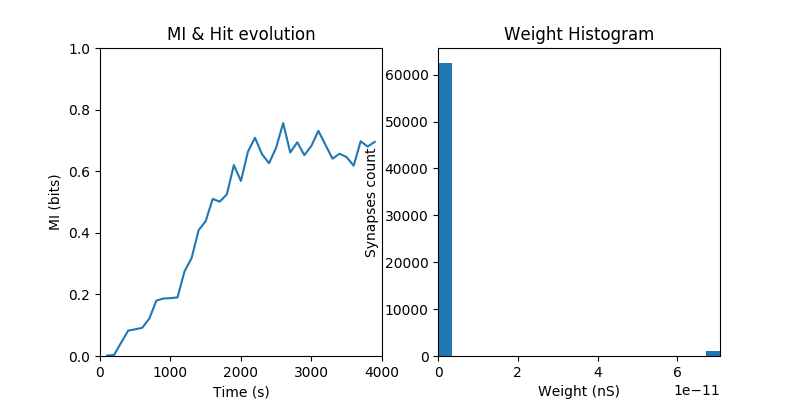

2018-05-25 10:27:26,178 - P31412 - MemTotal:1210M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s
2018-05-25 10:27:26,199 - P31412 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.136s until 0.136s
2018-05-25 10:27:26,438 - P31412 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.236737012863 seconds. Real-time rate: 0.5744771312063988
2018-05-25 10:27:26,454 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.035s until 0.171s
2018-05-25 10:27:26,504 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0482728481293 seconds. Real-time rate: 0.7250452657417606
2018-05-25 10:27:26,520 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.028999999999999998s until 0.2s
2018-05-25 10:27:26,564 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0430588722229 seconds. Real-time rate: 0.6734965061295002
2018-05-25 10:27:26,581 - P31412 - MemTotal:1211M - Simulation - DEB

2018-05-25 10:27:35,053 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.5010000000000003s until 7.706000000000001s
2018-05-25 10:27:35,685 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.629456996918 seconds. Real-time rate: 0.7959241099126034
2018-05-25 10:27:35,701 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.07800000000000029s until 7.784000000000002s
2018-05-25 10:27:35,783 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.079892873764 seconds. Real-time rate: 0.9763073516465517
2018-05-25 10:27:35,799 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.9500000000000002s until 8.734000000000002s
2018-05-25 10:27:36,865 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 1.06489706039 seconds. Real-time rate: 0.89210500745326
2018-05-25 10:27:36,880 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 1.3719999999999999s until 10.10600000

2018-05-25 10:27:44,250 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.02999999999999936s until 13.905000000000005s
2018-05-25 10:27:44,287 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0343410968781 seconds. Real-time rate: 0.8735888695265613
2018-05-25 10:27:44,308 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.20500000000000007s until 14.110000000000005s
2018-05-25 10:27:44,648 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.338315963745 seconds. Real-time rate: 0.6059424383368571
2018-05-25 10:27:44,666 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.4870000000000001s until 14.597000000000005s
2018-05-25 10:27:45,540 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.872421979904 seconds. Real-time rate: 0.558216105528991
2018-05-25 10:27:45,561 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.43599999999999994s until 15.

2018-05-25 10:27:55,227 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.004000000000001336s until 20.557000000000013s
2018-05-25 10:27:55,260 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0319089889526 seconds. Real-time rate: 0.12535652589740878
2018-05-25 10:27:55,276 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.1670000000000016s until 20.724000000000014s
2018-05-25 10:27:55,472 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.193782091141 seconds. Real-time rate: 0.8617927436788098
2018-05-25 10:27:55,488 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 20.748000000000015s
2018-05-25 10:27:55,515 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0259931087494 seconds. Real-time rate: 0.9233216477257442
2018-05-25 10:27:55,533 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.2680000000000007s until 

2018-05-25 10:28:06,848 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.567237138748 seconds. Real-time rate: 0.9008577984292795
2018-05-25 10:28:06,865 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.03900000000000148s until 29.68100000000001s
2018-05-25 10:28:06,912 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0457630157471 seconds. Real-time rate: 0.8522165631642885
2018-05-25 10:28:06,929 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 29.84900000000001s
2018-05-25 10:28:07,105 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.173887968063 seconds. Real-time rate: 0.9661393014770866
2018-05-25 10:28:07,122 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.4770000000000003s until 30.32600000000001s
2018-05-25 10:28:07,283 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.158986091614 seconds. Real-time ra

2018-05-25 10:28:15,544 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.606912136078 seconds. Real-time rate: 0.937532743499113
2018-05-25 10:28:15,561 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.11899999999999977s until 36.698000000000015s
2018-05-25 10:28:15,709 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.145881891251 seconds. Real-time rate: 0.8157283880805315
2018-05-25 10:28:15,725 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.027000000000001023s until 36.725000000000016s
2018-05-25 10:28:15,773 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0462892055511 seconds. Real-time rate: 0.5832893366503613
2018-05-25 10:28:15,790 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.014000000000002899s until 36.73900000000002s
2018-05-25 10:28:15,826 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0339858531952 seconds. Real-ti

2018-05-25 10:28:24,374 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0491189956665 seconds. Real-time rate: 0.8143488981652093
2018-05-25 10:28:24,391 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.0660000000000025s until 43.090000000000025s
2018-05-25 10:28:24,481 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0883858203888 seconds. Real-time rate: 0.7467261118319648
2018-05-25 10:28:24,497 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.3639999999999972s until 43.45400000000002s
2018-05-25 10:28:24,910 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.411148071289 seconds. Real-time rate: 0.8853258118389243
2018-05-25 10:28:24,926 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 43.639000000000024s
2018-05-25 10:28:25,141 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.212373018265 seconds. Real-time 

2018-05-25 10:28:34,933 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.406234025955 seconds. Real-time rate: 0.5981773669219927
2018-05-25 10:28:34,950 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.5799999999999983s until 51.56000000000004s
2018-05-25 10:28:35,742 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.790167808533 seconds. Real-time rate: 0.7340212974216411
2018-05-25 10:28:35,760 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.13300000000000267s until 51.69300000000004s
2018-05-25 10:28:35,928 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.165935993195 seconds. Real-time rate: 0.8015138695318745
2018-05-25 10:28:35,944 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.39000000000000057s until 52.08300000000004s
2018-05-25 10:28:36,470 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.524282217026 seconds. Real-time rat

2018-05-25 10:28:48,320 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.378942966461 seconds. Real-time rate: 0.918344001077132
2018-05-25 10:28:48,337 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.14399999999999835s until 60.57800000000003s
2018-05-25 10:28:48,513 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.174774885178 seconds. Real-time rate: 0.8239170053160702
2018-05-25 10:28:48,531 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.10600000000000165s until 60.68400000000003s
2018-05-25 10:28:48,849 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.31604886055 seconds. Real-time rate: 0.335391179121991
2018-05-25 10:28:48,868 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 60.762000000000036s
2018-05-25 10:28:48,959 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0892269611359 seconds. Real-time rat

2018-05-25 10:28:56,661 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.12399999999999523s until 66.38300000000005s
2018-05-25 10:28:56,803 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.139300107956 seconds. Real-time rate: 0.8901644214031941
2018-05-25 10:28:56,821 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.19400000000000261s until 66.57700000000006s
2018-05-25 10:28:57,164 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.340415000916 seconds. Real-time rate: 0.5698926295205862
2018-05-25 10:28:57,180 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.3960000000000008s until 66.97300000000006s
2018-05-25 10:28:57,788 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.606066942215 seconds. Real-time rate: 0.6533931690000403
2018-05-25 10:28:57,805 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 67.276

2018-05-25 10:29:05,773 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.01300000000000523s until 72.1260000000001s
2018-05-25 10:29:05,798 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0227370262146 seconds. Real-time rate: 0.5717546295327678
2018-05-25 10:29:05,814 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.22499999999999432s until 72.3510000000001s
2018-05-25 10:29:06,056 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.240024089813 seconds. Real-time rate: 0.9374059086113871
2018-05-25 10:29:06,072 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.18899999999999295s until 72.54000000000009s
2018-05-25 10:29:06,315 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.241060972214 seconds. Real-time rate: 0.784034007099289
2018-05-25 10:29:06,333 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 72.54

2018-05-25 10:29:13,652 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.377665996552 seconds. Real-time rate: 0.6328343091046713
2018-05-25 10:29:13,669 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 78.27700000000007s
2018-05-25 10:29:14,137 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.466421127319 seconds. Real-time rate: 0.7632587358253576
2018-05-25 10:29:14,158 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.3469999999999942s until 78.62400000000007s
2018-05-25 10:29:14,914 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.754718065262 seconds. Real-time rate: 0.45977433954705527
2018-05-25 10:29:14,931 - P31412 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.23900000000000432s until 78.86300000000007s
2018-05-25 10:29:15,206 - P31412 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.272786140442 seconds. Real-time ra

2018-05-25 10:29:24,352 - P31412 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 1.69365906715 seconds. Real-time rate: 0.8277935194808473
2018-05-25 10:29:24,369 - P31412 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.04000000000000625s until 85.51900000000008s
2018-05-25 10:29:24,419 - P31412 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0489890575409 seconds. Real-time rate: 0.8165088696923043
2018-05-25 10:29:24,435 - P31412 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2950000000000017s until 85.81400000000008s
2018-05-25 10:29:24,755 - P31412 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.318241119385 seconds. Real-time rate: 0.9269700928978177
2018-05-25 10:29:24,771 - P31412 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.6099999999999994s until 86.42400000000008s
2018-05-25 10:29:25,539 - P31412 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.766232967377 seconds. Real-time rate

2018-05-25 10:29:32,494 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.894501924515 seconds. Real-time rate: 0.8473989593830986
2018-05-25 10:29:32,510 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.018000000000000682s until 91.48600000000006s
2018-05-25 10:29:32,542 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.0304329395294 seconds. Real-time rate: 0.5914643895178257
2018-05-25 10:29:32,560 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.03300000000000125s until 91.51900000000006s
2018-05-25 10:29:32,609 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.046797990799 seconds. Real-time rate: 0.7051584787426713
2018-05-25 10:29:32,626 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.24800000000000466s until 91.76700000000007s
2018-05-25 10:29:32,926 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.299142837524 seconds. Real-time 

2018-05-25 10:29:39,954 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 96.93200000000007s
2018-05-25 10:29:40,145 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.188598871231 seconds. Real-time rate: 0.8907794564378164
2018-05-25 10:29:40,160 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.6380000000000052s until 97.57000000000008s
2018-05-25 10:29:40,929 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.766580820084 seconds. Real-time rate: 0.8322671051571738
2018-05-25 10:29:40,946 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 97.82700000000008s
2018-05-25 10:29:41,218 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.270487070084 seconds. Real-time rate: 0.9501378380879952
2018-05-25 10:29:41,234 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.5619999999999976s until 98.389000

2018-05-25 10:29:46,708 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.590999999999994s until 101.25400000000008s
2018-05-25 10:29:47,412 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.702595949173 seconds. Real-time rate: 0.8411662502404983
2018-05-25 10:29:47,431 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.08299999999999841s until 101.33700000000007s
2018-05-25 10:29:47,595 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.161552906036 seconds. Real-time rate: 0.5137635839327412
2018-05-25 10:29:47,616 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 101.37300000000008s
2018-05-25 10:29:47,660 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0428779125214 seconds. Real-time rate: 0.839593111769742
2018-05-25 10:29:47,676 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 101.

2018-05-25 10:29:56,702 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0567049980164 seconds. Real-time rate: 0.6524998023866067
2018-05-25 10:29:56,718 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.5769999999999982s until 108.98800000000011s
2018-05-25 10:29:57,615 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.895952939987 seconds. Real-time rate: 0.6440070390396315
2018-05-25 10:29:57,636 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 109.02900000000011s
2018-05-25 10:29:57,789 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.151740074158 seconds. Real-time rate: 0.27019889259697105
2018-05-25 10:29:57,809 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.24899999999999523s until 109.2780000000001s
2018-05-25 10:29:58,465 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.654497146606 seconds. Real-time

2018-05-25 10:30:07,689 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.183022022247 seconds. Real-time rate: 0.8031820334788293
2018-05-25 10:30:07,706 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 115.69400000000013s
2018-05-25 10:30:07,964 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.255633115768 seconds. Real-time rate: 0.6963104113679859
2018-05-25 10:30:07,983 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.4689999999999941s until 116.16300000000012s
2018-05-25 10:30:08,521 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.535260915756 seconds. Real-time rate: 0.8762081934142025
2018-05-25 10:30:08,538 - P31412 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.06300000000000239s until 116.22600000000013s
2018-05-25 10:30:08,640 - P31412 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.100192070007 seconds. Real-time 

2018-05-25 10:30:17,973 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.324648141861 seconds. Real-time rate: 0.8008670510467796
2018-05-25 10:30:17,991 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 122.89700000000018s
2018-05-25 10:30:18,068 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0753409862518 seconds. Real-time rate: 0.7300143353070339
2018-05-25 10:30:18,087 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.0870000000000033s until 122.98400000000018s
2018-05-25 10:30:18,213 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.123276948929 seconds. Real-time rate: 0.7057280436931307
2018-05-25 10:30:18,230 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.29399999999999693s until 123.27800000000018s
2018-05-25 10:30:18,602 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.369519948959 seconds. Real-time

2018-05-25 10:30:27,566 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.15799999999998704s until 129.85900000000015s
2018-05-25 10:30:27,784 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.216084957123 seconds. Real-time rate: 0.7311938882917909
2018-05-25 10:30:27,800 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 129.95900000000015s
2018-05-25 10:30:27,949 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.147065877914 seconds. Real-time rate: 0.6799673820883183
2018-05-25 10:30:27,965 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 130.05300000000014s
2018-05-25 10:30:28,021 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0539619922638 seconds. Real-time rate: 0.7597940379855814
2018-05-25 10:30:28,023 - P31412 - MemTotal:1259M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05

2018-05-25 10:30:35,255 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 134.89800000000017s
2018-05-25 10:30:35,447 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.189888954163 seconds. Real-time rate: 0.7478054772917675
2018-05-25 10:30:35,464 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.4099999999999966s until 135.30800000000016s
2018-05-25 10:30:36,007 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.541131019592 seconds. Real-time rate: 0.7576723291688413
2018-05-25 10:30:36,026 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.39500000000001023s until 135.70300000000017s
2018-05-25 10:30:36,496 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.468364953995 seconds. Real-time rate: 0.8433594286485343
2018-05-25 10:30:36,514 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.18199999999998795s until 135.

2018-05-25 10:30:45,138 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 141.59800000000018s
2018-05-25 10:30:45,288 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.148810863495 seconds. Real-time rate: 0.6719939502497383
2018-05-25 10:30:45,306 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 142.07900000000018s
2018-05-25 10:30:45,942 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.634660959244 seconds. Real-time rate: 0.7578849667594594
2018-05-25 10:30:45,962 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.046999999999997044s until 142.12600000000018s
2018-05-25 10:30:46,025 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0614981651306 seconds. Real-time rate: 0.7642504438981926
2018-05-25 10:30:46,044 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.020000000000010232s until

2018-05-25 10:30:53,895 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0133230686188 seconds. Real-time rate: 0.4503467010254103
2018-05-25 10:30:53,915 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.008000000000009777s until 147.76900000000023s
2018-05-25 10:30:53,930 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0127718448639 seconds. Real-time rate: 0.6263777931273873
2018-05-25 10:30:53,948 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 147.80500000000023s
2018-05-25 10:30:54,033 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0838408470154 seconds. Real-time rate: 0.42938497500385525
2018-05-25 10:30:54,053 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.32499999999998863s until 148.13000000000022s
2018-05-25 10:30:54,515 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.460414171219 seconds. Rea

2018-05-25 10:31:04,005 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.312485933304 seconds. Real-time rate: 0.6816306825334502
2018-05-25 10:31:04,024 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.7450000000000045s until 154.93900000000025s
2018-05-25 10:31:05,060 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 1.03406691551 seconds. Real-time rate: 0.720456276885205
2018-05-25 10:31:05,077 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.14500000000001023s until 155.08400000000026s
2018-05-25 10:31:05,249 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.169448137283 seconds. Real-time rate: 0.8557190555453759
2018-05-25 10:31:05,266 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 155.26700000000025s
2018-05-25 10:31:05,579 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.310693025589 seconds. Real-time ra

2018-05-25 10:31:15,184 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 1.18567490578 seconds. Real-time rate: 0.8096654448218384
2018-05-25 10:31:15,202 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09499999999999886s until 161.24900000000028s
2018-05-25 10:31:15,337 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.133369922638 seconds. Real-time rate: 0.7123045295444628
2018-05-25 10:31:15,353 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 161.43900000000028s
2018-05-25 10:31:15,608 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.252561092377 seconds. Real-time rate: 0.7522932301726115
2018-05-25 10:31:15,624 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 161.55900000000028s
2018-05-25 10:31:15,795 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.168484926224 seconds. Real-time 

2018-05-25 10:31:23,902 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 168.1370000000003s
2018-05-25 10:31:23,961 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0566971302032 seconds. Real-time rate: 0.9347915813376024
2018-05-25 10:31:23,977 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.3019999999999925s until 168.4390000000003s
2018-05-25 10:31:24,309 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.329843044281 seconds. Real-time rate: 0.9155869897402087
2018-05-25 10:31:24,325 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.08099999999998886s until 168.5200000000003s
2018-05-25 10:31:24,420 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0936620235443 seconds. Real-time rate: 0.864811552589057
2018-05-25 10:31:24,437 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.14500000000001023s until 168.6

2018-05-25 10:31:30,863 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.21000000000000796s until 173.55200000000028s
2018-05-25 10:31:31,093 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.228328943253 seconds. Real-time rate: 0.9197257124241093
2018-05-25 10:31:31,109 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 173.75000000000028s
2018-05-25 10:31:31,323 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.212649106979 seconds. Real-time rate: 0.9311113637510654
2018-05-25 10:31:31,339 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 173.8410000000003s
2018-05-25 10:31:31,483 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.142381906509 seconds. Real-time rate: 0.6391261518471153
2018-05-25 10:31:31,503 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.022999999999996135s until 173

2018-05-25 10:31:42,753 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 181.53300000000027s
2018-05-25 10:31:42,933 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.178673028946 seconds. Real-time rate: 0.9402650248396092
2018-05-25 10:31:42,952 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.08500000000000796s until 181.61800000000028s
2018-05-25 10:31:43,060 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.106428146362 seconds. Real-time rate: 0.7986609079016501
2018-05-25 10:31:43,077 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.4159999999999968s until 182.03400000000028s
2018-05-25 10:31:43,586 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.506755828857 seconds. Real-time rate: 0.8209081697944127
2018-05-25 10:31:43,605 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.08799999999999386s until 182

2018-05-25 10:31:53,591 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.210328102112 seconds. Real-time rate: 0.8558057539278022
2018-05-25 10:31:53,612 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.6800000000000068s until 189.94400000000024s
2018-05-25 10:31:54,611 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.997899055481 seconds. Real-time rate: 0.6814316500903665
2018-05-25 10:31:54,628 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 189.95100000000025s
2018-05-25 10:31:54,642 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0115599632263 seconds. Real-time rate: 0.6055382584667941
2018-05-25 10:31:54,658 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 190.02800000000025s
2018-05-25 10:31:54,721 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0616149902344 seconds. Real-ti

2018-05-25 10:32:02,820 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0234060287476 seconds. Real-time rate: 0.8117566719637258
2018-05-25 10:32:02,836 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.7110000000000127s until 195.8890000000003s
2018-05-25 10:32:03,613 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.775354146957 seconds. Real-time rate: 0.9170003188737433
2018-05-25 10:32:03,630 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.13800000000000523s until 196.0270000000003s
2018-05-25 10:32:03,792 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.160825014114 seconds. Real-time rate: 0.8580754726491655
2018-05-25 10:32:03,810 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 196.3710000000003s
2018-05-25 10:32:04,179 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.366625070572 seconds. Real-time rat

2018-05-25 10:32:09,137 - P31412 - MemTotal:1259M - Simulation - INFO: Individual pattern false alarm matrix:
2018-05-25 10:32:09,138 - P31412 - MemTotal:1259M - Simulation - INFO: [[0.89233279 0.62805873 0.60032626 0.5954323  0.60848287 0.61337684
  0.62479608 0.60848287 0.60032626 0.62805873 0.60032626 0.82055465
  0.59706362 0.63784666 0.61011419 0.69168026 0.59869494 0.60522023
  0.60685155 0.64600326 0.60522023 0.61011419 0.60195759 0.60848287
  0.60195759 0.60195759 0.61663948 0.60848287 0.6182708  0.61663948
  0.6639478  0.61500816]]
2018-05-25 10:32:09,140 - P31412 - MemTotal:1259M - Simulation - DEBUG: Shannon entropy of the patterns: [0.78449133]
2018-05-25 10:32:09,142 - P31412 - MemTotal:1259M - Simulation - DEBUG: Shannon entropy of the population response: [0.56763361 0.95067209 0.96064753 0.96398814 0.96233685 0.95162704
 0.9562572  0.96149695 0.96560148 0.9553504  0.96398814 0.69884922
 0.95257234 0.94473883 0.95350798 0.8719288  0.96560148 0.96871467
 0.96149695 0.9373

2018-05-25 10:32:22,081 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 209.20100000000036s
2018-05-25 10:32:22,399 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.315855979919 seconds. Real-time rate: 0.6965199774153872
2018-05-25 10:32:22,417 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 209.42200000000037s
2018-05-25 10:32:22,666 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.247737884521 seconds. Real-time rate: 0.8920718784164722
2018-05-25 10:32:22,684 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.12899999999999068s until 209.55100000000036s
2018-05-25 10:32:22,836 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.150690078735 seconds. Real-time rate: 0.8560616669830404
2018-05-25 10:32:22,853 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 20

2018-05-25 10:32:31,238 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.15100000000001046s until 215.7310000000003s
2018-05-25 10:32:31,404 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.164664983749 seconds. Real-time rate: 0.9170134205935581
2018-05-25 10:32:31,421 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.2560000000000002s until 215.9870000000003s
2018-05-25 10:32:31,724 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.300649881363 seconds. Real-time rate: 0.8514887777087866
2018-05-25 10:32:31,740 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.5600000000000023s until 216.5470000000003s
2018-05-25 10:32:32,412 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.670276880264 seconds. Real-time rate: 0.8354756317705616
2018-05-25 10:32:32,430 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.4259999999999877s until 216.9730

2018-05-25 10:32:40,914 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.03299999999998704s until 222.45700000000028s
2018-05-25 10:32:40,954 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0382361412048 seconds. Real-time rate: 0.8630578023865816
2018-05-25 10:32:40,971 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.42099999999999227s until 222.87800000000027s
2018-05-25 10:32:41,460 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.488107919693 seconds. Real-time rate: 0.8625141756863728
2018-05-25 10:32:41,477 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 223.01000000000028s
2018-05-25 10:32:41,653 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.174641132355 seconds. Real-time rate: 0.7558356855582145
2018-05-25 10:32:41,672 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 223

2018-05-25 10:32:51,118 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 1.04733014107 seconds. Real-time rate: 0.7934460848734681
2018-05-25 10:32:51,133 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.036000000000001364s until 229.65000000000026s
2018-05-25 10:32:51,182 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0471301078796 seconds. Real-time rate: 0.763842936492709
2018-05-25 10:32:51,200 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 229.85200000000026s
2018-05-25 10:32:51,468 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.266175031662 seconds. Real-time rate: 0.7588991301652805
2018-05-25 10:32:51,484 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.21000000000000796s until 230.06200000000027s
2018-05-25 10:32:51,651 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.165328025818 seconds. Real-time

2018-05-25 10:33:01,998 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0654351711273 seconds. Real-time rate: 0.8558088721285771
2018-05-25 10:33:02,014 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 238.78000000000026s
2018-05-25 10:33:02,751 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.73455119133 seconds. Real-time rate: 0.8903395811201175
2018-05-25 10:33:02,767 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.21700000000001296s until 238.99700000000027s
2018-05-25 10:33:03,027 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.258311986923 seconds. Real-time rate: 0.8400694159985512
2018-05-25 10:33:03,043 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.23699999999999477s until 239.23400000000026s
2018-05-25 10:33:03,316 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.270719051361 seconds. Real-time 

2018-05-25 10:33:11,417 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.168395042419 seconds. Real-time rate: 0.843255228656354
2018-05-25 10:33:11,434 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.570999999999998s until 245.8580000000003s
2018-05-25 10:33:12,115 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.679342985153 seconds. Real-time rate: 0.8405179894088876
2018-05-25 10:33:12,132 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.015999999999991132s until 245.87400000000028s
2018-05-25 10:33:12,156 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0227270126343 seconds. Real-time rate: 0.7040080567324368
2018-05-25 10:33:12,173 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.7270000000000039s until 246.60100000000028s
2018-05-25 10:33:13,057 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.882258892059 seconds. Real-time ra

2018-05-25 10:33:23,274 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.00253510475159 seconds. Real-time rate: 0.3944610175886417
2018-05-25 10:33:23,290 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 252.93300000000025s
2018-05-25 10:33:23,373 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.081022977829 seconds. Real-time rate: 0.7652150249387191
2018-05-25 10:33:23,388 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.6910000000000025s until 253.62400000000025s
2018-05-25 10:33:24,363 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.97297501564 seconds. Real-time rate: 0.710192953459648
2018-05-25 10:33:24,379 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 254.16200000000026s
2018-05-25 10:33:25,102 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.721093893051 seconds. Real-time r

2018-05-25 10:33:35,081 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.543537855148 seconds. Real-time rate: 0.8352684099180627
2018-05-25 10:33:35,097 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 261.09800000000035s
2018-05-25 10:33:35,254 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.155321836472 seconds. Real-time rate: 0.9013542666012903
2018-05-25 10:33:35,270 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 261.14200000000034s
2018-05-25 10:33:35,320 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0479021072388 seconds. Real-time rate: 0.918539966951002
2018-05-25 10:33:35,336 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 261.1810000000003s
2018-05-25 10:33:35,383 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0452790260315 seconds. Real-time

2018-05-25 10:33:45,530 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 269.2630000000003s
2018-05-25 10:33:45,641 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.109577894211 seconds. Real-time rate: 0.7848298292222927
2018-05-25 10:33:45,657 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 269.3410000000003s
2018-05-25 10:33:45,748 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0887281894684 seconds. Real-time rate: 0.8790892777967481
2018-05-25 10:33:45,764 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 269.3690000000003s
2018-05-25 10:33:45,799 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0331029891968 seconds. Real-time rate: 0.8458450635251356
2018-05-25 10:33:45,815 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 269

2018-05-25 10:33:53,387 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.15100000000001046s until 275.2180000000003s
2018-05-25 10:33:53,570 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.181627035141 seconds. Real-time rate: 0.831374029107473
2018-05-25 10:33:53,586 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 275.4610000000003s
2018-05-25 10:33:53,881 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.292324066162 seconds. Real-time rate: 0.8312692252482505
2018-05-25 10:33:53,897 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 275.6820000000003s
2018-05-25 10:33:54,186 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.286690950394 seconds. Real-time rate: 0.7708649320689476
2018-05-25 10:33:54,201 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.5169999999999959s until 276.19900

2018-05-25 10:34:00,083 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.019082069397 seconds. Real-time rate: 0.7860782647622603
2018-05-25 10:34:00,085 - P31412 - MemTotal:1259M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:34:00,087 - P31412 - MemTotal:1259M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:34:00,619 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.162961959839 seconds. Real-time rate: 0.5890945352845974
2018-05-25 10:34:00,637 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.23599999999999s until 280.33200000000033s
2018-05-25 10:34:00,954 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.315163135529 seconds. Real-time rate: 0.7488185431465235
2018-05-25 10:34:00,973 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.021000000000015007s until 280.35300000000035s
2018-05-

2018-05-25 10:34:11,216 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.253358840942 seconds. Real-time rate: 0.8249169408204412
2018-05-25 10:34:11,233 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 288.6120000000005s
2018-05-25 10:34:11,562 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.327352046967 seconds. Real-time rate: 0.7850874994719799
2018-05-25 10:34:11,577 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 288.63200000000046s
2018-05-25 10:34:11,601 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0223090648651 seconds. Real-time rate: 0.8964965641055851
2018-05-25 10:34:11,617 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 288.82400000000047s
2018-05-25 10:34:11,849 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.229863882065 seconds. Real-time r

2018-05-25 10:34:17,749 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0739500522614 seconds. Real-time rate: 0.7572678894406901
2018-05-25 10:34:17,766 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.012000000000000455s until 293.01600000000036s
2018-05-25 10:34:17,786 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0192799568176 seconds. Real-time rate: 0.6224080330423405
2018-05-25 10:34:17,802 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 293.1090000000004s
2018-05-25 10:34:17,921 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.118120193481 seconds. Real-time rate: 0.7873336239889115
2018-05-25 10:34:17,938 - P31412 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.6480000000000246s until 293.7570000000004s
2018-05-25 10:34:18,686 - P31412 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.746147871017 seconds. Real-time

2018-05-25 10:34:26,677 - P31412 - MemTotal:1259M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:34:26,678 - P31412 - MemTotal:1259M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:34:27,042 - P31412 - MemTotal:1259M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 10:34:27,068 - P31412 - MemTotal:1259M - Simulation - INFO: Analyzing mutual information from time 200.0 to 300.0 seconds
2018-05-25 10:34:27,070 - P31412 - MemTotal:1259M - Simulation - INFO: Average firing rate in MI analysis: 0.6678125Hz
2018-05-25 10:34:27,072 - P31412 - MemTotal:1259M - Simulation - INFO: Individual pattern hit matrix:
2018-05-25 10:34:27,073 - P31412 - MemTotal:1259M - Simulation - INFO: [[0.86956522 0.08695652 0.0531401  0.03381643 0.06280193 0.0531401
  0.11111111 0.04830918 0.05797101 0.06763285 0.0531401  0.85024155
  0.07246377 0.22705314 0.02

2018-05-25 10:34:33,802 - P31412 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.5400000000000205s until 304.82000000000045s
2018-05-25 10:34:34,452 - P31412 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.648427963257 seconds. Real-time rate: 0.832783332303841
2018-05-25 10:34:34,471 - P31412 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 304.99600000000044s
2018-05-25 10:34:34,711 - P31412 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.238413095474 seconds. Real-time rate: 0.7382144829330559
2018-05-25 10:34:34,729 - P31412 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.146000000000015s until 305.14200000000045s
2018-05-25 10:34:34,897 - P31412 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.166708946228 seconds. Real-time rate: 0.8757778349838149
2018-05-25 10:34:34,913 - P31412 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.4359999999999786s until 305.578

2018-05-25 10:34:44,558 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.3340000000000032s until 312.8490000000004s
2018-05-25 10:34:44,963 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.403079032898 seconds. Real-time rate: 0.8286216169536277
2018-05-25 10:34:44,979 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.48799999999999955s until 313.3370000000004s
2018-05-25 10:34:45,539 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.55819606781 seconds. Real-time rate: 0.874244782688177
2018-05-25 10:34:45,556 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 313.6500000000004s
2018-05-25 10:34:45,890 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.332324981689 seconds. Real-time rate: 0.9418491454021247
2018-05-25 10:34:45,907 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 313.69100

2018-05-25 10:34:54,087 - P31412 - MemTotal:1265M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:34:54,650 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.192790031433 seconds. Real-time rate: 0.591316880613351
2018-05-25 10:34:54,667 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.33300000000002683s until 320.4470000000004s
2018-05-25 10:34:55,066 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.397146940231 seconds. Real-time rate: 0.8384805880817482
2018-05-25 10:34:55,083 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.42099999999999227s until 320.8680000000004s
2018-05-25 10:34:55,593 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.507597923279 seconds. Real-time rate: 0.8293966162835331
2018-05-25 10:34:55,610 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.117999999999995s until 320.9

2018-05-25 10:35:04,595 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.457895994186 seconds. Real-time rate: 0.7927564438404514
2018-05-25 10:35:04,624 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 328.0600000000003s
2018-05-25 10:35:04,795 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.168643951416 seconds. Real-time rate: 0.4625128819922035
2018-05-25 10:35:04,812 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.26600000000001955s until 328.3260000000003s
2018-05-25 10:35:05,130 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.315756082535 seconds. Real-time rate: 0.8424224099331852
2018-05-25 10:35:05,148 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 328.6730000000003s
2018-05-25 10:35:05,553 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.40353512764 seconds. Real-time rate: 

2018-05-25 10:35:10,582 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.362434864044 seconds. Real-time rate: 0.858085219864666
2018-05-25 10:35:10,599 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.3140000000000214s until 332.14100000000025s
2018-05-25 10:35:10,973 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.372397899628 seconds. Real-time rate: 0.8431841326547519
2018-05-25 10:35:10,989 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 332.20900000000023s
2018-05-25 10:35:11,086 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0952160358429 seconds. Real-time rate: 0.7141654176002687
2018-05-25 10:35:11,105 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 332.31200000000024s
2018-05-25 10:35:11,235 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.127987861633 seconds. Real-time 

2018-05-25 10:35:19,348 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 338.5690000000002s
2018-05-25 10:35:19,789 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.439414024353 seconds. Real-time rate: 0.7851365247342507
2018-05-25 10:35:19,806 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 338.8310000000002s
2018-05-25 10:35:20,130 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.322121858597 seconds. Real-time rate: 0.8133567872149418
2018-05-25 10:35:20,147 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 339.2560000000002s
2018-05-25 10:35:20,641 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.492501974106 seconds. Real-time rate: 0.8629407034796618
2018-05-25 10:35:20,657 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 339.554

2018-05-25 10:35:26,536 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 343.3320000000001s
2018-05-25 10:35:26,609 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0710048675537 seconds. Real-time rate: 0.6760099927472253
2018-05-25 10:35:26,627 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 343.3830000000001s
2018-05-25 10:35:26,701 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0714831352234 seconds. Real-time rate: 0.7134549966311629
2018-05-25 10:35:26,717 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.4379999999999882s until 343.8210000000001s
2018-05-25 10:35:27,213 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.493532896042 seconds. Real-time rate: 0.8874788357832775
2018-05-25 10:35:27,229 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.07400000000001228s until 343.

2018-05-25 10:35:35,672 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.25s until 350.4590000000001s
2018-05-25 10:35:35,995 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.321512937546 seconds. Real-time rate: 0.7775736861736878
2018-05-25 10:35:36,014 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 350.5030000000001s
2018-05-25 10:35:36,073 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0576739311218 seconds. Real-time rate: 0.7629096741652716
2018-05-25 10:35:36,094 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 350.7060000000001s
2018-05-25 10:35:36,379 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.283101081848 seconds. Real-time rate: 0.7170583689569359
2018-05-25 10:35:36,395 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 350.7660000000001s

2018-05-25 10:35:44,218 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 1.12018918991 seconds. Real-time rate: 0.8052211252562981
2018-05-25 10:35:44,238 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.6229999999999905s until 357.48600000000005s
2018-05-25 10:35:44,998 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.758272171021 seconds. Real-time rate: 0.8216047269169017
2018-05-25 10:35:45,016 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 357.583s
2018-05-25 10:35:45,178 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.159808158875 seconds. Real-time rate: 0.6069777706165089
2018-05-25 10:35:45,196 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 357.77500000000003s
2018-05-25 10:35:45,437 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.238672971725 seconds. Real-time rate: 0.8044

2018-05-25 10:35:55,129 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.45699999999999363s until 364.97400000000016s
2018-05-25 10:35:55,688 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.557449817657 seconds. Real-time rate: 0.8198047349273703
2018-05-25 10:35:55,705 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.36299999999999955s until 365.33700000000016s
2018-05-25 10:35:56,198 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.491185188293 seconds. Real-time rate: 0.739028799425292
2018-05-25 10:35:56,218 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 365.42400000000015s
2018-05-25 10:35:56,323 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.102593183517 seconds. Real-time rate: 0.8480095559680745
2018-05-25 10:35:56,341 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.1139999999999759s until 365.

2018-05-25 10:36:05,457 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.41100000000000136s until 371.831s
2018-05-25 10:36:05,969 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.510603904724 seconds. Real-time rate: 0.8049292145974958
2018-05-25 10:36:05,985 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.04199999999997317s until 371.873s
2018-05-25 10:36:06,034 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.047308921814 seconds. Real-time rate: 0.8877818049866323
2018-05-25 10:36:06,050 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 372.005s
2018-05-25 10:36:06,226 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.173996925354 seconds. Real-time rate: 0.7586340950074006
2018-05-25 10:36:06,246 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 372.105s
2018-05-25 10:36:06,395 - P3

2018-05-25 10:36:14,327 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 378.21199999999993s
2018-05-25 10:36:14,364 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0347249507904 seconds. Real-time rate: 0.8927298468215946
2018-05-25 10:36:14,380 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 378.23599999999993s
2018-05-25 10:36:14,409 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0275070667267 seconds. Real-time rate: 0.8725030639751399
2018-05-25 10:36:14,425 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.38700000000000045s until 378.62299999999993s
2018-05-25 10:36:14,892 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.464908123016 seconds. Real-time rate: 0.8324225386493929
2018-05-25 10:36:14,909 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 

2018-05-25 10:36:23,477 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 1.0260000000000105s until 385.881s
2018-05-25 10:36:24,650 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 1.1710729599 seconds. Real-time rate: 0.8761196228864409
2018-05-25 10:36:24,666 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.29000000000002046s until 386.171s
2018-05-25 10:36:25,016 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.348073959351 seconds. Real-time rate: 0.8331562652405364
2018-05-25 10:36:25,031 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 386.17699999999996s
2018-05-25 10:36:25,055 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0220110416412 seconds. Real-time rate: 0.2725904615405135
2018-05-25 10:36:25,070 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 1.2590000000000146s until 387.436s
2018-05-25 10:36:

2018-05-25 10:36:33,581 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.012999999999976808s until 392.66500000000013s
2018-05-25 10:36:33,601 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0181682109833 seconds. Real-time rate: 0.7155355038502779
2018-05-25 10:36:33,617 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.146000000000015s until 392.81100000000015s
2018-05-25 10:36:33,803 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.184168815613 seconds. Real-time rate: 0.7927509307926144
2018-05-25 10:36:33,819 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 393.08000000000015s
2018-05-25 10:36:34,138 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.316786050797 seconds. Real-time rate: 0.8491535511858782
2018-05-25 10:36:34,154 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 39

2018-05-25 10:36:40,827 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.210308074951 seconds. Real-time rate: 0.7988281003428501
2018-05-25 10:36:40,842 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 398.36600000000016s
2018-05-25 10:36:41,000 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.155938863754 seconds. Real-time rate: 0.8464855830167508
2018-05-25 10:36:41,017 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 398.4540000000002s
2018-05-25 10:36:41,121 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.102048158646 seconds. Real-time rate: 0.8623379507082444
2018-05-25 10:36:41,141 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 398.6550000000002s
2018-05-25 10:36:41,393 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.250234127045 seconds. Real-time rat

2018-05-25 10:36:46,887 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.246067047119 seconds. Real-time rate: 0.861553802030806
2018-05-25 10:36:46,902 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 1.3179999999999836s until 403.1270000000002s
2018-05-25 10:36:48,459 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 1.55476784706 seconds. Real-time rate: 0.8477149836171907
2018-05-25 10:36:48,474 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 403.13000000000017s
2018-05-25 10:36:48,482 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.00549793243408 seconds. Real-time rate: 0.5456596704224143
2018-05-25 10:36:48,497 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 403.31500000000017s
2018-05-25 10:36:48,728 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.229169130325 seconds. Real-time 

2018-05-25 10:36:56,405 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 409.88000000000005s
2018-05-25 10:36:56,827 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.420300960541 seconds. Real-time rate: 0.8803215665363975
2018-05-25 10:36:56,843 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.2610000000000241s until 410.1410000000001s
2018-05-25 10:36:56,984 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.138972043991 seconds. Real-time rate: 0.8634830182654745
2018-05-25 10:36:56,986 - P31412 - MemTotal:1266M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:36:56,989 - P31412 - MemTotal:1266M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:36:57,529 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.179577112198 seconds. Real-time rate: 0.7851780122441692
2018-05-

2018-05-25 10:37:04,920 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 416.21300000000025s
2018-05-25 10:37:05,191 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.26922082901 seconds. Real-time rate: 0.8803182163561774
2018-05-25 10:37:05,207 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.46800000000001774s until 416.68100000000027s
2018-05-25 10:37:05,756 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.547474145889 seconds. Real-time rate: 0.8548348876636508
2018-05-25 10:37:05,774 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.1519999999999868s until 416.83300000000025s
2018-05-25 10:37:05,955 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.179084062576 seconds. Real-time rate: 0.8487634120720894
2018-05-25 10:37:05,973 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5950000000000273s until 417.42

2018-05-25 10:37:13,307 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 422.52900000000017s
2018-05-25 10:37:13,429 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.120707988739 seconds. Real-time rate: 0.8532989496056305
2018-05-25 10:37:13,446 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.1519999999999868s until 422.68100000000015s
2018-05-25 10:37:13,626 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.177831888199 seconds. Real-time rate: 0.854739841878188
2018-05-25 10:37:13,641 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.4479999999999791s until 423.12900000000013s
2018-05-25 10:37:14,161 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.51864695549 seconds. Real-time rate: 0.8637860403067958
2018-05-25 10:37:14,177 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 423.1

2018-05-25 10:37:21,412 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.110764980316 seconds. Real-time rate: 0.8666999238025047
2018-05-25 10:37:21,428 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.4089999999999918s until 429.3080000000001s
2018-05-25 10:37:21,915 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.484972000122 seconds. Real-time rate: 0.8433476569720398
2018-05-25 10:37:21,931 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5459999999999923s until 429.8540000000001s
2018-05-25 10:37:22,550 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.617612838745 seconds. Real-time rate: 0.8840489797935065
2018-05-25 10:37:22,566 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.7019999999999982s until 430.5560000000001s
2018-05-25 10:37:22,737 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.168823003769 seconds. Real-time rate:

2018-05-25 10:37:29,464 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.249902963638 seconds. Real-time rate: 0.8283215092222469
2018-05-25 10:37:29,481 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.410000000000025s until 435.4330000000001s
2018-05-25 10:37:29,988 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.505388975143 seconds. Real-time rate: 0.8112563197162431
2018-05-25 10:37:30,006 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.05900000000002592s until 435.49200000000013s
2018-05-25 10:37:30,081 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0729899406433 seconds. Real-time rate: 0.8083305655549017
2018-05-25 10:37:30,097 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 1.197999999999979s until 436.6900000000001s
2018-05-25 10:37:31,487 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 1.38867998123 seconds. Real-time rate:

2018-05-25 10:37:38,797 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.00494003295898 seconds. Real-time rate: 0.4048555984575316
2018-05-25 10:37:38,815 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 442.283s
2018-05-25 10:37:38,907 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.089852809906 seconds. Real-time rate: 0.7567932496615049
2018-05-25 10:37:38,923 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 1.0810000000000173s until 443.36400000000003s
2018-05-25 10:37:40,158 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 1.23407101631 seconds. Real-time rate: 0.8759625545950165
2018-05-25 10:37:40,175 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 443.37500000000006s
2018-05-25 10:37:40,190 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0132150650024 seconds. Real-time rate: 0.

2018-05-25 10:37:46,178 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 448.29200000000003s
2018-05-25 10:37:46,486 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.30711889267 seconds. Real-time rate: 0.8270412731437178
2018-05-25 10:37:46,502 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 448.36100000000005s
2018-05-25 10:37:46,593 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0884590148926 seconds. Real-time rate: 0.7800222519299845
2018-05-25 10:37:46,609 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.77800000000002s until 449.13900000000007s
2018-05-25 10:37:47,519 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.907778978348 seconds. Real-time rate: 0.8570368102332958
2018-05-25 10:37:47,535 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 449.27800

2018-05-25 10:37:53,639 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5160000000000196s until 454.21500000000003s
2018-05-25 10:37:54,221 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.580701828003 seconds. Real-time rate: 0.888579947775567
2018-05-25 10:37:54,237 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.055999999999983174s until 454.271s
2018-05-25 10:37:54,301 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0626819133759 seconds. Real-time rate: 0.8933996584340829
2018-05-25 10:37:54,317 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.32200000000000273s until 454.593s
2018-05-25 10:37:54,669 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.350316047668 seconds. Real-time rate: 0.9191699956170637
2018-05-25 10:37:54,685 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.3620000000000232s until 454.95500000000004s
2018-

2018-05-25 10:38:01,726 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 460.2059999999999s
2018-05-25 10:38:01,766 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0385341644287 seconds. Real-time rate: 0.7785299212981089
2018-05-25 10:38:01,782 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 460.40199999999993s
2018-05-25 10:38:02,002 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.218091964722 seconds. Real-time rate: 0.8987034448983657
2018-05-25 10:38:02,019 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.5029999999999859s until 460.9049999999999s
2018-05-25 10:38:02,556 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.535104990005 seconds. Real-time rate: 0.9400024469867536
2018-05-25 10:38:02,572 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.18099999999998317s until 461

2018-05-25 10:38:09,152 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.627264976501 seconds. Real-time rate: 0.8592859799159033
2018-05-25 10:38:09,167 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 466.5439999999998s
2018-05-25 10:38:09,309 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.139719963074 seconds. Real-time rate: 0.8660179786629989
2018-05-25 10:38:09,325 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 466.62499999999983s
2018-05-25 10:38:09,416 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0888710021973 seconds. Real-time rate: 0.9114334034426977
2018-05-25 10:38:09,431 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 466.9719999999998s
2018-05-25 10:38:09,836 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.403182983398 seconds. Real-time rate

2018-05-25 10:38:17,235 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.674139022827 seconds. Real-time rate: 0.8781571455651743
2018-05-25 10:38:17,252 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.2330000000000041s until 473.06099999999975s
2018-05-25 10:38:17,519 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.264539957047 seconds. Real-time rate: 0.8807743170497315
2018-05-25 10:38:17,534 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.7540000000000191s until 473.81499999999977s
2018-05-25 10:38:18,372 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.83607006073 seconds. Real-time rate: 0.9018382973093125
2018-05-25 10:38:18,393 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 473.9439999999998s
2018-05-25 10:38:18,541 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.146234989166 seconds. Real-time rate

2018-05-25 10:38:26,970 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.100364923477 seconds. Real-time rate: 0.906691270687865
2018-05-25 10:38:26,987 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 480.63099999999986s
2018-05-25 10:38:27,020 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0314271450043 seconds. Real-time rate: 0.9227691537380779
2018-05-25 10:38:27,038 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 480.72199999999987s
2018-05-25 10:38:27,149 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.110043048859 seconds. Real-time rate: 0.8269490980471068
2018-05-25 10:38:27,165 - P31412 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 480.91199999999986s
2018-05-25 10:38:27,367 - P31412 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.199496984482 seconds. Real-tim

2018-05-25 10:38:35,546 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 488.2069999999999s
2018-05-25 10:38:35,975 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.427242994308 seconds. Real-time rate: 0.8238871197167709
2018-05-25 10:38:35,990 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 488.4949999999999s
2018-05-25 10:38:36,318 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.325762033463 seconds. Real-time rate: 0.8840809253885701
2018-05-25 10:38:36,334 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 488.5239999999999s
2018-05-25 10:38:36,373 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0381479263306 seconds. Real-time rate: 0.7601985950350287
2018-05-25 10:38:36,389 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.103999999999985s until 488.62

2018-05-25 10:38:41,987 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 492.8959999999999s
2018-05-25 10:38:42,060 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0721619129181 seconds. Real-time rate: 0.9561830778839939
2018-05-25 10:38:42,075 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.08800000000002228s until 492.9839999999999s
2018-05-25 10:38:42,171 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.093740940094 seconds. Real-time rate: 0.9387573872396051
2018-05-25 10:38:42,188 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 493.03599999999994s
2018-05-25 10:38:42,282 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0921199321747 seconds. Real-time rate: 0.5644815272053806
2018-05-25 10:38:42,298 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 49

2018-05-25 10:38:48,318 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.588536977768 seconds. Real-time rate: 0.9311224624802998
2018-05-25 10:38:48,334 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 498.11299999999994s
2018-05-25 10:38:48,425 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0888659954071 seconds. Real-time rate: 0.9114847544209429
2018-05-25 10:38:48,440 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 498.12399999999997s
2018-05-25 10:38:48,457 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0153448581696 seconds. Real-time rate: 0.7168525038470671
2018-05-25 10:38:48,473 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 498.25499999999994s
2018-05-25 10:38:48,619 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.144104957581 seconds. Real-ti

2018-05-25 10:38:51,257 - P31412 - MemTotal:1266M - Simulation - DEBUG: Joint shannon entropy: [[1.03872974 0.87360369 0.85141377 0.85164223 0.8821051  0.84546838
  0.84252164 0.84252164 0.8821051  0.89030159 0.83921077 1.03872974
  0.86253054 0.88702737 0.86734608 1.04184246 0.84252164 0.85709034
  0.87584749 0.86473622 0.85541016 0.83458006 0.84546838 0.83257987
  0.84052545 1.03872974 0.83458006 0.83458006 0.87954908 0.87360369
  0.83458006 0.85541016]]
2018-05-25 10:38:51,259 - P31412 - MemTotal:1266M - Simulation - DEBUG: Average MI of individual cells: [0.06702113]
2018-05-25 10:38:51,260 - P31412 - MemTotal:1266M - Simulation - INFO: Mutual information
2018-05-25 10:38:51,262 - P31412 - MemTotal:1266M - Simulation - INFO: [0.06702113]
2018-05-25 10:38:51,263 - P31412 - MemTotal:1266M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 10:38:51,265 - P31412 - MemTotal:1266M - Simulation - INFO: [0.77362772]
2018-05-25 10:38:52,435 - P31412 - MemTotal:1266M - Simulation - IN

2018-05-25 10:38:58,456 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.045000000000015916s until 504.8669999999999s
2018-05-25 10:38:58,520 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.061539888382 seconds. Real-time rate: 0.7312330454796343
2018-05-25 10:38:58,536 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.5869999999999891s until 505.4539999999999s
2018-05-25 10:38:59,214 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.676331996918 seconds. Real-time rate: 0.8679169441563436
2018-05-25 10:38:59,230 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.5110000000000241s until 505.9649999999999s
2018-05-25 10:38:59,816 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.584586858749 seconds. Real-time rate: 0.874121599471479
2018-05-25 10:38:59,832 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 506.181

2018-05-25 10:39:05,784 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 510.5019999999998s
2018-05-25 10:39:05,834 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0487749576569 seconds. Real-time rate: 0.9636092424862366
2018-05-25 10:39:05,853 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.5439999999999827s until 511.04599999999976s
2018-05-25 10:39:06,428 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.573651075363 seconds. Real-time rate: 0.948311653831721
2018-05-25 10:39:06,444 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 511.05399999999975s
2018-05-25 10:39:06,459 - P31412 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0137038230896 seconds. Real-time rate: 0.5837786979352413
2018-05-25 10:39:06,482 - P31412 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.20800000000002683s until 5

2018-05-25 10:39:10,755 - P31412 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.176628112793 seconds. Real-time rate: 0.8605651591726371
2018-05-25 10:39:10,773 - P31412 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 514.9399999999998s
2018-05-25 10:39:11,355 - P31412 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.580529928207 seconds. Real-time rate: 0.9336297297775105
2018-05-25 10:39:11,372 - P31412 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 515.1949999999998s
2018-05-25 10:39:11,650 - P31412 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.275606870651 seconds. Real-time rate: 0.9252309254752733
2018-05-25 10:39:11,666 - P31412 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.2820000000000391s until 515.4769999999999s
2018-05-25 10:39:11,983 - P31412 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.314911842346 seconds. Real-time rate: 

2018-05-25 10:39:20,998 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 523.0300000000001s
2018-05-25 10:39:21,231 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.231132030487 seconds. Real-time rate: 0.9172246683129341
2018-05-25 10:39:21,248 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.42600000000004457s until 523.4560000000001s
2018-05-25 10:39:21,721 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.471100091934 seconds. Real-time rate: 0.9042664335959025
2018-05-25 10:39:21,737 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 523.6500000000001s
2018-05-25 10:39:21,964 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.225733041763 seconds. Real-time rate: 0.8594222559734094
2018-05-25 10:39:21,980 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 523.6

2018-05-25 10:39:29,582 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 530.1030000000001s
2018-05-25 10:39:29,672 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.088761806488 seconds. Real-time rate: 0.6872325205339649
2018-05-25 10:39:29,675 - P31412 - MemTotal:1268M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:39:29,677 - P31412 - MemTotal:1268M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:39:30,251 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.204015016556 seconds. Real-time rate: 0.5048647974003474
2018-05-25 10:39:30,270 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 530.432s
2018-05-25 10:39:30,658 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.386046171188 seconds. Real-time rate: 0.8522296672110488
2018-05-25 10:39:30

2018-05-25 10:39:37,888 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.4919999999999618s until 537.0479999999999s
2018-05-25 10:39:38,443 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.553244113922 seconds. Real-time rate: 0.8893000171515991
2018-05-25 10:39:38,459 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.18899999999996453s until 537.2369999999999s
2018-05-25 10:39:38,662 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.201020956039 seconds. Real-time rate: 0.94020048319188
2018-05-25 10:39:38,680 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.26300000000003365s until 537.4999999999999s
2018-05-25 10:39:38,986 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.304347038269 seconds. Real-time rate: 0.8641450940210612
2018-05-25 10:39:39,003 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 537.98199

2018-05-25 10:39:46,445 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.197010040283 seconds. Real-time rate: 0.913659018297742
2018-05-25 10:39:46,462 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 543.6439999999999s
2018-05-25 10:39:46,738 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.274729967117 seconds. Real-time rate: 0.848105514097253
2018-05-25 10:39:46,756 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 543.7479999999999s
2018-05-25 10:39:46,872 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.114194869995 seconds. Real-time rate: 0.9107239231017009
2018-05-25 10:39:46,888 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.38800000000003365s until 544.136s
2018-05-25 10:39:47,302 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.412738084793 seconds. Real-time rate: 0.940063

2018-05-25 10:39:55,414 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 550.6800000000001s
2018-05-25 10:39:55,531 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.115336894989 seconds. Real-time rate: 0.8236739857534437
2018-05-25 10:39:55,548 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 550.7370000000001s
2018-05-25 10:39:55,612 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0617311000824 seconds. Real-time rate: 0.9233595371528109
2018-05-25 10:39:55,629 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 550.873s
2018-05-25 10:39:55,785 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.153786182404 seconds. Real-time rate: 0.8843447302897289
2018-05-25 10:39:55,802 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 550.894s
2018

2018-05-25 10:40:03,660 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.159182786942 seconds. Real-time rate: 0.8292353874193379
2018-05-25 10:40:03,675 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3429999999999609s until 557.8919999999998s
2018-05-25 10:40:04,052 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.375164031982 seconds. Real-time rate: 0.9142667493669329
2018-05-25 10:40:04,069 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 558.0439999999999s
2018-05-25 10:40:04,230 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.159064054489 seconds. Real-time rate: 0.9555898753380855
2018-05-25 10:40:04,246 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 558.3419999999999s
2018-05-25 10:40:04,564 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.315768003464 seconds. Real-time rate

2018-05-25 10:40:10,359 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0847630500793 seconds. Real-time rate: 0.8612243180447687
2018-05-25 10:40:10,375 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.6200000000000045s until 563.3389999999997s
2018-05-25 10:40:11,045 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.667810916901 seconds. Real-time rate: 0.9284065059575177
2018-05-25 10:40:11,063 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 563.5129999999997s
2018-05-25 10:40:11,260 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.195099115372 seconds. Real-time rate: 0.8918543770353455
2018-05-25 10:40:11,278 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.7789999999999964s until 564.2919999999997s
2018-05-25 10:40:12,174 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.894291877747 seconds. Real-time rat

2018-05-25 10:40:20,508 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.25090098381 seconds. Real-time rate: 0.9286531940265202
2018-05-25 10:40:20,525 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.30499999999995s until 571.2949999999995s
2018-05-25 10:40:20,871 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.343812942505 seconds. Real-time rate: 0.8871102925266358
2018-05-25 10:40:20,887 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.7050000000000409s until 571.9999999999995s
2018-05-25 10:40:21,649 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.760152101517 seconds. Real-time rate: 0.9274459658709905
2018-05-25 10:40:21,665 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 572.0049999999995s
2018-05-25 10:40:21,679 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0115530490875 seconds. Real-time rate

2018-05-25 10:40:27,979 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 577.5189999999997s
2018-05-25 10:40:28,245 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.263919830322 seconds. Real-time rate: 0.920734147575538
2018-05-25 10:40:28,263 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 577.8479999999996s
2018-05-25 10:40:28,657 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.392359018326 seconds. Real-time rate: 0.8385177468426559
2018-05-25 10:40:28,673 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 577.9319999999996s
2018-05-25 10:40:28,770 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0957610607147 seconds. Real-time rate: 0.8771832660687386
2018-05-25 10:40:28,786 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.9900000000000091s until 578.921

2018-05-25 10:40:38,335 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3310000000000173s until 585.9479999999994s
2018-05-25 10:40:38,687 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.35067987442 seconds. Real-time rate: 0.9438807988263126
2018-05-25 10:40:38,704 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 586.0509999999994s
2018-05-25 10:40:38,821 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.115092992783 seconds. Real-time rate: 0.8949285052871613
2018-05-25 10:40:38,837 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.76400000000001s until 586.8149999999994s
2018-05-25 10:40:39,678 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.840092897415 seconds. Real-time rate: 0.9094232344431461
2018-05-25 10:40:39,695 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 586.8599999

2018-05-25 10:40:46,452 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 592.1119999999994s
2018-05-25 10:40:46,516 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.062479019165 seconds. Real-time rate: 0.9603223738428852
2018-05-25 10:40:46,532 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3429999999999609s until 592.4549999999994s
2018-05-25 10:40:46,932 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.397737979889 seconds. Real-time rate: 0.8623767840721601
2018-05-25 10:40:46,948 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 592.5739999999994s
2018-05-25 10:40:47,073 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.123180866241 seconds. Real-time rate: 0.9660591261533128
2018-05-25 10:40:47,089 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 592.8059

2018-05-25 10:40:52,678 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0478909015656 seconds. Real-time rate: 0.897874097048458
2018-05-25 10:40:52,694 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 597.3409999999993s
2018-05-25 10:40:52,831 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.135725021362 seconds. Real-time rate: 0.8694049101312157
2018-05-25 10:40:52,847 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 597.3449999999993s
2018-05-25 10:40:52,854 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.00537395477295 seconds. Real-time rate: 0.7443307897107413
2018-05-25 10:40:52,871 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.5030000000000427s until 597.8479999999994s
2018-05-25 10:40:53,416 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.543221950531 seconds. Real-time 

2018-05-25 10:40:56,467 - P31412 - MemTotal:1269M - Simulation - INFO: [0.83785438]
2018-05-25 10:40:57,638 - P31412 - MemTotal:1269M - Simulation - INFO: Running the simulation from 600.0s until time 700.0s
2018-05-25 10:40:57,680 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.22799999999938336s until 600.2279999999994s
2018-05-25 10:40:58,030 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.347484111786 seconds. Real-time rate: 0.6561451078369633
2018-05-25 10:40:58,046 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 600.3829999999994s
2018-05-25 10:40:58,216 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.167901992798 seconds. Real-time rate: 0.9231575957921332
2018-05-25 10:40:58,234 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 600.5189999999993s
2018-05-25 10:40:58,402 - P31412 - MemTotal:1269M - Simulation - DEBU

2018-05-25 10:41:03,159 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.086786031723 seconds. Real-time rate: 0.8757169614872559
2018-05-25 10:41:03,175 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.4009999999999536s until 604.7409999999992s
2018-05-25 10:41:03,637 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.459834098816 seconds. Real-time rate: 0.8720536407207222
2018-05-25 10:41:03,653 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 604.8529999999992s
2018-05-25 10:41:03,797 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.142560005188 seconds. Real-time rate: 0.7856340903767248
2018-05-25 10:41:03,814 - P31412 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 605.0609999999991s
2018-05-25 10:41:04,041 - P31412 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.225261926651 seconds. Real-time rate: 

2018-05-25 10:41:10,470 - P31412 - MemTotal:1269M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:41:10,472 - P31412 - MemTotal:1269M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:41:11,276 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.438831090927 seconds. Real-time rate: 0.7223736115170285
2018-05-25 10:41:11,292 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 610.517999999999s
2018-05-25 10:41:11,512 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.218567848206 seconds. Real-time rate: 0.9196229072584283
2018-05-25 10:41:11,528 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.8970000000000482s until 611.414999999999s
2018-05-25 10:41:12,555 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 1.02530097961 seconds. Real-time rate: 0.874865057026982
2018-05-25 10

2018-05-25 10:41:19,179 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 1.5119999999999436s until 618.477999999999s
2018-05-25 10:41:20,847 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 1.66528105736 seconds. Real-time rate: 0.9079548424089762
2018-05-25 10:41:20,868 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 618.593999999999s
2018-05-25 10:41:20,999 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.129366874695 seconds. Real-time rate: 0.8966746725050663
2018-05-25 10:41:21,015 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.8899999999999864s until 619.483999999999s
2018-05-25 10:41:21,977 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.960911989212 seconds. Real-time rate: 0.9262034504635551
2018-05-25 10:41:21,994 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.42799999999999727s until 619.9119999

2018-05-25 10:41:27,848 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.8740000000000236s until 624.7759999999987s
2018-05-25 10:41:28,785 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.935184955597 seconds. Real-time rate: 0.9345744868641026
2018-05-25 10:41:28,801 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.6559999999999491s until 625.4319999999987s
2018-05-25 10:41:29,515 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.712407112122 seconds. Real-time rate: 0.9208218009592157
2018-05-25 10:41:29,531 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5040000000000191s until 625.9359999999987s
2018-05-25 10:41:30,074 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.541118144989 seconds. Real-time rate: 0.931404730496058
2018-05-25 10:41:30,090 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5410000000000537s until 626.476999

2018-05-25 10:41:36,379 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 630.8829999999987s
2018-05-25 10:41:36,421 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0401241779327 seconds. Real-time rate: 0.9719825304673789
2018-05-25 10:41:36,437 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 631.1659999999987s
2018-05-25 10:41:36,743 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.304700136185 seconds. Real-time rate: 0.9287819938107166
2018-05-25 10:41:36,760 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 631.1929999999987s
2018-05-25 10:41:36,795 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0331249237061 seconds. Real-time rate: 0.815096216964524
2018-05-25 10:41:36,811 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4270000000000209s until 631.

2018-05-25 10:41:42,541 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.458745956421 seconds. Real-time rate: 0.9046401263953638
2018-05-25 10:41:42,557 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 636.3189999999988s
2018-05-25 10:41:42,949 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.390752077103 seconds. Real-time rate: 0.9340961222942232
2018-05-25 10:41:42,965 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.15099999999995362s until 636.4699999999988s
2018-05-25 10:41:43,142 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.175054073334 seconds. Real-time rate: 0.8625906105713542
2018-05-25 10:41:43,158 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 636.4919999999988s
2018-05-25 10:41:43,184 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0236918926239 seconds. Real-time r

2018-05-25 10:41:50,227 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0355198383331 seconds. Real-time rate: 0.9290582826002299
2018-05-25 10:41:50,244 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 642.231999999999s
2018-05-25 10:41:50,459 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.213710069656 seconds. Real-time rate: 0.8937342087209225
2018-05-25 10:41:50,475 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.20899999999994634s until 642.4409999999989s
2018-05-25 10:41:50,721 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.243370056152 seconds. Real-time rate: 0.8587745070376177
2018-05-25 10:41:50,737 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.125s until 642.5659999999989s
2018-05-25 10:41:50,886 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.147168874741 seconds. Real-time rate: 0.84936437

2018-05-25 10:41:57,047 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 648.0569999999989s
2018-05-25 10:41:57,576 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.527356147766 seconds. Real-time rate: 0.9139933269797431
2018-05-25 10:41:57,591 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 648.1069999999988s
2018-05-25 10:41:57,672 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0796520709991 seconds. Real-time rate: 0.6277300686945216
2018-05-25 10:41:57,689 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 648.7029999999988s
2018-05-25 10:41:58,373 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.682484865189 seconds. Real-time rate: 0.8732794387100501
2018-05-25 10:41:58,389 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 648.94

2018-05-25 10:42:06,473 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 655.5339999999986s
2018-05-25 10:42:06,805 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.329549074173 seconds. Real-time rate: 0.9194381770314387
2018-05-25 10:42:06,820 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 655.6309999999986s
2018-05-25 10:42:06,926 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.104297876358 seconds. Real-time rate: 0.9300285239461618
2018-05-25 10:42:06,942 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 655.6649999999986s
2018-05-25 10:42:06,982 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0380349159241 seconds. Real-time rate: 0.8939154767126287
2018-05-25 10:42:06,999 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 656.

2018-05-25 10:42:13,602 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.03499999999996817s until 660.8069999999985s
2018-05-25 10:42:13,642 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0384080410004 seconds. Real-time rate: 0.9112675129573635
2018-05-25 10:42:13,658 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.6090000000000373s until 661.4159999999986s
2018-05-25 10:42:14,310 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.650303840637 seconds. Real-time rate: 0.936485319544326
2018-05-25 10:42:14,326 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 661.9979999999986s
2018-05-25 10:42:14,984 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.655709028244 seconds. Real-time rate: 0.88758881597007
2018-05-25 10:42:15,001 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 662.0119

2018-05-25 10:42:19,884 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.510601997375 seconds. Real-time rate: 0.8930634865195844
2018-05-25 10:42:19,901 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 665.9789999999986s
2018-05-25 10:42:19,984 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.081768989563 seconds. Real-time rate: 0.8438406829866463
2018-05-25 10:42:20,000 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 666.0839999999986s
2018-05-25 10:42:20,129 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.127331018448 seconds. Real-time rate: 0.8246223212531738
2018-05-25 10:42:20,146 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.8070000000000164s until 666.8909999999986s
2018-05-25 10:42:21,050 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.90306687355 seconds. Real-time rate

2018-05-25 10:42:27,074 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.161002159119 seconds. Real-time rate: 0.9130312338961548
2018-05-25 10:42:27,090 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 671.7639999999985s
2018-05-25 10:42:27,324 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.231960058212 seconds. Real-time rate: 0.8794617554943813
2018-05-25 10:42:27,340 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.8300000000000409s until 672.5939999999986s
2018-05-25 10:42:28,274 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.932755947113 seconds. Real-time rate: 0.8898361919524234
2018-05-25 10:42:28,290 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2340000000000373s until 672.8279999999986s
2018-05-25 10:42:28,542 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.25018286705 seconds. Real-time rate: 

2018-05-25 10:42:35,499 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 678.6539999999985s
2018-05-25 10:42:35,692 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.191639900208 seconds. Real-time rate: 0.8818622834648686
2018-05-25 10:42:35,709 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 678.7969999999985s
2018-05-25 10:42:35,879 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.167934894562 seconds. Real-time rate: 0.8515204679360593
2018-05-25 10:42:35,894 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 678.8589999999986s
2018-05-25 10:42:35,973 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0767428874969 seconds. Real-time rate: 0.8078924578186781
2018-05-25 10:42:35,989 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 1.2720000000000482s until 680.13

2018-05-25 10:42:45,923 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 687.2779999999984s
2018-05-25 10:42:46,271 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.345873117447 seconds. Real-time rate: 0.9223035382301281
2018-05-25 10:42:46,288 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2179999999999609s until 687.4959999999984s
2018-05-25 10:42:46,535 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.244874954224 seconds. Real-time rate: 0.8902502940373057
2018-05-25 10:42:46,550 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 687.6529999999984s
2018-05-25 10:42:46,714 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.162072896957 seconds. Real-time rate: 0.9686999057054443
2018-05-25 10:42:46,729 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 687.67599

2018-05-25 10:42:53,586 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 693.2359999999985s
2018-05-25 10:42:53,810 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.222594976425 seconds. Real-time rate: 0.9524024459341583
2018-05-25 10:42:53,827 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.7949999999999591s until 694.0309999999985s
2018-05-25 10:42:54,684 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.855033159256 seconds. Real-time rate: 0.9297885016433035
2018-05-25 10:42:54,700 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.6440000000000055s until 694.6749999999985s
2018-05-25 10:42:55,401 - P31412 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.699542045593 seconds. Real-time rate: 0.9206022769565586
2018-05-25 10:42:55,417 - P31412 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.24699999999995725s until 694.921

2018-05-25 10:43:01,998 - P31412 - MemTotal:1268M - Simulation - INFO: [[0.04116638 0.00857633 0.0051458  0.00171527 0.01200686 0.00343053
  0.0051458  0.00171527 0.00686106 0.01200686 0.00343053 0.03945111
  0.01715266 0.0102916  0.0051458  0.03773585 0.0051458  0.00343053
  0.00857633 0.01200686 0.00686106 0.00686106 0.01715266 0.00343053
  0.00857633 0.04974271 0.00171527 0.00343053 0.0102916  0.00343053
  0.00343053 0.00343053]]
2018-05-25 10:43:02,000 - P31412 - MemTotal:1268M - Simulation - DEBUG: Shannon entropy of the patterns: [0.84325259]
2018-05-25 10:43:02,001 - P31412 - MemTotal:1268M - Simulation - DEBUG: Shannon entropy of the population response: [0.85545081 0.13436344 0.08079314 0.05475066 0.16866093 0.11236071
 0.09694461 0.07238758 0.11983279 0.16866093 0.08079314 0.85714844
 0.59718505 0.48077133 0.08079314 0.85202198 0.11983279 0.08079314
 0.12716372 0.14144054 0.11983279 0.19439186 0.59718505 0.10473589
 0.37518466 0.86710106 0.08897041 0.07238758 0.19439186 0.127

2018-05-25 10:43:09,599 - P31412 - MemTotal:1285M - Simulation - DEBUG: Simulation time is 0.930588006973 seconds. Real-time rate: 0.9391911280295829
2018-05-25 10:43:09,615 - P31412 - MemTotal:1285M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 705.3799999999986s
2018-05-25 10:43:09,715 - P31412 - MemTotal:1285M - Simulation - DEBUG: Simulation time is 0.0988550186157 seconds. Real-time rate: 0.8901925388537557
2018-05-25 10:43:09,732 - P31412 - MemTotal:1285M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 705.6589999999986s
2018-05-25 10:43:10,057 - P31412 - MemTotal:1285M - Simulation - DEBUG: Simulation time is 0.322916984558 seconds. Real-time rate: 0.8639991494463906
2018-05-25 10:43:10,072 - P31412 - MemTotal:1285M - Simulation - DEBUG: Running the simulation 0.15999999999996817s until 705.8189999999986s
2018-05-25 10:43:10,278 - P31412 - MemTotal:1285M - Simulation - DEBUG: Simulation time is 0.203588962555 seconds. Real-time r

2018-05-25 10:43:18,551 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.349672079086 seconds. Real-time rate: 0.9208627718901424
2018-05-25 10:43:18,567 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.27499999999997726s until 712.8119999999985s
2018-05-25 10:43:18,899 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.330222129822 seconds. Real-time rate: 0.8327727767621033
2018-05-25 10:43:18,915 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 713.0529999999985s
2018-05-25 10:43:19,199 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.282279014587 seconds. Real-time rate: 0.8537652023202893
2018-05-25 10:43:19,215 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.63900000000001s until 713.6919999999985s
2018-05-25 10:43:19,906 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.689759016037 seconds. Real-time rate:

2018-05-25 10:43:28,087 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.104732990265 seconds. Real-time rate: 0.8402319057003361
2018-05-25 10:43:28,103 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 720.3079999999984s
2018-05-25 10:43:28,112 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.00659799575806 seconds. Real-time rate: 0.7578058827773696
2018-05-25 10:43:28,128 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 720.3149999999983s
2018-05-25 10:43:28,139 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.00876498222351 seconds. Real-time rate: 0.7986325381438556
2018-05-25 10:43:28,155 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.7930000000000064s until 721.1079999999984s
2018-05-25 10:43:29,030 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.872923851013 seconds. Real-t

2018-05-25 10:43:38,194 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 729.0769999999983s
2018-05-25 10:43:38,290 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0933420658112 seconds. Real-time rate: 0.6642235680260778
2018-05-25 10:43:38,306 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 729.3049999999982s
2018-05-25 10:43:38,556 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.24772977829 seconds. Real-time rate: 0.9203576637978371
2018-05-25 10:43:38,573 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 729.7089999999982s
2018-05-25 10:43:39,021 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.446248054504 seconds. Real-time rate: 0.9053260757599961
2018-05-25 10:43:39,038 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 729.998

2018-05-25 10:43:47,781 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 737.1899999999982s
2018-05-25 10:43:48,176 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.393463134766 seconds. Real-time rate: 0.8946200263708365
2018-05-25 10:43:48,193 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 737.2199999999982s
2018-05-25 10:43:48,227 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0325801372528 seconds. Real-time rate: 0.9208064339074398
2018-05-25 10:43:48,245 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 737.4409999999982s
2018-05-25 10:43:48,492 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.244743108749 seconds. Real-time rate: 0.9029876311095717
2018-05-25 10:43:48,509 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 737

2018-05-25 10:43:59,946 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.31500000000005457s until 747.2119999999982s
2018-05-25 10:44:00,292 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.34485411644 seconds. Real-time rate: 0.9134297228405721
2018-05-25 10:44:00,309 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 747.3049999999981s
2018-05-25 10:44:00,405 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0952069759369 seconds. Real-time rate: 0.9768191782670241
2018-05-25 10:44:00,422 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 747.4849999999981s
2018-05-25 10:44:00,609 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.185302972794 seconds. Real-time rate: 0.9713821493865809
2018-05-25 10:44:00,625 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 747.

2018-05-25 10:44:09,105 - P31412 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 1.086999999999989s until 755.5089999999982s
2018-05-25 10:44:10,332 - P31412 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 1.22589015961 seconds. Real-time rate: 0.8867026066581055
2018-05-25 10:44:10,350 - P31412 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.44700000000000273s until 755.9559999999982s
2018-05-25 10:44:10,848 - P31412 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.497004032135 seconds. Real-time rate: 0.8993890815730372
2018-05-25 10:44:10,866 - P31412 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 756.0749999999982s
2018-05-25 10:44:10,995 - P31412 - MemTotal:1230M - Simulation - DEBUG: Simulation time is 0.127424001694 seconds. Real-time rate: 0.9338899926095149
2018-05-25 10:44:11,011 - P31412 - MemTotal:1230M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 756.54599

2018-05-25 10:44:19,561 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.21500000000003183s until 763.1729999999984s
2018-05-25 10:44:19,804 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.240718126297 seconds. Real-time rate: 0.8931608238540611
2018-05-25 10:44:19,820 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.12199999999995725s until 763.2949999999984s
2018-05-25 10:44:19,957 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.135694026947 seconds. Real-time rate: 0.8990815789378058
2018-05-25 10:44:19,974 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.5410000000000537s until 763.8359999999984s
2018-05-25 10:44:20,540 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.564126968384 seconds. Real-time rate: 0.9590039659866046
2018-05-25 10:44:20,556 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 764.27

2018-05-25 10:44:29,013 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 770.8749999999984s
2018-05-25 10:44:29,241 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.226130008698 seconds. Real-time rate: 0.9154026092878897
2018-05-25 10:44:29,258 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 770.9069999999984s
2018-05-25 10:44:29,296 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0354251861572 seconds. Real-time rate: 0.903312119744818
2018-05-25 10:44:29,312 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 771.0689999999985s
2018-05-25 10:44:29,499 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.184888124466 seconds. Real-time rate: 0.8762055457481588
2018-05-25 10:44:29,515 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.01599999999996271s until 771.0

2018-05-25 10:44:36,711 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0850150585175 seconds. Real-time rate: 0.9645350062678208
2018-05-25 10:44:36,727 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 777.3709999999983s
2018-05-25 10:44:37,047 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.318031072617 seconds. Real-time rate: 0.8804171167813679
2018-05-25 10:44:37,064 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.125s until 777.4959999999983s
2018-05-25 10:44:37,203 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.138017892838 seconds. Real-time rate: 0.9056796726142663
2018-05-25 10:44:37,219 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 777.6299999999983s
2018-05-25 10:44:37,369 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.147946119308 seconds. Real-time rate: 0.90573514

2018-05-25 10:44:43,588 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0404510498047 seconds. Real-time rate: 0.8405220671442715
2018-05-25 10:44:43,604 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 782.5889999999985s
2018-05-25 10:44:43,758 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.152882099152 seconds. Real-time rate: 0.9026563656951146
2018-05-25 10:44:43,776 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.6559999999999491s until 783.2449999999984s
2018-05-25 10:44:44,481 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.703323841095 seconds. Real-time rate: 0.9327140097777071
2018-05-25 10:44:44,499 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 783.2549999999984s
2018-05-25 10:44:44,523 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0222120285034 seconds. Real-time 

2018-05-25 10:44:51,122 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 789.3829999999982s
2018-05-25 10:44:51,870 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.746610879898 seconds. Real-time rate: 0.8906915475043046
2018-05-25 10:44:51,887 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 789.5199999999982s
2018-05-25 10:44:52,035 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.147001981735 seconds. Real-time rate: 0.9319602251804958
2018-05-25 10:44:52,052 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 789.6489999999982s
2018-05-25 10:44:52,199 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.145260810852 seconds. Real-time rate: 0.8880578267693037
2018-05-25 10:44:52,215 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 789.8779

2018-05-25 10:44:58,440 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 794.5369999999982s
2018-05-25 10:44:58,549 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.106966972351 seconds. Real-time rate: 0.98161140483064
2018-05-25 10:44:58,565 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 794.6319999999982s
2018-05-25 10:44:58,669 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.101835012436 seconds. Real-time rate: 0.9328815083104427
2018-05-25 10:44:58,686 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 794.7279999999982s
2018-05-25 10:44:58,805 - P31412 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.117444038391 seconds. Real-time rate: 0.8174105839268189
2018-05-25 10:44:58,821 - P31412 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 794.900

2018-05-25 10:45:05,366 - P31412 - MemTotal:1273M - Simulation - INFO: [[0.06535948 0.97385621 0.93464052 0.96732026 0.98039216 0.95424837
  0.98039216 0.97385621 0.97385621 0.98039216 0.94117647 0.06535948
  0.10457516 0.12418301 0.98039216 0.07189542 0.97385621 0.97385621
  0.93464052 0.94771242 0.94117647 0.78431373 0.09803922 0.98039216
  0.2875817  0.05882353 0.96732026 0.97385621 0.92156863 0.97385621
  0.98039216 0.96732026]]
2018-05-25 10:45:05,368 - P31412 - MemTotal:1273M - Simulation - INFO: Individual pattern false alarm matrix:
2018-05-25 10:45:05,369 - P31412 - MemTotal:1273M - Simulation - INFO: [[0.0324575  0.0015456  0.0015456  0.0015456  0.0015456  0.0015456
  0.0015456  0.0015456  0.00309119 0.0015456  0.0015456  0.04173107
  0.02627512 0.02163833 0.0015456  0.03400309 0.0015456  0.0015456
  0.0015456  0.00309119 0.00309119 0.00927357 0.02318393 0.0015456
  0.01236476 0.05100464 0.0015456  0.0015456  0.00309119 0.0015456
  0.0015456  0.0015456 ]]
2018-05-25 10:45:05,

2018-05-25 10:45:12,045 - P31412 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.00871300697327 seconds. Real-time rate: 0.8033965795534974
2018-05-25 10:45:12,061 - P31412 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.5190000000000055s until 804.904999999998s
2018-05-25 10:45:12,630 - P31412 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.567131996155 seconds. Real-time rate: 0.9151308752087349
2018-05-25 10:45:12,646 - P31412 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 805.000999999998s
2018-05-25 10:45:12,764 - P31412 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.116464138031 seconds. Real-time rate: 0.8242880737626365
2018-05-25 10:45:12,781 - P31412 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 805.1389999999981s
2018-05-25 10:45:12,951 - P31412 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.167919158936 seconds. Real-time rat

2018-05-25 10:45:22,522 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 1.65502500534 seconds. Real-time rate: 0.9081433785894677
2018-05-25 10:45:22,539 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 812.9889999999981s
2018-05-25 10:45:22,581 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.0404479503632 seconds. Real-time rate: 0.9394790010082215
2018-05-25 10:45:22,598 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.17600000000004457s until 813.1649999999981s
2018-05-25 10:45:22,800 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.201117992401 seconds. Real-time rate: 0.875108178531429
2018-05-25 10:45:22,817 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 813.4439999999981s
2018-05-25 10:45:23,135 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.316203117371 seconds. Real-time ra

2018-05-25 10:45:28,943 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 818.4549999999982s
2018-05-25 10:45:29,148 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.20285987854 seconds. Real-time rate: 0.9021005105446391
2018-05-25 10:45:29,165 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.16999999999995907s until 818.6249999999982s
2018-05-25 10:45:29,349 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.182137012482 seconds. Real-time rate: 0.9333632834075911
2018-05-25 10:45:29,366 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.7599999999999909s until 819.3849999999982s
2018-05-25 10:45:30,210 - P31412 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.842918872833 seconds. Real-time rate: 0.9016288808974571
2018-05-25 10:45:30,227 - P31412 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 819.42

2018-05-25 10:45:37,548 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.20500000000004093s until 825.4169999999982s
2018-05-25 10:45:37,795 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.245093107224 seconds. Real-time rate: 0.8364168308213286
2018-05-25 10:45:37,813 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 825.6339999999982s
2018-05-25 10:45:38,045 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.230679988861 seconds. Real-time rate: 0.9406971149572165
2018-05-25 10:45:38,061 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.36800000000005184s until 826.0019999999982s
2018-05-25 10:45:38,522 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.459214925766 seconds. Real-time rate: 0.8013676806915874
2018-05-25 10:45:38,538 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.32399999999995543s until 826.3

2018-05-25 10:45:45,222 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 831.420999999998s
2018-05-25 10:45:45,416 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.192939996719 seconds. Real-time rate: 0.9225666167026324
2018-05-25 10:45:45,433 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 831.464999999998s
2018-05-25 10:45:45,482 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0480070114136 seconds. Real-time rate: 0.9165327876990381
2018-05-25 10:45:45,499 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.8220000000000027s until 832.286999999998s
2018-05-25 10:45:46,385 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.883494138718 seconds. Real-time rate: 0.9303966647623668
2018-05-25 10:45:46,401 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 832.4499

2018-05-25 10:45:54,204 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.132313966751 seconds. Real-time rate: 0.891818172317565
2018-05-25 10:45:54,220 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 838.853999999998s
2018-05-25 10:45:54,289 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0672299861908 seconds. Real-time rate: 0.818087331505056
2018-05-25 10:45:54,306 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.6979999999999791s until 839.551999999998s
2018-05-25 10:45:55,051 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.743443965912 seconds. Real-time rate: 0.9388737174614805
2018-05-25 10:45:55,068 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 839.634999999998s
2018-05-25 10:45:55,162 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0924410820007 seconds. Real-time rate: 

2018-05-25 10:46:02,536 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.164398908615 seconds. Real-time rate: 0.8333388655315559
2018-05-25 10:46:02,553 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 845.0809999999977s
2018-05-25 10:46:02,597 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0420398712158 seconds. Real-time rate: 0.7849691030356203
2018-05-25 10:46:02,613 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.7409999999999854s until 845.8219999999977s
2018-05-25 10:46:03,442 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.8262591362 seconds. Real-time rate: 0.896813079015282
2018-05-25 10:46:03,459 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 846.3029999999977s
2018-05-25 10:46:04,003 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.542086839676 seconds. Real-time rate:

2018-05-25 10:46:10,901 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.122528076172 seconds. Real-time rate: 0.8406236612698432
2018-05-25 10:46:10,918 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.5209999999999582s until 852.2169999999977s
2018-05-25 10:46:11,513 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.592190980911 seconds. Real-time rate: 0.879783746787651
2018-05-25 10:46:11,533 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 852.4149999999977s
2018-05-25 10:46:11,764 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.229095935822 seconds. Real-time rate: 0.8642667504770665
2018-05-25 10:46:11,786 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.39999999999997726s until 852.8149999999977s
2018-05-25 10:46:12,268 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.479778051376 seconds. Real-time rate

2018-05-25 10:46:19,369 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 858.6289999999976s
2018-05-25 10:46:19,467 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.096302986145 seconds. Real-time rate: 0.8618632019881812
2018-05-25 10:46:19,486 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 858.6859999999976s
2018-05-25 10:46:19,550 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0617170333862 seconds. Real-time rate: 0.9235699915014628
2018-05-25 10:46:19,569 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 858.8429999999977s
2018-05-25 10:46:19,752 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.18043589592 seconds. Real-time rate: 0.8701151131802649
2018-05-25 10:46:19,769 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 858.8

2018-05-25 10:46:26,414 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 864.0199999999978s
2018-05-25 10:46:26,745 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.329163074493 seconds. Real-time rate: 0.786844029812953
2018-05-25 10:46:26,762 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 864.1319999999978s
2018-05-25 10:46:26,896 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.132722139359 seconds. Real-time rate: 0.8438682539423379
2018-05-25 10:46:26,914 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 864.1819999999977s
2018-05-25 10:46:26,981 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0658960342407 seconds. Real-time rate: 0.7587710030819329
2018-05-25 10:46:27,000 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 86

2018-05-25 10:46:33,122 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.710824966431 seconds. Real-time rate: 0.9369395159884515
2018-05-25 10:46:33,137 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.7259999999999991s until 869.9459999999978s
2018-05-25 10:46:33,930 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.790793180466 seconds. Real-time rate: 0.9180655801463254
2018-05-25 10:46:33,946 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 870.0229999999978s
2018-05-25 10:46:34,006 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0584671497345 seconds. Real-time rate: 0.9235955617379108
2018-05-25 10:46:34,008 - P31412 - MemTotal:1277M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:46:34,010 - P31412 - MemTotal:1277M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-

2018-05-25 10:46:41,217 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.244699954987 seconds. Real-time rate: 0.8745404142464945
2018-05-25 10:46:41,232 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 875.8759999999978s
2018-05-25 10:46:41,328 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0942289829254 seconds. Real-time rate: 0.8808330242263878
2018-05-25 10:46:41,344 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 875.9449999999978s
2018-05-25 10:46:41,418 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0724370479584 seconds. Real-time rate: 0.9525512420054839
2018-05-25 10:46:41,435 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 876.0739999999978s
2018-05-25 10:46:41,580 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.144024133682 seconds. Real-time r

2018-05-25 10:46:48,269 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.163532972336 seconds. Real-time rate: 0.8805563669710659
2018-05-25 10:46:48,285 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 881.5039999999979s
2018-05-25 10:46:48,350 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0631370544434 seconds. Real-time rate: 0.9661521358231707
2018-05-25 10:46:48,366 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.41399999999998727s until 881.9179999999978s
2018-05-25 10:46:48,801 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.433176040649 seconds. Real-time rate: 0.9557315297940342
2018-05-25 10:46:48,817 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 881.9949999999978s
2018-05-25 10:46:48,899 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.080148935318 seconds. Real-time r

2018-05-25 10:46:56,033 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.4679999999999609s until 888.630999999998s
2018-05-25 10:46:56,533 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.498409986496 seconds. Real-time rate: 0.9389860008427889
2018-05-25 10:46:56,549 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.26400000000001s until 888.894999999998s
2018-05-25 10:46:56,889 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.338461875916 seconds. Real-time rate: 0.7799992223227488
2018-05-25 10:46:56,906 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 888.928999999998s
2018-05-25 10:46:56,946 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0380129814148 seconds. Real-time rate: 0.8944312899055787
2018-05-25 10:46:56,961 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.46100000000001273s until 889.389999

2018-05-25 10:47:04,531 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.33399999999994634s until 895.404999999998s
2018-05-25 10:47:04,886 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.353799104691 seconds. Real-time rate: 0.944038567570931
2018-05-25 10:47:04,902 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 895.454999999998s
2018-05-25 10:47:04,963 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.0588979721069 seconds. Real-time rate: 0.8489256626556828
2018-05-25 10:47:04,980 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 895.635999999998s
2018-05-25 10:47:05,166 - P31412 - MemTotal:1277M - Simulation - DEBUG: Simulation time is 0.184772968292 seconds. Real-time rate: 0.9795805180429369
2018-05-25 10:47:05,182 - P31412 - MemTotal:1277M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 895.707

2018-05-25 10:47:10,665 - P31412 - MemTotal:1277M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79504028]
2018-05-25 10:47:10,667 - P31412 - MemTotal:1277M - Simulation - DEBUG: Shannon entropy of the population response: [0.80122098 0.0356208  0.05475066 0.06372124 0.0356208  0.08079314
 0.04541469 0.06372124 0.10473589 0.06372124 0.05475066 0.82295036
 0.7780113  0.77141671 0.04541469 0.79295539 0.0356208  0.0356208
 0.07238758 0.08079314 0.11236071 0.68280396 0.77362772 0.08897041
 0.77141671 0.89886104 0.09694461 0.05475066 0.11983279 0.09694461
 0.0356208  0.04541469]
2018-05-25 10:47:10,669 - P31412 - MemTotal:1277M - Simulation - DEBUG: Joint shannon entropy: [[1.06743659 0.83054076 0.84712852 0.84318964 0.82845237 0.86259676
  0.83626969 0.85019444 0.8847739  0.85432352 0.84346469 1.10013506
  1.03846559 1.02831302 0.83626969 1.06320912 0.8229079  0.8229079
  0.86105327 0.86259676 0.89010452 1.09758479 1.03528113 0.86055329
  1.02831302 1.2748418  0.8658839  0.83683

2018-05-25 10:47:16,847 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.9099999999999682s until 904.8739999999979s
2018-05-25 10:47:17,826 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.977580070496 seconds. Real-time rate: 0.9308700406899906
2018-05-25 10:47:17,843 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 904.9419999999978s
2018-05-25 10:47:17,925 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0801289081573 seconds. Real-time rate: 0.8486325542643418
2018-05-25 10:47:17,944 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.46100000000001273s until 905.4029999999979s
2018-05-25 10:47:18,459 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.513086795807 seconds. Real-time rate: 0.8984834608246741
2018-05-25 10:47:18,475 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 905

2018-05-25 10:47:25,239 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5240000000000009s until 911.4009999999978s
2018-05-25 10:47:25,776 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.534775972366 seconds. Real-time rate: 0.9798495577154497
2018-05-25 10:47:25,792 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 911.8539999999978s
2018-05-25 10:47:26,278 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.484402894974 seconds. Real-time rate: 0.9351719502512846
2018-05-25 10:47:26,295 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 912.0579999999977s
2018-05-25 10:47:26,519 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.222170829773 seconds. Real-time rate: 0.9182123513173701
2018-05-25 10:47:26,535 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.6009999999999991s until 912.6589

2018-05-25 10:47:35,412 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.209885835648 seconds. Real-time rate: 0.9624279760407788
2018-05-25 10:47:35,414 - P31412 - MemTotal:1299M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:47:35,416 - P31412 - MemTotal:1299M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:47:35,837 - P31412 - MemTotal:1300M - Simulation - DEBUG: Simulation time is 0.0663950443268 seconds. Real-time rate: 0.39159549122453313
2018-05-25 10:47:35,854 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 920.228999999998s
2018-05-25 10:47:36,108 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.252465009689 seconds. Real-time rate: 0.8040718206842788
2018-05-25 10:47:36,126 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 920.824999999998s
2018-05-2

2018-05-25 10:47:43,125 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.189969062805 seconds. Real-time rate: 0.9106745985130393
2018-05-25 10:47:43,141 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.27800000000002s until 926.4069999999982s
2018-05-25 10:47:43,477 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.333650112152 seconds. Real-time rate: 0.8332081718986186
2018-05-25 10:47:43,493 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.9500000000000455s until 927.3569999999983s
2018-05-25 10:47:44,511 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 1.01597499847 seconds. Real-time rate: 0.9350623799078102
2018-05-25 10:47:44,528 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 927.3609999999983s
2018-05-25 10:47:44,534 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.00489902496338 seconds. Real-time rate

2018-05-25 10:47:51,205 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.334065198898 seconds. Real-time rate: 0.868094015648231
2018-05-25 10:47:51,221 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 933.139999999998s
2018-05-25 10:47:51,600 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.376924991608 seconds. Real-time rate: 0.9338728071561927
2018-05-25 10:47:51,615 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 933.1669999999981s
2018-05-25 10:47:51,657 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0399949550629 seconds. Real-time rate: 0.6750851440538841
2018-05-25 10:47:51,673 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 933.3749999999981s
2018-05-25 10:47:51,901 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.226278066635 seconds. Real-time rate:

2018-05-25 10:47:58,387 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 938.9389999999978s
2018-05-25 10:47:58,470 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0810689926147 seconds. Real-time rate: 0.9128027574194275
2018-05-25 10:47:58,485 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 938.9629999999978s
2018-05-25 10:47:58,512 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0248370170593 seconds. Real-time rate: 0.9662996141072034
2018-05-25 10:47:58,528 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5520000000000209s until 939.5149999999978s
2018-05-25 10:47:59,107 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.576910018921 seconds. Real-time rate: 0.956821656577448
2018-05-25 10:47:59,124 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 939.7

2018-05-25 10:48:05,331 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 944.5189999999978s
2018-05-25 10:48:05,428 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.095342874527 seconds. Real-time rate: 0.7446807152844623
2018-05-25 10:48:05,444 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 944.9169999999979s
2018-05-25 10:48:05,864 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.418773174286 seconds. Real-time rate: 0.9503951648257138
2018-05-25 10:48:05,880 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 945.1289999999979s
2018-05-25 10:48:06,107 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.224695920944 seconds. Real-time rate: 0.9434973234455073
2018-05-25 10:48:06,124 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 945.2

2018-05-25 10:48:13,847 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.09900000000004638s until 951.592999999998s
2018-05-25 10:48:13,959 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.109560012817 seconds. Real-time rate: 0.9036143521182486
2018-05-25 10:48:13,976 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 951.704999999998s
2018-05-25 10:48:14,093 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.115077972412 seconds. Real-time rate: 0.9732531574233825
2018-05-25 10:48:14,109 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.7580000000000382s until 952.462999999998s
2018-05-25 10:48:14,913 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.802128076553 seconds. Real-time rate: 0.9449862461579452
2018-05-25 10:48:14,931 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 952.62499

2018-05-25 10:48:21,796 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.198848009109 seconds. Real-time rate: 0.8398374253174961
2018-05-25 10:48:21,813 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 958.6129999999981s
2018-05-25 10:48:22,156 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.341628074646 seconds. Real-time rate: 0.8722936494864983
2018-05-25 10:48:22,173 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 958.7919999999981s
2018-05-25 10:48:22,384 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.209282875061 seconds. Real-time rate: 0.8553017056353519
2018-05-25 10:48:22,400 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.125s until 958.9169999999981s
2018-05-25 10:48:22,538 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.135977983475 seconds. Real-time rate: 0.919266463

2018-05-25 10:48:29,010 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.353772878647 seconds. Real-time rate: 0.961068585303942
2018-05-25 10:48:29,027 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 964.0759999999979s
2018-05-25 10:48:29,046 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0170698165894 seconds. Real-time rate: 0.8787440639133859
2018-05-25 10:48:29,063 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.2259999999999991s until 964.3019999999979s
2018-05-25 10:48:29,309 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.244433879852 seconds. Real-time rate: 0.9245854140046587
2018-05-25 10:48:29,325 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 964.3069999999979s
2018-05-25 10:48:29,344 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0168130397797 seconds. Real-time

2018-05-25 10:48:40,155 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.159171104431 seconds. Real-time rate: 0.8104486078741546
2018-05-25 10:48:40,171 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 973.6619999999978s
2018-05-25 10:48:40,246 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0725162029266 seconds. Real-time rate: 0.8825613782441558
2018-05-25 10:48:40,262 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5729999999999791s until 974.2349999999977s
2018-05-25 10:48:40,890 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.626013040543 seconds. Real-time rate: 0.9153163958107423
2018-05-25 10:48:40,905 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.48699999999996635s until 974.7219999999977s
2018-05-25 10:48:41,428 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.521112918854 seconds. Real-time ra

2018-05-25 10:48:49,828 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0417468547821 seconds. Real-time rate: 0.9342021142322149
2018-05-25 10:48:49,844 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 981.9109999999974s
2018-05-25 10:48:50,000 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.153990983963 seconds. Real-time rate: 0.922131908931499
2018-05-25 10:48:50,017 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until 982.0519999999974s
2018-05-25 10:48:50,173 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.153779983521 seconds. Real-time rate: 0.9168943627904552
2018-05-25 10:48:50,190 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.41600000000005366s until 982.4679999999975s
2018-05-25 10:48:50,640 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.447973966599 seconds. Real-time rat

2018-05-25 10:48:57,696 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 988.5019999999976s
2018-05-25 10:48:57,757 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0601351261139 seconds. Real-time rate: 0.9312360947573312
2018-05-25 10:48:57,775 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5289999999999964s until 989.0309999999976s
2018-05-25 10:48:58,351 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.574187994003 seconds. Real-time rate: 0.9213010469127988
2018-05-25 10:48:58,367 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.5810000000000173s until 989.6119999999976s
2018-05-25 10:48:58,975 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.606849193573 seconds. Real-time rate: 0.9574042548845023
2018-05-25 10:48:58,991 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 989.6

2018-05-25 10:49:07,247 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 996.6179999999973s
2018-05-25 10:49:07,450 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.20100903511 seconds. Real-time rate: 0.9253315399370518
2018-05-25 10:49:07,466 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 997.4659999999973s
2018-05-25 10:49:08,350 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.882144212723 seconds. Real-time rate: 0.9612940693478742
2018-05-25 10:49:08,366 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 997.4829999999973s
2018-05-25 10:49:08,396 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0283331871033 seconds. Real-time rate: 0.6000030966544476
2018-05-25 10:49:08,412 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 997.77

2018-05-25 10:49:13,416 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1000.6599999999974s
2018-05-25 10:49:13,823 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.404627084732 seconds. Real-time rate: 0.8353370615904007
2018-05-25 10:49:13,866 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1000.7349999999974s
2018-05-25 10:49:13,969 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.101294994354 seconds. Real-time rate: 0.7404117101557465
2018-05-25 10:49:13,986 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 1000.7569999999974s
2018-05-25 10:49:14,012 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.0240550041199 seconds. Real-time rate: 0.9145706186711021
2018-05-25 10:49:14,029 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 1

2018-05-25 10:49:19,628 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.999975919724 seconds. Real-time rate: 0.945022756409313
2018-05-25 10:49:19,645 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 1005.8399999999973s
2018-05-25 10:49:19,983 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.335863113403 seconds. Real-time rate: 0.9408594971861741
2018-05-25 10:49:19,999 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.09199999999998454s until 1005.9319999999973s
2018-05-25 10:49:20,099 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.0987050533295 seconds. Real-time rate: 0.9320698069317441
2018-05-25 10:49:20,115 - P31412 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1005.9909999999973s
2018-05-25 10:49:20,181 - P31412 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.064327955246 seconds. Real-time 

2018-05-25 10:49:26,651 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.0464549064636 seconds. Real-time rate: 0.8395238085459624
2018-05-25 10:49:26,667 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.47500000000002274s until 1011.5439999999969s
2018-05-25 10:49:27,170 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.501072883606 seconds. Real-time rate: 0.9479658858841024
2018-05-25 10:49:27,187 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.2759999999999536s until 1011.8199999999969s
2018-05-25 10:49:27,492 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.303094148636 seconds. Real-time rate: 0.910608143516286
2018-05-25 10:49:27,508 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 1011.9309999999969s
2018-05-25 10:49:27,629 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.119218111038 seconds. Real-time rat

2018-05-25 10:49:35,421 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 1018.8029999999967s
2018-05-25 10:49:35,516 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.0932660102844 seconds. Real-time rate: 0.9006496551506826
2018-05-25 10:49:35,532 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.0030000000000427463s until 1018.8059999999967s
2018-05-25 10:49:35,538 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.00397801399231 seconds. Real-time rate: 0.7541451603343896
2018-05-25 10:49:35,554 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.2619999999999436s until 1019.0679999999967s
2018-05-25 10:49:35,845 - P31412 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.289346933365 seconds. Real-time rate: 0.9054873917380009
2018-05-25 10:49:35,861 - P31412 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until

2018-05-25 10:49:42,998 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1025.0439999999967s
2018-05-25 10:49:43,104 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.104106903076 seconds. Real-time rate: 0.9797621193808715
2018-05-25 10:49:43,121 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1025.2149999999967s
2018-05-25 10:49:43,321 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.198419094086 seconds. Real-time rate: 0.8618122201797652
2018-05-25 10:49:43,338 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1025.3499999999967s
2018-05-25 10:49:43,515 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.175527095795 seconds. Real-time rate: 0.7691120244928266
2018-05-25 10:49:43,531 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1025

2018-05-25 10:49:49,731 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1030.4339999999968s
2018-05-25 10:49:49,837 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.103303909302 seconds. Real-time rate: 0.6001708978775613
2018-05-25 10:49:49,852 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1030.5399999999968s
2018-05-25 10:49:49,977 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.123013973236 seconds. Real-time rate: 0.8616907267645373
2018-05-25 10:49:49,993 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1030.5729999999967s
2018-05-25 10:49:50,032 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0374209880829 seconds. Real-time rate: 0.8818580612251156
2018-05-25 10:49:50,049 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 

2018-05-25 10:49:55,263 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0648000240326 seconds. Real-time rate: 0.7561725590615894
2018-05-25 10:49:55,279 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.6769999999999072s until 1035.3889999999965s
2018-05-25 10:49:56,006 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.724980115891 seconds. Real-time rate: 0.933818714694456
2018-05-25 10:49:56,028 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.25s until 1035.6389999999965s
2018-05-25 10:49:56,307 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.277007102966 seconds. Real-time rate: 0.9025039333753352
2018-05-25 10:49:56,324 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1035.9199999999964s
2018-05-25 10:49:56,621 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.295532941818 seconds. Real-time rate: 0.9508246

2018-05-25 10:50:03,354 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.116254091263 seconds. Real-time rate: 0.8945921719428133
2018-05-25 10:50:03,371 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1041.3429999999964s
2018-05-25 10:50:03,434 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0611999034882 seconds. Real-time rate: 0.7843149623477552
2018-05-25 10:50:03,451 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1041.4569999999965s
2018-05-25 10:50:03,573 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.120563983917 seconds. Real-time rate: 0.945556013463278
2018-05-25 10:50:03,589 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1041.4589999999964s
2018-05-25 10:50:03,595 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.00450897216797 seconds. Real-

2018-05-25 10:50:12,616 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1049.5109999999968s
2018-05-25 10:50:12,872 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.254089832306 seconds. Real-time rate: 0.8894492075858548
2018-05-25 10:50:12,889 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 1049.6749999999968s
2018-05-25 10:50:13,075 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.184569120407 seconds. Real-time rate: 0.8885560035083448
2018-05-25 10:50:13,091 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 1049.7699999999968s
2018-05-25 10:50:13,204 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.111377954483 seconds. Real-time rate: 0.8529515597676017
2018-05-25 10:50:13,220 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 104

2018-05-25 10:50:21,634 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1056.7539999999965s
2018-05-25 10:50:21,759 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.122852087021 seconds. Real-time rate: 0.6186301091255253
2018-05-25 10:50:21,776 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1056.7909999999965s
2018-05-25 10:50:21,818 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0405189990997 seconds. Real-time rate: 0.91315187497511
2018-05-25 10:50:21,836 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1056.9899999999966s
2018-05-25 10:50:22,062 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.223795175552 seconds. Real-time rate: 0.8892059424824511
2018-05-25 10:50:22,079 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.32300000000009277s until 105

2018-05-25 10:50:28,985 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1062.5939999999964s
2018-05-25 10:50:29,041 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0534400939941 seconds. Real-time rate: 0.7297891355554759
2018-05-25 10:50:29,057 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1062.6209999999965s
2018-05-25 10:50:29,090 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0316801071167 seconds. Real-time rate: 0.8522698455716842
2018-05-25 10:50:29,107 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until 1062.9619999999964s
2018-05-25 10:50:29,473 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.3638651371 seconds. Real-time rate: 0.9371604070603019
2018-05-25 10:50:29,488 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 106

2018-05-25 10:50:38,995 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1071.1529999999962s
2018-05-25 10:50:39,146 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.149436950684 seconds. Real-time rate: 0.7829388880377287
2018-05-25 10:50:39,163 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1071.416999999996s
2018-05-25 10:50:39,444 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.279799938202 seconds. Real-time rate: 0.9435313020312153
2018-05-25 10:50:39,460 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 1071.880999999996s
2018-05-25 10:50:39,966 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.503786087036 seconds. Real-time rate: 0.9210258320743632
2018-05-25 10:50:39,982 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1071.8

2018-05-25 10:50:48,258 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.308079004288 seconds. Real-time rate: 0.9770221138433125
2018-05-25 10:50:48,275 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1079.6259999999966s
2018-05-25 10:50:48,832 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.555313110352 seconds. Real-time rate: 0.9670220097272075
2018-05-25 10:50:48,849 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 1079.9379999999965s
2018-05-25 10:50:49,183 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.332748889923 seconds. Real-time rate: 0.9376439995697866
2018-05-25 10:50:49,199 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.43100000000004s until 1080.3689999999965s
2018-05-25 10:50:49,277 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0755228996277 seconds. Real-time ra

2018-05-25 10:50:58,358 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.411458015442 seconds. Real-time rate: 0.9381273070726643
2018-05-25 10:50:58,375 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1087.6129999999964s
2018-05-25 10:50:58,435 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0582690238953 seconds. Real-time rate: 0.6521475298490405
2018-05-25 10:50:58,450 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1087.7579999999964s
2018-05-25 10:50:58,605 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.153097867966 seconds. Real-time rate: 0.9471065921863081
2018-05-25 10:50:58,623 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1087.8869999999963s
2018-05-25 10:50:58,779 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.154677867889 seconds. Real-time

2018-05-25 10:51:06,045 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0300619602203 seconds. Real-time rate: 0.8981450245476061
2018-05-25 10:51:06,063 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 1094.0069999999962s
2018-05-25 10:51:06,281 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.21614408493 seconds. Real-time rate: 0.8836697986045593
2018-05-25 10:51:06,298 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1094.0649999999962s
2018-05-25 10:51:06,361 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0610980987549 seconds. Real-time rate: 0.9492930415507815
2018-05-25 10:51:06,377 - P31412 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1094.0819999999962s
2018-05-25 10:51:06,397 - P31412 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0186111927032 seconds. Real-t

2018-05-25 10:51:13,673 - P31412 - MemTotal:1279M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 10:51:13,698 - P31412 - MemTotal:1279M - Simulation - INFO: Analyzing mutual information from time 1000.0 to 1100.0 seconds
2018-05-25 10:51:13,700 - P31412 - MemTotal:1279M - Simulation - INFO: Average firing rate in MI analysis: 0.8859375Hz
2018-05-25 10:51:13,702 - P31412 - MemTotal:1279M - Simulation - INFO: Individual pattern hit matrix:
2018-05-25 10:51:13,704 - P31412 - MemTotal:1279M - Simulation - INFO: [[0.90551181 0.04724409 0.22440945 0.03937008 0.03937008 0.28346457
  0.01968504 0.06299213 0.04724409 0.02362205 0.04724409 0.90944882
  0.92125984 0.9015748  0.01968504 0.9015748  0.01574803 0.02755906
  0.05905512 0.03543307 0.05905512 0.8976378  0.92125984 0.15354331
  0.90551181 0.92913386 0.06299213 0.0511811  0.0511811  0.02362205
  0.01968504 0.01574803]]
2018-05-25 10:51:13,705 - P31412 - MemTotal:1279M - Sim

2018-05-25 10:51:19,118 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1103.2129999999966s
2018-05-25 10:51:19,198 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0785849094391 seconds. Real-time rate: 0.7253300971759529
2018-05-25 10:51:19,215 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.9510000000000218s until 1104.1639999999966s
2018-05-25 10:51:20,313 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.0956428051 seconds. Real-time rate: 0.8679836125183777
2018-05-25 10:51:20,329 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 1104.3129999999965s
2018-05-25 10:51:20,518 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.186773061752 seconds. Real-time rate: 0.7977595837534475
2018-05-25 10:51:20,534 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1104

2018-05-25 10:51:27,201 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0114181041718 seconds. Real-time rate: 0.8758021343304722
2018-05-25 10:51:27,204 - P31412 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:51:27,206 - P31412 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:51:27,638 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0800681114197 seconds. Real-time rate: 0.5370427656410826
2018-05-25 10:51:27,655 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.678000000000111s until 1110.7209999999966s
2018-05-25 10:51:28,417 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.759971141815 seconds. Real-time rate: 0.8921391388371839
2018-05-25 10:51:28,434 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.37599999999997635s until 1111.0969999999966s
2018-0

2018-05-25 10:51:34,458 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.316912889481 seconds. Real-time rate: 0.9560986948076406
2018-05-25 10:51:34,475 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1115.7189999999964s
2018-05-25 10:51:34,541 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0636820793152 seconds. Real-time rate: 0.8322592567650763
2018-05-25 10:51:34,558 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 1115.9099999999964s
2018-05-25 10:51:34,761 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.201149940491 seconds. Real-time rate: 0.9495404250882199
2018-05-25 10:51:34,778 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 1116.2459999999965s
2018-05-25 10:51:35,145 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.365445137024 seconds. Real-tim

2018-05-25 10:51:42,188 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.119632005692 seconds. Real-time rate: 0.9278453483954594
2018-05-25 10:51:42,207 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.4570000000001073s until 1122.462999999997s
2018-05-25 10:51:42,713 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.503606081009 seconds. Real-time rate: 0.9074552854575655
2018-05-25 10:51:42,730 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.4390000000000782s until 1122.901999999997s
2018-05-25 10:51:43,189 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.457445859909 seconds. Real-time rate: 0.9596764086734842
2018-05-25 10:51:43,205 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1123.046999999997s
2018-05-25 10:51:43,363 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.155616998672 seconds. Real-time rate:

2018-05-25 10:51:51,891 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.130409955978 seconds. Real-time rate: 0.4447513194977718
2018-05-25 10:51:51,915 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.5119999999999436s until 1130.569999999997s
2018-05-25 10:51:52,520 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.602732181549 seconds. Real-time rate: 0.8494651781891929
2018-05-25 10:51:52,536 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 1130.897999999997s
2018-05-25 10:51:52,879 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.340370893478 seconds. Real-time rate: 0.9636546669663917
2018-05-25 10:51:52,896 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1130.922999999997s
2018-05-25 10:51:52,926 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0285980701447 seconds. Real-time ra

2018-05-25 10:51:58,932 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1136.3009999999967s
2018-05-25 10:51:59,249 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.315075159073 seconds. Real-time rate: 0.936284538800598
2018-05-25 10:51:59,266 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1136.4759999999967s
2018-05-25 10:51:59,443 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.17550110817 seconds. Real-time rate: 0.9971447008236722
2018-05-25 10:51:59,459 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1136.5439999999967s
2018-05-25 10:51:59,530 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0689151287079 seconds. Real-time rate: 0.9867209316000682
2018-05-25 10:51:59,546 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1136

2018-05-25 10:52:05,792 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 1141.8619999999967s
2018-05-25 10:52:06,195 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.401585102081 seconds. Real-time rate: 0.8715462754618157
2018-05-25 10:52:06,212 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1141.9909999999966s
2018-05-25 10:52:06,352 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.138114929199 seconds. Real-time rate: 0.9340047505931394
2018-05-25 10:52:06,369 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1142.0459999999966s
2018-05-25 10:52:06,428 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0575988292694 seconds. Real-time rate: 0.9548805192343423
2018-05-25 10:52:06,445 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.16799999999989268s until 1

2018-05-25 10:52:13,419 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.400075912476 seconds. Real-time rate: 0.9223249600722518
2018-05-25 10:52:13,435 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.7609999999999673s until 1149.7919999999963s
2018-05-25 10:52:15,300 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.86324000359 seconds. Real-time rate: 0.9451278400049984
2018-05-25 10:52:15,316 - P31412 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.5809999999999036s until 1150.3729999999962s
2018-05-25 10:52:15,540 - P31412 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.222095012665 seconds. Real-time rate: 0.9365361135670944
2018-05-25 10:52:15,542 - P31412 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:52:15,544 - P31412 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-2

2018-05-25 10:52:21,629 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0325191020966 seconds. Real-time rate: 0.4920185050795149
2018-05-25 10:52:21,645 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1155.0509999999954s
2018-05-25 10:52:21,902 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.255493879318 seconds. Real-time rate: 0.8610773791805805
2018-05-25 10:52:21,918 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 1155.3259999999955s
2018-05-25 10:52:22,222 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.302286148071 seconds. Real-time rate: 0.9097340442316162
2018-05-25 10:52:22,238 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1155.3329999999955s
2018-05-25 10:52:22,257 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0165410041809 seconds. Real-t

2018-05-25 10:52:31,085 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0287969112396 seconds. Real-time rate: 0.659792984112192
2018-05-25 10:52:31,101 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1162.8449999999955s
2018-05-25 10:52:31,200 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0972888469696 seconds. Real-time rate: 0.9250803437729757
2018-05-25 10:52:31,216 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1162.9239999999954s
2018-05-25 10:52:31,299 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0813419818878 seconds. Real-time rate: 0.9712082022897298
2018-05-25 10:52:31,316 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1162.9869999999955s
2018-05-25 10:52:31,391 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0729050636292 seconds. Real-t

2018-05-25 10:52:37,724 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 1168.5279999999955s
2018-05-25 10:52:37,921 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.194719076157 seconds. Real-time rate: 0.8935950366774886
2018-05-25 10:52:37,937 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.3309999999999036s until 1168.8589999999954s
2018-05-25 10:52:38,297 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.357525110245 seconds. Real-time rate: 0.9258090984806939
2018-05-25 10:52:38,316 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1168.9309999999953s
2018-05-25 10:52:38,416 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0977008342743 seconds. Real-time rate: 0.7369435536011015
2018-05-25 10:52:38,434 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.6059999999999945s until 116

2018-05-25 10:52:45,230 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.18000000000006366s until 1174.5499999999959s
2018-05-25 10:52:45,420 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.18887090683 seconds. Real-time rate: 0.9530319042849585
2018-05-25 10:52:45,437 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1174.852999999996s
2018-05-25 10:52:45,781 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.342057943344 seconds. Real-time rate: 0.8858148331181648
2018-05-25 10:52:45,797 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1174.857999999996s
2018-05-25 10:52:45,806 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.00711703300476 seconds. Real-time rate: 0.7025399484257735
2018-05-25 10:52:45,821 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 11

2018-05-25 10:52:52,264 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1180.107999999996s
2018-05-25 10:52:52,417 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.150599002838 seconds. Real-time rate: 0.5577726174611131
2018-05-25 10:52:52,433 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1180.149999999996s
2018-05-25 10:52:52,486 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0516631603241 seconds. Real-time rate: 0.8129583969784119
2018-05-25 10:52:52,503 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 1180.415999999996s
2018-05-25 10:52:52,791 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.285955190659 seconds. Real-time rate: 0.9302156725585742
2018-05-25 10:52:52,807 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 118

2018-05-25 10:52:58,799 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.058690071106 seconds. Real-time rate: 0.9541648007026529
2018-05-25 10:52:58,815 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1185.6249999999957s
2018-05-25 10:52:58,888 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0708191394806 seconds. Real-time rate: 0.8754695475633432
2018-05-25 10:52:58,904 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1185.7139999999956s
2018-05-25 10:52:58,997 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0912539958954 seconds. Real-time rate: 0.975299756757743
2018-05-25 10:52:59,013 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1185.7739999999956s
2018-05-25 10:52:59,077 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0611050128937 seconds. Real-ti

2018-05-25 10:53:04,807 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.340036153793 seconds. Real-time rate: 0.7675654399797991
2018-05-25 10:53:04,823 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1190.2639999999953s
2018-05-25 10:53:04,830 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.00538897514343 seconds. Real-time rate: 0.5566921205018118
2018-05-25 10:53:04,847 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1190.3099999999954s
2018-05-25 10:53:04,910 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0616829395294 seconds. Real-time rate: 0.7457491544823339
2018-05-25 10:53:04,928 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1190.3279999999954s
2018-05-25 10:53:04,961 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0305969715118 seconds. Re

2018-05-25 10:53:12,518 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.4919999999999618s until 1197.4359999999958s
2018-05-25 10:53:13,022 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.50172996521 seconds. Real-time rate: 0.9806071674313345
2018-05-25 10:53:13,038 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1197.9179999999958s
2018-05-25 10:53:13,539 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.49889588356 seconds. Real-time rate: 0.9661334476451505
2018-05-25 10:53:13,555 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1198.038999999996s
2018-05-25 10:53:13,681 - P31412 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.124186992645 seconds. Real-time rate: 0.9743371461271099
2018-05-25 10:53:13,697 - P31412 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1198.207

2018-05-25 10:53:18,378 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1200.648999999996s
2018-05-25 10:53:18,466 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0859198570251 seconds. Real-time rate: 0.9078227397090056
2018-05-25 10:53:18,482 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1200.708999999996s
2018-05-25 10:53:18,558 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0741140842438 seconds. Real-time rate: 0.8095627249821337
2018-05-25 10:53:18,575 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1200.839999999996s
2018-05-25 10:53:18,721 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.143666982651 seconds. Real-time rate: 0.9118309411323562
2018-05-25 10:53:18,737 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.29099999999994s until 1201.13

2018-05-25 10:53:27,781 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.507506847382 seconds. Real-time rate: 0.9458000467905188
2018-05-25 10:53:27,797 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.5460000000000491s until 1209.3829999999962s
2018-05-25 10:53:28,371 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.572155952454 seconds. Real-time rate: 0.9542852742483969
2018-05-25 10:53:28,388 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.6459999999999582s until 1210.0289999999961s
2018-05-25 10:53:29,036 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.646229028702 seconds. Real-time rate: 0.9547698611486494
2018-05-25 10:53:29,040 - P31412 - MemTotal:1284M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:53:29,042 - P31412 - MemTotal:1284M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-

2018-05-25 10:53:36,219 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.214293003082 seconds. Real-time rate: 0.9099690479631212
2018-05-25 10:53:36,235 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1215.8809999999967s
2018-05-25 10:53:36,254 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0169720649719 seconds. Real-time rate: 1.0016459416208419
2018-05-25 10:53:36,271 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1215.9559999999967s
2018-05-25 10:53:36,350 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0771811008453 seconds. Real-time rate: 0.971740480228934
2018-05-25 10:53:36,367 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1216.0419999999967s
2018-05-25 10:53:36,480 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.111057043076 seconds. Real-tim

2018-05-25 10:53:43,332 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.131129026413 seconds. Real-time rate: 0.8998770388817
2018-05-25 10:53:43,349 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1221.6379999999967s
2018-05-25 10:53:43,490 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.139232873917 seconds. Real-time rate: 0.7900433059061113
2018-05-25 10:53:43,507 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3889999999998963s until 1222.0269999999966s
2018-05-25 10:53:43,935 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.426393032074 seconds. Real-time rate: 0.9123038388029029
2018-05-25 10:53:43,952 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1222.3899999999967s
2018-05-25 10:53:44,372 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.417964935303 seconds. Real-time rate

2018-05-25 10:53:49,975 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.30199999999990723s until 1227.3789999999965s
2018-05-25 10:53:50,305 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.327924966812 seconds. Real-time rate: 0.9209423818373706
2018-05-25 10:53:50,321 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 1227.7269999999965s
2018-05-25 10:53:50,689 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.366076946259 seconds. Real-time rate: 0.9506198179280549
2018-05-25 10:53:50,705 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 1.0979999999999563s until 1228.8249999999964s
2018-05-25 10:53:51,861 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 1.15375208855 seconds. Real-time rate: 0.9516775838585732
2018-05-25 10:53:51,880 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1228

2018-05-25 10:54:00,495 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1235.9639999999968s
2018-05-25 10:54:00,585 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0882389545441 seconds. Real-time rate: 0.6459732019099345
2018-05-25 10:54:00,602 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1236.2969999999968s
2018-05-25 10:54:00,964 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.360117912292 seconds. Real-time rate: 0.9246971301156156
2018-05-25 10:54:00,980 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1236.389999999997s
2018-05-25 10:54:01,083 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.101288080215 seconds. Real-time rate: 0.9181731927611857
2018-05-25 10:54:01,099 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3009999999999309s until 1236

2018-05-25 10:54:08,831 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1242.7649999999962s
2018-05-25 10:54:08,876 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0435960292816 seconds. Real-time rate: 0.7569496705016981
2018-05-25 10:54:08,894 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1242.8549999999962s
2018-05-25 10:54:09,006 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.10994386673 seconds. Real-time rate: 0.8185995515434787
2018-05-25 10:54:09,021 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 1243.1409999999962s
2018-05-25 10:54:09,314 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.290719032288 seconds. Real-time rate: 0.9837677215337209
2018-05-25 10:54:09,331 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 124

2018-05-25 10:54:17,280 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.366957187653 seconds. Real-time rate: 0.9347139436016266
2018-05-25 10:54:17,282 - P31412 - MemTotal:1284M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:54:17,285 - P31412 - MemTotal:1284M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:54:18,280 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.644414901733 seconds. Real-time rate: 0.8395212440635329
2018-05-25 10:54:18,297 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1250.7279999999962s
2018-05-25 10:54:18,522 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.223671913147 seconds. Real-time rate: 0.8360459628966568
2018-05-25 10:54:18,539 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1251.0089999999961s
2018-0

2018-05-25 10:54:25,006 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0923609733582 seconds. Real-time rate: 0.9311292082915238
2018-05-25 10:54:25,023 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1256.3699999999951s
2018-05-25 10:54:25,047 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0225369930267 seconds. Real-time rate: 0.9761728183452912
2018-05-25 10:54:25,063 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1256.495999999995s
2018-05-25 10:54:25,195 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.129421949387 seconds. Real-time rate: 0.9735597446736132
2018-05-25 10:54:25,212 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1256.5039999999951s
2018-05-25 10:54:25,223 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0097770690918 seconds. Real-

2018-05-25 10:54:32,198 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.677221059799 seconds. Real-time rate: 0.9760476146386441
2018-05-25 10:54:32,213 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1262.182999999996s
2018-05-25 10:54:32,277 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0614550113678 seconds. Real-time rate: 0.9275077610657495
2018-05-25 10:54:32,293 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1262.3029999999958s
2018-05-25 10:54:32,416 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.120638847351 seconds. Real-time rate: 0.994704464066005
2018-05-25 10:54:32,432 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1262.3709999999958s
2018-05-25 10:54:32,505 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0712838172913 seconds. Real-time

2018-05-25 10:54:40,453 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1269.3989999999958s
2018-05-25 10:54:40,528 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.073123216629 seconds. Real-time rate: 0.8752350204281305
2018-05-25 10:54:40,544 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.19699999999988904s until 1269.5959999999957s
2018-05-25 10:54:40,789 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.242844104767 seconds. Real-time rate: 0.8112200219520604
2018-05-25 10:54:40,806 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1269.7019999999957s
2018-05-25 10:54:40,953 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.145888090134 seconds. Real-time rate: 0.7265843284593979
2018-05-25 10:54:40,969 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 127

2018-05-25 10:54:49,335 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.5090000000000146s until 1276.7519999999959s
2018-05-25 10:54:49,887 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.550445079803 seconds. Real-time rate: 0.9247062398700158
2018-05-25 10:54:49,904 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 1277.113999999996s
2018-05-25 10:54:50,298 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.392055034637 seconds. Real-time rate: 0.9233397559473654
2018-05-25 10:54:50,314 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1277.161999999996s
2018-05-25 10:54:50,368 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0524690151215 seconds. Real-time rate: 0.9148256335455722
2018-05-25 10:54:50,384 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.56899999999996s until 1277.73

2018-05-25 10:54:57,252 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1282.763999999996s
2018-05-25 10:54:57,377 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.123768091202 seconds. Real-time rate: 0.9291570943961777
2018-05-25 10:54:57,394 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1283.035999999996s
2018-05-25 10:54:57,683 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.286453008652 seconds. Real-time rate: 0.9495449228485127
2018-05-25 10:54:57,699 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1283.503999999996s
2018-05-25 10:54:58,179 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.477954864502 seconds. Real-time rate: 0.9791719569331052
2018-05-25 10:54:58,195 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1283.711

2018-05-25 10:55:08,580 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1292.7109999999961s
2018-05-25 10:55:08,850 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.268033027649 seconds. Real-time rate: 0.9849532436938631
2018-05-25 10:55:08,867 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1292.8419999999962s
2018-05-25 10:55:09,009 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.140480995178 seconds. Real-time rate: 0.9325104782600023
2018-05-25 10:55:09,025 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 1293.1769999999963s
2018-05-25 10:55:09,407 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.379836082458 seconds. Real-time rate: 0.8819593910924488
2018-05-25 10:55:09,423 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.7200000000000273s until 1293.8

2018-05-25 10:55:16,509 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0430300235748 seconds. Real-time rate: 0.9063439143175547
2018-05-25 10:55:16,526 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1299.4649999999967s
2018-05-25 10:55:16,690 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.162404060364 seconds. Real-time rate: 0.9359371906070465
2018-05-25 10:55:16,706 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1299.5549999999967s
2018-05-25 10:55:16,801 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0936558246613 seconds. Real-time rate: 0.9609653251726783
2018-05-25 10:55:16,817 - P31412 - MemTotal:1284M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1299.6089999999967s
2018-05-25 10:55:16,885 - P31412 - MemTotal:1284M - Simulation - DEBUG: Simulation time is 0.0661380290985 seconds. Real-t

2018-05-25 10:55:20,565 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0429000854492 seconds. Real-time rate: 0.9323990752258993
2018-05-25 10:55:20,582 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 1301.476999999997s
2018-05-25 10:55:20,895 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.310674905777 seconds. Real-time rate: 0.92701404150986
2018-05-25 10:55:20,912 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.7390000000000327s until 1302.215999999997s
2018-05-25 10:55:21,708 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.79388999939 seconds. Real-time rate: 0.9308594396807923
2018-05-25 10:55:21,725 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1302.388999999997s
2018-05-25 10:55:21,924 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.196733951569 seconds. Real-time rate: 

2018-05-25 10:55:29,140 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 1309.1979999999967s
2018-05-25 10:55:29,795 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.653527975082 seconds. Real-time rate: 0.8844303871262736
2018-05-25 10:55:29,812 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1309.2139999999968s
2018-05-25 10:55:29,831 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0171790122986 seconds. Real-time rate: 0.9313690287884148
2018-05-25 10:55:29,847 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1309.5769999999968s
2018-05-25 10:55:30,245 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.396075963974 seconds. Real-time rate: 0.9164908578594939
2018-05-25 10:55:30,260 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 

2018-05-25 10:55:38,851 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1316.7859999999969s
2018-05-25 10:55:39,001 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.148064851761 seconds. Real-time rate: 0.8779936524710726
2018-05-25 10:55:39,018 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4680000000000746s until 1317.253999999997s
2018-05-25 10:55:39,497 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.477407932281 seconds. Real-time rate: 0.9802937244120352
2018-05-25 10:55:39,514 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1317.2969999999968s
2018-05-25 10:55:39,566 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.050274848938 seconds. Real-time rate: 0.8552984426254807
2018-05-25 10:55:39,582 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1317

2018-05-25 10:55:46,568 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1323.1419999999964s
2018-05-25 10:55:46,677 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.107063055038 seconds. Real-time rate: 0.9153484361599735
2018-05-25 10:55:46,694 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1323.2919999999965s
2018-05-25 10:55:46,849 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.152925014496 seconds. Real-time rate: 0.9808728839725691
2018-05-25 10:55:46,866 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 1323.4279999999965s
2018-05-25 10:55:47,025 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.157603979111 seconds. Real-time rate: 0.8629223752303006
2018-05-25 10:55:47,042 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 13

2018-05-25 10:55:54,348 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0280320644379 seconds. Real-time rate: 0.9275092834385056
2018-05-25 10:55:54,365 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1329.7969999999964s
2018-05-25 10:55:54,383 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0153920650482 seconds. Real-time rate: 0.9095595656618771
2018-05-25 10:55:54,399 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5879999999999654s until 1330.3849999999964s
2018-05-25 10:55:54,616 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.215090036392 seconds. Real-time rate: 0.9437908115531977
2018-05-25 10:55:54,619 - P31412 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:55:54,621 - P31412 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018

2018-05-25 10:56:02,148 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.195182085037 seconds. Real-time rate: 0.9683265754847634
2018-05-25 10:56:02,165 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1336.1189999999963s
2018-05-25 10:56:02,353 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.18661403656 seconds. Real-time rate: 0.8145153644491528
2018-05-25 10:56:02,375 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1336.1209999999962s
2018-05-25 10:56:02,383 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.00591206550598 seconds. Real-time rate: 0.33829124490065876
2018-05-25 10:56:02,401 - P31412 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.44000000000005457s until 1336.5609999999963s
2018-05-25 10:56:02,948 - P31412 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.545371055603 seconds. Real-

2018-05-25 10:56:12,748 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.389056921005 seconds. Real-time rate: 0.8739081138087015
2018-05-25 10:56:12,764 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1344.7429999999963s
2018-05-25 10:56:13,179 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.412763118744 seconds. Real-time rate: 0.8867071290520854
2018-05-25 10:56:13,195 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 1.875s until 1346.6179999999963s
2018-05-25 10:56:15,325 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 2.12757992744 seconds. Real-time rate: 0.8812829900365509
2018-05-25 10:56:15,341 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 1.0299999999999727s until 1347.6479999999963s
2018-05-25 10:56:16,450 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 1.10697197914 seconds. Real-time rate: 0.93046619

2018-05-25 10:56:24,963 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0633971691132 seconds. Real-time rate: 0.7886787485843143
2018-05-25 10:56:24,981 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1354.276999999996s
2018-05-25 10:56:25,136 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.153360843658 seconds. Real-time rate: 0.7042214780747817
2018-05-25 10:56:25,153 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5070000000000618s until 1354.783999999996s
2018-05-25 10:56:25,743 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.588709831238 seconds. Real-time rate: 0.8612052544359045
2018-05-25 10:56:25,760 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1354.935999999996s
2018-05-25 10:56:25,936 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.17448091507 seconds. Real-time rat

2018-05-25 10:56:31,906 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.9210000000000491s until 1360.767999999996s
2018-05-25 10:56:32,082 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.17440199852 seconds. Real-time rate: 0.8772835248597052
2018-05-25 10:56:32,085 - P31412 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:56:32,088 - P31412 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:56:33,328 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.88015294075 seconds. Real-time rate: 0.8725756223019583
2018-05-25 10:56:33,346 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1360.8759999999959s
2018-05-25 10:56:33,514 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.166332960129 seconds. Real-time rate: 0.6493000540381634
2018-05-25

2018-05-25 10:56:40,892 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 1367.3589999999954s
2018-05-25 10:56:41,056 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.162752151489 seconds. Real-time rate: 0.7803276260119678
2018-05-25 10:56:41,073 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1367.7249999999954s
2018-05-25 10:56:41,504 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.429152965546 seconds. Real-time rate: 0.8528427609363671
2018-05-25 10:56:41,521 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 1367.9159999999954s
2018-05-25 10:56:41,725 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.202199935913 seconds. Real-time rate: 0.9446095971174332
2018-05-25 10:56:41,742 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 136

2018-05-25 10:56:50,341 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1374.9049999999957s
2018-05-25 10:56:50,396 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0537869930267 seconds. Real-time rate: 0.613531230189797
2018-05-25 10:56:50,412 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1374.9409999999957s
2018-05-25 10:56:50,453 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0391170978546 seconds. Real-time rate: 0.9203136729073996
2018-05-25 10:56:50,470 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4010000000000673s until 1375.3419999999958s
2018-05-25 10:56:50,897 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.425930976868 seconds. Real-time rate: 0.9414670962629849
2018-05-25 10:56:50,914 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 13

2018-05-25 10:56:58,113 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1381.2069999999956s
2018-05-25 10:56:58,274 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.159471988678 seconds. Real-time rate: 0.9406040599580511
2018-05-25 10:56:58,291 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1381.3529999999955s
2018-05-25 10:56:58,451 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.158365011215 seconds. Real-time rate: 0.9219208136925625
2018-05-25 10:56:58,468 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5009999999999764s until 1381.8539999999955s
2018-05-25 10:56:59,040 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.57054400444 seconds. Real-time rate: 0.8781093063828572
2018-05-25 10:56:59,056 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1381.

2018-05-25 10:57:05,691 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0157990455627 seconds. Real-time rate: 0.8861294781572017
2018-05-25 10:57:05,707 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1387.6379999999951s
2018-05-25 10:57:05,792 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0830459594727 seconds. Real-time rate: 0.9031143775843785
2018-05-25 10:57:05,808 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1387.6869999999951s
2018-05-25 10:57:05,861 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0513200759888 seconds. Real-time rate: 0.9547920390979338
2018-05-25 10:57:05,878 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1387.7879999999952s
2018-05-25 10:57:05,982 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.102642059326 seconds. Real-t

2018-05-25 10:57:12,575 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0609729290009 seconds. Real-time rate: 0.8364367734280266
2018-05-25 10:57:12,592 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.18900000000007822s until 1393.1719999999955s
2018-05-25 10:57:12,793 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.198791980743 seconds. Real-time rate: 0.9507425767039918
2018-05-25 10:57:12,809 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.28500000000008185s until 1393.4569999999956s
2018-05-25 10:57:13,122 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.310909032822 seconds. Real-time rate: 0.9166668379286508
2018-05-25 10:57:13,138 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.3810000000000855s until 1393.8379999999956s
2018-05-25 10:57:13,545 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.405642986298 seconds. Real-time

2018-05-25 10:57:20,601 - P31412 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.05600000000436012s until 1400.0s
2018-05-25 10:57:20,669 - P31412 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0667309761047 seconds. Real-time rate: 0.8391904820404004
2018-05-25 10:57:20,672 - P31412 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:57:20,674 - P31412 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:57:21,032 - P31412 - MemTotal:1287M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 10:57:21,056 - P31412 - MemTotal:1287M - Simulation - INFO: Analyzing mutual information from time 1300.0 to 1400.0 seconds
2018-05-25 10:57:21,059 - P31412 - MemTotal:1287M - Simulation - INFO: Average firing rate in MI analysis: 1.566875Hz
2018-05-25 10:57:21,061 - P31412 - MemTotal:1287M - Si

2018-05-25 10:57:26,089 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1403.0019999999959s
2018-05-25 10:57:26,105 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0137050151825 seconds. Real-time rate: 0.5107619296184854
2018-05-25 10:57:26,123 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1403.016999999996s
2018-05-25 10:57:26,175 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0502920150757 seconds. Real-time rate: 0.2982580828691553
2018-05-25 10:57:26,192 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1403.080999999996s
2018-05-25 10:57:26,274 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0797998905182 seconds. Real-time rate: 0.8020061128466204
2018-05-25 10:57:26,291 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until

2018-05-25 10:57:32,742 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0766530036926 seconds. Real-time rate: 0.9653894359678822
2018-05-25 10:57:32,759 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1407.9789999999964s
2018-05-25 10:57:32,806 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0445101261139 seconds. Real-time rate: 0.9660723020614491
2018-05-25 10:57:32,823 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1408.0079999999964s
2018-05-25 10:57:32,854 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0300350189209 seconds. Real-time rate: 0.9655395948433412
2018-05-25 10:57:32,871 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1408.1609999999964s
2018-05-25 10:57:33,035 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.16136598587 seconds. Real-time

2018-05-25 10:57:42,898 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.683524847031 seconds. Real-time rate: 0.8529316857064454
2018-05-25 10:57:42,916 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1416.2769999999966s
2018-05-25 10:57:42,924 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.00652408599854 seconds. Real-time rate: 0.7663908785432599
2018-05-25 10:57:42,944 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 1416.4189999999967s
2018-05-25 10:57:43,121 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.175025939941 seconds. Real-time rate: 0.8113083126283472
2018-05-25 10:57:43,137 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1416.5489999999968s
2018-05-25 10:57:43,278 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.139583110809 seconds. Real-t

2018-05-25 10:57:50,760 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.265960931778 seconds. Real-time rate: 0.9475075843483015
2018-05-25 10:57:50,777 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1422.5959999999961s
2018-05-25 10:57:50,942 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.163219928741 seconds. Real-time rate: 0.7842179627628967
2018-05-25 10:57:50,958 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5619999999998981s until 1423.157999999996s
2018-05-25 10:57:51,597 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.636995077133 seconds. Real-time rate: 0.8822674148899253
2018-05-25 10:57:51,612 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.125s until 1423.282999999996s
2018-05-25 10:57:51,754 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.139652967453 seconds. Real-time rate: 0.89507586

2018-05-25 10:57:59,018 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1429.552999999996s
2018-05-25 10:57:59,051 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0316689014435 seconds. Real-time rate: 0.9157248492421439
2018-05-25 10:57:59,068 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1429.608999999996s
2018-05-25 10:57:59,141 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0717101097107 seconds. Real-time rate: 0.7809219679898124
2018-05-25 10:57:59,158 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1429.668999999996s
2018-05-25 10:57:59,223 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0640490055084 seconds. Real-time rate: 0.9367826951201459
2018-05-25 10:57:59,239 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 14

2018-05-25 10:58:05,902 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.76299999999992s until 1435.7289999999957s
2018-05-25 10:58:06,738 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.833413124084 seconds. Real-time rate: 0.9155123406990939
2018-05-25 10:58:06,755 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1435.7479999999957s
2018-05-25 10:58:06,782 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0245079994202 seconds. Real-time rate: 0.7752570772615414
2018-05-25 10:58:06,798 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.3079999999999927s until 1436.0559999999957s
2018-05-25 10:58:07,132 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.332943916321 seconds. Real-time rate: 0.9250807265185951
2018-05-25 10:58:07,149 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 1436.

2018-05-25 10:58:12,042 - P31412 - MemTotal:1289M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:58:12,689 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.288291931152 seconds. Real-time rate: 0.6798664090664119
2018-05-25 10:58:12,705 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 1440.3899999999953s
2018-05-25 10:58:12,931 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.223910093307 seconds. Real-time rate: 0.866419182513315
2018-05-25 10:58:12,949 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.4760000000001128s until 1440.8659999999954s
2018-05-25 10:58:13,459 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.508177042007 seconds. Real-time rate: 0.9366814331473439
2018-05-25 10:58:13,476 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 14

2018-05-25 10:58:19,460 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.449835062027 seconds. Real-time rate: 0.9270064412518115
2018-05-25 10:58:19,477 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1446.0099999999952s
2018-05-25 10:58:19,556 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0775461196899 seconds. Real-time rate: 0.812419760679188
2018-05-25 10:58:19,572 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 1446.148999999995s
2018-05-25 10:58:19,718 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.143552064896 seconds. Real-time rate: 0.9682897985546696
2018-05-25 10:58:19,735 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1446.199999999995s
2018-05-25 10:58:19,798 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0612580776215 seconds. Real-time 

2018-05-25 10:58:28,306 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.394693851471 seconds. Real-time rate: 0.9146329456481951
2018-05-25 10:58:28,323 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1453.284999999995s
2018-05-25 10:58:28,491 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.166241884232 seconds. Real-time rate: 0.7398857428054285
2018-05-25 10:58:28,508 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 1453.5129999999951s
2018-05-25 10:58:28,748 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.238121986389 seconds. Real-time rate: 0.9574924325864121
2018-05-25 10:58:28,765 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1453.5949999999953s
2018-05-25 10:58:28,856 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0897068977356 seconds. Real-time 

2018-05-25 10:58:34,823 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 1458.9309999999957s
2018-05-25 10:58:35,198 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.373080015182 seconds. Real-time rate: 0.8979307021743537
2018-05-25 10:58:35,214 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 1459.1129999999957s
2018-05-25 10:58:35,422 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.206269025803 seconds. Real-time rate: 0.8823428495472704
2018-05-25 10:58:35,439 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1459.2659999999958s
2018-05-25 10:58:35,607 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.165609121323 seconds. Real-time rate: 0.9238621567344268
2018-05-25 10:58:35,623 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 1459.94

2018-05-25 10:58:42,221 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1464.6029999999957s
2018-05-25 10:58:42,307 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0833830833435 seconds. Real-time rate: 0.5996420136441103
2018-05-25 10:58:42,324 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1464.7879999999957s
2018-05-25 10:58:42,522 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.196651935577 seconds. Real-time rate: 0.9407484317749747
2018-05-25 10:58:42,540 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5930000000000746s until 1465.3809999999958s
2018-05-25 10:58:43,162 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.620020866394 seconds. Real-time rate: 0.956419424154032
2018-05-25 10:58:43,178 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 14

2018-05-25 10:58:49,924 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5750000000000455s until 1471.352999999997s
2018-05-25 10:58:50,620 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.694063901901 seconds. Real-time rate: 0.8284539772562027
2018-05-25 10:58:50,638 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 1471.948999999997s
2018-05-25 10:58:51,590 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.950422048569 seconds. Real-time rate: 0.6270898290896568
2018-05-25 10:58:51,609 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1471.987999999997s
2018-05-25 10:58:51,670 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0590250492096 seconds. Real-time rate: 0.6607364249964519
2018-05-25 10:58:51,703 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1472.0

2018-05-25 10:59:00,017 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.27406001091 seconds. Real-time rate: 0.8100415644836855
2018-05-25 10:59:00,037 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1478.362999999997s
2018-05-25 10:59:00,113 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0740728378296 seconds. Real-time rate: 0.7830130679403171
2018-05-25 10:59:00,133 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1478.403999999997s
2018-05-25 10:59:00,186 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0509021282196 seconds. Real-time rate: 0.805467304295328
2018-05-25 10:59:00,205 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 1478.530999999997s
2018-05-25 10:59:00,365 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.157819032669 seconds. Real-time ra

2018-05-25 10:59:10,070 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.544821977615 seconds. Real-time rate: 0.8681734941571937
2018-05-25 10:59:10,087 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1486.113999999997s
2018-05-25 10:59:10,115 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0257768630981 seconds. Real-time rate: 0.9310675200666597
2018-05-25 10:59:10,131 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1486.222999999997s
2018-05-25 10:59:10,263 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.130165100098 seconds. Real-time rate: 0.8373980423181517
2018-05-25 10:59:10,308 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1486.337999999997s
2018-05-25 10:59:10,452 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.141975164413 seconds. Real-time ra

2018-05-25 10:59:15,865 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0422329902649 seconds. Real-time rate: 0.8050578419110666
2018-05-25 10:59:15,881 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1490.461999999997s
2018-05-25 10:59:15,932 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0493030548096 seconds. Real-time rate: 0.7504605980896019
2018-05-25 10:59:15,951 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1490.477999999997s
2018-05-25 10:59:15,975 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0225939750671 seconds. Real-time rate: 0.7081533883494125
2018-05-25 10:59:15,993 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1490.516999999997s
2018-05-25 10:59:16,051 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0562129020691 seconds. Real-ti

2018-05-25 10:59:26,596 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 1499.8269999999973s
2018-05-25 10:59:26,820 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.221785068512 seconds. Real-time rate: 0.7169102999895107
2018-05-25 10:59:26,836 - P31412 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.1730000000027303s until 1500.0s
2018-05-25 10:59:27,034 - P31412 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.19551897049 seconds. Real-time rate: 0.8848246263245296
2018-05-25 10:59:27,036 - P31412 - MemTotal:1289M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 10:59:27,038 - P31412 - MemTotal:1289M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 10:59:27,408 - P31412 - MemTotal:1289M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 10:59:27

2018-05-25 10:59:34,356 - P31412 - MemTotal:1291M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1504.6229999999973s
2018-05-25 10:59:34,593 - P31412 - MemTotal:1291M - Simulation - DEBUG: Simulation time is 0.235159873962 seconds. Real-time rate: 0.8504852321532616
2018-05-25 10:59:34,611 - P31412 - MemTotal:1291M - Simulation - DEBUG: Running the simulation 0.3140000000000782s until 1504.9369999999974s
2018-05-25 10:59:34,962 - P31412 - MemTotal:1291M - Simulation - DEBUG: Simulation time is 0.349483966827 seconds. Real-time rate: 0.8984675401580308
2018-05-25 10:59:34,979 - P31412 - MemTotal:1291M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1504.9489999999973s
2018-05-25 10:59:34,999 - P31412 - MemTotal:1291M - Simulation - DEBUG: Simulation time is 0.0179769992828 seconds. Real-time rate: 0.6675196350149665
2018-05-25 10:59:35,016 - P31412 - MemTotal:1291M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1

2018-05-25 10:59:42,119 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1510.4479999999971s
2018-05-25 10:59:42,156 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0348770618439 seconds. Real-time rate: 0.6307870800131615
2018-05-25 10:59:42,174 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1510.6409999999971s
2018-05-25 10:59:42,465 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.288819074631 seconds. Real-time rate: 0.6682384127389756
2018-05-25 10:59:42,482 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1510.6669999999972s
2018-05-25 10:59:42,513 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0289549827576 seconds. Real-time rate: 0.897945621924825
2018-05-25 10:59:42,530 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until

2018-05-25 10:59:52,937 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.293921947479 seconds. Real-time rate: 0.9254157518098872
2018-05-25 10:59:52,955 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1519.7809999999965s
2018-05-25 10:59:52,999 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0422668457031 seconds. Real-time rate: 0.8753906137192292
2018-05-25 10:59:53,017 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1519.8389999999965s
2018-05-25 10:59:53,079 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0600919723511 seconds. Real-time rate: 0.9651871577977238
2018-05-25 10:59:53,096 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1520.0079999999966s
2018-05-25 10:59:53,257 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.15936589241 seconds. Real-tim

2018-05-25 10:59:58,392 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.121714830399 seconds. Real-time rate: 0.9612633038787559
2018-05-25 10:59:58,409 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1523.916999999997s
2018-05-25 10:59:58,602 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.190656900406 seconds. Real-time rate: 0.8392038245637196
2018-05-25 10:59:58,619 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1523.944999999997s
2018-05-25 10:59:58,667 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0457952022552 seconds. Real-time rate: 0.6114177604011054
2018-05-25 10:59:58,683 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.5289999999999964s until 1524.473999999997s
2018-05-25 10:59:59,237 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.551664113998 seconds. Real-time ra

2018-05-25 11:00:05,866 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.125s until 1529.910999999997s
2018-05-25 11:00:06,027 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.158663988113 seconds. Real-time rate: 0.787828425884881
2018-05-25 11:00:06,043 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1530.133999999997s
2018-05-25 11:00:06,138 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.09299492836 seconds. Real-time rate: 0.9570414384145418
2018-05-25 11:00:06,141 - P31412 - MemTotal:1292M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:00:06,143 - P31412 - MemTotal:1292M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:00:06,706 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.205754995346 seconds. Real-time rate: 0.6512600083982291
2018-05-25 11:00:06,723 

2018-05-25 11:00:17,957 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.5060000000000855s until 1540.3919999999973s
2018-05-25 11:00:18,080 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.121370792389 seconds. Real-time rate: 0.939270460041687
2018-05-25 11:00:18,083 - P31412 - MemTotal:1292M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:00:18,085 - P31412 - MemTotal:1292M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:00:18,967 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.51585316658 seconds. Real-time rate: 0.7599061620500485
2018-05-25 11:00:18,984 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1540.3929999999973s
2018-05-25 11:00:18,991 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.00431203842163 seconds. Real-time rate: 0.23190887979104377
2018

2018-05-25 11:00:28,604 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 1548.5909999999972s
2018-05-25 11:00:28,767 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.161736011505 seconds. Real-time rate: 0.9274372392652703
2018-05-25 11:00:28,784 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1548.631999999997s
2018-05-25 11:00:28,833 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.047257900238 seconds. Real-time rate: 0.8675798076813355
2018-05-25 11:00:28,852 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 1548.7349999999972s
2018-05-25 11:00:29,030 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.176101207733 seconds. Real-time rate: 0.5848909347410105
2018-05-25 11:00:29,047 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.8949999999999818s until 1549

2018-05-25 11:00:37,680 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 1555.8079999999975s
2018-05-25 11:00:38,056 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.37477517128 seconds. Real-time rate: 0.8912009802020915
2018-05-25 11:00:38,073 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1555.8939999999975s
2018-05-25 11:00:38,172 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0962219238281 seconds. Real-time rate: 0.8937672058358443
2018-05-25 11:00:38,189 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 1555.9929999999974s
2018-05-25 11:00:38,320 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.12912106514 seconds. Real-time rate: 0.7667222996709911
2018-05-25 11:00:38,337 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.125s until 1556.1179999999974s
2

2018-05-25 11:00:44,994 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.47299999999995634s until 1561.4369999999974s
2018-05-25 11:00:45,565 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.568925857544 seconds. Real-time rate: 0.831391285398591
2018-05-25 11:00:45,581 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.4290000000000873s until 1561.8659999999975s
2018-05-25 11:00:46,060 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.47659611702 seconds. Real-time rate: 0.9001332253455953
2018-05-25 11:00:46,077 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1561.9159999999974s
2018-05-25 11:00:46,130 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0510709285736 seconds. Real-time rate: 0.9790305638929132
2018-05-25 11:00:46,148 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.46100000000001273s until 156

2018-05-25 11:00:54,690 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.84356379509 seconds. Real-time rate: 0.9009395666621244
2018-05-25 11:00:54,709 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1569.2459999999976s
2018-05-25 11:00:54,842 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.131143093109 seconds. Real-time rate: 0.9226562919284229
2018-05-25 11:00:54,860 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1569.2949999999976s
2018-05-25 11:00:54,918 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0557990074158 seconds. Real-time rate: 0.8781518214986817
2018-05-25 11:00:54,935 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.35200000000008913s until 1569.6469999999977s
2018-05-25 11:00:55,331 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.394238948822 seconds. Real-time

2018-05-25 11:01:05,802 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.166330099106 seconds. Real-time rate: 0.8897968605534182
2018-05-25 11:01:05,819 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1578.1439999999973s
2018-05-25 11:01:05,871 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0500159263611 seconds. Real-time rate: 0.8997134167864983
2018-05-25 11:01:05,888 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1578.3019999999972s
2018-05-25 11:01:06,068 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.178246974945 seconds. Real-time rate: 0.8864105550660467
2018-05-25 11:01:06,084 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1578.516999999997s
2018-05-25 11:01:06,308 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.221369981766 seconds. Real-time

2018-05-25 11:01:14,551 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.152485847473 seconds. Real-time rate: 0.8984440344476673
2018-05-25 11:01:14,568 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1585.2699999999968s
2018-05-25 11:01:14,701 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.131124019623 seconds. Real-time rate: 0.9075377672392538
2018-05-25 11:01:14,717 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.4359999999999218s until 1585.7059999999967s
2018-05-25 11:01:15,192 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.472492933273 seconds. Real-time rate: 0.9227651236589307
2018-05-25 11:01:15,208 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1585.8069999999968s
2018-05-25 11:01:15,329 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.11878490448 seconds. Real-time r

2018-05-25 11:01:22,997 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0621387958527 seconds. Real-time rate: 0.8851153171760128
2018-05-25 11:01:23,014 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1591.968999999997s
2018-05-25 11:01:23,103 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0867459774017 seconds. Real-time rate: 0.783898020827705
2018-05-25 11:01:23,119 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1592.2069999999972s
2018-05-25 11:01:23,381 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.260016202927 seconds. Real-time rate: 0.915327573132851
2018-05-25 11:01:23,398 - P31412 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.6230000000000473s until 1592.8299999999972s
2018-05-25 11:01:24,048 - P31412 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.648009061813 seconds. Real-time ra

2018-05-25 11:01:33,153 - P31412 - MemTotal:1292M - Simulation - INFO: [[0.91326531 0.08163265 0.92346939 0.91836735 0.08673469 0.92857143
  0.04081633 0.8877551  0.71938776 0.03061224 0.90816327 0.90816327
  0.91836735 0.92346939 0.12755102 0.90816327 0.04591837 0.49489796
  0.90306122 0.91326531 0.90306122 0.92346939 0.93877551 0.92346939
  0.92346939 0.93367347 0.93367347 0.93367347 0.8877551  0.03061224
  0.89285714 0.49489796]]
2018-05-25 11:01:33,155 - P31412 - MemTotal:1292M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-25 11:01:33,157 - P31412 - MemTotal:1292M - Simulation - INFO: [[0.96854305 0.99668874 0.96357616 0.96854305 0.99668874 0.96192053
  1.         0.97682119 0.98344371 0.99668874 0.96854305 0.9718543
  0.96854305 0.96523179 0.99668874 0.9718543  0.99668874 0.9884106
  0.97350993 0.96523179 0.9718543  0.96523179 0.94039735 0.9602649
  0.96523179 0.9602649  0.96192053 0.94701987 0.9718543  1.
  0.97516556 0.98675497]]
2018-05-25 11:01:33,1

2018-05-25 11:01:39,887 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0985419750214 seconds. Real-time rate: 0.750949024352588
2018-05-25 11:01:39,905 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1604.6829999999975s
2018-05-25 11:01:40,093 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.186304807663 seconds. Real-time rate: 0.9178507100546647
2018-05-25 11:01:40,110 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1604.7899999999975s
2018-05-25 11:01:40,233 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.121113061905 seconds. Real-time rate: 0.883472008031493
2018-05-25 11:01:40,249 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1604.8419999999974s
2018-05-25 11:01:40,307 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0565590858459 seconds. Real-time r

2018-05-25 11:01:47,171 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.357651948929 seconds. Real-time rate: 0.6542673699886087
2018-05-25 11:01:47,189 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1610.242999999997s
2018-05-25 11:01:47,202 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0113339424133 seconds. Real-time rate: 0.7940749716029499
2018-05-25 11:01:47,220 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1610.460999999997s
2018-05-25 11:01:47,526 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.304301023483 seconds. Real-time rate: 0.716395881632831
2018-05-25 11:01:47,543 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1610.5139999999972s
2018-05-25 11:01:47,645 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.100396156311 seconds. Real-time 

2018-05-25 11:01:54,322 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 1615.340999999997s
2018-05-25 11:01:54,484 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.159981966019 seconds. Real-time rate: 0.8876000435166252
2018-05-25 11:01:54,500 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1615.3649999999968s
2018-05-25 11:01:54,536 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0341029167175 seconds. Real-time rate: 0.7037521218104767
2018-05-25 11:01:54,552 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1615.4719999999968s
2018-05-25 11:01:54,678 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.12424993515 seconds. Real-time rate: 0.8611674514813198
2018-05-25 11:01:54,696 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 161

2018-05-25 11:02:03,175 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1621.4939999999965s
2018-05-25 11:02:03,230 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0525898933411 seconds. Real-time rate: 0.6465120546946772
2018-05-25 11:02:03,249 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1621.6079999999965s
2018-05-25 11:02:03,378 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.127114057541 seconds. Real-time rate: 0.8968323583200708
2018-05-25 11:02:03,395 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 1621.7729999999965s
2018-05-25 11:02:03,612 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.214927911758 seconds. Real-time rate: 0.7676992655352378
2018-05-25 11:02:03,629 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1

2018-05-25 11:02:10,533 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.822857141495 seconds. Real-time rate: 0.9078125015031374
2018-05-25 11:02:10,550 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 1627.9849999999967s
2018-05-25 11:02:10,998 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.446408987045 seconds. Real-time rate: 0.8803586204687213
2018-05-25 11:02:11,016 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.49499999999989086s until 1628.4799999999966s
2018-05-25 11:02:11,560 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.542702913284 seconds. Real-time rate: 0.9121012397082506
2018-05-25 11:02:11,577 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.6639999999999873s until 1629.1439999999966s
2018-05-25 11:02:12,313 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.733649015427 seconds. Real-time r

2018-05-25 11:02:18,100 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0223009586334 seconds. Real-time rate: 0.8968224339023456
2018-05-25 11:02:18,117 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 1.6590000000001055s until 1635.1989999999967s
2018-05-25 11:02:19,961 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 1.84237289429 seconds. Real-time rate: 0.9004691749126289
2018-05-25 11:02:19,978 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1635.3179999999966s
2018-05-25 11:02:20,110 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.1301009655 seconds. Real-time rate: 0.9146742266107638
2018-05-25 11:02:20,126 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 1635.5549999999967s
2018-05-25 11:02:20,391 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.263016939163 seconds. Real-time ra

2018-05-25 11:02:29,568 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.330306053162 seconds. Real-time rate: 0.9415510161654448
2018-05-25 11:02:29,586 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 1642.3379999999966s
2018-05-25 11:02:29,733 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.144877910614 seconds. Real-time rate: 0.876600162590061
2018-05-25 11:02:29,750 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 1642.5029999999965s
2018-05-25 11:02:29,952 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.200145959854 seconds. Real-time rate: 0.8243983546818628
2018-05-25 11:02:29,971 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1642.5689999999965s
2018-05-25 11:02:30,048 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0747511386871 seconds. Real-time 

2018-05-25 11:02:36,809 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1648.3929999999966s
2018-05-25 11:02:37,061 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.2497651577 seconds. Real-time rate: 0.8848311831621456
2018-05-25 11:02:37,077 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1648.4319999999966s
2018-05-25 11:02:37,126 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0472118854523 seconds. Real-time rate: 0.8260631751175208
2018-05-25 11:02:37,144 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 1648.6329999999966s
2018-05-25 11:02:37,364 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.217743873596 seconds. Real-time rate: 0.9231028946090061
2018-05-25 11:02:37,381 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 1649

2018-05-25 11:02:43,527 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1653.2019999999964s
2018-05-25 11:02:43,655 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.126312971115 seconds. Real-time rate: 0.8708527638040758
2018-05-25 11:02:43,673 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1653.3429999999964s
2018-05-25 11:02:43,822 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.147469997406 seconds. Real-time rate: 0.9561266866499181
2018-05-25 11:02:43,839 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1653.4989999999964s
2018-05-25 11:02:44,011 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.170035123825 seconds. Real-time rate: 0.9174575022536928
2018-05-25 11:02:44,028 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 1653

2018-05-25 11:02:52,116 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1660.3389999999965s
2018-05-25 11:02:52,514 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.39666891098 seconds. Real-time rate: 0.7436932712248265
2018-05-25 11:02:52,532 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 1660.4189999999965s
2018-05-25 11:02:52,632 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0985941886902 seconds. Real-time rate: 0.8114068492547042
2018-05-25 11:02:52,650 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1660.5159999999964s
2018-05-25 11:02:52,777 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.125535964966 seconds. Real-time rate: 0.7726869349862423
2018-05-25 11:02:52,794 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 16

2018-05-25 11:03:04,731 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.467301130295 seconds. Real-time rate: 0.8302997250512699
2018-05-25 11:03:04,749 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1669.1449999999968s
2018-05-25 11:03:04,957 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.2057929039 seconds. Real-time rate: 0.4519106258649202
2018-05-25 11:03:04,974 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.7419999999999618s until 1669.8869999999968s
2018-05-25 11:03:05,878 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.901386022568 seconds. Real-time rate: 0.8231767316362978
2018-05-25 11:03:05,895 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1669.9399999999969s
2018-05-25 11:03:05,960 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0628509521484 seconds. Real-time r

2018-05-25 11:03:14,092 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.179944992065 seconds. Real-time rate: 0.9225041391514848
2018-05-25 11:03:14,112 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1676.0289999999968s
2018-05-25 11:03:14,174 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0600361824036 seconds. Real-time rate: 0.6829215043078044
2018-05-25 11:03:14,191 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.51299999999992s until 1676.5419999999967s
2018-05-25 11:03:14,750 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.557224035263 seconds. Real-time rate: 0.9206350902608432
2018-05-25 11:03:14,767 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1676.6559999999968s
2018-05-25 11:03:14,905 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.135988950729 seconds. Real-time r

2018-05-25 11:03:27,064 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 1.38552904129 seconds. Real-time rate: 0.9324957914968947
2018-05-25 11:03:27,080 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.25500000000010914s until 1685.3509999999967s
2018-05-25 11:03:27,373 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.291100978851 seconds. Real-time rate: 0.8759846875346715
2018-05-25 11:03:27,391 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1685.3949999999968s
2018-05-25 11:03:27,441 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.0477290153503 seconds. Real-time rate: 0.9218711024546898
2018-05-25 11:03:27,458 - P31412 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1685.5649999999969s
2018-05-25 11:03:27,647 - P31412 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.186681032181 seconds. Real-tim

2018-05-25 11:03:34,764 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.201831102371 seconds. Real-time rate: 0.8769708826856714
2018-05-25 11:03:34,780 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1691.0829999999971s
2018-05-25 11:03:34,863 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.080934047699 seconds. Real-time rate: 0.8031230594300065
2018-05-25 11:03:34,879 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.8589999999999236s until 1691.941999999997s
2018-05-25 11:03:35,800 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.919715166092 seconds. Real-time rate: 0.9339848158098903
2018-05-25 11:03:35,817 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1692.054999999997s
2018-05-25 11:03:35,948 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.128914833069 seconds. Real-time ra

2018-05-25 11:03:41,795 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1696.8859999999972s
2018-05-25 11:03:41,858 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0603609085083 seconds. Real-time rate: 0.977453810057472
2018-05-25 11:03:41,874 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 1697.3479999999972s
2018-05-25 11:03:42,364 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.487380981445 seconds. Real-time rate: 0.9479237343852505
2018-05-25 11:03:42,380 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.4490000000000691s until 1697.7969999999973s
2018-05-25 11:03:42,869 - P31412 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.486755132675 seconds. Real-time rate: 0.9224350599702928
2018-05-25 11:03:42,885 - P31412 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1697

2018-05-25 11:03:46,020 - P31412 - MemTotal:1294M - Simulation - DEBUG: Shannon entropy of the patterns: [0.92361752]
2018-05-25 11:03:46,021 - P31412 - MemTotal:1294M - Simulation - DEBUG: Shannon entropy of the population response: [0.92719097 0.08079314 0.93628097 0.93406806 0.11236071 0.93517946
 0.04541469 0.93067432 0.92719097 0.02521187 0.93406806 0.91995349
 0.92361752 0.92836207 0.16200717 0.91871194 0.06372124 0.90164205
 0.92952319 0.94058841 0.92952319 0.9318155  0.94473883 0.9416407
 0.92952319 0.93406806 0.94268319 0.95350798 0.92719097 0.0356208
 0.93294674 0.89886104]
2018-05-25 11:03:46,023 - P31412 - MemTotal:1294M - Simulation - DEBUG: Joint shannon entropy: [[1.25257546 0.99926367 1.25550995 1.26463549 1.03107264 1.26012142
  0.96118824 1.25878622 1.24286436 0.94491628 1.26463549 1.24870069
  1.24598695 1.24824375 1.07401648 1.25270801 0.97554595 1.28102231
  1.2438228  1.27530015 1.2438228  1.25436527 1.28482752 1.28010184
  1.2438228  1.26463549 1.29415256 1.32484

2018-05-25 11:03:53,406 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0280969142914 seconds. Real-time rate: 0.9609596171322402
2018-05-25 11:03:53,423 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1704.935999999997s
2018-05-25 11:03:53,517 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0920190811157 seconds. Real-time rate: 0.9671907056756621
2018-05-25 11:03:53,533 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1705.080999999997s
2018-05-25 11:03:53,689 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.154642105103 seconds. Real-time rate: 0.937648901661266
2018-05-25 11:03:53,706 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1705.3639999999968s
2018-05-25 11:03:54,046 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.337734222412 seconds. Real-time ra

2018-05-25 11:04:01,834 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.52979016304 seconds. Real-time rate: 0.9343321838204214
2018-05-25 11:04:01,850 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1711.5779999999966s
2018-05-25 11:04:02,051 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.19913983345 seconds. Real-time rate: 0.954103439317463
2018-05-25 11:04:02,069 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 1711.7249999999965s
2018-05-25 11:04:02,228 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.157148122787 seconds. Real-time rate: 0.9354232006877663
2018-05-25 11:04:02,246 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1711.9989999999964s
2018-05-25 11:04:02,682 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.434258937836 seconds. Real-time rat

2018-05-25 11:04:14,375 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.5519999999999072s until 1719.3979999999956s
2018-05-25 11:04:15,034 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.656892061234 seconds. Real-time rate: 0.8403207049927722
2018-05-25 11:04:15,052 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1719.4519999999957s
2018-05-25 11:04:15,113 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0590159893036 seconds. Real-time rate: 0.9150062658833286
2018-05-25 11:04:15,130 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1719.4919999999956s
2018-05-25 11:04:15,175 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0424981117249 seconds. Real-time rate: 0.9412182889192001
2018-05-25 11:04:15,192 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1

2018-05-25 11:04:22,280 - P31412 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1724.8599999999956s
2018-05-25 11:04:22,414 - P31412 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.132444858551 seconds. Real-time rate: 0.80788338007661
2018-05-25 11:04:22,433 - P31412 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1724.9439999999956s
2018-05-25 11:04:22,535 - P31412 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0994319915771 seconds. Real-time rate: 0.844798526788887
2018-05-25 11:04:22,552 - P31412 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1725.0669999999957s
2018-05-25 11:04:22,724 - P31412 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.170427083969 seconds. Real-time rate: 0.721716273819111
2018-05-25 11:04:22,742 - P31412 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1725.12

2018-05-25 11:04:29,708 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1730.4399999999957s
2018-05-25 11:04:30,120 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.409466981888 seconds. Real-time rate: 0.8938449647699782
2018-05-25 11:04:30,138 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 1730.9979999999957s
2018-05-25 11:04:30,757 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.617659091949 seconds. Real-time rate: 0.9034109709918242
2018-05-25 11:04:30,774 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.5589999999999691s until 1731.5569999999957s
2018-05-25 11:04:31,376 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.600140810013 seconds. Real-time rate: 0.9314480713085157
2018-05-25 11:04:31,393 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 173

2018-05-25 11:04:39,258 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.179968833923 seconds. Real-time rate: 0.46674748159918045
2018-05-25 11:04:39,277 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 1738.1249999999955s
2018-05-25 11:04:40,135 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.856263160706 seconds. Real-time rate: 0.3573667699868041
2018-05-25 11:04:40,155 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1738.2059999999954s
2018-05-25 11:04:40,297 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.140237092972 seconds. Real-time rate: 0.5775932621206766
2018-05-25 11:04:40,317 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 1738.4449999999954s
2018-05-25 11:04:41,054 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.734791040421 seconds. Real-time ra

2018-05-25 11:04:53,174 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.274814844131 seconds. Real-time rate: 0.4184635672190757
2018-05-25 11:04:53,192 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1745.2419999999956s
2018-05-25 11:04:53,254 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0600900650024 seconds. Real-time rate: 0.9319344220673549
2018-05-25 11:04:53,272 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1745.4679999999958s
2018-05-25 11:04:53,520 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.242877960205 seconds. Real-time rate: 0.9305084735119064
2018-05-25 11:04:53,537 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1745.5209999999959s
2018-05-25 11:04:53,601 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0617010593414 seconds. Real-ti

2018-05-25 11:04:58,236 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.4500000000000455s until 1749.5909999999963s
2018-05-25 11:04:58,703 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.46487402916 seconds. Real-time rate: 0.9680041726865417
2018-05-25 11:04:58,721 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1749.7209999999964s
2018-05-25 11:04:58,867 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.14409995079 seconds. Real-time rate: 0.9021515919127229
2018-05-25 11:04:58,884 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.65300000000002s until 1750.3739999999964s
2018-05-25 11:04:59,197 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.311048030853 seconds. Real-time rate: 0.8969675816248619
2018-05-25 11:04:59,200 - P31412 - MemTotal:1297M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:

2018-05-25 11:05:07,136 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1756.5319999999963s
2018-05-25 11:05:07,332 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.193512201309 seconds. Real-time rate: 0.9198386396095669
2018-05-25 11:05:07,351 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1756.5619999999963s
2018-05-25 11:05:07,389 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0358381271362 seconds. Real-time rate: 0.8370973149889935
2018-05-25 11:05:07,406 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 1756.7719999999963s
2018-05-25 11:05:07,635 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.226944923401 seconds. Real-time rate: 0.9253346444286363
2018-05-25 11:05:07,652 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until

2018-05-25 11:05:14,885 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1762.470999999996s
2018-05-25 11:05:14,971 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0843629837036 seconds. Real-time rate: 0.711212398683519
2018-05-25 11:05:14,989 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1762.603999999996s
2018-05-25 11:05:15,132 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.14159989357 seconds. Real-time rate: 0.9392662426991162
2018-05-25 11:05:15,149 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1762.6739999999959s
2018-05-25 11:05:15,233 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0824820995331 seconds. Real-time rate: 0.8486689887405384
2018-05-25 11:05:15,250 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1762.8

2018-05-25 11:05:24,165 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.587041854858 seconds. Real-time rate: 0.8483211135263445
2018-05-25 11:05:24,182 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1770.1459999999965s
2018-05-25 11:05:24,234 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0496740341187 seconds. Real-time rate: 0.8857746463355034
2018-05-25 11:05:24,237 - P31412 - MemTotal:1297M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:05:24,239 - P31412 - MemTotal:1297M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:05:24,824 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.208701133728 seconds. Real-time rate: 0.6995649586973979
2018-05-25 11:05:24,841 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1770.3449999999966s
2018-

2018-05-25 11:05:32,715 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.245223045349 seconds. Real-time rate: 0.8767528341140419
2018-05-25 11:05:32,732 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1776.4209999999966s
2018-05-25 11:05:32,750 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0156788825989 seconds. Real-time rate: 0.06378005534960643
2018-05-25 11:05:32,768 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1776.4949999999967s
2018-05-25 11:05:32,863 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0927491188049 seconds. Real-time rate: 0.7978512459585159
2018-05-25 11:05:32,880 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1776.7939999999967s
2018-05-25 11:05:33,216 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.333489894867 seconds. Real

2018-05-25 11:05:40,976 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.165578126907 seconds. Real-time rate: 0.8696800881228866
2018-05-25 11:05:40,993 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1782.8749999999966s
2018-05-25 11:05:41,203 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.207988023758 seconds. Real-time rate: 0.7740830317587755
2018-05-25 11:05:41,219 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1783.0819999999967s
2018-05-25 11:05:41,442 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.221019983292 seconds. Real-time rate: 0.9365668973333514
2018-05-25 11:05:41,459 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 1783.2449999999967s
2018-05-25 11:05:41,637 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.176285982132 seconds. Real-time 

2018-05-25 11:05:49,533 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1789.9259999999972s
2018-05-25 11:05:49,696 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.160377025604 seconds. Real-time rate: 0.8230605319105347
2018-05-25 11:05:49,714 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2999999999999545s until 1790.2259999999972s
2018-05-25 11:05:49,832 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.116141080856 seconds. Real-time rate: 0.6371561161406973
2018-05-25 11:05:49,836 - P31412 - MemTotal:1297M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:05:49,838 - P31412 - MemTotal:1297M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:05:50,526 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.318835020065 seconds. Real-time rate: 0.7088305417355499
2018-05

2018-05-25 11:05:56,728 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 1.1590000000001055s until 1796.2059999999972s
2018-05-25 11:05:58,194 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.46368598938 seconds. Real-time rate: 0.7918365061970273
2018-05-25 11:05:58,210 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.3009999999999309s until 1796.506999999997s
2018-05-25 11:05:58,542 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.330036878586 seconds. Real-time rate: 0.912019290964375
2018-05-25 11:05:58,559 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1796.7249999999972s
2018-05-25 11:05:58,826 - P31412 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.264765024185 seconds. Real-time rate: 0.8233715940048112
2018-05-25 11:05:58,842 - P31412 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1796.998

2018-05-25 11:06:03,152 - P31412 - MemTotal:1297M - Simulation - DEBUG: Joint shannon entropy: [[1.16480218 1.1741731  1.2071217  1.21410675 1.02876935 1.19781788
  0.92412497 1.19347344 1.18208203 0.98398504 1.23117378 1.17272996
  1.16852336 1.18121775 1.25346715 1.17288918 0.97360322 1.17857702
  1.18975227 1.21410675 1.20161417 1.18595597 1.17600597 1.18595191
  1.18208203 1.20932228 1.21410675 1.26521    1.17857702 0.95680363
  1.21107603 1.18844398]]
2018-05-25 11:06:03,154 - P31412 - MemTotal:1297M - Simulation - DEBUG: Average MI of individual cells: [0.46563378]
2018-05-25 11:06:03,156 - P31412 - MemTotal:1297M - Simulation - INFO: Mutual information
2018-05-25 11:06:03,157 - P31412 - MemTotal:1297M - Simulation - INFO: [0.46563378]
2018-05-25 11:06:03,159 - P31412 - MemTotal:1297M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 11:06:03,160 - P31412 - MemTotal:1297M - Simulation - INFO: [0.88731726]
2018-05-25 11:06:04,509 - P31412 - MemTotal:1299M - Simulation - IN

2018-05-25 11:06:11,949 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0160090923309 seconds. Real-time rate: 0.9369675488170672
2018-05-25 11:06:11,965 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1806.3419999999978s
2018-05-25 11:06:12,098 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.130068063736 seconds. Real-time rate: 0.8072696477835491
2018-05-25 11:06:12,115 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1806.385999999998s
2018-05-25 11:06:12,163 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0461828708649 seconds. Real-time rate: 0.9527341885878235
2018-05-25 11:06:12,180 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.41000000000008185s until 1806.795999999998s
2018-05-25 11:06:12,635 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.452632904053 seconds. Real-tim

2018-05-25 11:06:20,242 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0682940483093 seconds. Real-time rate: 0.7906984772011696
2018-05-25 11:06:20,260 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 1813.2479999999975s
2018-05-25 11:06:20,678 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.416101932526 seconds. Real-time rate: 0.9540931415296336
2018-05-25 11:06:20,695 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1813.3449999999975s
2018-05-25 11:06:20,797 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0999019145966 seconds. Real-time rate: 0.9709523625418324
2018-05-25 11:06:20,813 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 1813.7799999999975s
2018-05-25 11:06:21,334 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.51901102066 seconds. Real-time

2018-05-25 11:06:27,656 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1819.0529999999983s
2018-05-25 11:06:27,779 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.12140583992 seconds. Real-time rate: 0.9225256385841204
2018-05-25 11:06:27,797 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 1819.3829999999982s
2018-05-25 11:06:28,151 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.35285115242 seconds. Real-time rate: 0.9352385495600875
2018-05-25 11:06:28,169 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1819.5389999999982s
2018-05-25 11:06:28,339 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.167964935303 seconds. Real-time rate: 0.9287652790076685
2018-05-25 11:06:28,355 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1819

2018-05-25 11:06:35,913 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1825.1109999999976s
2018-05-25 11:06:35,940 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0251710414886 seconds. Real-time rate: 0.7945638645505442
2018-05-25 11:06:35,957 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 1825.5909999999976s
2018-05-25 11:06:36,558 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.59946680069 seconds. Real-time rate: 0.8007115647568299
2018-05-25 11:06:36,578 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1825.6409999999976s
2018-05-25 11:06:36,646 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0662710666656 seconds. Real-time rate: 0.7544770669259689
2018-05-25 11:06:36,665 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 18

2018-05-25 11:06:43,328 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 1830.2429999999974s
2018-05-25 11:06:43,449 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.118984222412 seconds. Real-time rate: 0.7984251867528182
2018-05-25 11:06:43,467 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 1830.6059999999975s
2018-05-25 11:06:44,055 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.586167097092 seconds. Real-time rate: 0.6192773388358307
2018-05-25 11:06:44,074 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1830.6409999999976s
2018-05-25 11:06:44,128 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0527539253235 seconds. Real-time rate: 0.66345773865096
2018-05-25 11:06:44,145 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1830

2018-05-25 11:06:52,654 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.632361888885 seconds. Real-time rate: 0.9203590700664287
2018-05-25 11:06:52,670 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 1837.474999999997s
2018-05-25 11:06:52,984 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.312778949738 seconds. Real-time rate: 0.9239752235324201
2018-05-25 11:06:53,001 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 1837.696999999997s
2018-05-25 11:06:53,239 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.236845016479 seconds. Real-time rate: 0.9373218119588445
2018-05-25 11:06:53,256 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1837.9899999999968s
2018-05-25 11:06:53,560 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.302808046341 seconds. Real-time rate:

2018-05-25 11:07:05,203 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.945605993271 seconds. Real-time rate: 0.9327352050183211
2018-05-25 11:07:05,220 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1848.1349999999973s
2018-05-25 11:07:05,337 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.115265130997 seconds. Real-time rate: 0.9543215632405372
2018-05-25 11:07:05,353 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1848.2539999999972s
2018-05-25 11:07:05,487 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.132585048676 seconds. Real-time rate: 0.8975370993084747
2018-05-25 11:07:05,504 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1848.430999999997s
2018-05-25 11:07:05,710 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.204736948013 seconds. Real-time 

2018-05-25 11:07:13,517 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.108105182648 seconds. Real-time rate: 0.8787737800657979
2018-05-25 11:07:13,534 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 1854.9729999999977s
2018-05-25 11:07:13,753 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.216887950897 seconds. Real-time rate: 0.825310946318615
2018-05-25 11:07:13,770 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1854.9989999999977s
2018-05-25 11:07:13,803 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.030935049057 seconds. Real-time rate: 0.840470624506033
2018-05-25 11:07:13,820 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 1855.4009999999978s
2018-05-25 11:07:14,250 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.428350925446 seconds. Real-time r

2018-05-25 11:07:19,795 - P31412 - MemTotal:1299M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:07:19,797 - P31412 - MemTotal:1299M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:07:20,201 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0394339561462 seconds. Real-time rate: 0.38038283407830126
2018-05-25 11:07:20,223 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1860.2299999999977s
2018-05-25 11:07:20,462 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.236971139908 seconds. Real-time rate: 0.9072834779945617
2018-05-25 11:07:20,479 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1860.3019999999976s
2018-05-25 11:07:20,560 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0794110298157 seconds. Real-time rate: 0.9066750571931
2018-0

2018-05-25 11:07:27,361 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.29099999999994s until 1866.2669999999978s
2018-05-25 11:07:27,693 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.330096960068 seconds. Real-time rate: 0.8815591635264233
2018-05-25 11:07:27,709 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1866.2879999999977s
2018-05-25 11:07:27,740 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0290849208832 seconds. Real-time rate: 0.7220236246921865
2018-05-25 11:07:27,757 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1866.3569999999977s
2018-05-25 11:07:27,832 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0732040405273 seconds. Real-time rate: 0.9425709223548467
2018-05-25 11:07:27,849 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1

2018-05-25 11:07:35,997 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.27800000000002s until 1873.4149999999977s
2018-05-25 11:07:36,308 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.308431148529 seconds. Real-time rate: 0.9013356832662242
2018-05-25 11:07:36,324 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1873.4549999999977s
2018-05-25 11:07:36,374 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0478420257568 seconds. Real-time rate: 0.8360849978065195
2018-05-25 11:07:36,392 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.4290000000000873s until 1873.8839999999977s
2018-05-25 11:07:36,847 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.452837944031 seconds. Real-time rate: 0.9473587751536672
2018-05-25 11:07:36,864 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.2560000000000855s until 1874.1

2018-05-25 11:07:45,538 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1880.6679999999974s
2018-05-25 11:07:45,934 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.393864154816 seconds. Real-time rate: 0.8581639021153055
2018-05-25 11:07:45,950 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1880.6959999999974s
2018-05-25 11:07:45,987 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0349910259247 seconds. Real-time rate: 0.8002051743292514
2018-05-25 11:07:46,005 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1880.6979999999974s
2018-05-25 11:07:46,011 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.00416302680969 seconds. Real-time rate: 0.4804196781284941
2018-05-25 11:07:46,029 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.09400000000005093s unt

2018-05-25 11:07:50,850 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0997729301453 seconds. Real-time rate: 0.7817751757556984
2018-05-25 11:07:50,869 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 1884.3169999999975s
2018-05-25 11:07:51,284 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.413069963455 seconds. Real-time rate: 0.8110006285566417
2018-05-25 11:07:51,301 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 1884.6469999999974s
2018-05-25 11:07:51,682 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.379146099091 seconds. Real-time rate: 0.8703768831895375
2018-05-25 11:07:51,699 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1884.8229999999974s
2018-05-25 11:07:51,902 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.200626134872 seconds. Real-time

2018-05-25 11:07:58,485 - P31412 - MemTotal:1299M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:07:58,488 - P31412 - MemTotal:1299M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:07:59,142 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.300689935684 seconds. Real-time rate: 0.6950681589066751
2018-05-25 11:07:59,161 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1890.2379999999978s
2018-05-25 11:07:59,199 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0365898609161 seconds. Real-time rate: 0.792569287608473
2018-05-25 11:07:59,217 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1890.3569999999977s
2018-05-25 11:07:59,353 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.133935928345 seconds. Real-time rate: 0.8884845274199339
2018-

2018-05-25 11:08:06,464 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1896.4959999999971s
2018-05-25 11:08:06,618 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.152167081833 seconds. Real-time rate: 0.9003261306568325
2018-05-25 11:08:06,635 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1896.7369999999971s
2018-05-25 11:08:06,926 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.288996934891 seconds. Real-time rate: 0.8339188790742488
2018-05-25 11:08:06,942 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1896.7659999999971s
2018-05-25 11:08:06,973 - P31412 - MemTotal:1299M - Simulation - DEBUG: Simulation time is 0.0295751094818 seconds. Real-time rate: 0.980554273783201
2018-05-25 11:08:06,991 - P31412 - MemTotal:1299M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 18

2018-05-25 11:08:11,221 - P31412 - MemTotal:1299M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79295539]
2018-05-25 11:08:11,222 - P31412 - MemTotal:1299M - Simulation - DEBUG: Shannon entropy of the population response: [0.78874835 0.75093198 0.80122098 0.80528023 0.6935605  0.79085809
 0.04541469 0.80729162 0.81910718 0.41092741 0.8092909  0.78018398
 0.78234397 0.78662611 0.7758259  0.7758259  0.37518466 0.80729162
 0.81325332 0.81716781 0.79917303 0.79504028 0.78662611 0.81521654
 0.79504028 0.79711281 0.79711281 0.82485424 0.79085809 0.5776539
 0.85202198 0.81716781]
2018-05-25 11:08:11,223 - P31412 - MemTotal:1299M - Simulation - DEBUG: Joint shannon entropy: [[1.01232032 1.05211164 1.02951461 1.04190788 1.10447946 1.01901761
  0.82797994 1.05843492 1.08254549 1.05349714 1.05392763 1.0179083
  1.01388183 1.01657395 1.02564959 1.01485819 1.04865336 1.04796224
  1.06560676 1.06668092 1.03402189 1.02121484 1.01657395 1.07132732
  1.02121484 1.01670755 1.01670755 1.08883

2018-05-25 11:08:18,198 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.561054229736 seconds. Real-time rate: 0.9321737049299118
2018-05-25 11:08:18,215 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1904.726999999997s
2018-05-25 11:08:18,274 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0574188232422 seconds. Real-time rate: 0.5747244220020098
2018-05-25 11:08:18,290 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1904.861999999997s
2018-05-25 11:08:18,436 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.143977165222 seconds. Real-time rate: 0.937648687496211
2018-05-25 11:08:18,453 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 1905.168999999997s
2018-05-25 11:08:18,787 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.331708908081 seconds. Real-time ra

2018-05-25 11:08:27,335 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.215303897858 seconds. Real-time rate: 0.8546059863793481
2018-05-25 11:08:27,355 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1911.8979999999967s
2018-05-25 11:08:27,371 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0141990184784 seconds. Real-time rate: 0.42256441945023226
2018-05-25 11:08:27,390 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1911.9169999999967s
2018-05-25 11:08:27,428 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0362920761108 seconds. Real-time rate: 0.5235302588360458
2018-05-25 11:08:27,447 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1911.9229999999968s
2018-05-25 11:08:27,471 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0224831104279 seconds. 

2018-05-25 11:08:38,214 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1918.8919999999962s
2018-05-25 11:08:38,792 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.575397014618 seconds. Real-time rate: 0.9332686586089048
2018-05-25 11:08:38,808 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1919.000999999996s
2018-05-25 11:08:38,952 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.141640901566 seconds. Real-time rate: 0.7695517240793481
2018-05-25 11:08:38,969 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 1919.4029999999962s
2018-05-25 11:08:39,405 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.433197021484 seconds. Real-time rate: 0.9279842197958035
2018-05-25 11:08:39,422 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.19800000000009277s until 1919.

2018-05-25 11:08:45,129 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.43200000000001637s until 1924.0149999999962s
2018-05-25 11:08:45,618 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.486076831818 seconds. Real-time rate: 0.888748386514542
2018-05-25 11:08:45,634 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1924.1429999999962s
2018-05-25 11:08:45,769 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.13324713707 seconds. Real-time rate: 0.9606210145661269
2018-05-25 11:08:45,787 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1924.252999999996s
2018-05-25 11:08:45,907 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.117472887039 seconds. Real-time rate: 0.9363862825913869
2018-05-25 11:08:45,924 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.39000000000010004s until 1924.

2018-05-25 11:08:56,620 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1933.0519999999967s
2018-05-25 11:08:56,636 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0141599178314 seconds. Real-time rate: 0.7768406660918771
2018-05-25 11:08:56,652 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1933.3469999999968s
2018-05-25 11:08:56,992 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.338044881821 seconds. Real-time rate: 0.8726651869752615
2018-05-25 11:08:57,011 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 1933.6349999999968s
2018-05-25 11:08:57,331 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.317990064621 seconds. Real-time rate: 0.9056886740888983
2018-05-25 11:08:57,348 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1

2018-05-25 11:09:05,283 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.374716997147 seconds. Real-time rate: 0.9420442699209107
2018-05-25 11:09:05,286 - P31412 - MemTotal:1302M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:09:05,288 - P31412 - MemTotal:1302M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:09:05,753 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.10316491127 seconds. Real-time rate: 0.45558125740144984
2018-05-25 11:09:05,773 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1940.068999999996s
2018-05-25 11:09:05,815 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0403170585632 seconds. Real-time rate: 0.5456747288602461
2018-05-25 11:09:05,831 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1940.1249999999961s
2018-

2018-05-25 11:09:13,969 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.30573797226 seconds. Real-time rate: 0.8307767534491953
2018-05-25 11:09:13,987 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1946.9419999999961s
2018-05-25 11:09:14,193 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.203413009644 seconds. Real-time rate: 0.9438924301668478
2018-05-25 11:09:14,209 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1947.116999999996s
2018-05-25 11:09:14,390 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.179542064667 seconds. Real-time rate: 0.9747019470048751
2018-05-25 11:09:14,408 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.6269999999999527s until 1947.743999999996s
2018-05-25 11:09:15,069 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.658591985703 seconds. Real-time rat

2018-05-25 11:09:22,998 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.385257005692 seconds. Real-time rate: 0.957802180229188
2018-05-25 11:09:23,016 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 1954.5219999999958s
2018-05-25 11:09:23,466 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.448426008224 seconds. Real-time rate: 0.925459256128181
2018-05-25 11:09:23,483 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1954.527999999996s
2018-05-25 11:09:23,502 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0166850090027 seconds. Real-time rate: 0.35960424109569006
2018-05-25 11:09:23,518 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1954.661999999996s
2018-05-25 11:09:23,670 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.149919986725 seconds. Real-time 

2018-05-25 11:09:31,491 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.633446931839 seconds. Real-time rate: 0.8998385994942667
2018-05-25 11:09:31,508 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 1961.5349999999953s
2018-05-25 11:09:31,984 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.474397182465 seconds. Real-time rate: 0.9359246142510387
2018-05-25 11:09:32,002 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1961.5359999999953s
2018-05-25 11:09:32,009 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.00569987297058 seconds. Real-time rate: 0.17544250637473618
2018-05-25 11:09:32,026 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1961.7059999999954s
2018-05-25 11:09:32,221 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.19260597229 seconds. Real-tim

2018-05-25 11:09:38,173 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1966.8779999999947s
2018-05-25 11:09:38,259 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0846610069275 seconds. Real-time rate: 0.9213214303815136
2018-05-25 11:09:38,276 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1966.8999999999946s
2018-05-25 11:09:38,304 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.025493144989 seconds. Real-time rate: 0.8629770869547663
2018-05-25 11:09:38,320 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.4659999999998945s until 1967.3659999999945s
2018-05-25 11:09:38,831 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.50946187973 seconds. Real-time rate: 0.9146906148241268
2018-05-25 11:09:38,850 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.7300000000000182s until 196

2018-05-25 11:09:45,459 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1972.6139999999946s
2018-05-25 11:09:45,473 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.011668920517 seconds. Real-time rate: 0.7712795701134184
2018-05-25 11:09:45,490 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1972.6259999999945s
2018-05-25 11:09:45,510 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0182180404663 seconds. Real-time rate: 0.6586877453772115
2018-05-25 11:09:45,527 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1972.6309999999946s
2018-05-25 11:09:45,553 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0249900817871 seconds. Real-time rate: 0.2000793771986888
2018-05-25 11:09:45,570 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.07400000000006912s unt

2018-05-25 11:09:49,528 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0173270702362 seconds. Real-time rate: 0.05771316133334459
2018-05-25 11:09:49,545 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 1976.0239999999947s
2018-05-25 11:09:49,771 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.22461605072 seconds. Real-time rate: 0.9883532333871659
2018-05-25 11:09:49,788 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1976.2959999999946s
2018-05-25 11:09:50,078 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.287756919861 seconds. Real-time rate: 0.9452422556214272
2018-05-25 11:09:50,094 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1976.4039999999945s
2018-05-25 11:09:50,215 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.118663072586 seconds. Real-time ra

2018-05-25 11:09:57,446 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.144073009491 seconds. Real-time rate: 0.9647886199573796
2018-05-25 11:09:57,463 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1982.2259999999942s
2018-05-25 11:09:57,594 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.129339933395 seconds. Real-time rate: 0.7808879852393368
2018-05-25 11:09:57,612 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 1982.4309999999941s
2018-05-25 11:09:57,836 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.222029924393 seconds. Real-time rate: 0.923298967743409
2018-05-25 11:09:57,852 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1982.605999999994s
2018-05-25 11:09:58,052 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.19775390625 seconds. Real-time ra

2018-05-25 11:10:04,582 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.2919999999999163s until 1988.4179999999942s
2018-05-25 11:10:04,887 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.303192138672 seconds. Real-time rate: 0.9630856567687225
2018-05-25 11:10:04,903 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1988.4579999999942s
2018-05-25 11:10:04,954 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0486950874329 seconds. Real-time rate: 0.8214380979418896
2018-05-25 11:10:04,970 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1988.6959999999942s
2018-05-25 11:10:05,230 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.258237123489 seconds. Real-time rate: 0.921633562146785
2018-05-25 11:10:05,247 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1988

2018-05-25 11:10:11,559 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1993.6379999999942s
2018-05-25 11:10:11,630 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0690310001373 seconds. Real-time rate: 0.8981472074366066
2018-05-25 11:10:11,647 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1993.7559999999942s
2018-05-25 11:10:11,779 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.130120992661 seconds. Real-time rate: 0.906848292402693
2018-05-25 11:10:11,796 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1993.8389999999943s
2018-05-25 11:10:11,898 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0993571281433 seconds. Real-time rate: 0.8353703609505126
2018-05-25 11:10:11,915 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1

2018-05-25 11:10:18,643 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.196527004242 seconds. Real-time rate: 0.9464348205854609
2018-05-25 11:10:18,661 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 1999.7879999999946s
2018-05-25 11:10:19,085 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.42226099968 seconds. Real-time rate: 0.8691307041816823
2018-05-25 11:10:19,102 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1999.9099999999946s
2018-05-25 11:10:19,262 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.157967805862 seconds. Real-time rate: 0.7723092647518319
2018-05-25 11:10:19,280 - P31412 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.09000000000537511s until 2000.0s
2018-05-25 11:10:19,406 - P31412 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.124268054962 seconds. Real-time rate: 0.72424

2018-05-25 11:10:22,651 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0792591571808 seconds. Real-time rate: 0.8957955462226942
2018-05-25 11:10:22,668 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 1.3989999999998872s until 2002.2639999999944s
2018-05-25 11:10:24,176 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 1.50664305687 seconds. Real-time rate: 0.9285543736594919
2018-05-25 11:10:24,194 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2002.2679999999943s
2018-05-25 11:10:24,200 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.00459384918213 seconds. Real-time rate: 0.8707294996680128
2018-05-25 11:10:24,217 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.6449999999999818s until 2002.9129999999943s
2018-05-25 11:10:24,914 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.695212841034 seconds. Real-ti

2018-05-25 11:10:30,811 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 2007.8419999999944s
2018-05-25 11:10:30,843 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0304141044617 seconds. Real-time rate: 0.8548665318367142
2018-05-25 11:10:30,860 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 2008.1119999999944s
2018-05-25 11:10:31,145 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.283781051636 seconds. Real-time rate: 0.9514377314611916
2018-05-25 11:10:31,162 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 2008.1589999999944s
2018-05-25 11:10:31,235 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0715689659119 seconds. Real-time rate: 0.6567092230716925
2018-05-25 11:10:31,252 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until

2018-05-25 11:10:38,114 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 2013.5239999999949s
2018-05-25 11:10:38,474 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.358542919159 seconds. Real-time rate: 0.7530479213850985
2018-05-25 11:10:38,491 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 2013.540999999995s
2018-05-25 11:10:38,512 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0188858509064 seconds. Real-time rate: 0.9001447742191465
2018-05-25 11:10:38,529 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 2013.5819999999949s
2018-05-25 11:10:38,598 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0670521259308 seconds. Real-time rate: 0.6114645796952329
2018-05-25 11:10:38,616 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 201

2018-05-25 11:10:47,890 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2021.3629999999948s
2018-05-25 11:10:48,157 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.265102148056 seconds. Real-time rate: 0.8939950194216806
2018-05-25 11:10:48,174 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2021.3989999999949s
2018-05-25 11:10:48,230 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.054370880127 seconds. Real-time rate: 0.662119132815215
2018-05-25 11:10:48,248 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 2021.734999999995s
2018-05-25 11:10:48,609 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.35906791687 seconds. Real-time rate: 0.935756118031429
2018-05-25 11:10:48,626 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 2021.9

2018-05-25 11:10:57,374 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.526672840118 seconds. Real-time rate: 0.8961920267121872
2018-05-25 11:10:57,392 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 2029.8499999999956s
2018-05-25 11:10:58,081 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.686496973038 seconds. Real-time rate: 0.8681757143993354
2018-05-25 11:10:58,097 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 1.0619999999998981s until 2030.9119999999955s
2018-05-25 11:10:58,258 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.159241914749 seconds. Real-time rate: 0.9419630518805725
2018-05-25 11:10:58,262 - P31412 - MemTotal:1304M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:10:58,264 - P31412 - MemTotal:1304M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-

2018-05-25 11:11:09,472 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.561266183853 seconds. Real-time rate: 0.9817088858218036
2018-05-25 11:11:09,489 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2039.6939999999959s
2018-05-25 11:11:09,800 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.309729099274 seconds. Real-time rate: 0.9233875689133877
2018-05-25 11:11:09,818 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 2039.8329999999958s
2018-05-25 11:11:09,989 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.168796777725 seconds. Real-time rate: 0.8234754352134086
2018-05-25 11:11:10,005 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 2039.9389999999958s
2018-05-25 11:11:10,131 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.123834848404 seconds. Real-time 

2018-05-25 11:11:17,727 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.260890007019 seconds. Real-time rate: 0.8777645514928696
2018-05-25 11:11:17,743 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 2045.783999999996s
2018-05-25 11:11:17,853 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.108407020569 seconds. Real-time rate: 0.6457146376002502
2018-05-25 11:11:17,872 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 2045.8469999999961s
2018-05-25 11:11:17,981 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.106961011887 seconds. Real-time rate: 0.5889996634184461
2018-05-25 11:11:17,999 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 2045.9309999999962s
2018-05-25 11:11:18,097 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0964660644531 seconds. Real-time

2018-05-25 11:11:24,713 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.166893005371 seconds. Real-time rate: 0.838860799999237
2018-05-25 11:11:24,730 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2050.798999999997s
2018-05-25 11:11:24,823 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0910470485687 seconds. Real-time rate: 0.7468666043455781
2018-05-25 11:11:24,843 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.34700000000020736s until 2051.145999999997s
2018-05-25 11:11:25,273 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.428406000137 seconds. Real-time rate: 0.809979318424517
2018-05-25 11:11:25,293 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2051.171999999997s
2018-05-25 11:11:25,341 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0464191436768 seconds. Real-time rate

2018-05-25 11:11:35,458 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.48900000000003274s until 2059.736999999997s
2018-05-25 11:11:36,067 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.606437921524 seconds. Real-time rate: 0.8063479915159656
2018-05-25 11:11:36,083 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.5239999999998872s until 2060.260999999997s
2018-05-25 11:11:36,402 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.316473007202 seconds. Real-time rate: 0.8310345401278121
2018-05-25 11:11:36,405 - P31412 - MemTotal:1304M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:11:36,407 - P31412 - MemTotal:1304M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:11:37,178 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.394313097 seconds. Real-time rate: 0.6619105527623477
2018-05-25 1

2018-05-25 11:11:42,992 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2064.527999999996s
2018-05-25 11:11:43,081 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0869789123535 seconds. Real-time rate: 0.977248366300142
2018-05-25 11:11:43,098 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 2065.074999999996s
2018-05-25 11:11:43,694 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.593924999237 seconds. Real-time rate: 0.9209917088903252
2018-05-25 11:11:43,711 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.7829999999999018s until 2065.857999999996s
2018-05-25 11:11:44,708 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.99503493309 seconds. Real-time rate: 0.786907046135751
2018-05-25 11:11:44,726 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 2066.0159

2018-05-25 11:11:51,359 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.4600000000000364s until 2071.4859999999967s
2018-05-25 11:11:51,870 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.509176969528 seconds. Real-time rate: 0.9034187080893916
2018-05-25 11:11:51,887 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.27300000000013824s until 2071.758999999997s
2018-05-25 11:11:52,185 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.296116828918 seconds. Real-time rate: 0.9219334172841471
2018-05-25 11:11:52,202 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.47200000000020736s until 2072.230999999997s
2018-05-25 11:11:52,722 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.518556833267 seconds. Real-time rate: 0.9102184557598649
2018-05-25 11:11:52,739 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.6210000000000946s until 2072.8

2018-05-25 11:12:00,792 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.920566082001 seconds. Real-time rate: 0.9559335469839839
2018-05-25 11:12:00,810 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2079.2059999999974s
2018-05-25 11:12:01,032 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.220134019852 seconds. Real-time rate: 0.9267081941156727
2018-05-25 11:12:01,049 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 2079.6769999999974s
2018-05-25 11:12:01,535 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.484673976898 seconds. Real-time rate: 0.9717872682463784
2018-05-25 11:12:01,552 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2079.809999999997s
2018-05-25 11:12:01,703 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.149701118469 seconds. Real-time 

2018-05-25 11:12:10,145 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.131153106689 seconds. Real-time rate: 0.9454598760928011
2018-05-25 11:12:10,161 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 2086.942999999998s
2018-05-25 11:12:10,487 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.323505163193 seconds. Real-time rate: 0.8562459939317972
2018-05-25 11:12:10,505 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.2869999999998072s until 2087.2299999999977s
2018-05-25 11:12:10,824 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.316401958466 seconds. Real-time rate: 0.9070740313733935
2018-05-25 11:12:10,841 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.4450000000001637s until 2087.674999999998s
2018-05-25 11:12:11,386 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.542613983154 seconds. Real-time rat

2018-05-25 11:12:18,108 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.223206996918 seconds. Real-time rate: 0.8960292587670953
2018-05-25 11:12:18,126 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.6179999999999382s until 2093.6419999999985s
2018-05-25 11:12:18,809 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.680985927582 seconds. Real-time rate: 0.9075077398361007
2018-05-25 11:12:18,836 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 2093.7649999999985s
2018-05-25 11:12:19,004 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.165299892426 seconds. Real-time rate: 0.7441021176432725
2018-05-25 11:12:19,021 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 2093.9399999999987s
2018-05-25 11:12:19,242 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.218531131744 seconds. Real-time ra

2018-05-25 11:12:26,171 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2099.8219999999988s
2018-05-25 11:12:26,281 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.107190847397 seconds. Real-time rate: 0.9609029362248681
2018-05-25 11:12:26,297 - P31412 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.17800000000124783s until 2100.0s
2018-05-25 11:12:26,487 - P31412 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.187695026398 seconds. Real-time rate: 0.9483469190285598
2018-05-25 11:12:26,490 - P31412 - MemTotal:1304M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:12:26,492 - P31412 - MemTotal:1304M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:12:26,861 - P31412 - MemTotal:1304M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 11:12

2018-05-25 11:12:30,574 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.1550000000002001s until 2101.847999999998s
2018-05-25 11:12:30,739 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.163412094116 seconds. Real-time rate: 0.9485222060123129
2018-05-25 11:12:30,756 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2101.8979999999983s
2018-05-25 11:12:30,814 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0559508800507 seconds. Real-time rate: 0.8936409928657204
2018-05-25 11:12:30,831 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2101.9089999999983s
2018-05-25 11:12:30,846 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0137228965759 seconds. Real-time rate: 0.8015800409997337
2018-05-25 11:12:30,864 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.7429999999999382s until 210

2018-05-25 11:12:40,059 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.508142948151 seconds. Real-time rate: 0.9210006784623153
2018-05-25 11:12:40,062 - P31412 - MemTotal:1307M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:12:40,064 - P31412 - MemTotal:1307M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:12:40,618 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.194082021713 seconds. Real-time rate: 0.6852772803141739
2018-05-25 11:12:40,634 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2110.3189999999977s
2018-05-25 11:12:40,837 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.200929164886 seconds. Real-time rate: 0.9256993632817792
2018-05-25 11:12:40,853 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2519999999999527s until 2110.5709999999976s
2018-05

2018-05-25 11:12:49,554 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.302730083466 seconds. Real-time rate: 0.9249163373353321
2018-05-25 11:12:49,573 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2118.0139999999988s
2018-05-25 11:12:49,708 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.132880926132 seconds. Real-time rate: 0.9707939563242084
2018-05-25 11:12:49,724 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.21099999999978536s until 2118.2249999999985s
2018-05-25 11:12:49,954 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.227581977844 seconds. Real-time rate: 0.9271384403917873
2018-05-25 11:12:49,970 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2118.2389999999987s
2018-05-25 11:12:50,013 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0416548252106 seconds. Real-tim

2018-05-25 11:12:58,121 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0600068569183 seconds. Real-time rate: 0.8665676336106536
2018-05-25 11:12:58,139 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.41600000000016735s until 2125.2439999999983s
2018-05-25 11:12:58,600 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.459784984589 seconds. Real-time rate: 0.9047707383753933
2018-05-25 11:12:58,618 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 2125.267999999998s
2018-05-25 11:12:58,644 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0241179466248 seconds. Real-time rate: 0.995109590932274
2018-05-25 11:12:58,660 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.7800000000002001s until 2126.0479999999984s
2018-05-25 11:12:59,487 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.824310779572 seconds. Real-time

2018-05-25 11:13:07,494 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.229363918304 seconds. Real-time rate: 0.8806964996652322
2018-05-25 11:13:07,511 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 2132.8869999999984s
2018-05-25 11:13:07,918 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.404788017273 seconds. Real-time rate: 0.8597092432340935
2018-05-25 11:13:07,938 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2132.9009999999985s
2018-05-25 11:13:07,958 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.017688035965 seconds. Real-time rate: 0.7914954508150642
2018-05-25 11:13:07,977 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2669999999998254s until 2133.1679999999983s
2018-05-25 11:13:08,282 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.302909851074 seconds. Real-time

2018-05-25 11:13:13,285 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.7409999999999854s until 2137.761999999998s
2018-05-25 11:13:14,102 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.815095901489 seconds. Real-time rate: 0.9090954802325811
2018-05-25 11:13:14,119 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 2137.861999999998s
2018-05-25 11:13:14,225 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.104285001755 seconds. Real-time rate: 0.9589106613343268
2018-05-25 11:13:14,242 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2137.9369999999976s
2018-05-25 11:13:14,330 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0861790180206 seconds. Real-time rate: 0.8702814411492168
2018-05-25 11:13:14,347 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 2138.1

2018-05-25 11:13:20,011 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2141.902999999998s
2018-05-25 11:13:20,025 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0120840072632 seconds. Real-time rate: 0.8275400521055072
2018-05-25 11:13:20,045 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2179999999998472s until 2142.120999999998s
2018-05-25 11:13:20,287 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.240178108215 seconds. Real-time rate: 0.9076597430953157
2018-05-25 11:13:20,303 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2142.145999999998s
2018-05-25 11:13:20,331 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0259258747101 seconds. Real-time rate: 0.9642876192087756
2018-05-25 11:13:20,349 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 214

2018-05-25 11:13:28,975 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.219966888428 seconds. Real-time rate: 0.8183049789285518
2018-05-25 11:13:28,992 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.5639999999998508s until 2150.135999999997s
2018-05-25 11:13:29,438 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.444255113602 seconds. Real-time rate: 0.9634104074417207
2018-05-25 11:13:29,441 - P31412 - MemTotal:1307M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:13:29,443 - P31412 - MemTotal:1307M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:13:30,057 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.238884925842 seconds. Real-time rate: 0.5693117701640703
2018-05-25 11:13:30,076 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2150.203999999997s
2018-05-25 

2018-05-25 11:13:38,538 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.17871594429 seconds. Real-time rate: 0.8952754642869488
2018-05-25 11:13:38,556 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 2157.5759999999964s
2018-05-25 11:13:38,809 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.250481843948 seconds. Real-time rate: 0.9102456146365111
2018-05-25 11:13:38,825 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 2157.7879999999964s
2018-05-25 11:13:39,074 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.246696949005 seconds. Real-time rate: 0.8593539598075176
2018-05-25 11:13:39,091 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2199999999997999s until 2158.007999999996s
2018-05-25 11:13:39,340 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.246338844299 seconds. Real-time ra

2018-05-25 11:13:47,187 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.152988910675 seconds. Real-time rate: 0.9673903771659168
2018-05-25 11:13:47,204 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2164.1319999999955s
2018-05-25 11:13:47,247 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0416610240936 seconds. Real-time rate: 0.6240845146151037
2018-05-25 11:13:47,264 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 2164.4119999999957s
2018-05-25 11:13:47,557 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.291876077652 seconds. Real-time rate: 0.9593112332215933
2018-05-25 11:13:47,574 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.6030000000000655s until 2165.014999999996s
2018-05-25 11:13:48,221 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.644565105438 seconds. Real-time r

2018-05-25 11:13:55,846 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.224342107773 seconds. Real-time rate: 0.8647507234638621
2018-05-25 11:13:55,863 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2171.196999999996s
2018-05-25 11:13:55,962 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0970330238342 seconds. Real-time rate: 0.9275192758488261
2018-05-25 11:13:55,979 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 2171.480999999996s
2018-05-25 11:13:56,301 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.319593906403 seconds. Real-time rate: 0.8886277063191397
2018-05-25 11:13:56,318 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.4470000000001164s until 2171.9279999999962s
2018-05-25 11:13:56,794 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.473796129227 seconds. Real-time ra

2018-05-25 11:14:04,866 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.5259999999998399s until 2179.2859999999955s
2018-05-25 11:14:05,416 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.547996044159 seconds. Real-time rate: 0.9598609435349936
2018-05-25 11:14:05,434 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2179.3019999999956s
2018-05-25 11:14:05,453 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0172381401062 seconds. Real-time rate: 0.9281743796896411
2018-05-25 11:14:05,470 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2179.3289999999956s
2018-05-25 11:14:05,508 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0363280773163 seconds. Real-time rate: 0.743226782000401
2018-05-25 11:14:05,525 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 

2018-05-25 11:14:16,571 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 2188.6939999999963s
2018-05-25 11:14:16,784 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.210367202759 seconds. Real-time rate: 0.9459649479118007
2018-05-25 11:14:16,801 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 2189.0529999999962s
2018-05-25 11:14:17,237 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.434221029282 seconds. Real-time rate: 0.8267678803899946
2018-05-25 11:14:17,256 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2189.054999999996s
2018-05-25 11:14:17,268 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.00910115242004 seconds. Real-time rate: 0.21975239042783212
2018-05-25 11:14:17,286 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until

2018-05-25 11:14:23,514 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2193.749999999997s
2018-05-25 11:14:23,607 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0904259681702 seconds. Real-time rate: 0.8736428439617472
2018-05-25 11:14:23,624 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.4839999999999236s until 2194.2339999999967s
2018-05-25 11:14:24,135 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.509546995163 seconds. Real-time rate: 0.949863318976359
2018-05-25 11:14:24,153 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 2194.595999999997s
2018-05-25 11:14:24,536 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.381072044373 seconds. Real-time rate: 0.949951604547951
2018-05-25 11:14:24,552 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2194.88

2018-05-25 11:14:30,092 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.410691976547 seconds. Real-time rate: 0.9082232458883738
2018-05-25 11:14:30,108 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until 2199.414999999996s
2018-05-25 11:14:30,480 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.369978904724 seconds. Real-time rate: 0.9216741701913113
2018-05-25 11:14:30,497 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 2199.575999999996s
2018-05-25 11:14:30,706 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.207280874252 seconds. Real-time rate: 0.776723856365425
2018-05-25 11:14:30,723 - P31412 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2199.609999999996s
2018-05-25 11:14:30,763 - P31412 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0383381843567 seconds. Real-time rate:

2018-05-25 11:14:34,413 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0818698406219 seconds. Real-time rate: 0.8305866908208086
2018-05-25 11:14:34,429 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 2201.0239999999967s
2018-05-25 11:14:34,596 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.165005922318 seconds. Real-time rate: 0.7636089555486024
2018-05-25 11:14:34,613 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2201.0509999999967s
2018-05-25 11:14:34,649 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0336818695068 seconds. Real-time rate: 0.8016182116780615
2018-05-25 11:14:34,668 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2201.111999999997s
2018-05-25 11:14:34,741 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0711121559143 seconds. Real-t

2018-05-25 11:14:43,898 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 1.4609999999997854s until 2209.551999999996s
2018-05-25 11:14:45,460 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 1.56024384499 seconds. Real-time rate: 0.9363920932583012
2018-05-25 11:14:45,477 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.3429999999998472s until 2209.894999999996s
2018-05-25 11:14:45,848 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.369229078293 seconds. Real-time rate: 0.9289625876318538
2018-05-25 11:14:45,866 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2210.099999999996s
2018-05-25 11:14:45,976 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.107873916626 seconds. Real-time rate: 0.9733585586603835
2018-05-25 11:14:45,979 - P31412 - MemTotal:1309M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:

2018-05-25 11:14:54,966 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.512000000000171s until 2217.840999999995s
2018-05-25 11:14:55,504 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.536166906357 seconds. Real-time rate: 0.9549265236811206
2018-05-25 11:14:55,520 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.40099999999983993s until 2218.2419999999947s
2018-05-25 11:14:55,952 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.430058956146 seconds. Real-time rate: 0.9324302965184176
2018-05-25 11:14:55,969 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 1.1419999999998254s until 2219.3839999999946s
2018-05-25 11:14:57,236 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 1.26420783997 seconds. Real-time rate: 0.9033324773802234
2018-05-25 11:14:57,253 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 2219.60

2018-05-25 11:15:05,776 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2226.0359999999946s
2018-05-25 11:15:06,060 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.282006978989 seconds. Real-time rate: 0.9113249640903663
2018-05-25 11:15:06,079 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2226.2459999999946s
2018-05-25 11:15:06,316 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.234946966171 seconds. Real-time rate: 0.8938187345945844
2018-05-25 11:15:06,334 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.5520000000001346s until 2226.7979999999948s
2018-05-25 11:15:06,984 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.648389101028 seconds. Real-time rate: 0.8513406519705217
2018-05-25 11:15:07,001 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 2227

2018-05-25 11:15:14,936 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2233.0179999999946s
2018-05-25 11:15:15,008 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0703690052032 seconds. Real-time rate: 1.0089669421195187
2018-05-25 11:15:15,028 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 2233.1559999999945s
2018-05-25 11:15:15,190 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.160573959351 seconds. Real-time rate: 0.8594170596405388
2018-05-25 11:15:15,208 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2233.3419999999946s
2018-05-25 11:15:15,437 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.226989030838 seconds. Real-time rate: 0.819422856309234
2018-05-25 11:15:15,456 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 223

2018-05-25 11:15:23,489 - P31412 - MemTotal:1309M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:15:24,122 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.266057014465 seconds. Real-time rate: 0.6126506392669598
2018-05-25 11:15:24,140 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 2240.2179999999935s
2018-05-25 11:15:24,206 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0641498565674 seconds. Real-time rate: 0.8573674664738253
2018-05-25 11:15:24,225 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 2240.3009999999936s
2018-05-25 11:15:24,334 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.106761932373 seconds. Real-time rate: 0.7774306642377509
2018-05-25 11:15:24,351 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.1550000000002001s until 

2018-05-25 11:15:32,021 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.278048992157 seconds. Real-time rate: 0.8667537261344229
2018-05-25 11:15:32,038 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until 2246.6699999999937s
2018-05-25 11:15:32,237 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.196420907974 seconds. Real-time rate: 0.8553060961420158
2018-05-25 11:15:32,254 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2246.6869999999935s
2018-05-25 11:15:32,288 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0325310230255 seconds. Real-time rate: 0.5225780937320355
2018-05-25 11:15:32,305 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2246.6959999999935s
2018-05-25 11:15:32,319 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.012188911438 seconds. Real-t

2018-05-25 11:15:38,576 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.447778940201 seconds. Real-time rate: 0.8932979291538625
2018-05-25 11:15:38,593 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.6880000000001019s until 2252.1449999999936s
2018-05-25 11:15:39,378 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.783456087112 seconds. Real-time rate: 0.8781602585230449
2018-05-25 11:15:39,396 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2252.212999999994s
2018-05-25 11:15:39,486 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0872287750244 seconds. Real-time rate: 0.7795592679271123
2018-05-25 11:15:39,502 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.8330000000000837s until 2253.045999999994s
2018-05-25 11:15:40,476 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.971855163574 seconds. Real-time rate

2018-05-25 11:15:47,094 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2258.5879999999943s
2018-05-25 11:15:47,362 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.265091180801 seconds. Real-time rate: 0.9770223181964676
2018-05-25 11:15:47,381 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2258.6039999999944s
2018-05-25 11:15:47,400 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0172128677368 seconds. Real-time rate: 0.9295371488769522
2018-05-25 11:15:47,416 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.07200000000011642s until 2258.6759999999945s
2018-05-25 11:15:47,499 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0813498497009 seconds. Real-time rate: 0.8850661711707539
2018-05-25 11:15:47,516 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.7849999999998545s until 

2018-05-25 11:15:54,109 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2263.664999999994s
2018-05-25 11:15:54,116 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.00479388237 seconds. Real-time rate: 0.8343967772220258
2018-05-25 11:15:54,133 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 2263.667999999994s
2018-05-25 11:15:54,151 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.016655921936 seconds. Real-time rate: 0.18011611795957813
2018-05-25 11:15:54,167 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 2264.341999999994s
2018-05-25 11:15:54,943 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.773816108704 seconds. Real-time rate: 0.8710079725907248
2018-05-25 11:15:54,961 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2264

2018-05-25 11:16:02,067 - P31412 - MemTotal:1309M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:16:02,645 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.206735134125 seconds. Real-time rate: 0.5514302175888116
2018-05-25 11:16:02,663 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.2559999999998581s until 2270.3699999999935s
2018-05-25 11:16:03,026 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.36127614975 seconds. Real-time rate: 0.7085992257645043
2018-05-25 11:16:03,045 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2270.5029999999933s
2018-05-25 11:16:03,198 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.150748968124 seconds. Real-time rate: 0.8822614287486641
2018-05-25 11:16:03,216 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.16899999999986903s until 22

2018-05-25 11:16:10,158 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 1.09301590919 seconds. Real-time rate: 0.9514957570617328
2018-05-25 11:16:10,183 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.16600000000016735s until 2276.546999999993s
2018-05-25 11:16:10,370 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.185367822647 seconds. Real-time rate: 0.8955168034540706
2018-05-25 11:16:10,388 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 1.0410000000001673s until 2277.5879999999934s
2018-05-25 11:16:11,576 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 1.18607783318 seconds. Real-time rate: 0.8776827041889369
2018-05-25 11:16:11,597 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2277.8519999999935s
2018-05-25 11:16:11,901 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.302696943283 seconds. Real-time rate

2018-05-25 11:16:21,518 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.285134077072 seconds. Real-time rate: 0.9399087010291679
2018-05-25 11:16:21,536 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.25s until 2286.000999999993s
2018-05-25 11:16:21,807 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.268970012665 seconds. Real-time rate: 0.9294716445270188
2018-05-25 11:16:21,824 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2286.004999999993s
2018-05-25 11:16:21,831 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.00527191162109 seconds. Real-time rate: 0.7587380607635343
2018-05-25 11:16:21,848 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2286.0489999999927s
2018-05-25 11:16:21,898 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.0484130382538 seconds. Real-time rate: 0.908

2018-05-25 11:16:26,584 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 2289.900999999992s
2018-05-25 11:16:26,723 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.136863946915 seconds. Real-time rate: 0.6137481922262701
2018-05-25 11:16:26,740 - P31412 - MemTotal:1309M - Simulation - DEBUG: Running the simulation 0.5929999999998472s until 2290.493999999992s
2018-05-25 11:16:26,873 - P31412 - MemTotal:1309M - Simulation - DEBUG: Simulation time is 0.130332946777 seconds. Real-time rate: 0.7595930457785085
2018-05-25 11:16:26,876 - P31412 - MemTotal:1309M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:16:26,878 - P31412 - MemTotal:1309M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:16:27,809 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.566843032837 seconds. Real-time rate: 0.8714934671060599
2018-05-2

2018-05-25 11:16:35,344 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 2296.7379999999916s
2018-05-25 11:16:35,493 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.147355079651 seconds. Real-time rate: 0.5971969219431515
2018-05-25 11:16:35,509 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2296.7799999999916s
2018-05-25 11:16:35,563 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.0515468120575 seconds. Real-time rate: 0.8147933562422771
2018-05-25 11:16:35,579 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 2296.9499999999916s
2018-05-25 11:16:35,766 - P31412 - MemTotal:1310M - Simulation - DEBUG: Simulation time is 0.18522977829 seconds. Real-time rate: 0.9177789962805282
2018-05-25 11:16:35,783 - P31412 - MemTotal:1310M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 2

2018-05-25 11:16:39,814 - P31412 - MemTotal:1310M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 11:16:39,816 - P31412 - MemTotal:1310M - Simulation - INFO: [0.73425334]
2018-05-25 11:16:41,280 - P31412 - MemTotal:1312M - Simulation - INFO: Running the simulation from 2300.0s until time 2400.0s
2018-05-25 11:16:41,322 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.1999999999911779s until 2300.199999999991s
2018-05-25 11:16:41,652 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.326200008392 seconds. Real-time rate: 0.6131207689934508
2018-05-25 11:16:41,675 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.29799999999977445s until 2300.497999999991s
2018-05-25 11:16:42,087 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.409765005112 seconds. Real-time rate: 0.7272460954017905
2018-05-25 11:16:42,107 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.487999999999829

2018-05-25 11:16:49,162 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.204993009567 seconds. Real-time rate: 0.8780787226833512
2018-05-25 11:16:49,179 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 2306.2499999999914s
2018-05-25 11:16:49,358 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.176108837128 seconds. Real-time rate: 0.8744592407270315
2018-05-25 11:16:49,375 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2306.2639999999915s
2018-05-25 11:16:49,393 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0162448883057 seconds. Real-time rate: 0.8618095573634906
2018-05-25 11:16:49,411 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2306.3979999999915s
2018-05-25 11:16:49,582 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.168972969055 seconds. Real-ti

2018-05-25 11:16:57,392 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.53582906723 seconds. Real-time rate: 0.8715465967796158
2018-05-25 11:16:57,409 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2312.629999999993s
2018-05-25 11:16:57,507 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0953121185303 seconds. Real-time rate: 0.8078720858121361
2018-05-25 11:16:57,526 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2312.922999999993s
2018-05-25 11:16:57,885 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.356730937958 seconds. Real-time rate: 0.8213473204132655
2018-05-25 11:16:57,904 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2313.024999999993s
2018-05-25 11:16:58,023 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.11629486084 seconds. Real-time rat

2018-05-25 11:17:05,395 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2319.377999999993s
2018-05-25 11:17:05,405 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.00750398635864 seconds. Real-time rate: 0.9328375166886763
2018-05-25 11:17:05,421 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2319.427999999993s
2018-05-25 11:17:05,479 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0560538768768 seconds. Real-time rate: 0.8919989621779145
2018-05-25 11:17:05,497 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2319.441999999993s
2018-05-25 11:17:05,517 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0177719593048 seconds. Real-time rate: 0.7877578245598905
2018-05-25 11:17:05,535 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until

2018-05-25 11:17:12,749 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2325.2749999999937s
2018-05-25 11:17:12,990 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.238787174225 seconds. Real-time rate: 0.7663728196208357
2018-05-25 11:17:13,007 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 2325.493999999994s
2018-05-25 11:17:13,267 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.258496999741 seconds. Real-time rate: 0.8472051908525648
2018-05-25 11:17:13,284 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 2325.797999999994s
2018-05-25 11:17:13,611 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.325479984283 seconds. Real-time rate: 0.9340052067083366
2018-05-25 11:17:13,629 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2325.

2018-05-25 11:17:20,280 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.5349999999998545s until 2331.6469999999936s
2018-05-25 11:17:20,856 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.573530912399 seconds. Real-time rate: 0.9328180721101005
2018-05-25 11:17:20,873 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2331.6809999999937s
2018-05-25 11:17:20,911 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0355939865112 seconds. Real-time rate: 0.955217533427394
2018-05-25 11:17:20,928 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.1770000000001346s until 2331.857999999994s
2018-05-25 11:17:21,135 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.205137014389 seconds. Real-time rate: 0.8628379452986372
2018-05-25 11:17:21,152 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.6449999999999818s until 2332.50

2018-05-25 11:17:28,493 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.13885807991 seconds. Real-time rate: 0.9290060764433542
2018-05-25 11:17:28,510 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.3710000000000946s until 2338.463999999994s
2018-05-25 11:17:28,914 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.402593135834 seconds. Real-time rate: 0.9215258954472271
2018-05-25 11:17:28,935 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.13500000000021828s until 2338.5989999999942s
2018-05-25 11:17:29,128 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.191413164139 seconds. Real-time rate: 0.7052806457048565
2018-05-25 11:17:29,145 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 2338.682999999994s
2018-05-25 11:17:29,233 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0858888626099 seconds. Real-time ra

2018-05-25 11:17:36,394 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.320412874222 seconds. Real-time rate: 0.7427916265158451
2018-05-25 11:17:36,413 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2344.411999999994s
2018-05-25 11:17:36,466 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0506269931793 seconds. Real-time rate: 0.5925692622893839
2018-05-25 11:17:36,483 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.7170000000000982s until 2345.128999999994s
2018-05-25 11:17:37,322 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.836571216583 seconds. Real-time rate: 0.8570698893137755
2018-05-25 11:17:37,339 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2345.234999999994s
2018-05-25 11:17:37,455 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.113599061966 seconds. Real-time ra

2018-05-25 11:17:44,400 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0365967750549 seconds. Real-time rate: 0.7104451132870044
2018-05-25 11:17:44,417 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 2351.402999999995s
2018-05-25 11:17:45,130 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.711622953415 seconds. Real-time rate: 0.9471307758773171
2018-05-25 11:17:45,146 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.9540000000001783s until 2352.356999999995s
2018-05-25 11:17:46,148 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.99963593483 seconds. Real-time rate: 0.9543474446651343
2018-05-25 11:17:46,164 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 2352.411999999995s
2018-05-25 11:17:46,226 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0595810413361 seconds. Real-time rat

2018-05-25 11:17:50,894 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.1550000000002001s until 2356.2279999999955s
2018-05-25 11:17:51,062 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.166023015976 seconds. Real-time rate: 0.9336054949312046
2018-05-25 11:17:51,078 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 2356.3019999999956s
2018-05-25 11:17:51,168 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.0875499248505 seconds. Real-time rate: 0.8452320219173443
2018-05-25 11:17:51,184 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.2179999999998472s until 2356.5199999999954s
2018-05-25 11:17:51,450 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.263204813004 seconds. Real-time rate: 0.8282523313770678
2018-05-25 11:17:51,467 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.9670000000000982s until 2357

2018-05-25 11:17:58,835 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.12800000000015643s until 2362.1239999999952s
2018-05-25 11:17:58,993 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.156125068665 seconds. Real-time rate: 0.8198555241322348
2018-05-25 11:17:59,011 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2362.406999999995s
2018-05-25 11:17:59,328 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.315240859985 seconds. Real-time rate: 0.8977262656022829
2018-05-25 11:17:59,345 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2362.539999999995s
2018-05-25 11:17:59,492 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.144510984421 seconds. Real-time rate: 0.9203452632538388
2018-05-25 11:17:59,508 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2362.

2018-05-25 11:18:06,342 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.513331890106 seconds. Real-time rate: 0.8883141857907775
2018-05-25 11:18:06,358 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 2368.3079999999945s
2018-05-25 11:18:06,524 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.163730859756 seconds. Real-time rate: 0.8550617776520938
2018-05-25 11:18:06,541 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 2368.4779999999946s
2018-05-25 11:18:06,724 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.180610895157 seconds. Real-time rate: 0.9412499719489678
2018-05-25 11:18:06,741 - P31412 - MemTotal:1312M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2368.699999999995s
2018-05-25 11:18:07,000 - P31412 - MemTotal:1312M - Simulation - DEBUG: Simulation time is 0.256400823593 seconds. Real-time 

2018-05-25 11:18:14,538 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.398041009903 seconds. Real-time rate: 0.9119663325352622
2018-05-25 11:18:14,555 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 2374.7119999999954s
2018-05-25 11:18:14,644 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0866589546204 seconds. Real-time rate: 0.7500667448021836
2018-05-25 11:18:14,665 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2374.8589999999954s
2018-05-25 11:18:14,824 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.157206058502 seconds. Real-time rate: 0.935078465807855
2018-05-25 11:18:14,842 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2374.8989999999953s
2018-05-25 11:18:14,892 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0476820468903 seconds. Real-tim

2018-05-25 11:18:21,930 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.190658807755 seconds. Real-time rate: 0.8182155434476828
2018-05-25 11:18:21,948 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.556999999999789s until 2380.8439999999946s
2018-05-25 11:18:22,575 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.624440193176 seconds. Real-time rate: 0.8919989553628185
2018-05-25 11:18:22,593 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 2381.2029999999945s
2018-05-25 11:18:23,001 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.406356096268 seconds. Real-time rate: 0.8834615828266564
2018-05-25 11:18:23,019 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2381.2559999999944s
2018-05-25 11:18:23,093 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0717489719391 seconds. Real-time 

2018-05-25 11:18:29,928 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 2387.1229999999946s
2018-05-25 11:18:30,120 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.190575122833 seconds. Real-time rate: 0.9497567012374962
2018-05-25 11:18:30,136 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2387.1319999999946s
2018-05-25 11:18:30,150 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0120990276337 seconds. Real-time rate: 0.7438614302335317
2018-05-25 11:18:30,167 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2387.1339999999946s
2018-05-25 11:18:30,173 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.00350689888 seconds. Real-time rate: 0.5703044394453488
2018-05-25 11:18:30,190 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 

2018-05-25 11:18:38,766 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 2393.9449999999933s
2018-05-25 11:18:38,871 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.102687835693 seconds. Real-time rate: 0.8959191649030703
2018-05-25 11:18:38,889 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 2393.963999999993s
2018-05-25 11:18:38,915 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0237250328064 seconds. Real-time rate: 0.8008418852283109
2018-05-25 11:18:38,938 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2393.980999999993s
2018-05-25 11:18:38,966 - P31412 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0252158641815 seconds. Real-time rate: 0.6741787581599196
2018-05-25 11:18:38,982 - P31412 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2

2018-05-25 11:18:46,469 - P31412 - MemTotal:1313M - Simulation - DEBUG: Joint shannon entropy: [[1.00943565 1.15038464 1.05920225 1.08917642 1.03757526 1.01546734
  1.03306658 1.07987702 1.08988962 1.03306658 1.07391902 0.99930449
  1.0033151  1.0033151  1.12340224 1.01201901 1.01740345 1.03627255
  1.12340224 1.08490921 1.05920225 1.02905597 1.01887082 1.04040773
  1.04040773 1.01913359 1.02326877 1.00943565 1.03877864 1.18804399
  1.10396735 1.11899448]]
2018-05-25 11:18:46,470 - P31412 - MemTotal:1313M - Simulation - DEBUG: Average MI of individual cells: [0.46550561]
2018-05-25 11:18:46,472 - P31412 - MemTotal:1313M - Simulation - INFO: Mutual information
2018-05-25 11:18:46,473 - P31412 - MemTotal:1313M - Simulation - INFO: [0.46550561]
2018-05-25 11:18:46,475 - P31412 - MemTotal:1313M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 11:18:46,476 - P31412 - MemTotal:1313M - Simulation - INFO: [0.74386529]
2018-05-25 11:18:47,931 - P31412 - MemTotal:1315M - Simulation - IN

2018-05-25 11:18:56,222 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2407.232999999992s
2018-05-25 11:18:56,511 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.28676199913 seconds. Real-time rate: 0.896213587503032
2018-05-25 11:18:56,529 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 2407.270999999992s
2018-05-25 11:18:56,572 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0417821407318 seconds. Real-time rate: 0.9094794889501434
2018-05-25 11:18:56,590 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.5410000000001673s until 2407.811999999992s
2018-05-25 11:18:57,171 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.578684806824 seconds. Real-time rate: 0.9348785273447795
2018-05-25 11:18:57,188 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2407.879

2018-05-25 11:19:04,915 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.5019999999999527s until 2414.3979999999924s
2018-05-25 11:19:05,479 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.561933040619 seconds. Real-time rate: 0.8933448715652397
2018-05-25 11:19:05,498 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.1619999999998072s until 2414.559999999992s
2018-05-25 11:19:05,693 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.193549871445 seconds. Real-time rate: 0.8369935809856176
2018-05-25 11:19:05,712 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 2414.6699999999923s
2018-05-25 11:19:05,873 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.158987045288 seconds. Real-time rate: 0.6918802711303073
2018-05-25 11:19:05,891 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.12199999999984357s until 2414.

2018-05-25 11:19:13,895 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2421.0679999999916s
2018-05-25 11:19:14,054 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.156897068024 seconds. Real-time rate: 0.936919993799672
2018-05-25 11:19:14,071 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2421.1259999999916s
2018-05-25 11:19:14,145 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0714948177338 seconds. Real-time rate: 0.811247609805448
2018-05-25 11:19:14,163 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.45400000000017826s until 2421.5799999999917s
2018-05-25 11:19:14,670 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.505548000336 seconds. Real-time rate: 0.8980353986144021
2018-05-25 11:19:14,688 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 24

2018-05-25 11:19:21,546 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0534620285034 seconds. Real-time rate: 0.8604237678127166
2018-05-25 11:19:21,563 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 2427.3269999999907s
2018-05-25 11:19:21,671 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.105886936188 seconds. Real-time rate: 0.9444035647853934
2018-05-25 11:19:21,687 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 2427.4319999999907s
2018-05-25 11:19:21,799 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.109994888306 seconds. Real-time rate: 0.9545898142851365
2018-05-25 11:19:21,816 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 2427.4789999999907s
2018-05-25 11:19:21,869 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0509510040283 seconds. Real-t

2018-05-25 11:19:28,245 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0682260990143 seconds. Real-time rate: 0.8501145578886343
2018-05-25 11:19:28,263 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2432.3799999999906s
2018-05-25 11:19:28,290 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0251729488373 seconds. Real-time rate: 0.6753281115261697
2018-05-25 11:19:28,306 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.16899999999986903s until 2432.5489999999904s
2018-05-25 11:19:28,502 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.194138050079 seconds. Real-time rate: 0.8705145638930516
2018-05-25 11:19:28,519 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 2432.7139999999904s
2018-05-25 11:19:28,722 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.200973987579 seconds. Real-t

2018-05-25 11:19:36,902 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2439.8499999999904s
2018-05-25 11:19:37,092 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.187889099121 seconds. Real-time rate: 0.8675330328501819
2018-05-25 11:19:37,109 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2439.9299999999903s
2018-05-25 11:19:37,207 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0956790447235 seconds. Real-time rate: 0.8361287493108638
2018-05-25 11:19:37,224 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 2440.02999999999s
2018-05-25 11:19:37,301 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0748109817505 seconds. Real-time rate: 0.9356915037310886
2018-05-25 11:19:37,304 - P31412 - MemTotal:1315M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-

2018-05-25 11:19:43,934 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2445.1059999999898s
2018-05-25 11:19:43,967 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0316109657288 seconds. Real-time rate: 0.9174031647382435
2018-05-25 11:19:43,984 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2445.1839999999897s
2018-05-25 11:19:44,070 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0839471817017 seconds. Real-time rate: 0.9291556716838772
2018-05-25 11:19:44,087 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.3919999999998254s until 2445.5759999999896s
2018-05-25 11:19:44,561 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.472290039062 seconds. Real-time rate: 0.8299984492113128
2018-05-25 11:19:44,579 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 

2018-05-25 11:19:53,573 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.7170000000000982s until 2453.44699999999s
2018-05-25 11:19:54,440 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.864291906357 seconds. Real-time rate: 0.8295808334274672
2018-05-25 11:19:54,474 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 2453.60499999999s
2018-05-25 11:19:54,680 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.203772068024 seconds. Real-time rate: 0.7753761422372157
2018-05-25 11:19:54,697 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 2453.60799999999s
2018-05-25 11:19:54,703 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.00358200073242 seconds. Real-time rate: 0.837520766816835
2018-05-25 11:19:54,719 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2453.68

2018-05-25 11:20:02,141 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.351637840271 seconds. Real-time rate: 0.9356217173516606
2018-05-25 11:20:02,161 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2459.97799999999s
2018-05-25 11:20:02,315 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.151520967484 seconds. Real-time rate: 0.838167826599743
2018-05-25 11:20:02,331 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.9899999999997817s until 2460.96799999999s
2018-05-25 11:20:02,355 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0222840309143 seconds. Real-time rate: 0.9872540607460147
2018-05-25 11:20:02,358 - P31412 - MemTotal:1315M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:20:02,360 - P31412 - MemTotal:1315M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 1

2018-05-25 11:20:12,434 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.750635147095 seconds. Real-time rate: 0.953858879072097
2018-05-25 11:20:12,453 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 2468.4259999999895s
2018-05-25 11:20:12,563 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.108296871185 seconds. Real-time rate: 0.766411800190104
2018-05-25 11:20:12,581 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2468.4689999999896s
2018-05-25 11:20:12,633 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0501661300659 seconds. Real-time rate: 0.8571520255522667
2018-05-25 11:20:12,650 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.14399999999977808s until 2468.6129999999894s
2018-05-25 11:20:12,798 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.146471977234 seconds. Real-time 

2018-05-25 11:20:19,219 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.711052894592 seconds. Real-time rate: 0.8874164001001233
2018-05-25 11:20:19,236 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2473.8819999999882s
2018-05-25 11:20:19,539 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.300724029541 seconds. Real-time rate: 0.9510380678144338
2018-05-25 11:20:19,557 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2473.956999999988s
2018-05-25 11:20:19,642 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0835719108582 seconds. Real-time rate: 0.8974307184038761
2018-05-25 11:20:19,661 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.23500000000012733s until 2474.191999999988s
2018-05-25 11:20:19,938 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.274266004562 seconds. Real-time ra

2018-05-25 11:20:27,008 - P31412 - MemTotal:1315M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:20:27,010 - P31412 - MemTotal:1315M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:20:27,716 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.342675209045 seconds. Real-time rate: 0.7470630884026547
2018-05-25 11:20:27,732 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2480.2649999999885s
2018-05-25 11:20:27,747 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0125141143799 seconds. Real-time rate: 0.719187928670573
2018-05-25 11:20:27,763 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 2480.5099999999884s
2018-05-25 11:20:28,065 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.300085067749 seconds. Real-time rate: 0.8164351589956383
2018-

2018-05-25 11:20:37,333 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.12199999999984357s until 2488.4159999999883s
2018-05-25 11:20:37,465 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.129930973053 seconds. Real-time rate: 0.9389601042247168
2018-05-25 11:20:37,482 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 2488.6769999999883s
2018-05-25 11:20:37,757 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.27311706543 seconds. Real-time rate: 0.9556341695065564
2018-05-25 11:20:37,774 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2488.749999999988s
2018-05-25 11:20:37,857 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0812199115753 seconds. Real-time rate: 0.8987943791612055
2018-05-25 11:20:37,876 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.6350000000002183s until 2489.

2018-05-25 11:20:45,385 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2494.614999999989s
2018-05-25 11:20:45,580 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.193073034286 seconds. Real-time rate: 0.9271103065302797
2018-05-25 11:20:45,598 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2494.6299999999887s
2018-05-25 11:20:45,616 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0156719684601 seconds. Real-time rate: 0.9571229062946457
2018-05-25 11:20:45,633 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2494.652999999989s
2018-05-25 11:20:45,685 - P31412 - MemTotal:1315M - Simulation - DEBUG: Simulation time is 0.0494158267975 seconds. Real-time rate: 0.46543792729394656
2018-05-25 11:20:45,701 - P31412 - MemTotal:1315M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 24

2018-05-25 11:20:52,572 - P31412 - MemTotal:1315M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-25 11:20:52,573 - P31412 - MemTotal:1315M - Simulation - INFO: [[0.97326203 0.96613191 0.96969697 0.96969697 0.96613191 0.9714795
  0.96969697 0.96969697 0.96791444 0.9714795  0.96969697 0.97326203
  0.97326203 0.97326203 0.96791444 0.97326203 0.9714795  0.96969697
  0.96256684 0.96791444 0.96791444 0.96791444 0.97326203 0.96791444
  0.96613191 0.97326203 0.97326203 0.97326203 0.97326203 0.96613191
  0.96969697 0.96969697]]
2018-05-25 11:20:52,575 - P31412 - MemTotal:1315M - Simulation - INFO: Individual pattern miss matrix:
2018-05-25 11:20:52,576 - P31412 - MemTotal:1315M - Simulation - INFO: [[0.10460251 0.08368201 0.09205021 0.10041841 0.09205021 0.10460251
  0.09205021 0.07949791 0.08786611 0.09205021 0.09623431 0.10878661
  0.11715481 0.12133891 0.09205021 0.12133891 0.10041841 0.09205021
  0.08786611 0.09205021 0.08786611 0.09623431 0.13807531 0.09623431
  

2018-05-25 11:21:00,365 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 2505.3709999999896s
2018-05-25 11:21:00,725 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.358175992966 seconds. Real-time rate: 0.7649870604982942
2018-05-25 11:21:00,742 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 2505.5309999999895s
2018-05-25 11:21:00,945 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.201807022095 seconds. Real-time rate: 0.7928366334287009
2018-05-25 11:21:00,962 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2505.5609999999897s
2018-05-25 11:21:01,001 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.0374979972839 seconds. Real-time rate: 0.8000427268965732
2018-05-25 11:21:01,018 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 25

2018-05-25 11:21:09,355 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.5259999999998399s until 2512.51499999999s
2018-05-25 11:21:09,952 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.595033168793 seconds. Real-time rate: 0.883984334969179
2018-05-25 11:21:09,969 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2512.61399999999s
2018-05-25 11:21:10,080 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.108716011047 seconds. Real-time rate: 0.9106294376182518
2018-05-25 11:21:10,096 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.51299999999992s until 2513.12699999999s
2018-05-25 11:21:10,714 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.616040945053 seconds. Real-time rate: 0.8327368564044085
2018-05-25 11:21:10,731 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.5880000000001928s until 2513.714999999

2018-05-25 11:21:19,787 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 2520.3739999999907s
2018-05-25 11:21:19,909 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.12025809288 seconds. Real-time rate: 0.9230148037555214
2018-05-25 11:21:19,928 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2520.3809999999908s
2018-05-25 11:21:19,941 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.010498046875 seconds. Real-time rate: 0.6667906976803097
2018-05-25 11:21:19,958 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.11499999999978172s until 2520.4959999999905s
2018-05-25 11:21:20,086 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.126132011414 seconds. Real-time rate: 0.9117431705953555
2018-05-25 11:21:20,106 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2

2018-05-25 11:21:27,207 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.46973991394 seconds. Real-time rate: 0.8025717824092805
2018-05-25 11:21:27,225 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2526.2029999999904s
2018-05-25 11:21:27,238 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.0108799934387 seconds. Real-time rate: 0.7352945610554968
2018-05-25 11:21:27,255 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.45400000000017826s until 2526.6569999999906s
2018-05-25 11:21:27,732 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.474670886993 seconds. Real-time rate: 0.9564521702096362
2018-05-25 11:21:27,750 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until 2526.8249999999907s
2018-05-25 11:21:27,956 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.20430803299 seconds. Real-time

2018-05-25 11:21:37,026 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.679964065552 seconds. Real-time rate: 0.9029888947172547
2018-05-25 11:21:37,044 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.27599999999983993s until 2534.1339999999905s
2018-05-25 11:21:37,361 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.315347194672 seconds. Real-time rate: 0.8752257976711576
2018-05-25 11:21:37,378 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.83199999999988s until 2534.9659999999903s
2018-05-25 11:21:38,277 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.896707057953 seconds. Real-time rate: 0.9278392454044886
2018-05-25 11:21:38,294 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2535.0449999999905s
2018-05-25 11:21:38,393 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.0966198444366 seconds. Real-time r

2018-05-25 11:21:47,643 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.00167393684387 seconds. Real-time rate: 0.5973941035257787
2018-05-25 11:21:47,660 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 2542.1879999999906s
2018-05-25 11:21:47,903 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.240432024002 seconds. Real-time rate: 0.68210547526231
2018-05-25 11:21:47,921 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 2542.4039999999904s
2018-05-25 11:21:48,208 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.285050868988 seconds. Real-time rate: 0.7577594861110895
2018-05-25 11:21:48,226 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 2542.7209999999905s
2018-05-25 11:21:48,635 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.406919002533 seconds. Real-time r

2018-05-25 11:21:58,017 - P31412 - MemTotal:1317M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:21:58,019 - P31412 - MemTotal:1317M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:21:58,740 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.350938081741 seconds. Real-time rate: 0.840604127445622
2018-05-25 11:21:58,757 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 2550.4149999999895s
2018-05-25 11:21:58,912 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.153376102448 seconds. Real-time rate: 0.7823904642573554
2018-05-25 11:21:58,929 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 1.0329999999999018s until 2551.4479999999894s
2018-05-25 11:22:00,257 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 1.32611489296 seconds. Real-time rate: 0.7789671961940451
2018-05-2

2018-05-25 11:22:08,548 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 2558.592999999989s
2018-05-25 11:22:08,912 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.362236976624 seconds. Real-time rate: 0.7784958968814195
2018-05-25 11:22:08,929 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.22699999999986176s until 2558.819999999989s
2018-05-25 11:22:09,196 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.264949083328 seconds. Real-time rate: 0.8567683916786005
2018-05-25 11:22:09,212 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 2558.951999999989s
2018-05-25 11:22:09,366 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.151098012924 seconds. Real-time rate: 0.8736051351402355
2018-05-25 11:22:09,382 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.03499999999985448s until 2558.9

2018-05-25 11:22:18,137 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2565.7509999999897s
2018-05-25 11:22:18,308 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.168516874313 seconds. Real-time rate: 0.8723162033410987
2018-05-25 11:22:18,325 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2565.7839999999896s
2018-05-25 11:22:18,363 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.0359079837799 seconds. Real-time rate: 0.9190156763512672
2018-05-25 11:22:18,379 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.08100000000013097s until 2565.86499999999s
2018-05-25 11:22:18,464 - P31412 - MemTotal:1317M - Simulation - DEBUG: Simulation time is 0.0831551551819 seconds. Real-time rate: 0.9740827231091105
2018-05-25 11:22:18,481 - P31412 - MemTotal:1317M - Simulation - DEBUG: Running the simulation 0.5610000000001492s until 25

2018-05-25 11:22:27,673 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.24200000000018917s until 2572.917999999989s
2018-05-25 11:22:27,969 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.293991804123 seconds. Real-time rate: 0.8231521988245746
2018-05-25 11:22:27,987 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.20699999999987995s until 2573.124999999989s
2018-05-25 11:22:28,259 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.270211219788 seconds. Real-time rate: 0.7660673755982245
2018-05-25 11:22:28,279 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.599999999999909s until 2573.724999999989s
2018-05-25 11:22:28,946 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.665043830872 seconds. Real-time rate: 0.9021961743687947
2018-05-25 11:22:28,964 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2573.87

2018-05-25 11:22:36,681 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.217470169067 seconds. Real-time rate: 0.6713564469029581
2018-05-25 11:22:36,684 - P31412 - MemTotal:1318M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:22:36,686 - P31412 - MemTotal:1318M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:22:37,264 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.202785968781 seconds. Real-time rate: 0.6065508413969293
2018-05-25 11:22:37,282 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 2580.2529999999874s
2018-05-25 11:22:37,439 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.154330968857 seconds. Real-time rate: 0.8423455186154071
2018-05-25 11:22:37,456 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2580.3109999999874s
2018-

2018-05-25 11:22:46,002 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.709758996964 seconds. Real-time rate: 0.8538109451135075
2018-05-25 11:22:46,019 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2587.6419999999866s
2018-05-25 11:22:46,154 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.132534980774 seconds. Real-time rate: 0.8978761629967603
2018-05-25 11:22:46,171 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.6060000000002219s until 2588.247999999987s
2018-05-25 11:22:46,822 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.648535966873 seconds. Real-time rate: 0.9344123239948763
2018-05-25 11:22:46,841 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2588.350999999987s
2018-05-25 11:22:46,971 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.128290891647 seconds. Real-time ra

2018-05-25 11:22:57,231 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.177635908127 seconds. Real-time rate: 0.9401252357191162
2018-05-25 11:22:57,249 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.8960000000001855s until 2597.577999999987s
2018-05-25 11:22:58,205 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.953060865402 seconds. Real-time rate: 0.9401288338725831
2018-05-25 11:22:58,222 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2597.5929999999867s
2018-05-25 11:22:58,246 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.0219600200653 seconds. Real-time rate: 0.6830594851581958
2018-05-25 11:22:58,263 - P31412 - MemTotal:1318M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2597.6389999999865s
2018-05-25 11:22:58,330 - P31412 - MemTotal:1318M - Simulation - DEBUG: Simulation time is 0.0644760131836 seconds. Real-time

2018-05-25 11:23:01,551 - P31412 - MemTotal:1318M - Simulation - INFO: [0.78234397]
2018-05-25 11:23:03,019 - P31412 - MemTotal:1320M - Simulation - INFO: Running the simulation from 2600.0s until time 2700.0s
2018-05-25 11:23:03,059 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.06699999998591011s until 2600.066999999986s
2018-05-25 11:23:03,212 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.150099992752 seconds. Real-time rate: 0.4463691087352421
2018-05-25 11:23:03,234 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 2600.387999999986s
2018-05-25 11:23:03,590 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.353368997574 seconds. Real-time rate: 0.908398875407357
2018-05-25 11:23:03,610 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2600.414999999986s
2018-05-25 11:23:03,665 - P31412 - MemTotal:1320M - Simulation - DEB

2018-05-25 11:23:11,187 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0332989692688 seconds. Real-time rate: 0.9609907064041419
2018-05-25 11:23:11,203 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2606.8759999999857s
2018-05-25 11:23:11,446 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.240998983383 seconds. Real-time rate: 0.9170163164075364
2018-05-25 11:23:11,463 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 2606.9139999999857s
2018-05-25 11:23:11,506 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0411717891693 seconds. Real-time rate: 0.9229620758948026
2018-05-25 11:23:11,523 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2607.099999999986s
2018-05-25 11:23:11,733 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.207338094711 seconds. Real-ti

2018-05-25 11:23:20,605 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.00820398330688 seconds. Real-time rate: 0.1218920081620021
2018-05-25 11:23:20,621 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2614.359999999986s
2018-05-25 11:23:20,640 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0175220966339 seconds. Real-time rate: 0.34242477514055636
2018-05-25 11:23:20,657 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.45600000000013097s until 2614.815999999986s
2018-05-25 11:23:21,156 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.497890949249 seconds. Real-time rate: 0.9158632039560052
2018-05-25 11:23:21,174 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 2615.080999999986s
2018-05-25 11:23:21,456 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.280682086945 seconds. Real-ti

2018-05-25 11:23:28,715 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.179840803146 seconds. Real-time rate: 0.8340710082239479
2018-05-25 11:23:28,732 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2621.1419999999857s
2018-05-25 11:23:29,027 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.293182849884 seconds. Real-time rate: 0.8834077440152469
2018-05-25 11:23:29,045 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 2621.271999999986s
2018-05-25 11:23:29,181 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.13453412056 seconds. Real-time rate: 0.9662976162424798
2018-05-25 11:23:29,199 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.125s until 2621.396999999986s
2018-05-25 11:23:29,371 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.169871807098 seconds. Real-time rate: 0.73584900

2018-05-25 11:23:36,902 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 2627.8729999999846s
2018-05-25 11:23:36,967 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0626859664917 seconds. Real-time rate: 0.9890570963456085
2018-05-25 11:23:36,985 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.4499999999998181s until 2628.3229999999844s
2018-05-25 11:23:37,520 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.533882856369 seconds. Real-time rate: 0.8428815322153352
2018-05-25 11:23:37,538 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2628.3389999999845s
2018-05-25 11:23:37,561 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0205819606781 seconds. Real-time rate: 0.777379776898542
2018-05-25 11:23:37,579 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.681999999999789s until 262

2018-05-25 11:23:46,012 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2635.1519999999837s
2018-05-25 11:23:46,230 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.2162129879 seconds. Real-time rate: 0.8325124302119652
2018-05-25 11:23:46,246 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2635.2189999999837s
2018-05-25 11:23:46,325 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0763599872589 seconds. Real-time rate: 0.8774228808188865
2018-05-25 11:23:46,341 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2635.4559999999838s
2018-05-25 11:23:46,601 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.258234977722 seconds. Real-time rate: 0.91776877822905
2018-05-25 11:23:46,618 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2635.6

2018-05-25 11:23:55,230 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 2642.0309999999845s
2018-05-25 11:23:55,634 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.401236057281 seconds. Real-time rate: 0.6903666681324941
2018-05-25 11:23:55,653 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 2642.0859999999843s
2018-05-25 11:23:55,741 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0857501029968 seconds. Real-time rate: 0.641398646505089
2018-05-25 11:23:55,761 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.23100000000022192s until 2642.3169999999845s
2018-05-25 11:23:56,098 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.335419893265 seconds. Real-time rate: 0.6886890272124598
2018-05-25 11:23:56,116 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 264

2018-05-25 11:24:03,741 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.307417869568 seconds. Real-time rate: 0.9823762048206494
2018-05-25 11:24:03,759 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2648.4699999999852s
2018-05-25 11:24:03,814 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0535318851471 seconds. Real-time rate: 0.5604136659444403
2018-05-25 11:24:03,832 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2648.616999999985s
2018-05-25 11:24:03,995 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.161353826523 seconds. Real-time rate: 0.9110413007722382
2018-05-25 11:24:04,012 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 2648.723999999985s
2018-05-25 11:24:04,152 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.13808298111 seconds. Real-time ra

2018-05-25 11:24:10,734 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.080952167511 seconds. Real-time rate: 0.6917665298145358
2018-05-25 11:24:10,750 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 2654.182999999985s
2018-05-25 11:24:11,373 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.621112108231 seconds. Real-time rate: 0.8726282949851885
2018-05-25 11:24:11,390 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 2654.200999999985s
2018-05-25 11:24:11,422 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0298159122467 seconds. Real-time rate: 0.6037044867550163
2018-05-25 11:24:11,439 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.24200000000018917s until 2654.442999999985s
2018-05-25 11:24:11,704 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.262933015823 seconds. Real-time r

2018-05-25 11:24:22,559 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 1.23276305199 seconds. Real-time rate: 0.9458427539023553
2018-05-25 11:24:22,576 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.125s until 2663.5839999999853s
2018-05-25 11:24:22,715 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.136907100677 seconds. Real-time rate: 0.9130278808143079
2018-05-25 11:24:22,733 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2663.6529999999852s
2018-05-25 11:24:22,821 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0851628780365 seconds. Real-time rate: 0.8102121674468074
2018-05-25 11:24:22,841 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 2663.6649999999854s
2018-05-25 11:24:22,861 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0173227787018 seconds. Real-time rate: 0.692

2018-05-25 11:24:31,290 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.421907186508 seconds. Real-time rate: 0.7300183780573508
2018-05-25 11:24:31,307 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.6640000000002146s until 2670.9719999999857s
2018-05-25 11:24:32,025 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.715445995331 seconds. Real-time rate: 0.9280924127518414
2018-05-25 11:24:32,042 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.8369999999999891s until 2671.8089999999856s
2018-05-25 11:24:32,961 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.9172539711 seconds. Real-time rate: 0.9125062702060214
2018-05-25 11:24:32,977 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2671.8309999999856s
2018-05-25 11:24:33,003 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0239970684052 seconds. Real-time r

2018-05-25 11:24:41,353 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2678.841999999985s
2018-05-25 11:24:41,394 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0384058952332 seconds. Real-time rate: 0.7290547409404309
2018-05-25 11:24:41,411 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2678.9029999999852s
2018-05-25 11:24:41,490 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0774619579315 seconds. Real-time rate: 0.7874833225113823
2018-05-25 11:24:41,507 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2678.9099999999853s
2018-05-25 11:24:41,528 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0188229084015 seconds. Real-time rate: 0.3718872689997264
2018-05-25 11:24:41,547 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until

2018-05-25 11:24:48,306 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.47899999999981446s until 2684.301999999985s
2018-05-25 11:24:48,852 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.543781995773 seconds. Real-time rate: 0.8808677075058836
2018-05-25 11:24:48,872 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.7359999999998763s until 2685.037999999985s
2018-05-25 11:24:49,749 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.875138044357 seconds. Real-time rate: 0.8410101751894397
2018-05-25 11:24:49,768 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2685.053999999985s
2018-05-25 11:24:49,792 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0222139358521 seconds. Real-time rate: 0.7202685785463491
2018-05-25 11:24:49,810 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 268

2018-05-25 11:24:59,992 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2692.974999999986s
2018-05-25 11:25:00,017 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.0236229896545 seconds. Real-time rate: 0.380984800468915
2018-05-25 11:25:00,035 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.806999999999789s until 2693.7819999999856s
2018-05-25 11:25:00,947 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.909909009933 seconds. Real-time rate: 0.8869018673183521
2018-05-25 11:25:00,965 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 2693.9939999999856s
2018-05-25 11:25:01,195 - P31412 - MemTotal:1320M - Simulation - DEBUG: Simulation time is 0.228219985962 seconds. Real-time rate: 0.9289282842886871
2018-05-25 11:25:01,212 - P31412 - MemTotal:1320M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 269

2018-05-25 11:25:08,786 - P31412 - MemTotal:1320M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-25 11:25:08,787 - P31412 - MemTotal:1320M - Simulation - INFO: [[0.98405104 0.97288676 0.94098884 0.97926635 0.96969697 0.98245614
  0.90909091 0.9553429  0.97767145 0.96969697 0.97926635 0.98405104
  0.98564593 0.98405104 0.97288676 0.98564593 0.97767145 0.96012759
  0.96012759 0.97767145 0.97448166 0.97448166 0.98564593 0.97926635
  0.97926635 0.97926635 0.98086124 0.98564593 0.97926635 0.97288676
  0.97926635 0.97926635]]
2018-05-25 11:25:08,788 - P31412 - MemTotal:1320M - Simulation - INFO: Individual pattern miss matrix:
2018-05-25 11:25:08,790 - P31412 - MemTotal:1320M - Simulation - INFO: [[0.13294798 0.10404624 0.10404624 0.10982659 0.10404624 0.13872832
  0.0982659  0.0982659  0.10982659 0.10404624 0.10982659 0.13872832
  0.13872832 0.15028902 0.10982659 0.15028902 0.0982659  0.10982659
  0.10404624 0.10982659 0.10404624 0.10982659 0.14450867 0.10404624
 

2018-05-25 11:25:15,757 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2704.498999999986s
2018-05-25 11:25:15,868 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.10898399353 seconds. Real-time rate: 0.8166336827730531
2018-05-25 11:25:15,898 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2869999999998072s until 2704.785999999986s
2018-05-25 11:25:16,262 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.361087083817 seconds. Real-time rate: 0.7948221159459543
2018-05-25 11:25:16,279 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.4459999999999127s until 2705.231999999986s
2018-05-25 11:25:16,764 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.483036994934 seconds. Real-time rate: 0.92332472393916
2018-05-25 11:25:16,781 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.5340000000001055s until 2705.765999

2018-05-25 11:25:25,338 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2712.230999999986s
2018-05-25 11:25:25,456 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.116079092026 seconds. Real-time rate: 0.8700963992525187
2018-05-25 11:25:25,474 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.45200000000022555s until 2712.6829999999864s
2018-05-25 11:25:25,952 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.475973844528 seconds. Real-time rate: 0.9496320127595742
2018-05-25 11:25:25,969 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2712.7369999999864s
2018-05-25 11:25:26,041 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0709211826324 seconds. Real-time rate: 0.7614086228644251
2018-05-25 11:25:26,058 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 271

2018-05-25 11:25:35,388 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 2720.637999999986s
2018-05-25 11:25:35,671 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.280824899673 seconds. Real-time rate: 0.9472094543944514
2018-05-25 11:25:35,689 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 2720.8089999999856s
2018-05-25 11:25:35,879 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.187628984451 seconds. Real-time rate: 0.911373050916934
2018-05-25 11:25:35,898 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2720.8109999999856s
2018-05-25 11:25:35,903 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.00277090072632 seconds. Real-time rate: 0.721786955756465
2018-05-25 11:25:35,919 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.42099999999982174s until 27

2018-05-25 11:25:45,470 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.415271043777 seconds. Real-time rate: 0.8524552946906525
2018-05-25 11:25:45,488 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 2729.259999999985s
2018-05-25 11:25:45,760 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.269997119904 seconds. Real-time rate: 0.9111208300590725
2018-05-25 11:25:45,777 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 2729.278999999985s
2018-05-25 11:25:45,800 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0208930969238 seconds. Real-time rate: 0.9093912725838645
2018-05-25 11:25:45,817 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 2729.376999999985s
2018-05-25 11:25:45,941 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.12238407135 seconds. Real-time ra

2018-05-25 11:25:53,433 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.118002891541 seconds. Real-time rate: 0.9491292843583782
2018-05-25 11:25:53,450 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2735.187999999985s
2018-05-25 11:25:53,541 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0890350341797 seconds. Real-time rate: 0.920985775491368
2018-05-25 11:25:53,559 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 2735.453999999985s
2018-05-25 11:25:53,861 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.300093889236 seconds. Real-time rate: 0.8863892586312861
2018-05-25 11:25:53,881 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.568000000000211s until 2736.0219999999854s
2018-05-25 11:25:54,680 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.796607971191 seconds. Real-time rate

2018-05-25 11:26:03,791 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.11759018898 seconds. Real-time rate: 0.9184439700020325
2018-05-25 11:26:03,808 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2743.3139999999853s
2018-05-25 11:26:03,891 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0817770957947 seconds. Real-time rate: 0.9171272135675341
2018-05-25 11:26:03,912 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2510000000002037s until 2743.5649999999855s
2018-05-25 11:26:04,197 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.283200979233 seconds. Real-time rate: 0.8862963704439895
2018-05-25 11:26:04,215 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.8359999999997854s until 2744.4009999999853s
2018-05-25 11:26:05,117 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.899965047836 seconds. Real-time ra

2018-05-25 11:26:13,443 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.600636005402 seconds. Real-time rate: 0.7525356387817589
2018-05-25 11:26:13,461 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.6759999999999309s until 2751.7219999999843s
2018-05-25 11:26:14,208 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.744653940201 seconds. Real-time rate: 0.9078042342965897
2018-05-25 11:26:14,236 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 2751.8629999999844s
2018-05-25 11:26:14,412 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.174264907837 seconds. Real-time rate: 0.8091129863737762
2018-05-25 11:26:14,429 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2752.1559999999845s
2018-05-25 11:26:14,758 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.326349973679 seconds. Real-time r

2018-05-25 11:26:21,102 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 1.30600000000004s until 2758.8799999999846s
2018-05-25 11:26:22,481 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 1.37716317177 seconds. Real-time rate: 0.9483262599327431
2018-05-25 11:26:22,498 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 2759.1429999999846s
2018-05-25 11:26:22,775 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.274605989456 seconds. Real-time rate: 0.9577358473526342
2018-05-25 11:26:22,792 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2759.1539999999845s
2018-05-25 11:26:22,811 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0163969993591 seconds. Real-time rate: 0.6708544508079023
2018-05-25 11:26:22,828 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.1979999999998654s until 2759.

2018-05-25 11:26:33,195 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2768.007999999984s
2018-05-25 11:26:33,429 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.231732130051 seconds. Real-time rate: 0.9191647267628735
2018-05-25 11:26:33,447 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.3449999999997999s until 2768.3529999999837s
2018-05-25 11:26:33,827 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.377908945084 seconds. Real-time rate: 0.9129183219610305
2018-05-25 11:26:33,844 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2768.4349999999836s
2018-05-25 11:26:33,957 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.110485076904 seconds. Real-time rate: 0.7421816800734913
2018-05-25 11:26:33,973 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2768

2018-05-25 11:26:42,875 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 2775.585999999985s
2018-05-25 11:26:43,216 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.339021921158 seconds. Real-time rate: 0.6253282952204415
2018-05-25 11:26:43,234 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2775.608999999985s
2018-05-25 11:26:43,262 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0255529880524 seconds. Real-time rate: 0.9000904298550979
2018-05-25 11:26:43,279 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 2775.871999999985s
2018-05-25 11:26:43,567 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.285731077194 seconds. Real-time rate: 0.9204459052284208
2018-05-25 11:26:43,584 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 277

2018-05-25 11:26:51,098 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.75s until 2782.258999999984s
2018-05-25 11:26:52,039 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.939290046692 seconds. Real-time rate: 0.7984754045264728
2018-05-25 11:26:52,058 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2782.267999999984s
2018-05-25 11:26:52,072 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0119318962097 seconds. Real-time rate: 0.7542807816820732
2018-05-25 11:26:52,090 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2782.3199999999842s
2018-05-25 11:26:52,158 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0657708644867 seconds. Real-time rate: 0.7906236356472762
2018-05-25 11:26:52,176 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.5630000000001019s until 2782.88299999998

2018-05-25 11:27:01,768 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0347819328308 seconds. Real-time rate: 0.8050156423449149
2018-05-25 11:27:01,785 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2790.123999999985s
2018-05-25 11:27:01,875 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0881688594818 seconds. Real-time rate: 0.6238030109331711
2018-05-25 11:27:01,878 - P31412 - MemTotal:1323M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:27:01,880 - P31412 - MemTotal:1323M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:27:02,399 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.15892791748 seconds. Real-time rate: 0.7802279294324009
2018-05-25 11:27:02,416 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2790.336999999985s
2018-05-2

2018-05-25 11:27:11,221 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0948050022125 seconds. Real-time rate: 0.8649332639227254
2018-05-25 11:27:11,241 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 2796.9779999999855s
2018-05-25 11:27:11,263 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0207288265228 seconds. Real-time rate: 0.5789039715758274
2018-05-25 11:27:11,281 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.06599999999980355s until 2797.0439999999853s
2018-05-25 11:27:11,359 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.0761749744415 seconds. Real-time rate: 0.8664262834832317
2018-05-25 11:27:11,376 - P31412 - MemTotal:1323M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 2797.5909999999853s
2018-05-25 11:27:11,986 - P31412 - MemTotal:1323M - Simulation - DEBUG: Simulation time is 0.607100963593 seconds. Real-t

2018-05-25 11:27:15,384 - P31412 - MemTotal:1323M - Simulation - INFO: [0.81521654]
2018-05-25 11:27:16,933 - P31412 - MemTotal:1325M - Simulation - INFO: Running the simulation from 2800.0s until time 2900.0s
2018-05-25 11:27:16,973 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.539999999984957s until 2800.539999999985s
2018-05-25 11:27:17,697 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.720170974731 seconds. Real-time rate: 0.7498219435826682
2018-05-25 11:27:17,714 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 2800.943999999985s
2018-05-25 11:27:18,200 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.483994960785 seconds. Real-time rate: 0.8347194345676967
2018-05-25 11:27:18,220 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2801.032999999985s
2018-05-25 11:27:18,322 - P31412 - MemTotal:1325M - Simulation - DEBU

2018-05-25 11:27:23,286 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.267602920532 seconds. Real-time rate: 0.926746238444664
2018-05-25 11:27:23,302 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.27100000000018554s until 2804.769999999985s
2018-05-25 11:27:23,584 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.279098987579 seconds. Real-time rate: 0.9709816662202772
2018-05-25 11:27:23,601 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.2849999999998545s until 2805.054999999985s
2018-05-25 11:27:23,910 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.307148933411 seconds. Real-time rate: 0.9278886201399309
2018-05-25 11:27:23,927 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.13999999999987267s until 2805.1949999999847s
2018-05-25 11:27:24,086 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.157474040985 seconds. Real-time rat

2018-05-25 11:27:29,498 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 2809.8399999999865s
2018-05-25 11:27:29,876 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.375853061676 seconds. Real-time rate: 0.931214976510153
2018-05-25 11:27:29,893 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.13500000000021828s until 2809.9749999999867s
2018-05-25 11:27:30,056 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.161093950272 seconds. Real-time rate: 0.8380202966815735
2018-05-25 11:27:30,073 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.5079999999998108s until 2810.4829999999865s
2018-05-25 11:27:30,116 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.041207075119 seconds. Real-time rate: 0.6066919319333155
2018-05-25 11:27:30,119 - P31412 - MemTotal:1325M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25

2018-05-25 11:27:38,455 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 2816.749999999987s
2018-05-25 11:27:38,803 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.346273899078 seconds. Real-time rate: 0.883693517803332
2018-05-25 11:27:38,820 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2816.801999999987s
2018-05-25 11:27:38,893 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0705199241638 seconds. Real-time rate: 0.7373802597878322
2018-05-25 11:27:38,910 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2816.837999999987s
2018-05-25 11:27:38,956 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0438370704651 seconds. Real-time rate: 0.8212227600548451
2018-05-25 11:27:38,974 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2816.

2018-05-25 11:27:47,243 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2823.3359999999866s
2018-05-25 11:27:47,265 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0203011035919 seconds. Real-time rate: 0.8373928994969709
2018-05-25 11:27:47,282 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2823.3419999999865s
2018-05-25 11:27:47,298 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.013631105423 seconds. Real-time rate: 0.44016973045676994
2018-05-25 11:27:47,314 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 2823.4889999999864s
2018-05-25 11:27:47,535 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.218692064285 seconds. Real-time rate: 0.6721780256652418
2018-05-25 11:27:47,554 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.09400000000005093s unti

2018-05-25 11:27:54,531 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0836861133575 seconds. Real-time rate: 0.5018753806915829
2018-05-25 11:27:54,548 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.39800000000013824s until 2829.410999999986s
2018-05-25 11:27:55,097 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.547646045685 seconds. Real-time rate: 0.7267467794868336
2018-05-25 11:27:55,115 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.5479999999997744s until 2829.9589999999857s
2018-05-25 11:27:55,717 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.598938941956 seconds. Real-time rate: 0.9149513608357578
2018-05-25 11:27:55,733 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.41600000000016735s until 2830.374999999986s
2018-05-25 11:27:55,781 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0459010601044 seconds. Real-time 

2018-05-25 11:28:06,012 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.518338918686 seconds. Real-time rate: 0.9067426408793277
2018-05-25 11:28:06,029 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2838.2099999999855s
2018-05-25 11:28:06,081 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0500500202179 seconds. Real-time rate: 0.859140512090049
2018-05-25 11:28:06,099 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 2838.5709999999854s
2018-05-25 11:28:06,525 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.424206972122 seconds. Real-time rate: 0.8509996858229163
2018-05-25 11:28:06,543 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2838.703999999985s
2018-05-25 11:28:06,724 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.178966999054 seconds. Real-time r

2018-05-25 11:28:13,609 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.194904088974 seconds. Real-time rate: 0.8003936747615392
2018-05-25 11:28:13,627 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2844.008999999985s
2018-05-25 11:28:13,713 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0839560031891 seconds. Real-time rate: 0.8218590378171909
2018-05-25 11:28:13,730 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.11499999999978172s until 2844.123999999985s
2018-05-25 11:28:13,854 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.122239112854 seconds. Real-time rate: 0.9407790789281315
2018-05-25 11:28:13,877 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2844.152999999985s
2018-05-25 11:28:13,949 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0692949295044 seconds. Real-time

2018-05-25 11:28:19,100 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.9729999999999563s until 2849.2419999999843s
2018-05-25 11:28:20,130 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 1.02751111984 seconds. Real-time rate: 0.946948389375166
2018-05-25 11:28:20,148 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.6439999999997781s until 2849.885999999984s
2018-05-25 11:28:20,835 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.685449123383 seconds. Real-time rate: 0.9395299782743228
2018-05-25 11:28:20,853 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 2850.028999999984s
2018-05-25 11:28:20,976 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.120908975601 seconds. Real-time rate: 0.9428580421685498
2018-05-25 11:28:20,979 - P31412 - MemTotal:1325M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:2

2018-05-25 11:28:28,724 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2855.990999999983s
2018-05-25 11:28:28,738 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0117869377136 seconds. Real-time rate: 0.16967935595698927
2018-05-25 11:28:28,755 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2856.0519999999833s
2018-05-25 11:28:28,831 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0735418796539 seconds. Real-time rate: 0.8294593541421514
2018-05-25 11:28:28,848 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 2856.4079999999835s
2018-05-25 11:28:29,247 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.397006988525 seconds. Real-time rate: 0.8967096557229846
2018-05-25 11:28:29,265 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until

2018-05-25 11:28:36,690 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.556999999999789s until 2862.827999999984s
2018-05-25 11:28:37,306 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.614092111588 seconds. Real-time rate: 0.907030052152692
2018-05-25 11:28:37,323 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2863.110999999984s
2018-05-25 11:28:37,642 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.317216873169 seconds. Real-time rate: 0.89213413262913
2018-05-25 11:28:37,659 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2863.180999999984s
2018-05-25 11:28:37,735 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0737228393555 seconds. Real-time rate: 0.9495022249841103
2018-05-25 11:28:37,752 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2863.253999

2018-05-25 11:28:44,751 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0300660133362 seconds. Real-time rate: 0.8980239481086
2018-05-25 11:28:44,768 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.5529999999998836s until 2869.517999999985s
2018-05-25 11:28:45,420 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.649819850922 seconds. Real-time rate: 0.851005088895901
2018-05-25 11:28:45,437 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 2869.919999999985s
2018-05-25 11:28:45,909 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.469419956207 seconds. Real-time rate: 0.8563760331964625
2018-05-25 11:28:45,926 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 2870.039999999985s
2018-05-25 11:28:46,028 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0996751785278 seconds. Real-time rate:

2018-05-25 11:28:55,148 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.187170982361 seconds. Real-time rate: 0.9670302400352688
2018-05-25 11:28:55,168 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.3079999999999927s until 2877.600999999985s
2018-05-25 11:28:55,504 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.334381103516 seconds. Real-time rate: 0.9211046819384651
2018-05-25 11:28:55,521 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2878.012999999985s
2018-05-25 11:28:55,977 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.454236984253 seconds. Real-time rate: 0.9070155321619431
2018-05-25 11:28:55,994 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.2600000000002183s until 2878.272999999985s
2018-05-25 11:28:56,283 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.287015914917 seconds. Real-time rate:

2018-05-25 11:29:04,708 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.092658996582 seconds. Real-time rate: 0.9389266364757982
2018-05-25 11:29:04,725 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2884.573999999985s
2018-05-25 11:29:04,772 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0447630882263 seconds. Real-time rate: 0.938273065244469
2018-05-25 11:29:04,789 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2884.745999999985s
2018-05-25 11:29:04,970 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.179092884064 seconds. Real-time rate: 0.9603955003529252
2018-05-25 11:29:04,988 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.8569999999999709s until 2885.602999999985s
2018-05-25 11:29:05,969 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.978914022446 seconds. Real-time ra

2018-05-25 11:29:14,714 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0441780090332 seconds. Real-time rate: 0.5432567135800394
2018-05-25 11:29:14,732 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2892.6019999999853s
2018-05-25 11:29:14,852 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.117230892181 seconds. Real-time rate: 0.904198526751835
2018-05-25 11:29:14,871 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 2893.0439999999853s
2018-05-25 11:29:15,461 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.587596178055 seconds. Real-time rate: 0.7522172820511072
2018-05-25 11:29:15,480 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 2893.504999999985s
2018-05-25 11:29:16,288 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.806017160416 seconds. Real-time r

2018-05-25 11:29:24,212 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2899.889999999985s
2018-05-25 11:29:24,290 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.0760540962219 seconds. Real-time rate: 0.8020606782592324
2018-05-25 11:29:24,307 - P31412 - MemTotal:1325M - Simulation - DEBUG: Running the simulation 0.11000000001513399s until 2900.0s
2018-05-25 11:29:24,428 - P31412 - MemTotal:1325M - Simulation - DEBUG: Simulation time is 0.119001865387 seconds. Real-time rate: 0.924355258276354
2018-05-25 11:29:24,431 - P31412 - MemTotal:1325M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:29:24,434 - P31412 - MemTotal:1325M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:29:24,803 - P31412 - MemTotal:1325M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 11:29:

2018-05-25 11:29:30,221 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 2902.892999999985s
2018-05-25 11:29:30,437 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.213748931885 seconds. Real-time rate: 0.9169636464222353
2018-05-25 11:29:30,457 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 2902.910999999985s
2018-05-25 11:29:30,496 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0355579853058 seconds. Real-time rate: 0.5062154068976477
2018-05-25 11:29:30,513 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.03499999999985448s until 2902.945999999985s
2018-05-25 11:29:30,571 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0558700561523 seconds. Real-time rate: 0.6264536392162947
2018-05-25 11:29:30,590 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 290

2018-05-25 11:29:37,201 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.00255298614502 seconds. Real-time rate: 0.3916981696726272
2018-05-25 11:29:37,219 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2908.258999999985s
2018-05-25 11:29:37,231 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.010509967804 seconds. Real-time rate: 0.8563299305852964
2018-05-25 11:29:37,248 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.23300000000017462s until 2908.491999999985s
2018-05-25 11:29:37,492 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.241281986237 seconds. Real-time rate: 0.9656750743576965
2018-05-25 11:29:37,509 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.5s until 2908.991999999985s
2018-05-25 11:29:38,064 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.553328037262 seconds. Real-time rate: 0.9036231

2018-05-25 11:29:46,298 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.307270050049 seconds. Real-time rate: 0.8721969484414162
2018-05-25 11:29:46,316 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2915.785999999985s
2018-05-25 11:29:46,486 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.168558835983 seconds. Real-time rate: 0.8424358128215478
2018-05-25 11:29:46,503 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.42200000000002547s until 2916.207999999985s
2018-05-25 11:29:46,942 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.436948060989 seconds. Real-time rate: 0.9657898447803898
2018-05-25 11:29:46,959 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 2916.316999999985s
2018-05-25 11:29:47,079 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.117597818375 seconds. Real-time rat

2018-05-25 11:29:54,500 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.204479932785 seconds. Real-time rate: 0.816706058757757
2018-05-25 11:29:54,517 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 2922.0659999999857s
2018-05-25 11:29:54,642 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.123673915863 seconds. Real-time rate: 0.8894357329313242
2018-05-25 11:29:54,659 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2922.171999999986s
2018-05-25 11:29:54,785 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.124176025391 seconds. Real-time rate: 0.8536269353667416
2018-05-25 11:29:54,803 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.4470000000001164s until 2922.618999999986s
2018-05-25 11:29:55,278 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.473226070404 seconds. Real-time rat

2018-05-25 11:30:00,693 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 2927.1969999999856s
2018-05-25 11:30:00,971 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.27613902092 seconds. Real-time rate: 0.9162051750507085
2018-05-25 11:30:00,988 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.24699999999984357s until 2927.4439999999854s
2018-05-25 11:30:01,270 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.279280185699 seconds. Real-time rate: 0.8844164844033853
2018-05-25 11:30:01,287 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2927.7299999999855s
2018-05-25 11:30:01,593 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.304437160492 seconds. Real-time rate: 0.9394385348290191
2018-05-25 11:30:01,610 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 292

2018-05-25 11:30:08,069 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2932.8209999999863s
2018-05-25 11:30:08,131 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0600121021271 seconds. Real-time rate: 0.866491893418847
2018-05-25 11:30:08,147 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 2932.9799999999864s
2018-05-25 11:30:08,343 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.194290876389 seconds. Real-time rate: 0.8183606093892523
2018-05-25 11:30:08,360 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 2933.0309999999863s
2018-05-25 11:30:08,421 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0586960315704 seconds. Real-time rate: 0.8688832726064531
2018-05-25 11:30:08,437 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2

2018-05-25 11:30:14,842 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.51056599617 seconds. Real-time rate: 0.9283814503038201
2018-05-25 11:30:14,859 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2938.580999999987s
2018-05-25 11:30:15,083 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.221984148026 seconds. Real-time rate: 0.8424024943366956
2018-05-25 11:30:15,100 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2938.692999999987s
2018-05-25 11:30:15,228 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.126204013824 seconds. Real-time rate: 0.8874519645299142
2018-05-25 11:30:15,246 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 2938.867999999987s
2018-05-25 11:30:15,445 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.19713306427 seconds. Real-time rate:

2018-05-25 11:30:22,970 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.421990871429 seconds. Real-time rate: 0.9147117298827784
2018-05-25 11:30:22,988 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 2944.808999999987s
2018-05-25 11:30:23,073 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0830879211426 seconds. Real-time rate: 0.6860202929133046
2018-05-25 11:30:23,090 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 2945.024999999987s
2018-05-25 11:30:23,350 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.258561849594 seconds. Real-time rate: 0.8353900636886911
2018-05-25 11:30:23,369 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 2945.0619999999867s
2018-05-25 11:30:23,413 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0418169498444 seconds. Real-time ra

2018-05-25 11:30:29,430 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2950.0359999999864s
2018-05-25 11:30:29,619 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.186414003372 seconds. Real-time rate: 0.8100249835415917
2018-05-25 11:30:29,622 - P31412 - MemTotal:1328M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:30:29,624 - P31412 - MemTotal:1328M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:30:30,056 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0569550991058 seconds. Real-time rate: 0.632076856183148
2018-05-25 11:30:30,074 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2950.0459999999866s
2018-05-25 11:30:30,092 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.016716003418 seconds. Real-time rate: 0.5982291191367459
2018-

2018-05-25 11:30:38,359 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.38200000000006185s until 2957.300999999987s
2018-05-25 11:30:38,789 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.427845954895 seconds. Real-time rate: 0.892844715789806
2018-05-25 11:30:38,806 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2957.3259999999873s
2018-05-25 11:30:38,837 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0295641422272 seconds. Real-time rate: 0.84561898694673
2018-05-25 11:30:38,855 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 2957.6819999999875s
2018-05-25 11:30:39,323 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.466611862183 seconds. Real-time rate: 0.762946741934509
2018-05-25 11:30:39,341 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.5830000000000837s until 2958.264

2018-05-25 11:30:47,901 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2964.5629999999865s
2018-05-25 11:30:47,937 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0334689617157 seconds. Real-time rate: 0.8664744441831381
2018-05-25 11:30:47,954 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2964.5699999999865s
2018-05-25 11:30:47,965 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.00946712493896 seconds. Real-time rate: 0.7394008260365518
2018-05-25 11:30:47,982 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.6619999999998072s until 2965.2319999999863s
2018-05-25 11:30:48,667 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.682309865952 seconds. Real-time rate: 0.9702336622035985
2018-05-25 11:30:48,683 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.11900000000014188s unti

2018-05-25 11:30:55,129 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2970.1109999999867s
2018-05-25 11:30:55,170 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0392270088196 seconds. Real-time rate: 0.8157644684898856
2018-05-25 11:30:55,187 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 2970.4719999999866s
2018-05-25 11:30:55,593 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.403598070145 seconds. Real-time rate: 0.8944542273715297
2018-05-25 11:30:55,609 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.40299999999979264s until 2970.8749999999864s
2018-05-25 11:30:56,058 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.446910142899 seconds. Real-time rate: 0.901747267103907
2018-05-25 11:30:56,075 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 29

2018-05-25 11:31:04,334 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.534324884415 seconds. Real-time rate: 0.9133020269763582
2018-05-25 11:31:04,352 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.40299999999979264s until 2978.2329999999856s
2018-05-25 11:31:04,781 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.427260875702 seconds. Real-time rate: 0.9432176520673561
2018-05-25 11:31:04,798 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2978.302999999986s
2018-05-25 11:31:04,894 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0939090251923 seconds. Real-time rate: 0.7454022641258613
2018-05-25 11:31:04,910 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2978.561999999986s
2018-05-25 11:31:05,182 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.269543170929 seconds. Real-time 

2018-05-25 11:31:12,187 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.856480121613 seconds. Real-time rate: 0.9165419957697158
2018-05-25 11:31:12,204 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 2984.3389999999868s
2018-05-25 11:31:12,525 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.318763017654 seconds. Real-time rate: 0.9066296401846988
2018-05-25 11:31:12,551 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.27799999999979264s until 2984.6169999999865s
2018-05-25 11:31:12,877 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.323228120804 seconds. Real-time rate: 0.8600736820436199
2018-05-25 11:31:12,893 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1570000000001528s until 2984.7739999999867s
2018-05-25 11:31:13,098 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.203167915344 seconds. Real-time 

2018-05-25 11:31:21,179 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.478322029114 seconds. Real-time rate: 0.875978889737084
2018-05-25 11:31:21,196 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2991.350999999987s
2018-05-25 11:31:21,221 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.022735118866 seconds. Real-time rate: 0.7477418569943537
2018-05-25 11:31:21,238 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 2991.4349999999868s
2018-05-25 11:31:21,352 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.111512899399 seconds. Real-time rate: 0.7532760824326103
2018-05-25 11:31:21,369 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 2991.7089999999866s
2018-05-25 11:31:21,672 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.300122022629 seconds. Real-time r

2018-05-25 11:31:29,795 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2998.7809999999877s
2018-05-25 11:31:30,040 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.243465185165 seconds. Real-time rate: 0.9077273198213566
2018-05-25 11:31:30,058 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3670000000001892s until 2999.147999999988s
2018-05-25 11:31:30,474 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.414705038071 seconds. Real-time rate: 0.8849663406732977
2018-05-25 11:31:30,491 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2999.248999999988s
2018-05-25 11:31:30,600 - P31412 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.106835126877 seconds. Real-time rate: 0.9453819446159734
2018-05-25 11:31:30,620 - P31412 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 2999.

2018-05-25 11:31:36,375 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 1.780999999999949s until 3004.1699999999882s
2018-05-25 11:31:38,306 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 1.92927312851 seconds. Real-time rate: 0.9231456001130736
2018-05-25 11:31:38,323 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3004.2019999999884s
2018-05-25 11:31:38,365 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.0391459465027 seconds. Real-time rate: 0.8174537304381562
2018-05-25 11:31:38,381 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 3004.6109999999885s
2018-05-25 11:31:38,844 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.461903095245 seconds. Real-time rate: 0.8854671124964991
2018-05-25 11:31:38,862 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 300

2018-05-25 11:31:46,453 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 3010.770999999989s
2018-05-25 11:31:46,499 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0441749095917 seconds. Real-time rate: 0.95076595262193
2018-05-25 11:31:46,516 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 3011.029999999989s
2018-05-25 11:31:46,840 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.322424173355 seconds. Real-time rate: 0.8032896457635152
2018-05-25 11:31:46,858 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.6840000000001965s until 3011.713999999989s
2018-05-25 11:31:47,557 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.697350025177 seconds. Real-time rate: 0.9808560626732364
2018-05-25 11:31:47,574 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.125s until 3011.838999999989s
2

2018-05-25 11:31:56,728 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.184128046036 seconds. Real-time rate: 0.7494784361808394
2018-05-25 11:31:56,747 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 3019.370999999989s
2018-05-25 11:31:56,810 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0613920688629 seconds. Real-time rate: 0.6678387088032167
2018-05-25 11:31:56,829 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.32700000000022555s until 3019.6979999999894s
2018-05-25 11:31:57,241 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.409712076187 seconds. Real-time rate: 0.7981214589605361
2018-05-25 11:31:57,260 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 3019.821999999989s
2018-05-25 11:31:57,406 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.143728017807 seconds. Real-time 

2018-05-25 11:32:05,820 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.165542125702 seconds. Real-time rate: 0.8457061875112928
2018-05-25 11:32:05,839 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.9220000000000255s until 3026.7529999999883s
2018-05-25 11:32:06,996 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 1.15562319756 seconds. Real-time rate: 0.7978379128684044
2018-05-25 11:32:07,016 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.9070000000001528s until 3027.6599999999885s
2018-05-25 11:32:08,295 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 1.27699398994 seconds. Real-time rate: 0.7102617609340528
2018-05-25 11:32:08,317 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 3027.7919999999885s
2018-05-25 11:32:08,570 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.251120090485 seconds. Real-time rat

2018-05-25 11:32:14,564 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.382158994675 seconds. Real-time rate: 0.9472497181656991
2018-05-25 11:32:14,581 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3032.2439999999883s
2018-05-25 11:32:14,682 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0992488861084 seconds. Real-time rate: 0.8967355049480058
2018-05-25 11:32:14,699 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.5329999999999018s until 3032.776999999988s
2018-05-25 11:32:15,278 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.577330112457 seconds. Real-time rate: 0.9232153121743598
2018-05-25 11:32:15,295 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.4079999999999018s until 3033.184999999988s
2018-05-25 11:32:15,756 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.458644151688 seconds. Real-time ra

2018-05-25 11:32:22,628 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.43600000000014916s until 3038.877999999989s
2018-05-25 11:32:23,103 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.473217010498 seconds. Real-time rate: 0.9213531853837462
2018-05-25 11:32:23,122 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3038.911999999989s
2018-05-25 11:32:23,174 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.049880027771 seconds. Real-time rate: 0.6816355467202766
2018-05-25 11:32:23,192 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 3038.934999999989s
2018-05-25 11:32:23,234 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0398290157318 seconds. Real-time rate: 0.5774684505137819
2018-05-25 11:32:23,251 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 3039

2018-05-25 11:32:31,191 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 3044.941999999989s
2018-05-25 11:32:31,744 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.550796985626 seconds. Real-time rate: 0.7371136926945111
2018-05-25 11:32:31,763 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 3044.972999999989s
2018-05-25 11:32:31,816 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.0511500835419 seconds. Real-time rate: 0.6060596161993221
2018-05-25 11:32:31,835 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.7020000000002256s until 3045.6749999999893s
2018-05-25 11:32:32,809 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.972126960754 seconds. Real-time rate: 0.7221278992771234
2018-05-25 11:32:32,828 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.7119999999999891s until 3046.

2018-05-25 11:32:43,236 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 3053.5419999999895s
2018-05-25 11:32:43,657 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.418548107147 seconds. Real-time rate: 0.8003858917995444
2018-05-25 11:32:43,675 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 3053.5449999999896s
2018-05-25 11:32:43,692 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0151109695435 seconds. Real-time rate: 0.19853127170489315
2018-05-25 11:32:43,711 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.1550000000002001s until 3053.69999999999s
2018-05-25 11:32:43,896 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.182466030121 seconds. Real-time rate: 0.8494731863105784
2018-05-25 11:32:43,914 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.5630000000001019s until 3054

2018-05-25 11:32:50,503 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0475580692291 seconds. Real-time rate: 0.7990231860955908
2018-05-25 11:32:50,519 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3059.109999999989s
2018-05-25 11:32:50,535 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0133972167969 seconds. Real-time rate: 0.8957084282587764
2018-05-25 11:32:50,552 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 3059.3919999999894s
2018-05-25 11:32:50,884 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.329964876175 seconds. Real-time rate: 0.8546364184855058
2018-05-25 11:32:50,901 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.5100000000002183s until 3059.9019999999896s
2018-05-25 11:32:51,472 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.568820953369 seconds. Real-time

2018-05-25 11:33:02,228 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.0690240859985 seconds. Real-time rate: 0.8257986929518873
2018-05-25 11:33:02,246 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 3069.0029999999897s
2018-05-25 11:33:02,275 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.027440071106 seconds. Real-time rate: 0.8381902478067966
2018-05-25 11:33:02,292 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 3069.1859999999897s
2018-05-25 11:33:02,507 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.212290048599 seconds. Real-time rate: 0.8620281600926871
2018-05-25 11:33:02,524 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.43600000000014916s until 3069.62199999999s
2018-05-25 11:33:02,983 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.457566022873 seconds. Real-time

2018-05-25 11:33:09,636 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.22776889801 seconds. Real-time rate: 0.9219871625781955
2018-05-25 11:33:09,652 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3074.5539999999896s
2018-05-25 11:33:09,787 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.132477998734 seconds. Real-time rate: 0.8378749759282883
2018-05-25 11:33:09,803 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 3074.5769999999898s
2018-05-25 11:33:09,831 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.0257449150085 seconds. Real-time rate: 0.8933803041301313
2018-05-25 11:33:09,848 - P31412 - MemTotal:1330M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 3074.7039999999897s
2018-05-25 11:33:09,999 - P31412 - MemTotal:1330M - Simulation - DEBUG: Simulation time is 0.149115085602 seconds. Real-time

2018-05-25 11:33:17,480 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.235277175903 seconds. Real-time rate: 0.709801107390628
2018-05-25 11:33:17,499 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.7890000000002146s until 3081.24799999999s
2018-05-25 11:33:18,361 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.859826087952 seconds. Real-time rate: 0.9176274261226796
2018-05-25 11:33:18,378 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 3081.25199999999s
2018-05-25 11:33:18,392 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.012363910675 seconds. Real-time rate: 0.32352223378462863
2018-05-25 11:33:18,409 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 3081.47799999999s
2018-05-25 11:33:18,685 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.27400803566 seconds. Real-time rate:

2018-05-25 11:33:27,927 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.6660000000001673s until 3089.39199999999s
2018-05-25 11:33:28,813 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.883638858795 seconds. Real-time rate: 0.7537015754470696
2018-05-25 11:33:28,831 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 3089.67199999999s
2018-05-25 11:33:29,475 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.641642093658 seconds. Real-time rate: 0.43638034780998486
2018-05-25 11:33:29,496 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 3090.08499999999s
2018-05-25 11:33:30,163 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.665247917175 seconds. Real-time rate: 0.49304927011676897
2018-05-25 11:33:30,167 - P31412 - MemTotal:1331M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:3

2018-05-25 11:33:38,439 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3096.7189999999905s
2018-05-25 11:33:38,547 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.105563879013 seconds. Real-time rate: 0.843091413767864
2018-05-25 11:33:38,564 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 3096.7829999999904s
2018-05-25 11:33:38,632 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.0665030479431 seconds. Real-time rate: 0.9623619063985545
2018-05-25 11:33:38,650 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.3939999999997781s until 3097.17699999999s
2018-05-25 11:33:39,080 - P31412 - MemTotal:1331M - Simulation - DEBUG: Simulation time is 0.428763151169 seconds. Real-time rate: 0.918922250957715
2018-05-25 11:33:39,098 - P31412 - MemTotal:1331M - Simulation - DEBUG: Running the simulation 0.9839999999999236s until 3098.16

2018-05-25 11:33:42,842 - P31412 - MemTotal:1331M - Simulation - DEBUG: Average MI of individual cells: [0.61642236]
2018-05-25 11:33:42,844 - P31412 - MemTotal:1331M - Simulation - INFO: Mutual information
2018-05-25 11:33:42,845 - P31412 - MemTotal:1331M - Simulation - INFO: [0.61642236]
2018-05-25 11:33:42,846 - P31412 - MemTotal:1331M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 11:33:42,848 - P31412 - MemTotal:1331M - Simulation - INFO: [0.84325259]
2018-05-25 11:33:44,398 - P31412 - MemTotal:1333M - Simulation - INFO: Running the simulation from 3100.0s until time 3200.0s
2018-05-25 11:33:44,435 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.1569999999896936s until 3100.1569999999897s
2018-05-25 11:33:44,697 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.259308099747 seconds. Real-time rate: 0.6054573696041639
2018-05-25 11:33:44,717 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.72200000000020

2018-05-25 11:33:54,657 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0429911613464 seconds. Real-time rate: 0.7210784502921859
2018-05-25 11:33:54,674 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 3108.3939999999902s
2018-05-25 11:33:54,950 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.273614883423 seconds. Real-time rate: 0.8077046001129423
2018-05-25 11:33:54,968 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.3000000000001819s until 3108.6939999999904s
2018-05-25 11:33:55,339 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.369390964508 seconds. Real-time rate: 0.8121476398311814
2018-05-25 11:33:55,356 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 3108.7569999999905s
2018-05-25 11:33:55,428 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0699779987335 seconds. Real-tim

2018-05-25 11:34:06,216 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.386791944504 seconds. Real-time rate: 0.9074646072332532
2018-05-25 11:34:06,233 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 3117.5519999999915s
2018-05-25 11:34:06,297 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0618369579315 seconds. Real-time rate: 0.6630339100052896
2018-05-25 11:34:06,314 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 3117.5809999999915s
2018-05-25 11:34:06,360 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.044203042984 seconds. Real-time rate: 0.6560634300785041
2018-05-25 11:34:06,377 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 3117.9069999999915s
2018-05-25 11:34:06,794 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.415183067322 seconds. Real-ti

2018-05-25 11:34:10,622 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0381689071655 seconds. Real-time rate: 0.7859800614699001
2018-05-25 11:34:10,640 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 1.1610000000000582s until 3121.5339999999924s
2018-05-25 11:34:11,903 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 1.26110601425 seconds. Real-time rate: 0.920620460833303
2018-05-25 11:34:11,921 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.4650000000001455s until 3121.9989999999925s
2018-05-25 11:34:12,429 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.506153821945 seconds. Real-time rate: 0.9186930530586781
2018-05-25 11:34:12,446 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.5030000000001564s until 3122.5019999999927s
2018-05-25 11:34:13,002 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.553712129593 seconds. Real-time rat

2018-05-25 11:34:18,558 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 3127.066999999993s
2018-05-25 11:34:18,636 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0767290592194 seconds. Real-time rate: 0.8471366736587551
2018-05-25 11:34:18,653 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.7089999999998327s until 3127.775999999993s
2018-05-25 11:34:19,456 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.801475048065 seconds. Real-time rate: 0.8846189306971017
2018-05-25 11:34:19,473 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 3128.052999999993s
2018-05-25 11:34:19,786 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.310520887375 seconds. Real-time rate: 0.8920494925213646
2018-05-25 11:34:19,802 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 3128.3

2018-05-25 11:34:26,160 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 3133.3849999999943s
2018-05-25 11:34:26,481 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.319164037704 seconds. Real-time rate: 0.9775537439741152
2018-05-25 11:34:26,499 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.3000000000001819s until 3133.6849999999945s
2018-05-25 11:34:26,826 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.325712919235 seconds. Real-time rate: 0.9210564957158554
2018-05-25 11:34:26,843 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.4479999999998654s until 3134.1329999999944s
2018-05-25 11:34:27,343 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.498608112335 seconds. Real-time rate: 0.8985012255450092
2018-05-25 11:34:27,362 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 3134

2018-05-25 11:34:33,513 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.256036043167 seconds. Real-time rate: 0.9764250255844856
2018-05-25 11:34:33,529 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 3139.286999999995s
2018-05-25 11:34:33,921 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.39018702507 seconds. Real-time rate: 0.9149458517636522
2018-05-25 11:34:33,938 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 3139.581999999995s
2018-05-25 11:34:34,250 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.309996843338 seconds. Real-time rate: 0.9516225933901277
2018-05-25 11:34:34,268 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 3139.693999999995s
2018-05-25 11:34:34,389 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.119786977768 seconds. Real-time rate

2018-05-25 11:34:40,659 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.35858798027 seconds. Real-time rate: 0.8728680748420256
2018-05-25 11:34:40,677 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 3144.539999999995s
2018-05-25 11:34:40,821 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.142812013626 seconds. Real-time rate: 0.8122565956088912
2018-05-25 11:34:40,838 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 3144.543999999995s
2018-05-25 11:34:40,846 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.00592088699341 seconds. Real-time rate: 0.6755744543610885
2018-05-25 11:34:40,865 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.2869999999998072s until 3144.8309999999947s
2018-05-25 11:34:41,167 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.299510002136 seconds. Real-time

2018-05-25 11:34:47,598 - P31412 - MemTotal:1333M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:34:47,601 - P31412 - MemTotal:1333M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:34:48,654 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.69219994545 seconds. Real-time rate: 0.9058076414417836
2018-05-25 11:34:48,670 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.6190000000001419s until 3151.245999999994s
2018-05-25 11:34:49,340 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.667351007462 seconds. Real-time rate: 0.9275478617387239
2018-05-25 11:34:49,356 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.6019999999998618s until 3151.847999999994s
2018-05-25 11:34:50,047 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.688764810562 seconds. Real-time rate: 0.8740283922294765
2018-05-25 

2018-05-25 11:35:00,598 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0593869686127 seconds. Real-time rate: 0.7240645718182945
2018-05-25 11:35:00,615 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 3160.598999999994s
2018-05-25 11:35:00,936 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.319412946701 seconds. Real-time rate: 0.89539263500091
2018-05-25 11:35:00,954 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.7510000000002037s until 3161.349999999994s
2018-05-25 11:35:01,749 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.793091058731 seconds. Real-time rate: 0.9469278360063474
2018-05-25 11:35:01,767 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.32600000000002183s until 3161.675999999994s
2018-05-25 11:35:02,122 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.352953910828 seconds. Real-time rate:

2018-05-25 11:35:08,498 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.5059999999998581s until 3167.4269999999933s
2018-05-25 11:35:09,073 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.572922945023 seconds. Real-time rate: 0.8831903214836561
2018-05-25 11:35:09,091 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3167.4589999999935s
2018-05-25 11:35:09,128 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.035383939743 seconds. Real-time rate: 0.9043650942358779
2018-05-25 11:35:09,145 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 3167.5149999999935s
2018-05-25 11:35:09,221 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0738949775696 seconds. Real-time rate: 0.7578322890389944
2018-05-25 11:35:09,238 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 3

2018-05-25 11:35:15,360 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.20200000000022555s until 3172.3259999999937s
2018-05-25 11:35:15,596 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.234240055084 seconds. Real-time rate: 0.8623631851844894
2018-05-25 11:35:15,613 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.6480000000001382s until 3172.973999999994s
2018-05-25 11:35:16,369 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.754145860672 seconds. Real-time rate: 0.8592502243832839
2018-05-25 11:35:16,386 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3172.974999999994s
2018-05-25 11:35:16,406 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0175549983978 seconds. Real-time rate: 0.05696383317970002
2018-05-25 11:35:16,423 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 

2018-05-25 11:35:24,385 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0582559108734 seconds. Real-time rate: 0.8411163651093276
2018-05-25 11:35:24,402 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 3179.735999999993s
2018-05-25 11:35:24,616 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.212668895721 seconds. Real-time rate: 0.8369818228286517
2018-05-25 11:35:24,635 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.49299999999993815s until 3180.228999999993s
2018-05-25 11:35:24,929 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.291836977005 seconds. Real-time rate: 0.9046146335404831
2018-05-25 11:35:24,932 - P31412 - MemTotal:1333M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:35:24,934 - P31412 - MemTotal:1333M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05

2018-05-25 11:35:32,847 - P31412 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 0.153165102005 seconds. Real-time rate: 0.763881579214866
2018-05-25 11:35:32,865 - P31412 - MemTotal:1334M - Simulation - DEBUG: Running the simulation 0.34700000000020736s until 3186.484999999993s
2018-05-25 11:35:33,293 - P31412 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 0.426180124283 seconds. Real-time rate: 0.8142097207938276
2018-05-25 11:35:33,310 - P31412 - MemTotal:1334M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 3186.774999999993s
2018-05-25 11:35:33,634 - P31412 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 0.321913957596 seconds. Real-time rate: 0.9008618394983335
2018-05-25 11:35:33,651 - P31412 - MemTotal:1334M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 3186.833999999993s
2018-05-25 11:35:33,717 - P31412 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 0.0635321140289 seconds. Real-time rat

2018-05-25 11:35:40,657 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.294203042984 seconds. Real-time rate: 0.8565513036302959
2018-05-25 11:35:40,680 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 3192.237999999992s
2018-05-25 11:35:40,751 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.0684258937836 seconds. Real-time rate: 0.9353184366474252
2018-05-25 11:35:40,769 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.3200000000001637s until 3192.5579999999923s
2018-05-25 11:35:41,251 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.479589223862 seconds. Real-time rate: 0.6672376777432482
2018-05-25 11:35:41,267 - P31412 - MemTotal:1333M - Simulation - DEBUG: Running the simulation 0.19099999999980355s until 3192.748999999992s
2018-05-25 11:35:41,470 - P31412 - MemTotal:1333M - Simulation - DEBUG: Simulation time is 0.201159000397 seconds. Real-time r

2018-05-25 11:35:50,497 - P31412 - MemTotal:1333M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:35:50,499 - P31412 - MemTotal:1333M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:35:50,864 - P31412 - MemTotal:1333M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-05-25 11:35:50,890 - P31412 - MemTotal:1333M - Simulation - INFO: Analyzing mutual information from time 3100.0 to 3200.0 seconds
2018-05-25 11:35:50,893 - P31412 - MemTotal:1333M - Simulation - INFO: Average firing rate in MI analysis: 1.946875Hz
2018-05-25 11:35:50,897 - P31412 - MemTotal:1333M - Simulation - INFO: Individual pattern hit matrix:
2018-05-25 11:35:50,898 - P31412 - MemTotal:1333M - Simulation - INFO: [[0.9025641  0.8974359  0.92307692 0.9025641  0.92307692 0.89230769
  0.93333333 0.93846154 0.8974359  0.92307692 0.91794872 0.87692308
  0.88717949 0.88205128 0.

2018-05-25 11:35:55,750 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.44099999999980355s until 3202.7839999999924s
2018-05-25 11:35:56,220 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.467559099197 seconds. Real-time rate: 0.94319627349104
2018-05-25 11:35:56,236 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 3202.887999999992s
2018-05-25 11:35:56,349 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.110971927643 seconds. Real-time rate: 0.9371739520877039
2018-05-25 11:35:56,367 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 3203.217999999992s
2018-05-25 11:35:56,742 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.373426914215 seconds. Real-time rate: 0.8837070586986469
2018-05-25 11:35:56,759 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 3203.

2018-05-25 11:36:03,761 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.169596910477 seconds. Real-time rate: 0.9493097459590325
2018-05-25 11:36:03,778 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 3208.951999999992s
2018-05-25 11:36:03,871 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0913300514221 seconds. Real-time rate: 0.6898058089217713
2018-05-25 11:36:03,889 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 1.0329999999999018s until 3209.984999999992s
2018-05-25 11:36:04,963 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 1.07247591019 seconds. Real-time rate: 0.9631917977719506
2018-05-25 11:36:04,980 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 3210.035999999992s
2018-05-25 11:36:05,005 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0231277942657 seconds. Real-time ra

2018-05-25 11:36:12,733 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.213510990143 seconds. Real-time rate: 0.8477315377487832
2018-05-25 11:36:12,751 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.4250000000001819s until 3216.6689999999926s
2018-05-25 11:36:13,244 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.49091386795 seconds. Real-time rate: 0.8657323162911504
2018-05-25 11:36:13,262 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3216.6809999999928s
2018-05-25 11:36:13,291 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0265271663666 seconds. Real-time rate: 0.45236644707330526
2018-05-25 11:36:13,309 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 3216.6829999999927s
2018-05-25 11:36:13,317 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.00639510154724 seconds. Real

2018-05-25 11:36:22,229 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0165739059448 seconds. Real-time rate: 0.362014845494633
2018-05-25 11:36:22,246 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 3223.403999999993s
2018-05-25 11:36:22,360 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.112143993378 seconds. Real-time rate: 0.8471251748620452
2018-05-25 11:36:22,377 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 3223.622999999993s
2018-05-25 11:36:22,642 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.262143135071 seconds. Real-time rate: 0.8354214575975925
2018-05-25 11:36:22,661 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.9540000000001783s until 3224.5769999999934s
2018-05-25 11:36:23,821 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 1.15800309181 seconds. Real-time rat

2018-05-25 11:36:33,477 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.014585018158 seconds. Real-time rate: 0.6856350737390972
2018-05-25 11:36:33,494 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 3232.173999999994s
2018-05-25 11:36:33,600 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.103738069534 seconds. Real-time rate: 0.7904523418258332
2018-05-25 11:36:33,616 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 3232.289999999994s
2018-05-25 11:36:33,754 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.135737895966 seconds. Real-time rate: 0.8545881691683481
2018-05-25 11:36:33,772 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 3232.351999999994s
2018-05-25 11:36:33,848 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0739090442657 seconds. Real-time r

2018-05-25 11:36:41,279 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 3238.8139999999935s
2018-05-25 11:36:41,496 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.214902162552 seconds. Real-time rate: 0.9166962196230032
2018-05-25 11:36:41,512 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 3238.9219999999937s
2018-05-25 11:36:41,634 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.119415044785 seconds. Real-time rate: 0.9044086546635156
2018-05-25 11:36:41,652 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 3239.0669999999936s
2018-05-25 11:36:41,808 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.153679132462 seconds. Real-time rate: 0.943524326806454
2018-05-25 11:36:41,825 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 3239

2018-05-25 11:36:49,272 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 3245.173999999994s
2018-05-25 11:36:49,565 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.291090011597 seconds. Real-time rate: 0.9687725059796226
2018-05-25 11:36:49,582 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.7089999999998327s until 3245.882999999994s
2018-05-25 11:36:50,350 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.766612052917 seconds. Real-time rate: 0.9248484905782596
2018-05-25 11:36:50,369 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.4839999999999236s until 3246.366999999994s
2018-05-25 11:36:50,871 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.500873804092 seconds. Real-time rate: 0.966311266521396
2018-05-25 11:36:50,890 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 1.086999999999989s until 3247.453999

2018-05-25 11:36:58,952 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.58199999999988s until 3253.500999999994s
2018-05-25 11:36:59,558 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.604673147202 seconds. Real-time rate: 0.9625034660351782
2018-05-25 11:36:59,577 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 3253.614999999994s
2018-05-25 11:36:59,705 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.126750946045 seconds. Real-time rate: 0.8994015710117851
2018-05-25 11:36:59,723 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.19700000000011642s until 3253.811999999994s
2018-05-25 11:36:59,946 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.220882177353 seconds. Real-time rate: 0.8918782056615093
2018-05-25 11:36:59,962 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 3254.3079

2018-05-25 11:37:08,017 - P31412 - MemTotal:1336M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:37:08,728 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.340677022934 seconds. Real-time rate: 0.8512461377566333
2018-05-25 11:37:08,744 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 3260.461999999995s
2018-05-25 11:37:08,939 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.193222999573 seconds. Real-time rate: 0.8901631813000741
2018-05-25 11:37:08,957 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.8170000000000073s until 3261.278999999995s
2018-05-25 11:37:09,855 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.896458148956 seconds. Real-time rate: 0.9113643519791742
2018-05-25 11:37:09,875 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 326

2018-05-25 11:37:16,215 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.206623792648 seconds. Real-time rate: 0.9727824536748021
2018-05-25 11:37:16,233 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3266.425999999996s
2018-05-25 11:37:16,292 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0567588806152 seconds. Real-time rate: 0.6871171449732016
2018-05-25 11:37:16,309 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3266.6079999999956s
2018-05-25 11:37:16,499 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.187918901443 seconds. Real-time rate: 0.96850289460918
2018-05-25 11:37:16,516 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 3266.8069999999957s
2018-05-25 11:37:16,727 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.209091901779 seconds. Real-time rat

2018-05-25 11:37:24,545 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.435685873032 seconds. Real-time rate: 0.8400547794980401
2018-05-25 11:37:24,561 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 3273.0809999999956s
2018-05-25 11:37:24,592 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0293989181519 seconds. Real-time rate: 0.4421931423724682
2018-05-25 11:37:24,610 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 3273.1759999999954s
2018-05-25 11:37:24,730 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.118027925491 seconds. Real-time rate: 0.8048942621360902
2018-05-25 11:37:24,749 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 3273.3399999999956s
2018-05-25 11:37:24,933 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.181829929352 seconds. Real-ti

2018-05-25 11:37:31,966 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3279.2209999999955s
2018-05-25 11:37:32,003 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0346899032593 seconds. Real-time rate: 0.9224586116882534
2018-05-25 11:37:32,020 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.12800000000015643s until 3279.3489999999956s
2018-05-25 11:37:32,168 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.145842075348 seconds. Real-time rate: 0.8776616740732576
2018-05-25 11:37:32,185 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 3279.4049999999957s
2018-05-25 11:37:32,251 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0641648769379 seconds. Real-time rate: 0.8727516154089625
2018-05-25 11:37:32,275 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s unt

2018-05-25 11:37:38,851 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 3284.3949999999954s
2018-05-25 11:37:38,859 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.00546813011169 seconds. Real-time rate: 0.9143893612582413
2018-05-25 11:37:38,878 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.45200000000022555s until 3284.8469999999957s
2018-05-25 11:37:39,350 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.470116138458 seconds. Real-time rate: 0.961464546787442
2018-05-25 11:37:39,367 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.34700000000020736s until 3285.193999999996s
2018-05-25 11:37:39,738 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.368554115295 seconds. Real-time rate: 0.9415170950460657
2018-05-25 11:37:39,756 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.14600000000018554s until 3

2018-05-25 11:37:48,885 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.15099999999983993s until 3292.753999999996s
2018-05-25 11:37:49,049 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.161815166473 seconds. Real-time rate: 0.9331634561255582
2018-05-25 11:37:49,065 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 3292.793999999996s
2018-05-25 11:37:49,158 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0902090072632 seconds. Real-time rate: 0.44341470118681325
2018-05-25 11:37:49,175 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 3292.7959999999957s
2018-05-25 11:37:49,180 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.00306797027588 seconds. Real-time rate: 0.6518967982438324
2018-05-25 11:37:49,197 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.04399999999986903s unti

2018-05-25 11:37:56,719 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.33266210556 seconds. Real-time rate: 0.8687493861480013
2018-05-25 11:37:56,736 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3298.8539999999953s
2018-05-25 11:37:56,920 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.182141065598 seconds. Real-time rate: 0.933342513630129
2018-05-25 11:37:56,938 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 3299.0039999999954s
2018-05-25 11:37:57,104 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.164078950882 seconds. Real-time rate: 0.9141940461820982
2018-05-25 11:37:57,122 - P31412 - MemTotal:1336M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3299.0429999999956s
2018-05-25 11:37:57,168 - P31412 - MemTotal:1336M - Simulation - DEBUG: Simulation time is 0.0442309379578 seconds. Real-time 

2018-05-25 11:38:02,643 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.940171957016 seconds. Real-time rate: 0.9125990129756455
2018-05-25 11:38:02,660 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.8690000000001419s until 3302.5479999999957s
2018-05-25 11:38:03,592 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.930124998093 seconds. Real-time rate: 0.934283028390964
2018-05-25 11:38:03,609 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 3302.6389999999956s
2018-05-25 11:38:03,729 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.118519067764 seconds. Real-time rate: 0.7678089417719747
2018-05-25 11:38:03,746 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 3302.7269999999958s
2018-05-25 11:38:03,862 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.114464044571 seconds. Real-time ra

2018-05-25 11:38:11,459 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 3309.0539999999955s
2018-05-25 11:38:11,570 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.109122991562 seconds. Real-time rate: 0.9347251073300346
2018-05-25 11:38:11,588 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 3309.1679999999956s
2018-05-25 11:38:11,731 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.141416072845 seconds. Real-time rate: 0.8061318470115711
2018-05-25 11:38:11,748 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 3309.1899999999955s
2018-05-25 11:38:11,777 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0269000530243 seconds. Real-time rate: 0.8178422540679566
2018-05-25 11:38:11,794 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.3029999999998836s until 3

2018-05-25 11:38:20,863 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 3316.491999999995s
2018-05-25 11:38:20,894 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0290288925171 seconds. Real-time rate: 0.82676250861992
2018-05-25 11:38:20,912 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3316.5219999999954s
2018-05-25 11:38:20,948 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0343041419983 seconds. Real-time rate: 0.87452996205807
2018-05-25 11:38:20,965 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.6840000000001965s until 3317.2059999999956s
2018-05-25 11:38:21,744 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.775894165039 seconds. Real-time rate: 0.8815635312398056
2018-05-25 11:38:21,760 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 3317

2018-05-25 11:38:27,718 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3321.765999999995s
2018-05-25 11:38:27,769 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0481629371643 seconds. Real-time rate: 0.7059370130213479
2018-05-25 11:38:27,787 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.2510000000002037s until 3322.0169999999953s
2018-05-25 11:38:28,068 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.279128074646 seconds. Real-time rate: 0.8992287870667766
2018-05-25 11:38:28,085 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 3322.158999999995s
2018-05-25 11:38:28,264 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.176975011826 seconds. Real-time rate: 0.802373162940032
2018-05-25 11:38:28,282 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 3322.2

2018-05-25 11:38:35,406 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0197250843048 seconds. Real-time rate: 0.7097561553493624
2018-05-25 11:38:35,423 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3328.0659999999957s
2018-05-25 11:38:35,461 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0364501476288 seconds. Real-time rate: 0.8230419340334716
2018-05-25 11:38:35,478 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.16800000000012005s until 3328.233999999996s
2018-05-25 11:38:35,656 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.175515174866 seconds. Real-time rate: 0.957182193098961
2018-05-25 11:38:35,673 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 3328.660999999996s
2018-05-25 11:38:36,124 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.449248075485 seconds. Real-time r

2018-05-25 11:38:43,135 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.104264974594 seconds. Real-time rate: 0.8727763120275074
2018-05-25 11:38:43,152 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 3333.9019999999955s
2018-05-25 11:38:43,255 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.100857019424 seconds. Real-time rate: 0.8427772353883402
2018-05-25 11:38:43,272 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.6170000000001892s until 3334.5189999999957s
2018-05-25 11:38:43,936 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.662545919418 seconds. Real-time rate: 0.9312562071801278
2018-05-25 11:38:43,955 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3334.557999999996s
2018-05-25 11:38:44,014 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0578339099884 seconds. Real-time 

2018-05-25 11:38:49,457 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 3338.910999999996s
2018-05-25 11:38:49,486 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0266199111938 seconds. Real-time rate: 0.676185576614141
2018-05-25 11:38:49,503 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.9710000000000036s until 3339.881999999996s
2018-05-25 11:38:50,640 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 1.13482809067 seconds. Real-time rate: 0.8556362042718508
2018-05-25 11:38:50,658 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 3340.345999999996s
2018-05-25 11:38:50,805 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.144906997681 seconds. Real-time rate: 0.8143154015520427
2018-05-25 11:38:50,808 - P31412 - MemTotal:1338M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11

2018-05-25 11:38:58,692 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 3346.1279999999956s
2018-05-25 11:38:58,752 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0576868057251 seconds. Real-time rate: 0.8667493263269477
2018-05-25 11:38:58,770 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3346.157999999996s
2018-05-25 11:38:58,807 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0351340770721 seconds. Real-time rate: 0.853871867435104
2018-05-25 11:38:58,830 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.37800000000015643s until 3346.535999999996s
2018-05-25 11:38:59,236 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.403258800507 seconds. Real-time rate: 0.9373633000080739
2018-05-25 11:38:59,254 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.5180000000000291s until 3347.

2018-05-25 11:39:06,265 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.06599999999980355s until 3351.8409999999963s
2018-05-25 11:39:06,339 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0715000629425 seconds. Real-time rate: 0.9230761104766567
2018-05-25 11:39:06,356 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 3351.9399999999964s
2018-05-25 11:39:06,468 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.109772920609 seconds. Real-time rate: 0.9018617656463789
2018-05-25 11:39:06,487 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 3352.3189999999963s
2018-05-25 11:39:06,913 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.423879861832 seconds. Real-time rate: 0.8941212690835907
2018-05-25 11:39:06,932 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 335

2018-05-25 11:39:16,280 - P31412 - MemTotal:1338M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:39:17,380 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.727979898453 seconds. Real-time rate: 0.7417787237581442
2018-05-25 11:39:17,397 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 3360.780999999996s
2018-05-25 11:39:17,682 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.28257894516 seconds. Real-time rate: 0.8528590120668862
2018-05-25 11:39:17,699 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4760000000001128s until 3361.256999999996s
2018-05-25 11:39:18,219 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.518316984177 seconds. Real-time rate: 0.918356940890631
2018-05-25 11:39:18,237 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 3361.5

2018-05-25 11:39:24,769 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.392147064209 seconds. Real-time rate: 0.8644715999181387
2018-05-25 11:39:24,786 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 3366.935999999996s
2018-05-25 11:39:25,011 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.22237610817 seconds. Real-time rate: 0.9398491668919572
2018-05-25 11:39:25,029 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 3366.951999999996s
2018-05-25 11:39:25,058 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0272150039673 seconds. Real-time rate: 0.5879109927490664
2018-05-25 11:39:25,075 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4050000000002001s until 3367.3569999999963s
2018-05-25 11:39:25,519 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.442137956619 seconds. Real-time r

2018-05-25 11:39:31,740 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.160089969635 seconds. Real-time rate: 0.8807547426084424
2018-05-25 11:39:31,757 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3372.1889999999958s
2018-05-25 11:39:31,880 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.121096134186 seconds. Real-time rate: 0.9166271140379694
2018-05-25 11:39:31,899 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 3372.5749999999957s
2018-05-25 11:39:32,328 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.426599025726 seconds. Real-time rate: 0.9048309459750217
2018-05-25 11:39:32,347 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 3372.767999999996s
2018-05-25 11:39:32,555 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.205670118332 seconds. Real-time ra

2018-05-25 11:39:39,567 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.5880000000001928s until 3378.9759999999965s
2018-05-25 11:39:40,179 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.61020898819 seconds. Real-time rate: 0.9636042919403863
2018-05-25 11:39:40,198 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 3379.2479999999964s
2018-05-25 11:39:40,491 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.290668010712 seconds. Real-time rate: 0.9357754894801504
2018-05-25 11:39:40,508 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.45899999999983265s until 3379.7069999999962s
2018-05-25 11:39:41,001 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.49030995369 seconds. Real-time rate: 0.9361425289163812
2018-05-25 11:39:41,019 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.4110000000000582s until 3380.11

2018-05-25 11:39:49,021 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.7770000000000437s until 3386.8249999999966s
2018-05-25 11:39:49,864 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.840744972229 seconds. Real-time rate: 0.9241803705825823
2018-05-25 11:39:49,881 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.2510000000002037s until 3387.075999999997s
2018-05-25 11:39:50,199 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.315598964691 seconds. Real-time rate: 0.7953131286277398
2018-05-25 11:39:50,216 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 3387.1129999999966s
2018-05-25 11:39:50,258 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0395431518555 seconds. Real-time rate: 0.935686667948047
2018-05-25 11:39:50,275 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 3387.2

2018-05-25 11:39:57,789 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 3393.270999999997s
2018-05-25 11:39:58,280 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.489424943924 seconds. Real-time rate: 0.8458906828102829
2018-05-25 11:39:58,300 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 3393.400999999997s
2018-05-25 11:39:58,459 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.15646481514 seconds. Real-time rate: 0.8308577227664874
2018-05-25 11:39:58,477 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 3393.721999999997s
2018-05-25 11:39:58,840 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.361410856247 seconds. Real-time rate: 0.8881858263288492
2018-05-25 11:39:58,857 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.24400000000014188s until 3393.96

2018-05-25 11:40:06,226 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.147880077362 seconds. Real-time rate: 0.9196641117991382
2018-05-25 11:40:06,245 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 3399.9449999999965s
2018-05-25 11:40:06,355 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.108420848846 seconds. Real-time rate: 0.7378654645402855
2018-05-25 11:40:06,373 - P31412 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.05500000000347427s until 3400.0s
2018-05-25 11:40:06,436 - P31412 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0613460540771 seconds. Real-time rate: 0.89655318228466
2018-05-25 11:40:06,440 - P31412 - MemTotal:1338M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:40:06,442 - P31412 - MemTotal:1338M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:40:06

2018-05-25 11:40:11,727 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 1.08511090279 seconds. Real-time rate: 0.8847021972915676
2018-05-25 11:40:11,744 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 3402.6919999999964s
2018-05-25 11:40:12,009 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.262593984604 seconds. Real-time rate: 0.9329992854538113
2018-05-25 11:40:12,028 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 3402.9399999999964s
2018-05-25 11:40:12,316 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.286509990692 seconds. Real-time rate: 0.8655893618262296
2018-05-25 11:40:12,335 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 3402.9559999999965s
2018-05-25 11:40:12,355 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0179381370544 seconds. Real-time

2018-05-25 11:40:21,576 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.302951812744 seconds. Real-time rate: 0.5974547514896913
2018-05-25 11:40:21,595 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 3410.2979999999966s
2018-05-25 11:40:21,769 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.172293901443 seconds. Real-time rate: 0.6790722075474585
2018-05-25 11:40:21,789 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 3410.3459999999964s
2018-05-25 11:40:21,891 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.10021686554 seconds. Real-time rate: 0.478961297994609
2018-05-25 11:40:21,910 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 3410.554999999996s
2018-05-25 11:40:22,137 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.224299907684 seconds. Real-time r

2018-05-25 11:40:29,434 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 3416.996999999996s
2018-05-25 11:40:30,082 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.645576000214 seconds. Real-time rate: 0.7683061325637364
2018-05-25 11:40:30,098 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 3417.362999999996s
2018-05-25 11:40:30,518 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.417875051498 seconds. Real-time rate: 0.8758598980426937
2018-05-25 11:40:30,537 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.4470000000001164s until 3417.8099999999963s
2018-05-25 11:40:31,022 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.483114004135 seconds. Real-time rate: 0.9252474492026649
2018-05-25 11:40:31,040 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.3380000000001928s until 3418.14

2018-05-25 11:40:36,637 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 3421.734999999996s
2018-05-25 11:40:36,898 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.258514881134 seconds. Real-time rate: 0.8703560855487171
2018-05-25 11:40:36,915 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 3421.796999999996s
2018-05-25 11:40:36,998 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0808520317078 seconds. Real-time rate: 0.7668329254111335
2018-05-25 11:40:37,015 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 3421.802999999996s
2018-05-25 11:40:37,026 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.00876498222351 seconds. Real-time rate: 0.6845421755407586
2018-05-25 11:40:37,043 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 3

2018-05-25 11:40:47,124 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 1.76619100571 seconds. Real-time rate: 0.5554325646719332
2018-05-25 11:40:47,143 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 3428.8819999999955s
2018-05-25 11:40:47,189 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0435948371887 seconds. Real-time rate: 0.6193393929460383
2018-05-25 11:40:47,207 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 3428.9239999999954s
2018-05-25 11:40:47,324 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.115274906158 seconds. Real-time rate: 0.36434642542399154
2018-05-25 11:40:47,342 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 3429.0079999999953s
2018-05-25 11:40:47,445 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.101113080978 seconds. Real-t

2018-05-25 11:40:57,389 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.00745606422424 seconds. Real-time rate: 0.26823803280151043
2018-05-25 11:40:57,407 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 3436.634999999994s
2018-05-25 11:40:57,493 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0835671424866 seconds. Real-time rate: 0.8974819261274759
2018-05-25 11:40:57,510 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 3436.909999999994s
2018-05-25 11:40:57,831 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.317880868912 seconds. Real-time rate: 0.8651039647071126
2018-05-25 11:40:57,848 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 3436.974999999994s
2018-05-25 11:40:57,931 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0808930397034 seconds. Real-tim

2018-05-25 11:41:08,284 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0810558795929 seconds. Real-time rate: 0.8759389245605792
2018-05-25 11:41:08,302 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 3443.9599999999937s
2018-05-25 11:41:08,322 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0182240009308 seconds. Real-time rate: 0.8230903881558138
2018-05-25 11:41:08,340 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.09700000000020736s until 3444.056999999994s
2018-05-25 11:41:08,448 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.106098890305 seconds. Real-time rate: 0.914241418753401
2018-05-25 11:41:08,466 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3444.145999999994s
2018-05-25 11:41:08,563 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0950729846954 seconds. Real-time

2018-05-25 11:41:13,717 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.7080000000000837s until 3448.7839999999946s
2018-05-25 11:41:14,622 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.902692079544 seconds. Real-time rate: 0.784320607263643
2018-05-25 11:41:14,645 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 3449.1579999999944s
2018-05-25 11:41:15,117 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.470143079758 seconds. Real-time rate: 0.7955025099860114
2018-05-25 11:41:15,134 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 3449.1889999999944s
2018-05-25 11:41:15,182 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0466248989105 seconds. Real-time rate: 0.6648807981212135
2018-05-25 11:41:15,200 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.41800000000012005s until 3449

2018-05-25 11:41:22,124 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 3454.367999999995s
2018-05-25 11:41:22,131 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.00447201728821 seconds. Real-time rate: 0.6708381937759837
2018-05-25 11:41:22,150 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 3454.566999999995s
2018-05-25 11:41:22,381 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.228071928024 seconds. Real-time rate: 0.872531756643341
2018-05-25 11:41:22,399 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 3454.978999999995s
2018-05-25 11:41:22,918 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.516308069229 seconds. Real-time rate: 0.7979731957607092
2018-05-25 11:41:22,934 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3455.

2018-05-25 11:41:31,362 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 3461.7619999999943s
2018-05-25 11:41:31,815 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.451215028763 seconds. Real-time rate: 0.8000620036741665
2018-05-25 11:41:31,835 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.45899999999983265s until 3462.220999999994s
2018-05-25 11:41:32,423 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.585353136063 seconds. Real-time rate: 0.7841420361857052
2018-05-25 11:41:32,442 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.3760000000002037s until 3462.5969999999943s
2018-05-25 11:41:32,933 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.489648103714 seconds. Real-time rate: 0.7678984093846933
2018-05-25 11:41:32,952 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.42099999999982174s until 3463.

2018-05-25 11:41:41,349 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.184102058411 seconds. Real-time rate: 0.9505597140572961
2018-05-25 11:41:41,367 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3469.504999999994s
2018-05-25 11:41:41,449 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0789499282837 seconds. Real-time rate: 0.9246366853881604
2018-05-25 11:41:41,467 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 3469.602999999994s
2018-05-25 11:41:41,632 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.163275957108 seconds. Real-time rate: 0.600210843874627
2018-05-25 11:41:41,653 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 3469.729999999994s
2018-05-25 11:41:41,803 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.148339033127 seconds. Real-time rate

2018-05-25 11:41:49,710 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.311043977737 seconds. Real-time rate: 0.9194841259440494
2018-05-25 11:41:49,728 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 3475.893999999995s
2018-05-25 11:41:49,893 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.162734985352 seconds. Real-time rate: 0.5530464135030039
2018-05-25 11:41:49,915 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 3476.1839999999947s
2018-05-25 11:41:50,272 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.355126857758 seconds. Real-time rate: 0.8166095964443659
2018-05-25 11:41:50,290 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 3476.1929999999948s
2018-05-25 11:41:50,311 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0197069644928 seconds. Real-time

2018-05-25 11:42:00,958 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0720901489258 seconds. Real-time rate: 0.804548206159281
2018-05-25 11:42:00,977 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.125s until 3483.858999999994s
2018-05-25 11:42:01,136 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.156574964523 seconds. Real-time rate: 0.7983396348232055
2018-05-25 11:42:01,154 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3484.038999999994s
2018-05-25 11:42:01,360 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.2035779953 seconds. Real-time rate: 0.884182004711868
2018-05-25 11:42:01,377 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 3484.164999999994s
2018-05-25 11:42:01,524 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.145019769669 seconds. Real-time rate: 0.868847056426

2018-05-25 11:42:10,519 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.980656862259 seconds. Real-time rate: 0.7545962593779277
2018-05-25 11:42:10,538 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.5790000000001783s until 3491.318999999994s
2018-05-25 11:42:11,184 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.64392209053 seconds. Real-time rate: 0.8991771031232346
2018-05-25 11:42:11,201 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.3690000000001419s until 3491.687999999994s
2018-05-25 11:42:11,605 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.401952028275 seconds. Real-time rate: 0.9180199975209784
2018-05-25 11:42:11,623 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.45600000000013097s until 3492.1439999999943s
2018-05-25 11:42:12,123 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.497157812119 seconds. Real-time rate

2018-05-25 11:42:16,653 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 3495.9879999999957s
2018-05-25 11:42:17,099 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.443844795227 seconds. Real-time rate: 0.7795517796328011
2018-05-25 11:42:17,121 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3496.017999999996s
2018-05-25 11:42:17,159 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.0357480049133 seconds. Real-time rate: 0.8392076725102324
2018-05-25 11:42:17,177 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 3496.184999999996s
2018-05-25 11:42:17,550 - P31412 - MemTotal:1341M - Simulation - DEBUG: Simulation time is 0.370898962021 seconds. Real-time rate: 0.450257393792646
2018-05-25 11:42:17,578 - P31412 - MemTotal:1341M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 3496

2018-05-25 11:42:23,740 - P31412 - MemTotal:1341M - Simulation - INFO: Individual pattern hit matrix:
2018-05-25 11:42:23,741 - P31412 - MemTotal:1341M - Simulation - INFO: [[0.87368421 0.86315789 0.89473684 0.87894737 0.9        0.85263158
  0.90526316 0.91052632 0.87894737 0.88947368 0.88421053 0.86315789
  0.87368421 0.86315789 0.87368421 0.84736842 0.90526316 0.90526316
  0.89473684 0.87368421 0.91052632 0.89473684 0.85263158 0.88947368
  0.87368421 0.87894737 0.86315789 0.80526316 0.89473684 0.87894737
  0.86842105 0.86842105]]
2018-05-25 11:42:23,743 - P31412 - MemTotal:1341M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-05-25 11:42:23,745 - P31412 - MemTotal:1341M - Simulation - INFO: [[0.97377049 0.97377049 0.97213115 0.9704918  0.96721311 0.97377049
  0.9704918  0.96885246 0.97377049 0.9704918  0.9704918  0.97377049
  0.97377049 0.97377049 0.97377049 0.97377049 0.96229508 0.9704918
  0.9704918  0.97377049 0.96885246 0.97213115 0.97377049 0.9704918
  0.

2018-05-25 11:42:30,552 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3504.2129999999956s
2018-05-25 11:42:30,610 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0564920902252 seconds. Real-time rate: 0.9204828462325205
2018-05-25 11:42:30,628 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5230000000001382s until 3504.735999999996s
2018-05-25 11:42:31,170 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.540404081345 seconds. Real-time rate: 0.9677943192043215
2018-05-25 11:42:31,188 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1570000000001528s until 3504.892999999996s
2018-05-25 11:42:31,358 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.168867111206 seconds. Real-time rate: 0.9297251482473611
2018-05-25 11:42:31,377 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.4679999999998472s until 3505.

2018-05-25 11:42:39,915 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 3511.7659999999955s
2018-05-25 11:42:40,154 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.237387895584 seconds. Real-time rate: 0.8003777932002335
2018-05-25 11:42:40,172 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5659999999998035s until 3512.3319999999953s
2018-05-25 11:42:40,816 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.642301082611 seconds. Real-time rate: 0.8812066728875794
2018-05-25 11:42:40,834 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17099999999982174s until 3512.502999999995s
2018-05-25 11:42:41,018 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.182353973389 seconds. Real-time rate: 0.9377366274073441
2018-05-25 11:42:41,036 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 3512

2018-05-25 11:42:48,958 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.589530944824 seconds. Real-time rate: 0.8617020098093101
2018-05-25 11:42:48,976 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 1.1920000000000073s until 3520.1639999999948s
2018-05-25 11:42:50,152 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 1.17420291901 seconds. Real-time rate: 0.8754875186949628
2018-05-25 11:42:50,156 - P31412 - MemTotal:1343M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:42:50,158 - P31412 - MemTotal:1343M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:42:50,810 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.277937889099 seconds. Real-time rate: 0.5900598890145211
2018-05-25 11:42:50,830 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.16899999999986903s until 3520.3329999999946s
2018-05-

2018-05-25 11:42:59,700 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0275509357452 seconds. Real-time rate: 0.7259281566666121
2018-05-25 11:42:59,718 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3527.5419999999945s
2018-05-25 11:42:59,910 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.189652919769 seconds. Real-time rate: 0.8963742831213876
2018-05-25 11:42:59,926 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.443000000000211s until 3527.9849999999947s
2018-05-25 11:43:00,452 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.523412942886 seconds. Real-time rate: 0.8463680656372278
2018-05-25 11:43:00,468 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.27300000000013824s until 3528.257999999995s
2018-05-25 11:43:00,794 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.32364487648 seconds. Real-time ra

2018-05-25 11:43:06,278 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.372406005859 seconds. Real-time rate: 0.8941853642549161
2018-05-25 11:43:06,295 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 3532.435999999996s
2018-05-25 11:43:06,573 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.275319099426 seconds. Real-time rate: 0.813601382784369
2018-05-25 11:43:06,590 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3532.4749999999963s
2018-05-25 11:43:06,636 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0446190834045 seconds. Real-time rate: 0.8740654676076447
2018-05-25 11:43:06,653 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 3532.880999999996s
2018-05-25 11:43:07,147 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.492329835892 seconds. Real-time r

2018-05-25 11:43:14,552 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 3538.9059999999954s
2018-05-25 11:43:14,736 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.181360006332 seconds. Real-time rate: 0.9649315940110913
2018-05-25 11:43:14,753 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.25s until 3539.1559999999954s
2018-05-25 11:43:15,030 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.274783849716 seconds. Real-time rate: 0.9098060175596754
2018-05-25 11:43:15,047 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3539.2299999999955s
2018-05-25 11:43:15,182 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.13360118866 seconds. Real-time rate: 0.5538872875493249
2018-05-25 11:43:15,203 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 3539.2429999999954

2018-05-25 11:43:24,552 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.6260000000002037s until 3546.912999999997s
2018-05-25 11:43:25,216 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.661635160446 seconds. Real-time rate: 0.9461407697530266
2018-05-25 11:43:25,235 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.36200000000008004s until 3547.274999999997s
2018-05-25 11:43:25,623 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.386202096939 seconds. Real-time rate: 0.9373330773426015
2018-05-25 11:43:25,639 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.29100000000016735s until 3547.565999999997s
2018-05-25 11:43:25,978 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.336497068405 seconds. Real-time rate: 0.864792080892056
2018-05-25 11:43:25,995 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3739999999997963s until 3547.939

2018-05-25 11:43:36,533 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1979999999998654s until 3556.3969999999977s
2018-05-25 11:43:36,754 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.219430923462 seconds. Real-time rate: 0.9023340779688768
2018-05-25 11:43:36,771 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3556.475999999998s
2018-05-25 11:43:36,858 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0851058959961 seconds. Real-time rate: 0.9282553115215926
2018-05-25 11:43:36,876 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 3556.817999999998s
2018-05-25 11:43:37,257 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.379570960999 seconds. Real-time rate: 0.9010172935790473
2018-05-25 11:43:37,275 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 3557.0

2018-05-25 11:43:42,962 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3561.0019999999986s
2018-05-25 11:43:43,051 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0874669551849 seconds. Real-time rate: 0.8346009055135989
2018-05-25 11:43:43,068 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 3561.5599999999986s
2018-05-25 11:43:43,683 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.613067150116 seconds. Real-time rate: 0.9101776206642981
2018-05-25 11:43:43,701 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 3561.7409999999986s
2018-05-25 11:43:43,894 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.190980911255 seconds. Real-time rate: 0.9477386970809754
2018-05-25 11:43:43,910 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 356

2018-05-25 11:43:50,720 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.477597951889 seconds. Real-time rate: 0.8249616616683427
2018-05-25 11:43:50,741 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 3567.5819999999985s
2018-05-25 11:43:51,013 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.269814968109 seconds. Real-time rate: 0.8190798366331432
2018-05-25 11:43:51,030 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 3567.5859999999984s
2018-05-25 11:43:51,041 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.00857400894165 seconds. Real-time rate: 0.46652622211232053
2018-05-25 11:43:51,059 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 3567.9049999999984s
2018-05-25 11:43:51,479 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.417763948441 seconds. Real-ti

2018-05-25 11:44:00,271 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.069139957428 seconds. Real-time rate: 0.9111952385236496
2018-05-25 11:44:00,289 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.7399999999997817s until 3575.196999999998s
2018-05-25 11:44:01,173 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.881799936295 seconds. Real-time rate: 0.8391926212983902
2018-05-25 11:44:01,191 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 3575.302999999998s
2018-05-25 11:44:01,314 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.120256185532 seconds. Real-time rate: 0.8814515405725534
2018-05-25 11:44:01,331 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 3575.585999999998s
2018-05-25 11:44:01,672 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.338270902634 seconds. Real-time rate

2018-05-25 11:44:12,782 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0104448795319 seconds. Real-time rate: 0.6701848478682325
2018-05-25 11:44:12,800 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 3584.7929999999983s
2018-05-25 11:44:12,884 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0814480781555 seconds. Real-time rate: 0.8962765193854991
2018-05-25 11:44:12,901 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 3584.9629999999984s
2018-05-25 11:44:13,083 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.179526090622 seconds. Real-time rate: 0.9469375699717328
2018-05-25 11:44:13,101 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 3585.1459999999984s
2018-05-25 11:44:13,307 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.203727960587 seconds. Real-tim

2018-05-25 11:44:20,321 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.166175127029 seconds. Real-time rate: 0.8846089220916332
2018-05-25 11:44:20,339 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.125s until 3590.411999999997s
2018-05-25 11:44:20,474 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.132617950439 seconds. Real-time rate: 0.9425571695670933
2018-05-25 11:44:20,490 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 3590.469999999997s
2018-05-25 11:44:20,556 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0638489723206 seconds. Real-time rate: 0.9083936341026934
2018-05-25 11:44:20,573 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 3591.011999999997s
2018-05-25 11:44:21,175 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.599956989288 seconds. Real-time rate: 0.9033980

2018-05-25 11:44:26,472 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 3595.6069999999972s
2018-05-25 11:44:26,858 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.384687185287 seconds. Real-time rate: 0.9280267543437556
2018-05-25 11:44:26,878 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 3595.6409999999973s
2018-05-25 11:44:26,927 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0465447902679 seconds. Real-time rate: 0.7304791750994633
2018-05-25 11:44:26,944 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 3595.6509999999976s
2018-05-25 11:44:26,957 - P31412 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0103759765625 seconds. Real-time rate: 0.9637647059033899
2018-05-25 11:44:26,975 - P31412 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 3

2018-05-25 11:44:32,926 - P31412 - MemTotal:1343M - Simulation - INFO: [[0.03231598 0.03231598 0.03411131 0.03411131 0.03590664 0.03231598
  0.03411131 0.03949731 0.03231598 0.03590664 0.03231598 0.03231598
  0.03231598 0.03411131 0.03411131 0.03231598 0.04308797 0.03411131
  0.03411131 0.03231598 0.03411131 0.03411131 0.03231598 0.03411131
  0.03411131 0.03231598 0.03231598 0.03231598 0.03411131 0.03231598
  0.03231598 0.03231598]]
2018-05-25 11:44:32,928 - P31412 - MemTotal:1343M - Simulation - DEBUG: Shannon entropy of the patterns: [0.88582668]
2018-05-25 11:44:32,929 - P31412 - MemTotal:1343M - Simulation - DEBUG: Shannon entropy of the population response: [0.86217453 0.85545081 0.87033048 0.87351623 0.87665851 0.85714844
 0.87351623 0.88281353 0.86217453 0.87665851 0.86710106 0.85545081
 0.86051027 0.85883491 0.86051027 0.85202198 0.88731726 0.87033048
 0.86872125 0.86382773 0.87509279 0.86710106 0.853742   0.86710106
 0.86382773 0.86382773 0.85883491 0.84854818 0.87975754 0.858

2018-05-25 11:44:42,605 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 3606.6219999999985s
2018-05-25 11:44:42,776 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.168962001801 seconds. Real-time rate: 0.8108331964597704
2018-05-25 11:44:42,795 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 3606.6239999999984s
2018-05-25 11:44:42,801 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.00433707237244 seconds. Real-time rate: 0.4611405640042678
2018-05-25 11:44:42,819 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 3606.8169999999986s
2018-05-25 11:44:43,030 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.209518909454 seconds. Real-time rate: 0.9211579064765313
2018-05-25 11:44:43,050 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 3

2018-05-25 11:44:50,256 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 3612.2589999999987s
2018-05-25 11:44:50,540 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.282124042511 seconds. Real-time rate: 0.8365114787786515
2018-05-25 11:44:50,560 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3612.272999999999s
2018-05-25 11:44:50,578 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.015851020813 seconds. Real-time rate: 0.8832238734209554
2018-05-25 11:44:50,596 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.39600000000018554s until 3612.668999999999s
2018-05-25 11:44:51,042 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.443728923798 seconds. Real-time rate: 0.8924367530767684
2018-05-25 11:44:51,059 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.5850000000000364s until 3613.

2018-05-25 11:44:58,937 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.332522153854 seconds. Real-time rate: 0.9262540748935573
2018-05-25 11:44:58,954 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 3619.1910000000007s
2018-05-25 11:44:59,083 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.126265048981 seconds. Real-time rate: 0.8711832837995409
2018-05-25 11:44:59,100 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 3619.475000000001s
2018-05-25 11:44:59,423 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.320939064026 seconds. Real-time rate: 0.884903185164163
2018-05-25 11:44:59,440 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 3619.518000000001s
2018-05-25 11:44:59,488 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0463869571686 seconds. Real-time ra

2018-05-25 11:45:04,312 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0558259487152 seconds. Real-time rate: 0.626948592999345
2018-05-25 11:45:04,330 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.431999999999789s until 3623.320000000001s
2018-05-25 11:45:04,833 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.501024007797 seconds. Real-time rate: 0.8622341310530863
2018-05-25 11:45:04,853 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 3623.481000000001s
2018-05-25 11:45:05,060 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.204962968826 seconds. Real-time rate: 0.7855077476776093
2018-05-25 11:45:05,078 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 3623.5130000000013s
2018-05-25 11:45:05,128 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0481908321381 seconds. Real-time ra

2018-05-25 11:45:13,750 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.409431934357 seconds. Real-time rate: 0.810879592290099
2018-05-25 11:45:13,768 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 3630.9100000000017s
2018-05-25 11:45:14,488 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.717801094055 seconds. Real-time rate: 0.8052370005938511
2018-05-25 11:45:14,506 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3630.9430000000016s
2018-05-25 11:45:14,545 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0363869667053 seconds. Real-time rate: 0.9069181354728014
2018-05-25 11:45:14,562 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.5529999999998836s until 3631.4960000000015s
2018-05-25 11:45:15,184 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.620121002197 seconds. Real-time 

2018-05-25 11:45:21,109 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.125s until 3636.354000000002s
2018-05-25 11:45:21,270 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.159482955933 seconds. Real-time rate: 0.7837828140883812
2018-05-25 11:45:21,288 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 3636.7100000000023s
2018-05-25 11:45:21,683 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.392684936523 seconds. Real-time rate: 0.9065792111915502
2018-05-25 11:45:21,701 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 3636.7890000000025s
2018-05-25 11:45:21,792 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0893630981445 seconds. Real-time rate: 0.8840338085907423
2018-05-25 11:45:21,810 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 3637.054000000002

2018-05-25 11:45:32,735 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 3645.678000000002s
2018-05-25 11:45:32,805 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0679931640625 seconds. Real-time rate: 0.7794901256715374
2018-05-25 11:45:32,822 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.7080000000000837s until 3646.3860000000022s
2018-05-25 11:45:33,593 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.768393039703 seconds. Real-time rate: 0.9214034529430412
2018-05-25 11:45:33,610 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 3646.847000000002s
2018-05-25 11:45:34,112 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.500456809998 seconds. Real-time rate: 0.9211584112563765
2018-05-25 11:45:34,129 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 364

2018-05-25 11:45:41,744 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 3652.6020000000017s
2018-05-25 11:45:41,764 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0184190273285 seconds. Real-time rate: 0.7600835674133558
2018-05-25 11:45:41,783 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 3653.0530000000017s
2018-05-25 11:45:42,309 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.523606061935 seconds. Real-time rate: 0.8613345657859146
2018-05-25 11:45:42,330 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 3653.3210000000017s
2018-05-25 11:45:42,609 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.276256084442 seconds. Real-time rate: 0.9701143797111959
2018-05-25 11:45:42,626 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 36

2018-05-25 11:45:48,458 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0223982334137 seconds. Real-time rate: 0.6250492948056714
2018-05-25 11:45:48,475 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.4250000000001819s until 3658.383000000003s
2018-05-25 11:45:48,919 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.442747831345 seconds. Real-time rate: 0.959914357365629
2018-05-25 11:45:48,936 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 3658.649000000003s
2018-05-25 11:45:49,252 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.313635110855 seconds. Real-time rate: 0.8481193297359069
2018-05-25 11:45:49,270 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 3658.787000000003s
2018-05-25 11:45:49,420 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.147655010223 seconds. Real-time rate

2018-05-25 11:45:58,983 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.111871957779 seconds. Real-time rate: 0.9117566370065964
2018-05-25 11:45:59,001 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3666.087000000004s
2018-05-25 11:45:59,085 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0823199748993 seconds. Real-time rate: 0.8989312750714356
2018-05-25 11:45:59,103 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 3666.3760000000043s
2018-05-25 11:45:59,409 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.30477309227 seconds. Real-time rate: 0.9482464408120561
2018-05-25 11:45:59,426 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 3666.5240000000044s
2018-05-25 11:45:59,594 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.16609787941 seconds. Real-time r

2018-05-25 11:46:09,714 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.445212841034 seconds. Real-time rate: 0.8984466824253204
2018-05-25 11:46:09,731 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.11099999999987631s until 3674.940000000004s
2018-05-25 11:46:09,850 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.116925954819 seconds. Real-time rate: 0.9493187391282244
2018-05-25 11:46:09,867 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 3674.962000000004s
2018-05-25 11:46:09,893 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.0236210823059 seconds. Real-time rate: 0.931371378966483
2018-05-25 11:46:09,910 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 3675.0230000000042s
2018-05-25 11:46:10,023 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.110706090927 seconds. Real-time 

2018-05-25 11:46:19,956 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.778439044952 seconds. Real-time rate: 0.9082278241106448
2018-05-25 11:46:19,975 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 1.5579999999999927s until 3684.538000000003s
2018-05-25 11:46:21,714 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 1.73712706566 seconds. Real-time rate: 0.8968831531096622
2018-05-25 11:46:21,734 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3684.718000000003s
2018-05-25 11:46:21,964 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.226844072342 seconds. Real-time rate: 0.793496599410915
2018-05-25 11:46:21,983 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 3685.1320000000032s
2018-05-25 11:46:22,554 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.568716049194 seconds. Real-time rate:

2018-05-25 11:46:28,513 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3689.5730000000044s
2018-05-25 11:46:28,734 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.219544172287 seconds. Real-time rate: 0.8517648091130037
2018-05-25 11:46:28,752 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.20699999999987995s until 3689.7800000000043s
2018-05-25 11:46:28,976 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.222337961197 seconds. Real-time rate: 0.93101510369866
2018-05-25 11:46:28,994 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 3689.893000000004s
2018-05-25 11:46:29,119 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.122725963593 seconds. Real-time rate: 0.9207505624075432
2018-05-25 11:46:29,136 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 3690.212

2018-05-25 11:46:36,727 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 3695.6780000000044s
2018-05-25 11:46:36,980 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.250188827515 seconds. Real-time rate: 0.811387151123241
2018-05-25 11:46:36,999 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3695.9410000000044s
2018-05-25 11:46:37,394 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.392807006836 seconds. Real-time rate: 0.6695399914537837
2018-05-25 11:46:37,413 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 3696.094000000004s
2018-05-25 11:46:37,634 - P31412 - MemTotal:1346M - Simulation - DEBUG: Simulation time is 0.218062162399 seconds. Real-time rate: 0.7016347921912077
2018-05-25 11:46:37,651 - P31412 - MemTotal:1346M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 369

2018-05-25 11:46:43,013 - P31412 - MemTotal:1346M - Simulation - INFO: [[0.09090909 0.1010101  0.08585859 0.09090909 0.06565657 0.0959596
  0.08080808 0.05050505 0.09090909 0.07575758 0.09090909 0.0959596
  0.0959596  0.0959596  0.0959596  0.10606061 0.07070707 0.08080808
  0.09090909 0.09090909 0.08080808 0.08080808 0.11111111 0.09090909
  0.08585859 0.08585859 0.11111111 0.13131313 0.07575758 0.0959596
  0.09090909 0.12121212]]
2018-05-25 11:46:43,015 - P31412 - MemTotal:1346M - Simulation - INFO: Individual pattern false alarm matrix:
2018-05-25 11:46:43,016 - P31412 - MemTotal:1346M - Simulation - INFO: [[0.02657807 0.02491694 0.02657807 0.02657807 0.02657807 0.02491694
  0.02657807 0.03488372 0.02657807 0.0282392  0.02657807 0.02491694
  0.02325581 0.02325581 0.02657807 0.02491694 0.03820598 0.02657807
  0.02657807 0.02657807 0.02491694 0.02491694 0.02491694 0.02657807
  0.02657807 0.02491694 0.02491694 0.02325581 0.02657807 0.02491694
  0.02657807 0.02325581]]
2018-05-25 11:46:43

2018-05-25 11:46:51,136 - P31412 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.154803991318 seconds. Real-time rate: 0.8720705380465205
2018-05-25 11:46:51,153 - P31412 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.3220000000001164s until 3705.410000000005s
2018-05-25 11:46:51,545 - P31412 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.390181064606 seconds. Real-time rate: 0.8252578846323693
2018-05-25 11:46:51,562 - P31412 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.05499999999983629s until 3705.4650000000047s
2018-05-25 11:46:51,637 - P31412 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0722799301147 seconds. Real-time rate: 0.760930453481658
2018-05-25 11:46:51,654 - P31412 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 3705.6700000000046s
2018-05-25 11:46:51,897 - P31412 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.240818977356 seconds. Real-time r

2018-05-25 11:47:00,612 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.03968501091 seconds. Real-time rate: 0.7559529230875106
2018-05-25 11:47:00,629 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6990000000000691s until 3713.080000000004s
2018-05-25 11:47:01,342 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.710227012634 seconds. Real-time rate: 0.9841923604221043
2018-05-25 11:47:01,359 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 3713.355000000004s
2018-05-25 11:47:01,646 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.285225152969 seconds. Real-time rate: 0.9641505916893388
2018-05-25 11:47:01,663 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 3713.3560000000043s
2018-05-25 11:47:01,675 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0104410648346 seconds. Real-time 

2018-05-25 11:47:07,534 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 3718.1420000000044s
2018-05-25 11:47:07,569 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0334990024567 seconds. Real-time rate: 0.5970327034619672
2018-05-25 11:47:07,586 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 3718.2870000000044s
2018-05-25 11:47:07,746 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.15764093399 seconds. Real-time rate: 0.9198118555218645
2018-05-25 11:47:07,764 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3718.469000000004s
2018-05-25 11:47:07,963 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.196813821793 seconds. Real-time rate: 0.9247318015681644
2018-05-25 11:47:07,981 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 3718.72

2018-05-25 11:47:18,831 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 3726.9550000000045s
2018-05-25 11:47:18,947 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.113973855972 seconds. Real-time rate: 0.7633329526127555
2018-05-25 11:47:18,968 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3727.1420000000044s
2018-05-25 11:47:19,183 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.212892055511 seconds. Real-time rate: 0.878379418859146
2018-05-25 11:47:19,204 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 3727.2480000000046s
2018-05-25 11:47:19,422 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.215844869614 seconds. Real-time rate: 0.49109344220206447
2018-05-25 11:47:19,439 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5300000000002001s until 372

2018-05-25 11:47:26,092 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5700000000001637s until 3732.724000000005s
2018-05-25 11:47:26,747 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.652236223221 seconds. Real-time rate: 0.873916504031977
2018-05-25 11:47:26,765 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 3732.9860000000053s
2018-05-25 11:47:27,095 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.327993869781 seconds. Real-time rate: 0.7987954170445699
2018-05-25 11:47:27,123 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.7449999999998909s until 3733.731000000005s
2018-05-25 11:47:28,000 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.875294923782 seconds. Real-time rate: 0.8511416892269593
2018-05-25 11:47:28,018 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 3733.7850

2018-05-25 11:47:38,443 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 3741.9330000000054s
2018-05-25 11:47:38,553 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.108289957047 seconds. Real-time rate: 0.9049777345268216
2018-05-25 11:47:38,571 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 3742.0040000000054s
2018-05-25 11:47:38,646 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0735080242157 seconds. Real-time rate: 0.9658809464334651
2018-05-25 11:47:38,664 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 3742.0070000000055s
2018-05-25 11:47:38,672 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.00557208061218 seconds. Real-time rate: 0.5383985281184428
2018-05-25 11:47:38,690 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.581000000000131s until 

2018-05-25 11:47:47,563 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.11678314209 seconds. Real-time rate: 0.5908387012474524
2018-05-25 11:47:47,581 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.23999999999978172s until 3749.4680000000053s
2018-05-25 11:47:47,902 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.318334817886 seconds. Real-time rate: 0.7539231856361474
2018-05-25 11:47:47,921 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.75s until 3750.2180000000053s
2018-05-25 11:47:48,588 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.665075063705 seconds. Real-time rate: 0.7999097079819456
2018-05-25 11:47:48,592 - P31412 - MemTotal:1349M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:47:48,595 - P31412 - MemTotal:1349M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:47:49,27

2018-05-25 11:47:55,935 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.136751174927 seconds. Real-time rate: 0.9286940318280431
2018-05-25 11:47:55,952 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5149999999998727s until 3755.5570000000057s
2018-05-25 11:47:56,572 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.617665052414 seconds. Real-time rate: 0.8337852335779153
2018-05-25 11:47:56,592 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 3755.850000000006s
2018-05-25 11:47:56,941 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.346765041351 seconds. Real-time rate: 0.8449525328687119
2018-05-25 11:47:56,958 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 3756.051000000006s
2018-05-25 11:47:57,172 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.212275028229 seconds. Real-time ra

2018-05-25 11:48:05,101 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.965445041656 seconds. Real-time rate: 0.9498210259866717
2018-05-25 11:48:05,118 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6050000000000182s until 3763.042000000006s
2018-05-25 11:48:05,782 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.662641048431 seconds. Real-time rate: 0.9130131636610407
2018-05-25 11:48:05,800 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 3763.102000000006s
2018-05-25 11:48:05,872 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0703279972076 seconds. Real-time rate: 0.8531452960731553
2018-05-25 11:48:05,891 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 3763.6440000000057s
2018-05-25 11:48:06,470 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.576977968216 seconds. Real-time ra

2018-05-25 11:48:12,847 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 3769.197000000005s
2018-05-25 11:48:12,975 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.125644207001 seconds. Real-time rate: 0.8356931251068831
2018-05-25 11:48:12,994 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 3769.503000000005s
2018-05-25 11:48:13,313 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.316317081451 seconds. Real-time rate: 0.9673837359524303
2018-05-25 11:48:13,331 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 1.0399999999999636s until 3770.543000000005s
2018-05-25 11:48:13,850 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.516866922379 seconds. Real-time rate: 0.9615627901041254
2018-05-25 11:48:13,853 - P31412 - MemTotal:1349M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:4

2018-05-25 11:48:22,003 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 3777.014000000004s
2018-05-25 11:48:22,253 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.247888803482 seconds. Real-time rate: 0.9560738390398344
2018-05-25 11:48:22,273 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 3777.478000000004s
2018-05-25 11:48:22,765 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.489977836609 seconds. Real-time rate: 0.9469816088239087
2018-05-25 11:48:22,781 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.9020000000000437s until 3778.380000000004s
2018-05-25 11:48:23,708 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.92391204834 seconds. Real-time rate: 0.976283404487285
2018-05-25 11:48:23,724 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 3778.5450

2018-05-25 11:48:31,616 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 3785.1990000000037s
2018-05-25 11:48:31,898 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.279909133911 seconds. Real-time rate: 0.9717439234630002
2018-05-25 11:48:31,915 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 3785.229000000004s
2018-05-25 11:48:31,947 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0304780006409 seconds. Real-time rate: 0.9843165355135507
2018-05-25 11:48:31,964 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 3785.2350000000038s
2018-05-25 11:48:31,975 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.00884103775024 seconds. Real-time rate: 0.6786533628014915
2018-05-25 11:48:31,991 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 

2018-05-25 11:48:38,678 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 3790.599000000003s
2018-05-25 11:48:38,686 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0059130191803 seconds. Real-time rate: 0.8455917100301505
2018-05-25 11:48:38,703 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 3790.789000000003s
2018-05-25 11:48:38,927 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.222018957138 seconds. Real-time rate: 0.8557827784133942
2018-05-25 11:48:38,944 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 3790.892000000003s
2018-05-25 11:48:39,069 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.122756958008 seconds. Real-time rate: 0.8390563082665372
2018-05-25 11:48:39,086 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 3791

2018-05-25 11:48:47,955 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0890219211578 seconds. Real-time rate: 0.8874218728678112
2018-05-25 11:48:47,974 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.69399999999996s until 3798.3830000000034s
2018-05-25 11:48:48,800 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.824363946915 seconds. Real-time rate: 0.8418611738145234
2018-05-25 11:48:48,818 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.20200000000022555s until 3798.5850000000037s
2018-05-25 11:48:49,080 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.259159803391 seconds. Real-time rate: 0.779441863118916
2018-05-25 11:48:49,097 - P31412 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6069999999999709s until 3799.1920000000036s
2018-05-25 11:48:49,915 - P31412 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.816261053085 seconds. Real-time rat

2018-05-25 11:48:55,771 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0244560241699 seconds. Real-time rate: 0.4088972079328062
2018-05-25 11:48:55,788 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3801.938000000004s
2018-05-25 11:48:55,805 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0151212215424 seconds. Real-time rate: 0.7935866799223809
2018-05-25 11:48:55,822 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 3802.118000000004s
2018-05-25 11:48:56,023 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.198248147964 seconds. Real-time rate: 0.9079529965247848
2018-05-25 11:48:56,041 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 3802.135000000004s
2018-05-25 11:48:56,063 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0193018913269 seconds. Real-tim

2018-05-25 11:49:05,322 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 3809.7470000000035s
2018-05-25 11:49:05,445 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.121031045914 seconds. Real-time rate: 0.884070687749567
2018-05-25 11:49:05,462 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.38000000000010914s until 3810.1270000000036s
2018-05-25 11:49:05,752 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.287825107574 seconds. Real-time rate: 0.8790060121181927
2018-05-25 11:49:05,755 - P31412 - MemTotal:1351M - Simulation - DEBUG: Resizing activity dataset of layer grclayer
2018-05-25 11:49:05,757 - P31412 - MemTotal:1351M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5
2018-05-25 11:49:06,373 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.242868185043 seconds. Real-time rate: 0.5229174005682551
2018-05-

2018-05-25 11:49:14,632 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3816.5700000000033s
2018-05-25 11:49:14,713 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0794589519501 seconds. Real-time rate: 0.6544259485426887
2018-05-25 11:49:14,732 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 3816.6170000000034s
2018-05-25 11:49:14,812 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0772168636322 seconds. Real-time rate: 0.6086753306103566
2018-05-25 11:49:14,830 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3816.6500000000033s
2018-05-25 11:49:14,896 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.063462972641 seconds. Real-time rate: 0.5199882486845065
2018-05-25 11:49:14,914 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.28099999999994907s unt

2018-05-25 11:49:22,057 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 3821.906000000004s
2018-05-25 11:49:22,140 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0806159973145 seconds. Real-time rate: 0.9179319547635508
2018-05-25 11:49:22,157 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 3822.067000000004s
2018-05-25 11:49:22,337 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.177557945251 seconds. Real-time rate: 0.9067462442868631
2018-05-25 11:49:22,354 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.018999999999778083s until 3822.086000000004s
2018-05-25 11:49:22,388 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0324058532715 seconds. Real-time rate: 0.5863138316588377
2018-05-25 11:49:22,408 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.41800000000012005s until 382

2018-05-25 11:49:34,019 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.3769999999999527s until 3831.155000000004s
2018-05-25 11:49:34,431 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.409090042114 seconds. Real-time rate: 0.9215575085903889
2018-05-25 11:49:34,454 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.9329999999999927s until 3832.088000000004s
2018-05-25 11:49:35,655 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 1.19839501381 seconds. Real-time rate: 0.7785412900161943
2018-05-25 11:49:35,674 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 3832.2260000000038s
2018-05-25 11:49:35,882 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.205050945282 seconds. Real-time rate: 0.6730034812087543
2018-05-25 11:49:35,913 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 3832.41

2018-05-25 11:49:43,579 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.32222700119 seconds. Real-time rate: 0.9248138700328474
2018-05-25 11:49:43,597 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 3838.755000000004s
2018-05-25 11:49:44,056 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.457137823105 seconds. Real-time rate: 0.8946973523700071
2018-05-25 11:49:44,074 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 3839.043000000004s
2018-05-25 11:49:44,384 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.308465957642 seconds. Real-time rate: 0.9336524594218935
2018-05-25 11:49:44,404 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.3989999999998872s until 3839.442000000004s
2018-05-25 11:49:44,857 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.450338125229 seconds. Real-time rate: 

2018-05-25 11:49:53,665 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.157821893692 seconds. Real-time rate: 0.9377659622368655
2018-05-25 11:49:53,682 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 3845.5950000000043s
2018-05-25 11:49:53,791 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.106667041779 seconds. Real-time rate: 0.8343720657848694
2018-05-25 11:49:53,808 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 3845.7980000000043s
2018-05-25 11:49:54,201 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.391140937805 seconds. Real-time rate: 0.5189945116434916
2018-05-25 11:49:54,218 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.181999999999789s until 3845.980000000004s
2018-05-25 11:49:54,420 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.200323820114 seconds. Real-time ra

2018-05-25 11:50:00,332 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.155115127563 seconds. Real-time rate: 0.8961086012919133
2018-05-25 11:50:00,348 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 3850.5780000000054s
2018-05-25 11:50:00,413 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0627648830414 seconds. Real-time rate: 0.8284887580504248
2018-05-25 11:50:00,430 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 3850.7040000000056s
2018-05-25 11:50:00,571 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.138579130173 seconds. Real-time rate: 0.9092278169386203
2018-05-25 11:50:00,588 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.5160000000000764s until 3851.2200000000057s
2018-05-25 11:50:01,135 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.544791936874 seconds. Real-tim

2018-05-25 11:50:06,226 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 3855.416000000005s
2018-05-25 11:50:06,299 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0714678764343 seconds. Real-time rate: 0.8675226282520325
2018-05-25 11:50:06,316 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 3855.8540000000053s
2018-05-25 11:50:06,768 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.450524806976 seconds. Real-time rate: 0.9721995175797836
2018-05-25 11:50:06,786 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 3855.887000000005s
2018-05-25 11:50:06,822 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0343930721283 seconds. Real-time rate: 0.9594955599430731
2018-05-25 11:50:06,840 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 38

2018-05-25 11:50:13,559 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 3861.3170000000046s
2018-05-25 11:50:13,608 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0468938350677 seconds. Real-time rate: 0.8103410596533872
2018-05-25 11:50:13,625 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 3861.4250000000047s
2018-05-25 11:50:13,741 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.113664865494 seconds. Real-time rate: 0.9501616839206125
2018-05-25 11:50:13,757 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 3861.464000000005s
2018-05-25 11:50:13,803 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0440020561218 seconds. Real-time rate: 0.8863222184944585
2018-05-25 11:50:13,820 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 3

2018-05-25 11:50:19,621 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.293922901154 seconds. Real-time rate: 0.9628375294650625
2018-05-25 11:50:19,637 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 3866.4130000000046s
2018-05-25 11:50:19,918 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.278777122498 seconds. Real-time rate: 0.9075350148302507
2018-05-25 11:50:19,936 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 3866.7860000000046s
2018-05-25 11:50:20,357 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.419051885605 seconds. Real-time rate: 0.8901045737132529
2018-05-25 11:50:20,376 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 3867.0520000000047s
2018-05-25 11:50:20,684 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.3064661026 seconds. Real-time rat

2018-05-25 11:50:29,870 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0495109558105 seconds. Real-time rate: 0.8684946451985107
2018-05-25 11:50:29,888 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.45400000000017826s until 3875.1600000000053s
2018-05-25 11:50:30,377 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.487241983414 seconds. Real-time rate: 0.9317752070939797
2018-05-25 11:50:30,396 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 3875.2810000000054s
2018-05-25 11:50:30,525 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.126630067825 seconds. Real-time rate: 0.9555392497065601
2018-05-25 11:50:30,542 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 3875.3800000000056s
2018-05-25 11:50:30,651 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.106743812561 seconds. Real-tim

2018-05-25 11:50:38,249 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.506286144257 seconds. Real-time rate: 0.9382046208224364
2018-05-25 11:50:38,266 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 3881.5860000000057s
2018-05-25 11:50:38,280 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.0125169754028 seconds. Real-time rate: 0.9586980571565173
2018-05-25 11:50:38,297 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 3881.7730000000056s
2018-05-25 11:50:38,493 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.194580078125 seconds. Real-time rate: 0.9610439146795267
2018-05-25 11:50:38,510 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 3881.9180000000056s
2018-05-25 11:50:38,672 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.160486936569 seconds. Real-tim

2018-05-25 11:50:43,785 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 3886.368000000005s
2018-05-25 11:50:44,083 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.296076059341 seconds. Real-time rate: 0.888285262188768
2018-05-25 11:50:44,100 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 3886.494000000005s
2018-05-25 11:50:44,236 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.133983850479 seconds. Real-time rate: 0.9404118447829942
2018-05-25 11:50:44,253 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 3886.590000000005s
2018-05-25 11:50:44,361 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.106033086777 seconds. Real-time rate: 0.9053777732807521
2018-05-25 11:50:44,378 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.6840000000001965s until 3887.27

2018-05-25 11:50:55,641 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.1750000000001819s until 3895.6840000000057s
2018-05-25 11:50:55,858 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.214931964874 seconds. Real-time rate: 0.8142111393368345
2018-05-25 11:50:55,877 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.24299999999993815s until 3895.9270000000056s
2018-05-25 11:50:56,225 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.345903158188 seconds. Real-time rate: 0.7025087636463859
2018-05-25 11:50:56,248 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.25s until 3896.1770000000056s
2018-05-25 11:50:56,563 - P31412 - MemTotal:1351M - Simulation - DEBUG: Simulation time is 0.311944961548 seconds. Real-time rate: 0.8014234266183223
2018-05-25 11:50:56,580 - P31412 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.46099999999978536s until 3896.6380000000054

2018-05-25 11:51:01,751 - P31412 - MemTotal:1351M - Simulation - DEBUG: Joint shannon entropy: [[0.91644142 0.90060328 0.9090931  0.90542963 0.90438614 0.89719735
  0.90169881 0.93597878 0.90497875 0.9155688  0.90169881 0.90497875
  0.89719735 0.89368797 0.90497875 0.90497875 0.9293015  0.90542963
  0.90169881 0.90904713 0.9090931  0.90542963 0.90497875 0.89785186
  0.90904713 0.91282391 0.90146937 0.89259303 0.91954439 0.90838467
  0.90497875 0.90497875]]
2018-05-25 11:51:01,752 - P31412 - MemTotal:1351M - Simulation - DEBUG: Average MI of individual cells: [0.4950342]
2018-05-25 11:51:01,754 - P31412 - MemTotal:1351M - Simulation - INFO: Mutual information
2018-05-25 11:51:01,755 - P31412 - MemTotal:1351M - Simulation - INFO: [0.4950342]
2018-05-25 11:51:01,757 - P31412 - MemTotal:1351M - Simulation - INFO: Theoretical maximum of MI
2018-05-25 11:51:01,758 - P31412 - MemTotal:1351M - Simulation - INFO: [0.71181467]


In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgrcsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-05-25 11:51:03,918 - P31412 - MemTotal:1354M - Simulation - DEBUG: Saving network state to file ./results/TestMFGrCPlasticity10/network.h5


## GrC activity analysis

Show the GrC acticity rasterplot

<IPython.core.display.Javascript object>


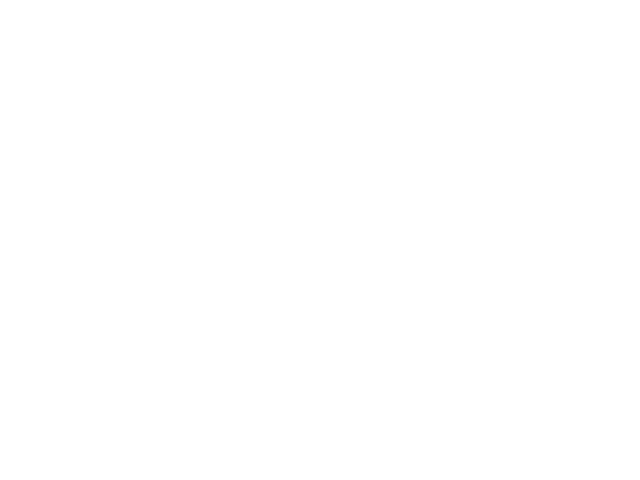

In [9]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time - 90.0
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure()
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GrC Cell Number')
plt.xlabel('Simulation time (s)')
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
pattern_id = 0
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)
plt.show()

Calculate the average firing frequency of each granular cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.185390625 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

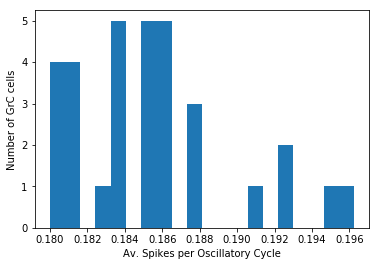

In [10]:
init_time = simulation.current_time - 100.0
end_time = simulation.current_time
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / ((end_time-init_time)*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

0.0


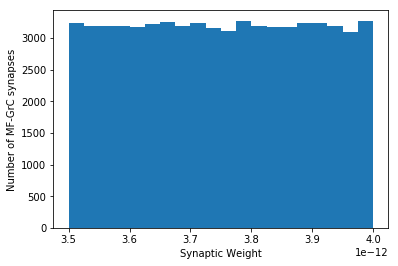

10.0


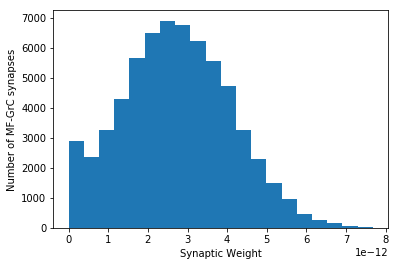

20.0


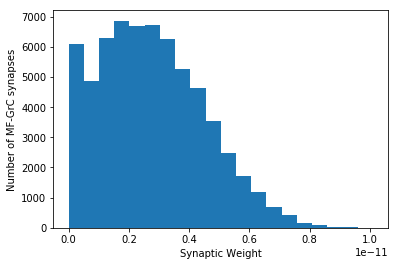

30.0


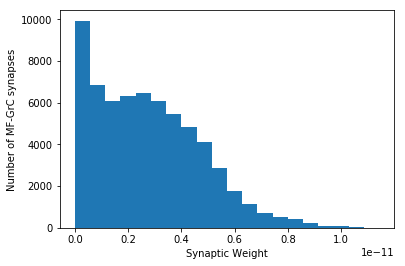

40.0


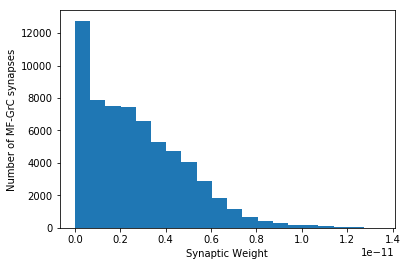

50.0


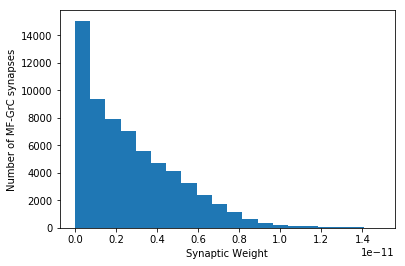

60.0


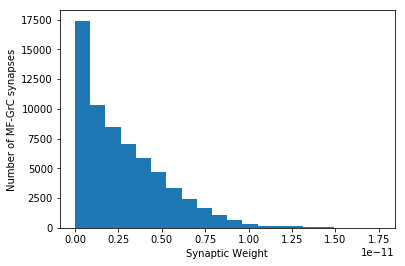

70.0


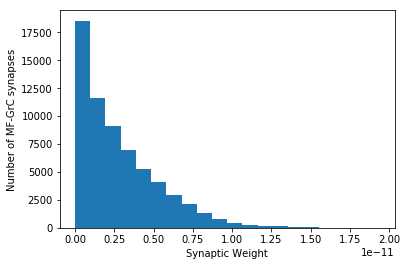

80.0


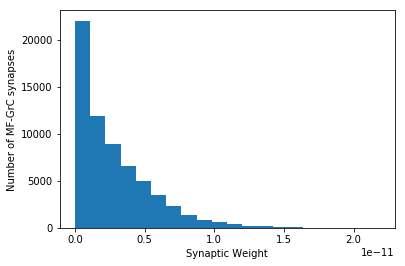

90.0


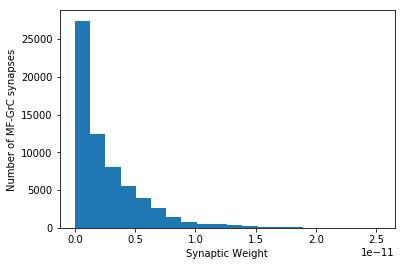

100.0


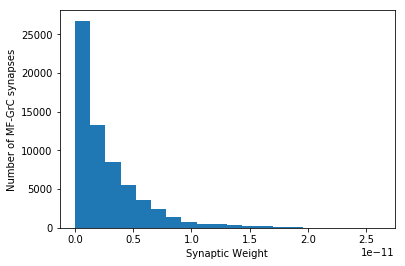

110.0


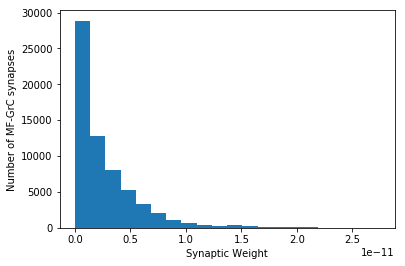

120.0


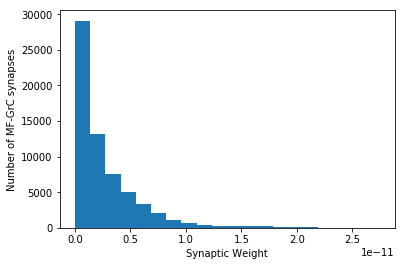

130.0


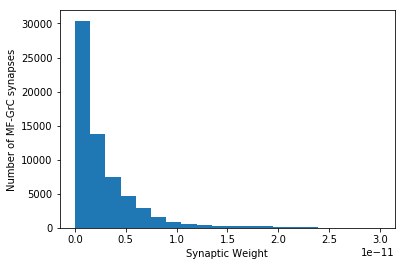

140.0


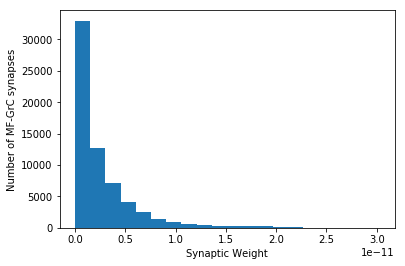

150.0


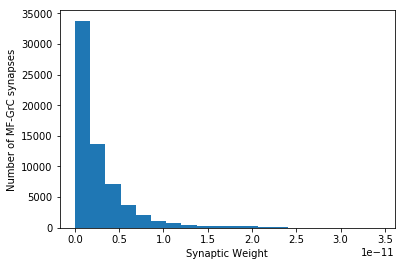

160.0


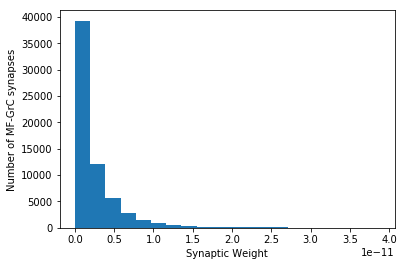

170.0


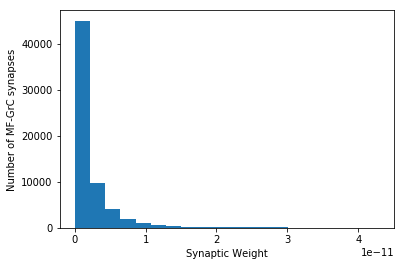

180.0


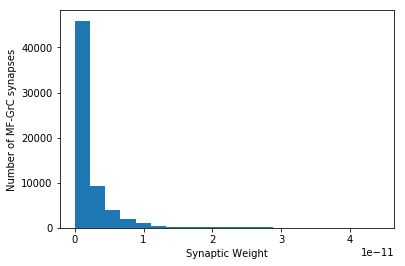

190.0


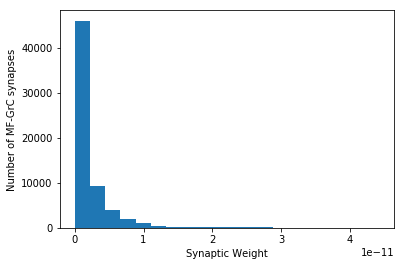

200.0


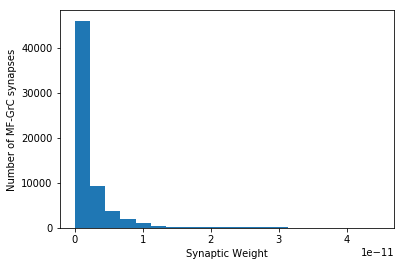

210.0


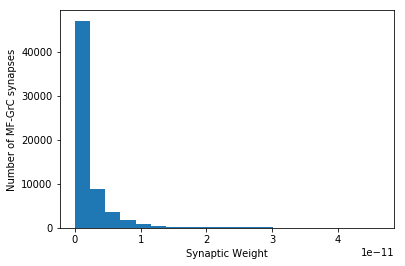

220.0


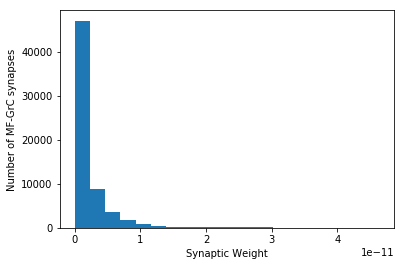

230.0


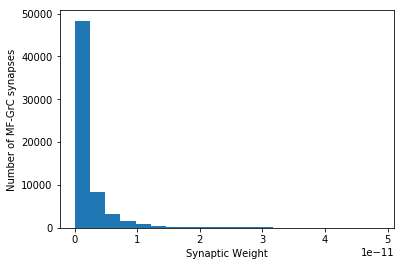

240.0


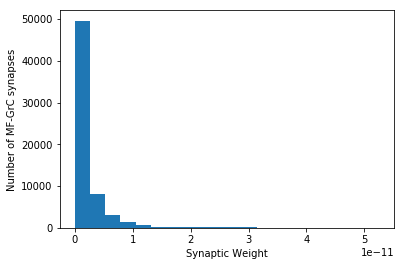

250.0


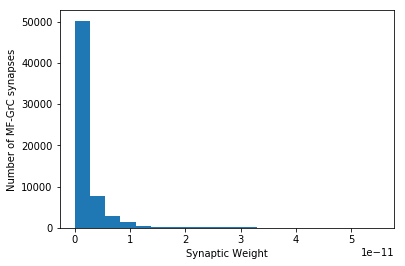

260.0


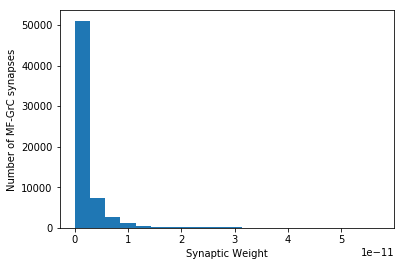

270.0


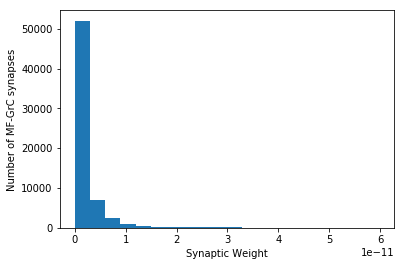

280.0


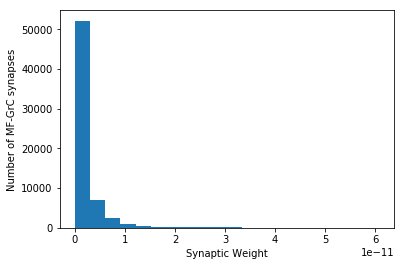

290.0


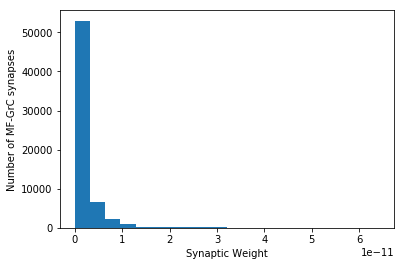

300.0


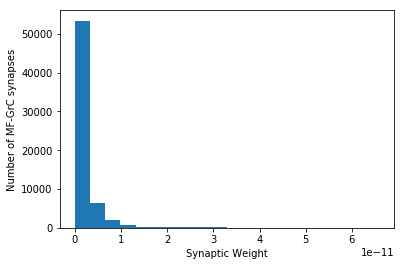

310.0


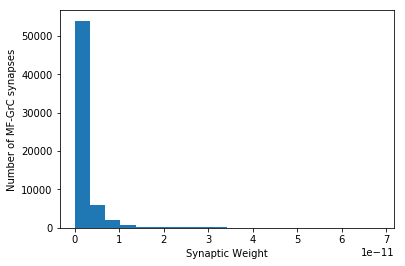

320.0


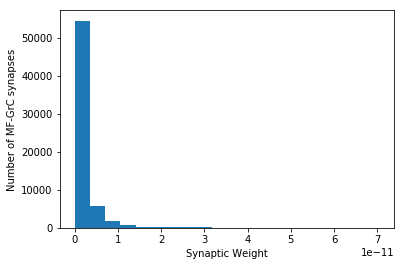

330.0


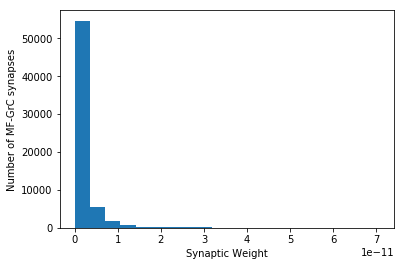

340.0


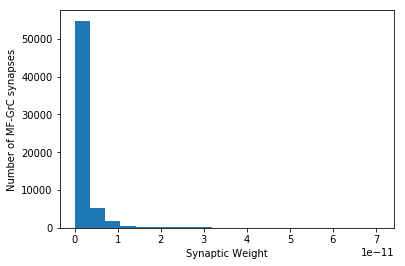

350.0


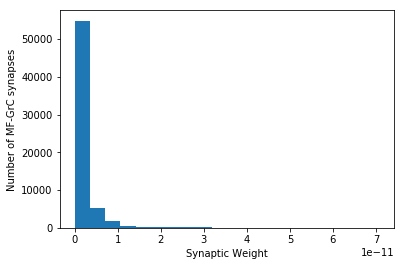

360.0


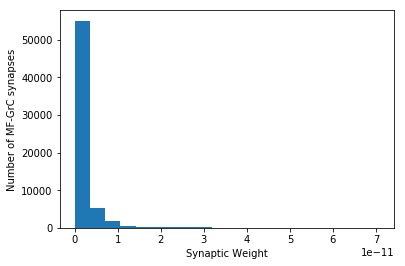

370.0


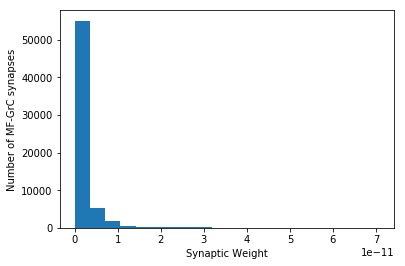

380.0


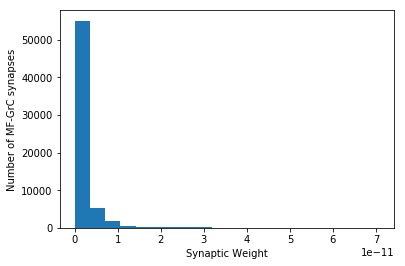

390.0


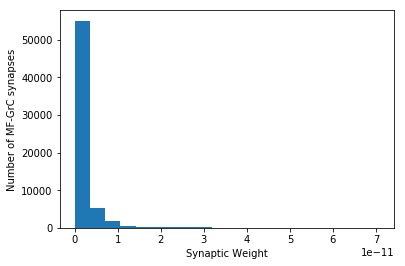

400.0


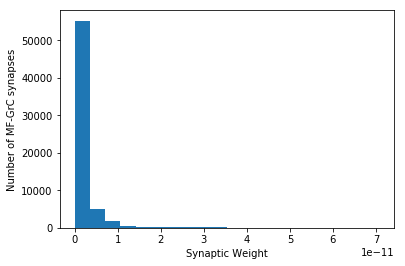

410.0


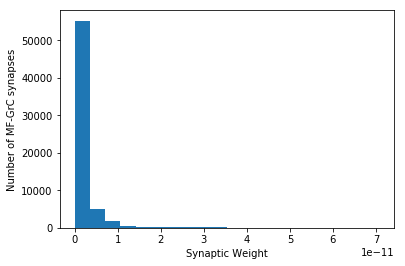

420.0


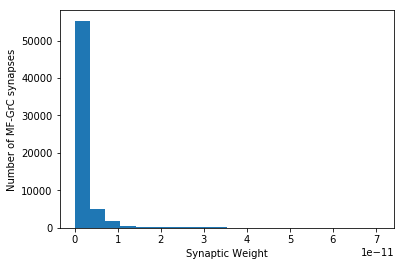

430.0


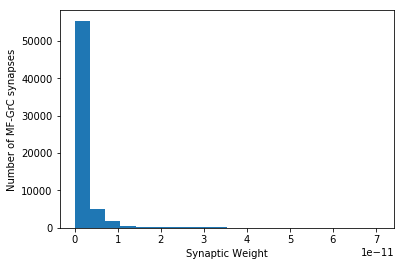

440.0


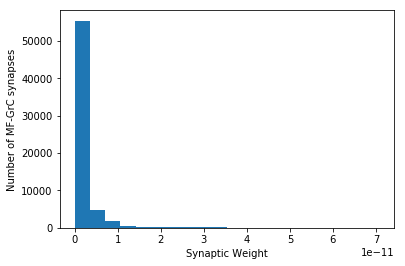

450.0


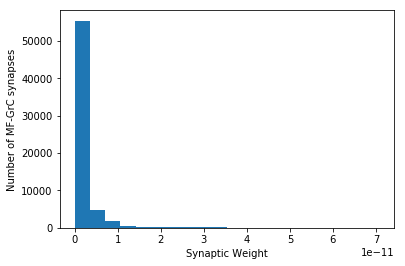

460.0


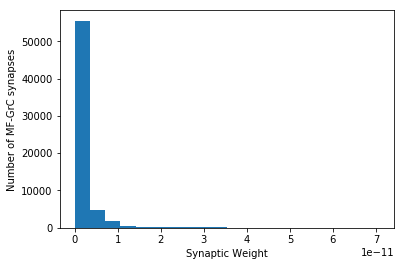

470.0


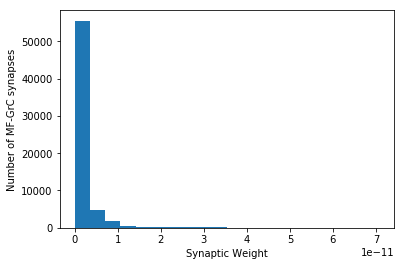

480.0


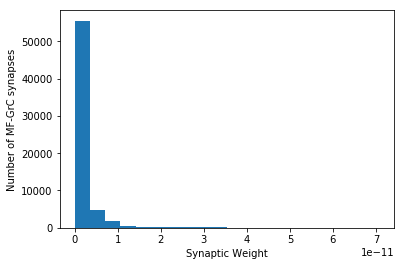

490.0


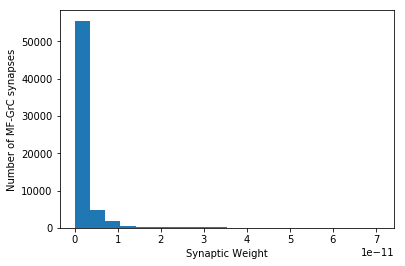

500.0


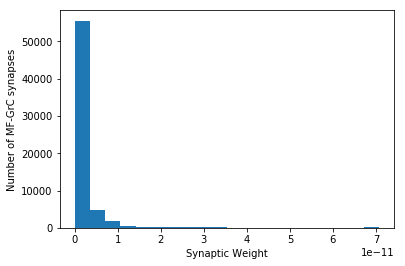

510.0


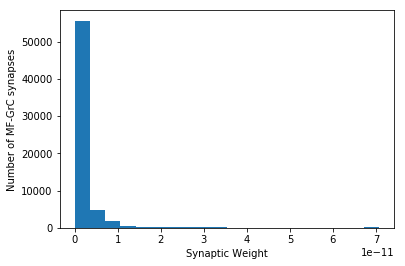

520.0


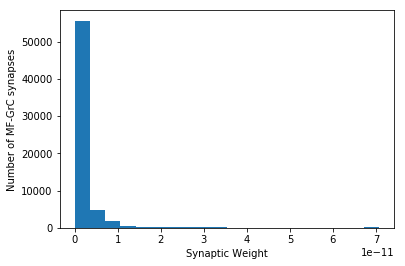

530.0


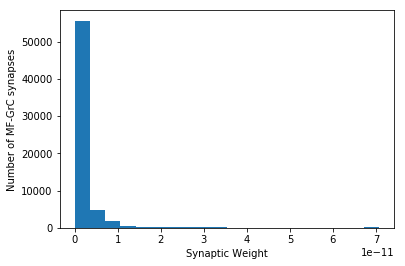

540.0


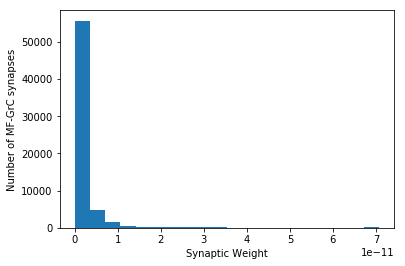

550.0


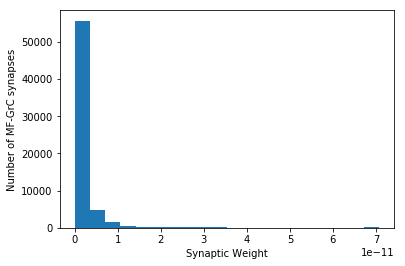

560.0


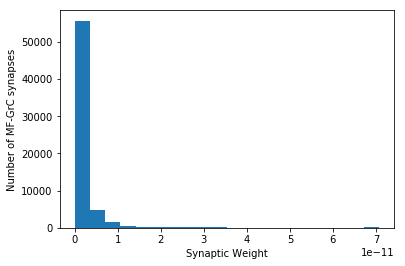

570.0


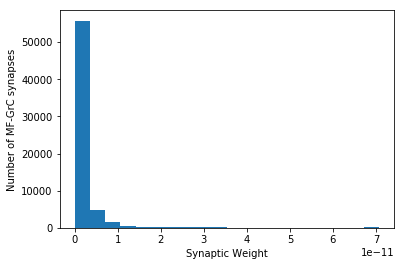

580.0


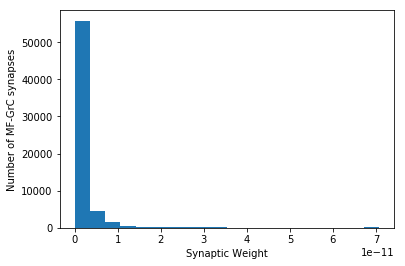

590.0


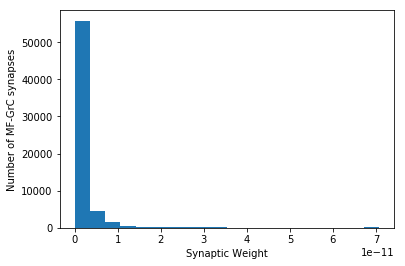

600.0


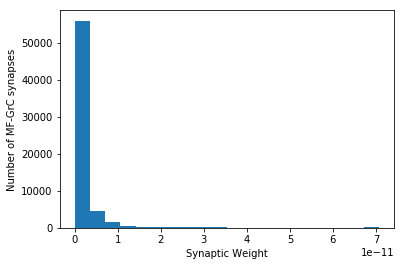

610.0


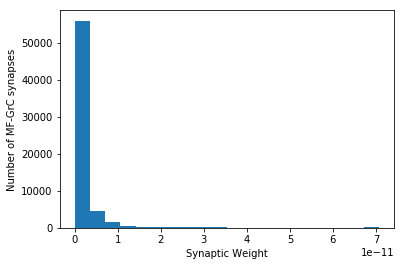

620.0


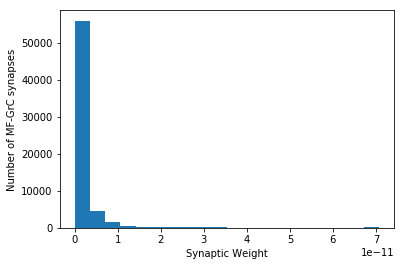

630.0


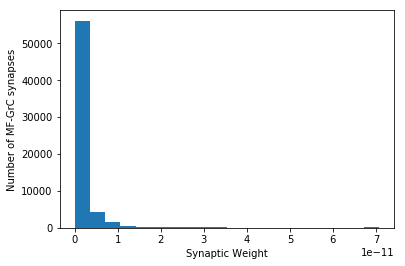

640.0


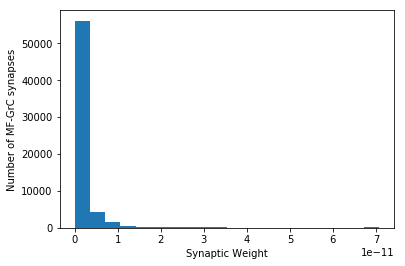

650.0


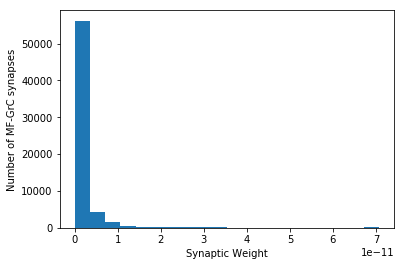

660.0


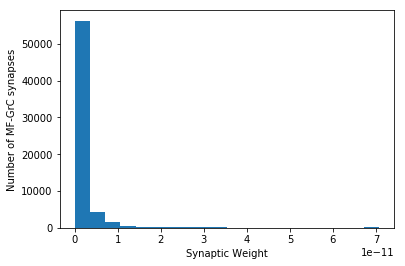

670.0


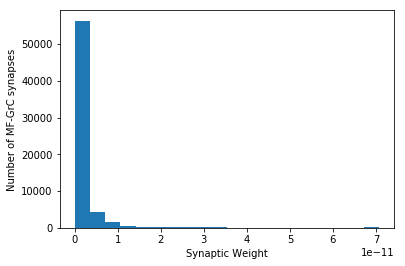

680.0


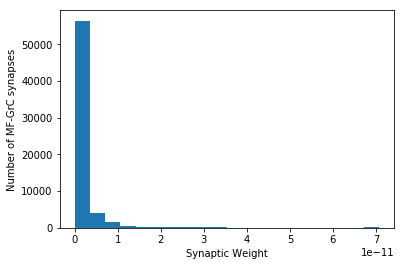

690.0


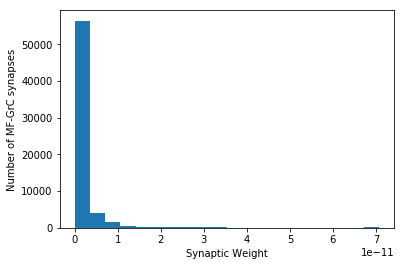

700.0


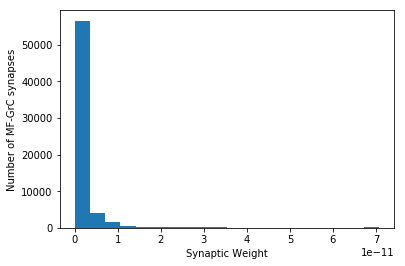

710.0


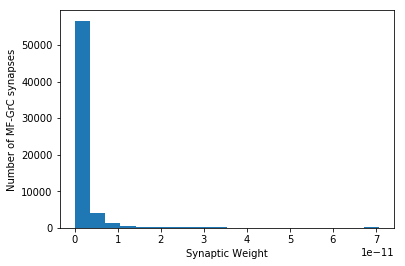

720.0


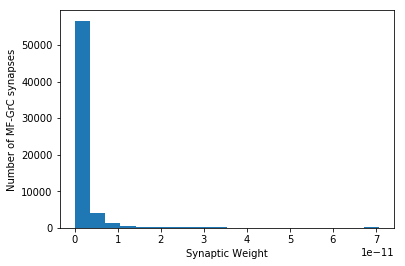

730.0


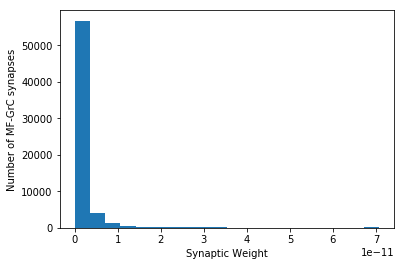

740.0


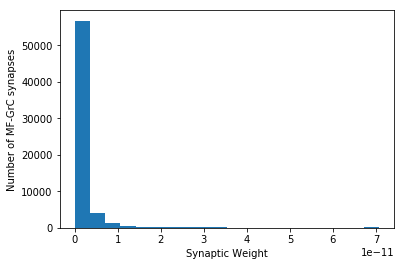

750.0


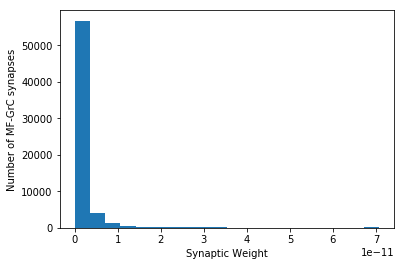

760.0


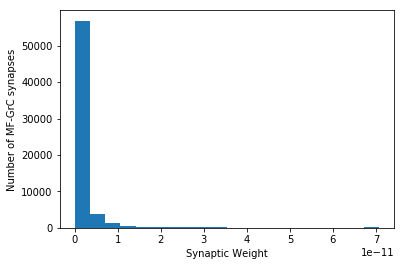

770.0


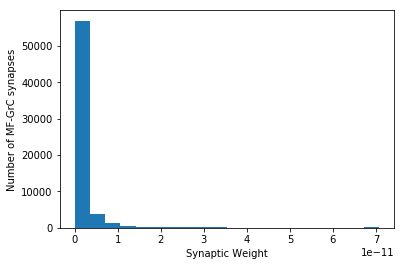

780.0


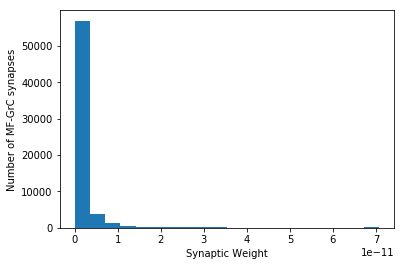

790.0


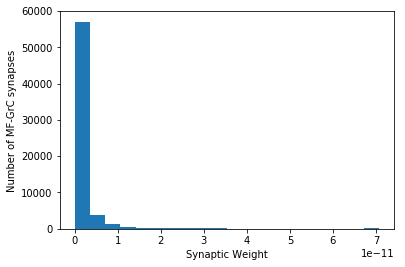

800.0


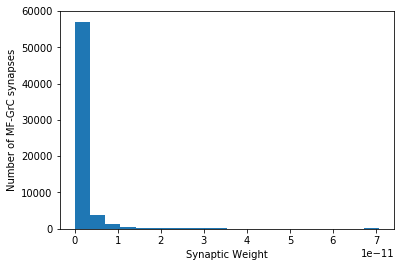

810.0


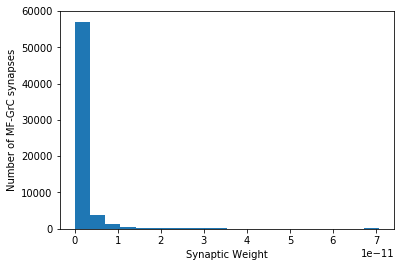

820.0


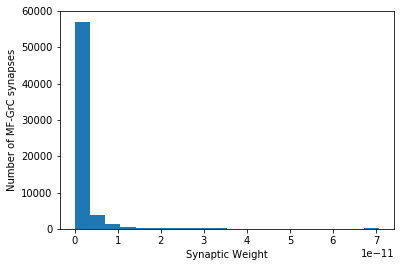

830.0


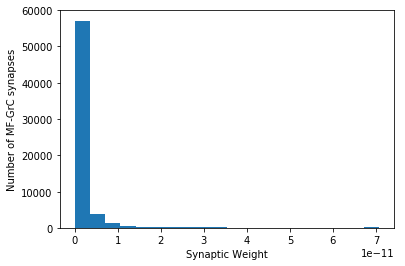

840.0


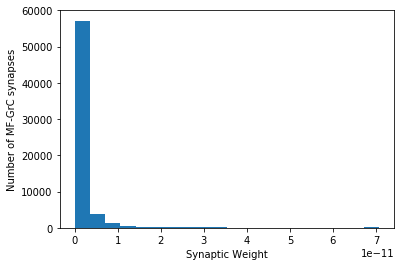

850.0


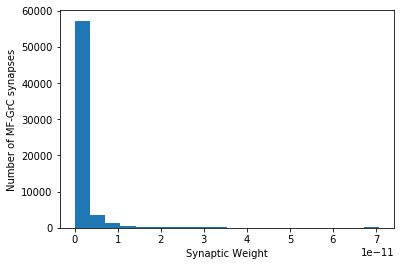

860.0


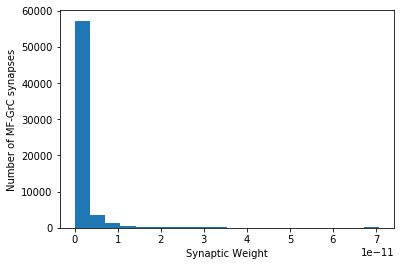

870.0


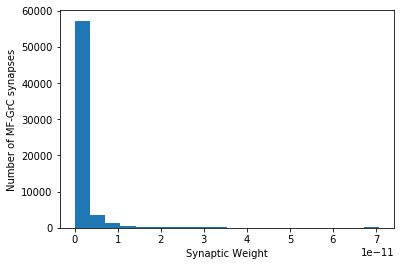

880.0


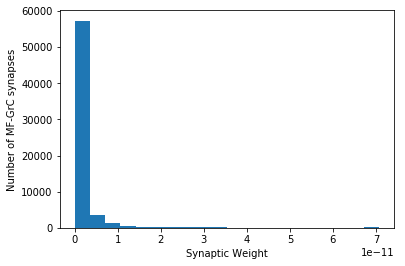

890.0


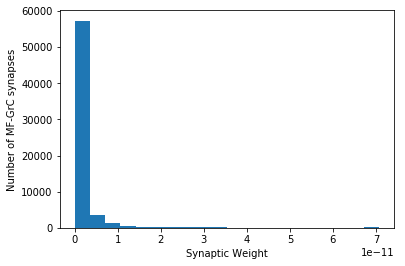

900.0


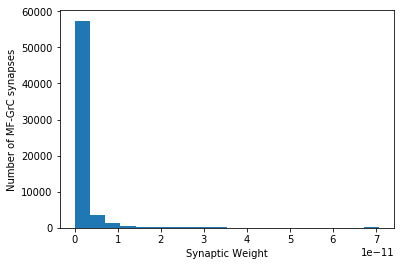

910.0


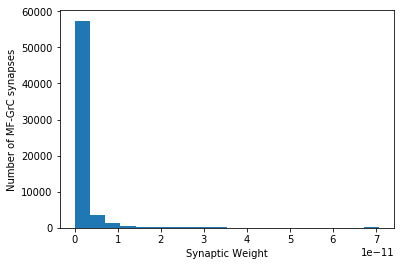

920.0


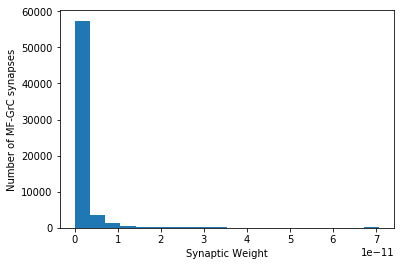

930.0


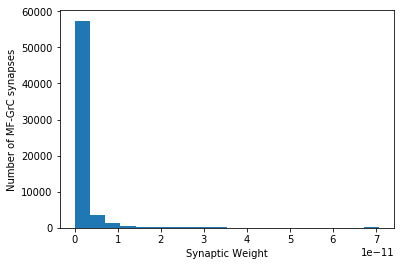

940.0


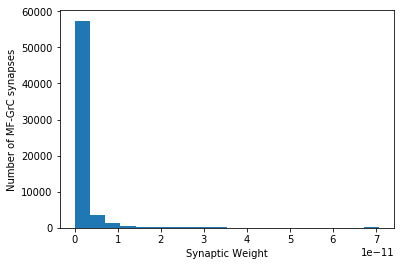

950.0


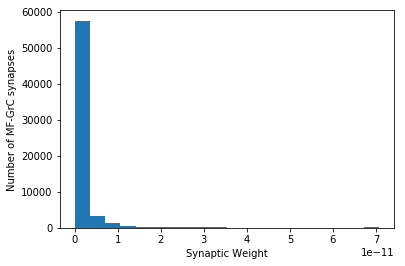

960.0


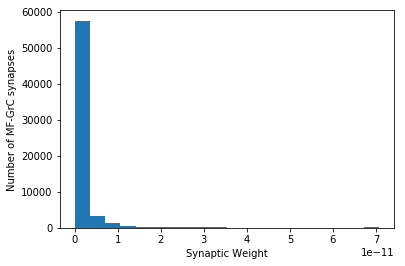

970.0


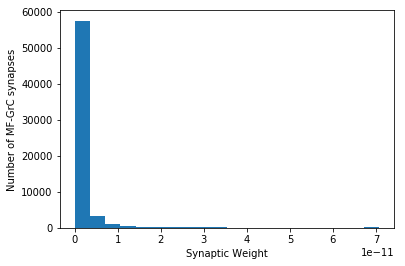

980.0


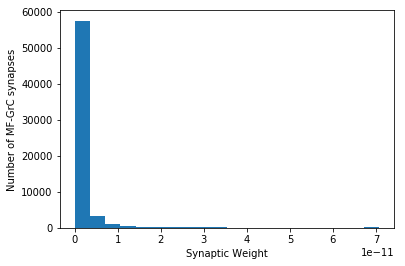

990.0


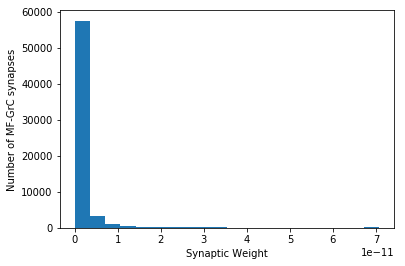

1000.0


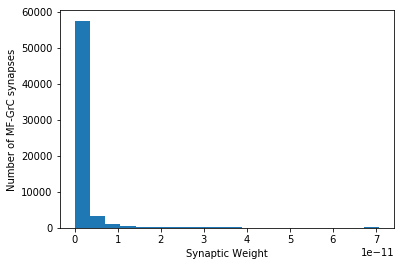

1010.0


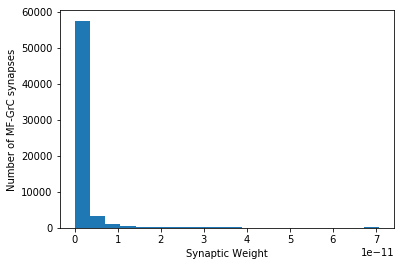

1020.0


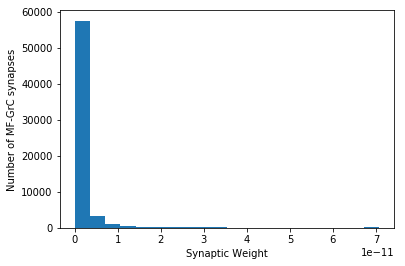

1030.0


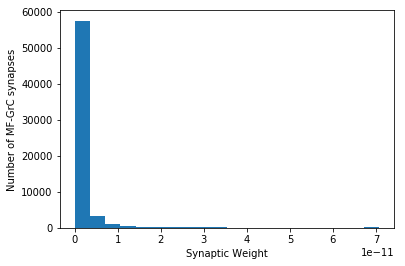

1040.0


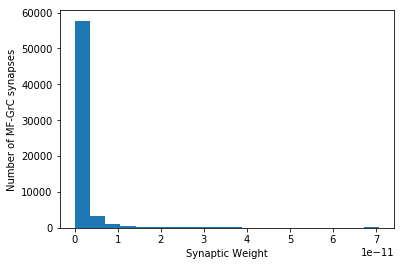

1050.0


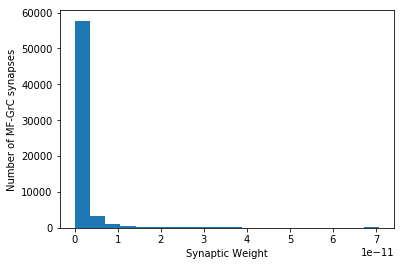

1060.0


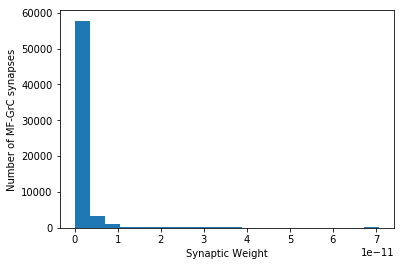

1070.0


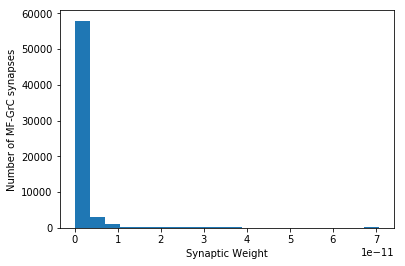

1080.0


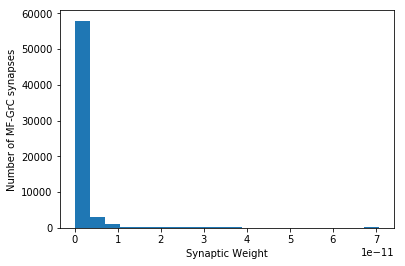

1090.0


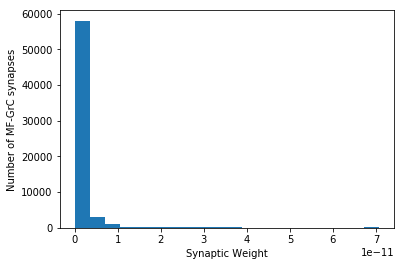

1100.0


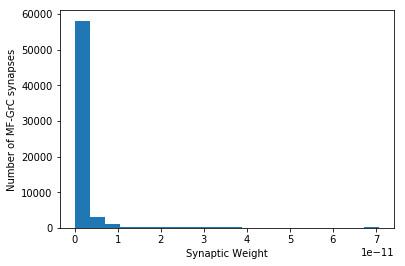

1110.0


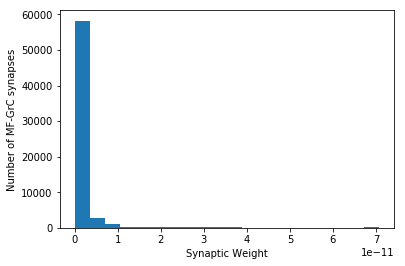

1120.0


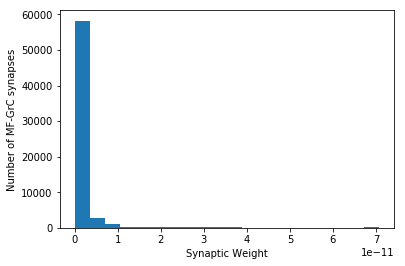

1130.0


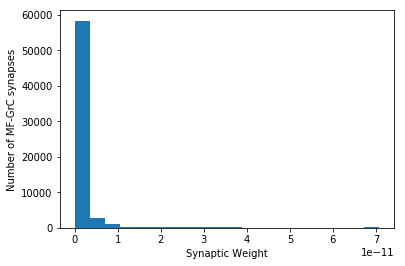

1140.0


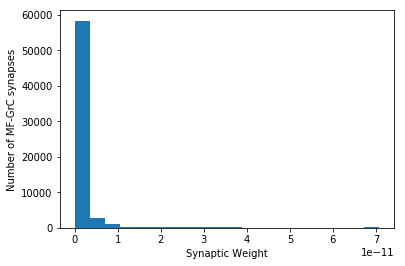

1150.0


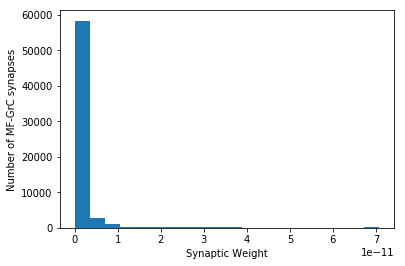

1160.0


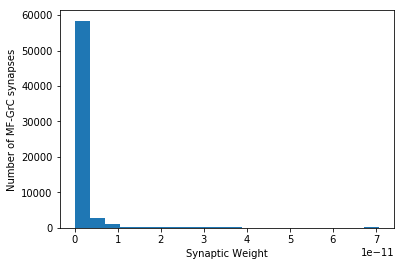

1170.0


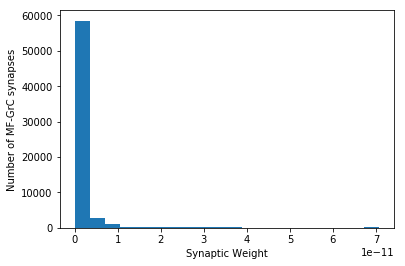

1180.0


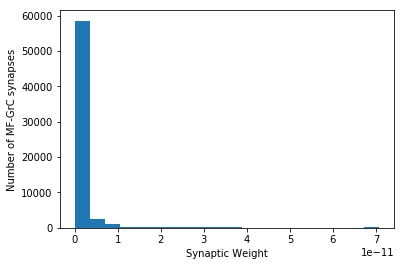

1190.0


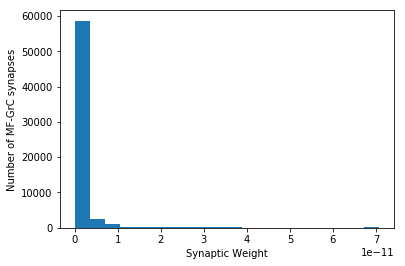

1200.0


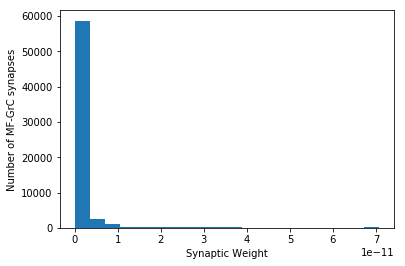

1210.0


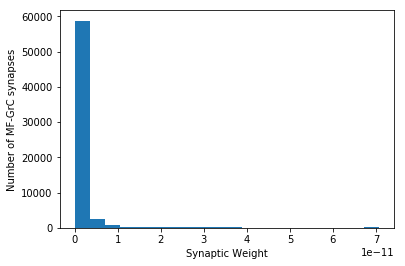

1220.0


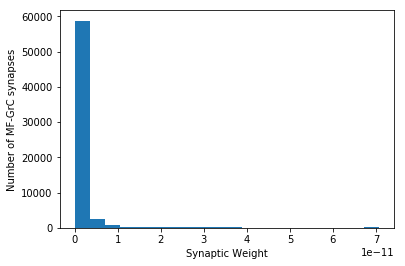

1230.0


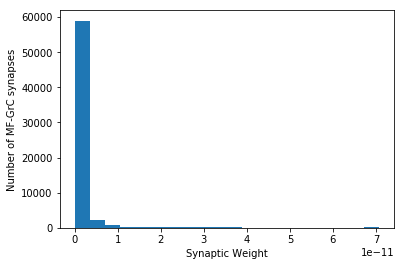

1240.0


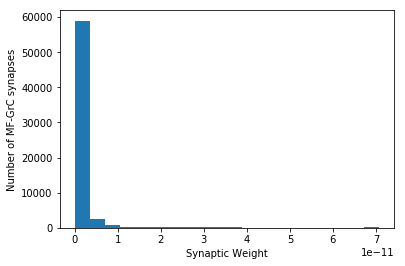

1250.0


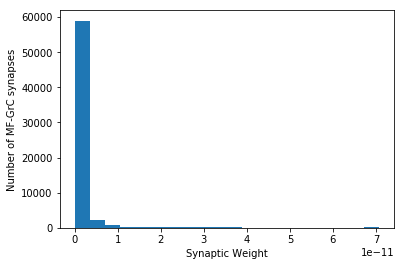

1260.0


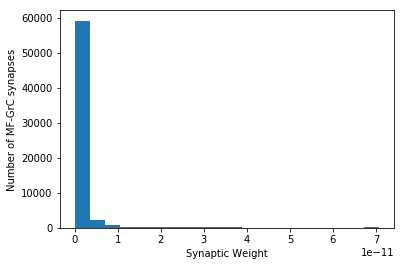

1270.0


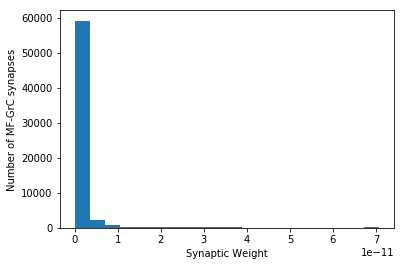

1280.0


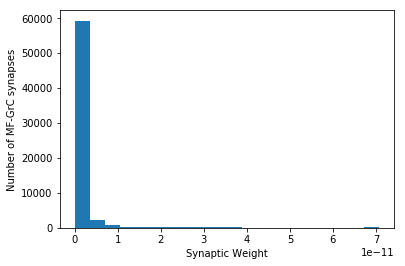

1290.0


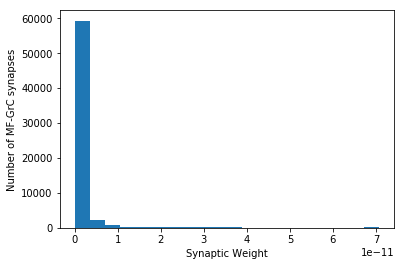

1300.0


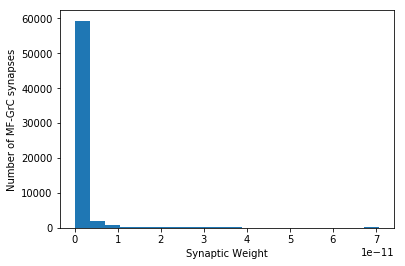

1310.0


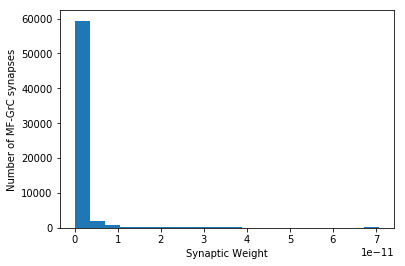

1320.0


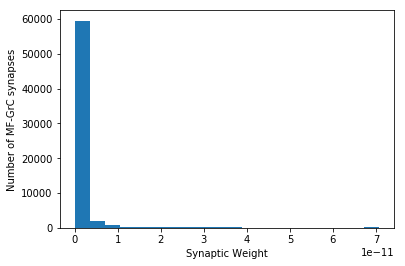

1330.0


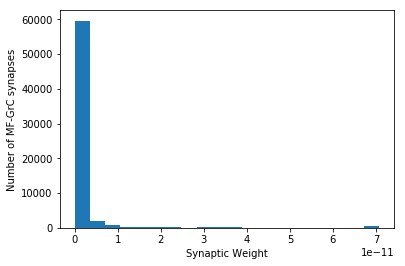

1340.0


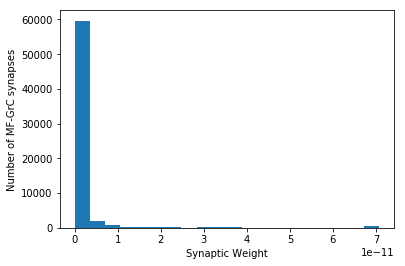

1350.0


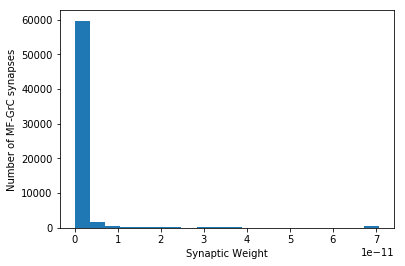

1360.0


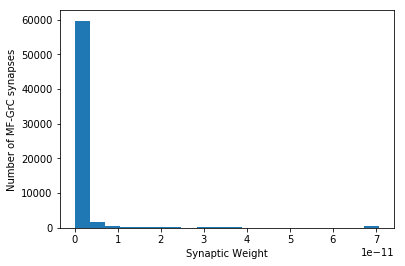

1370.0


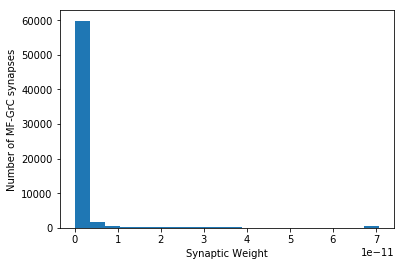

1380.0


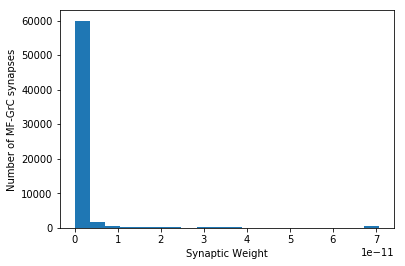

1390.0


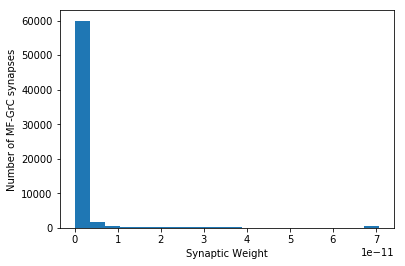

1400.0


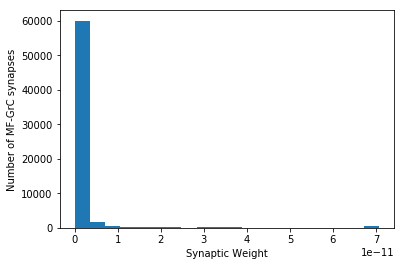

1410.0


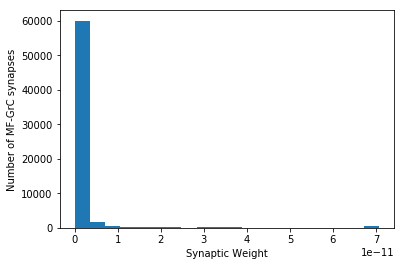

1420.0


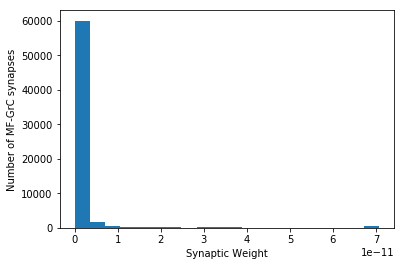

1430.0


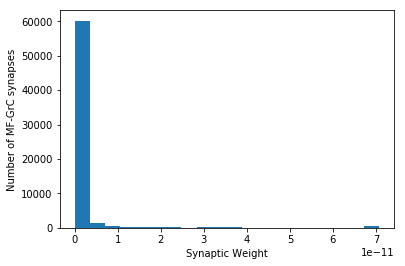

1440.0


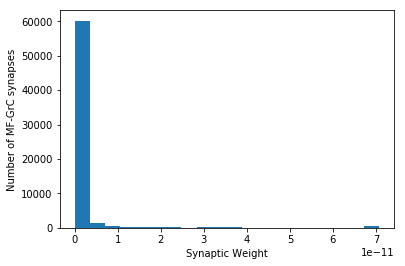

1450.0


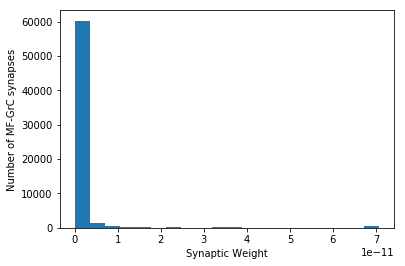

1460.0


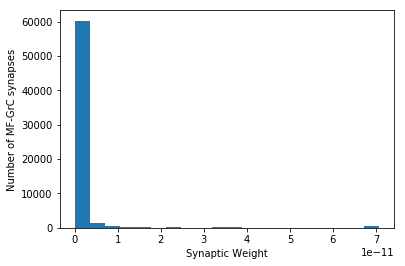

1470.0


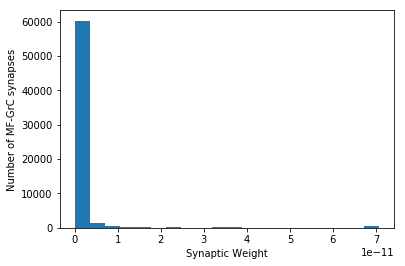

1480.0


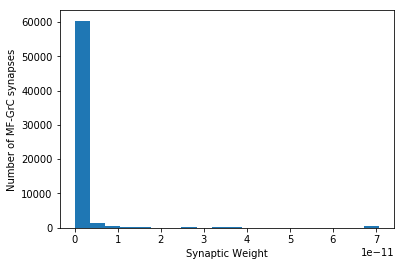

1490.0


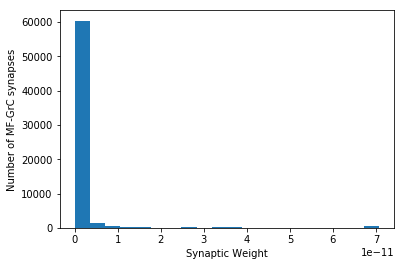

1500.0


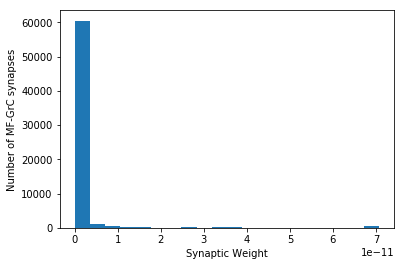

1510.0


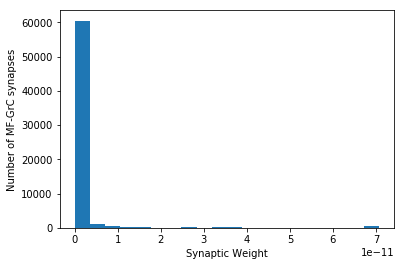

1520.0


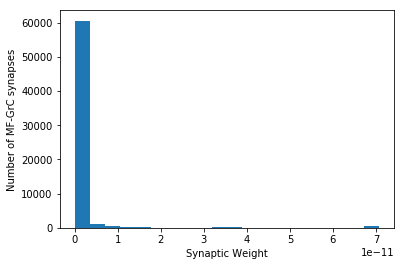

1530.0


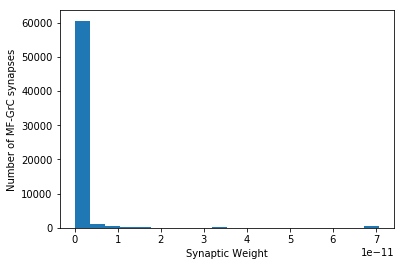

1540.0


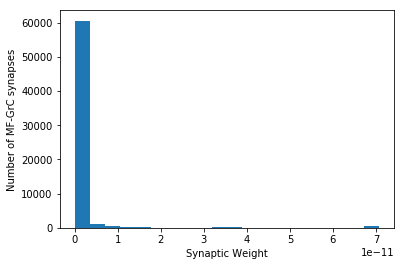

1550.0


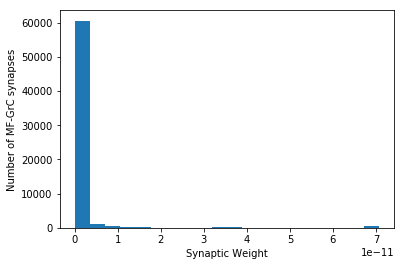

1560.0


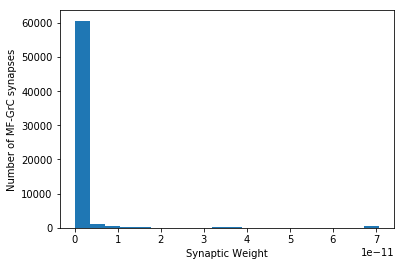

1570.0


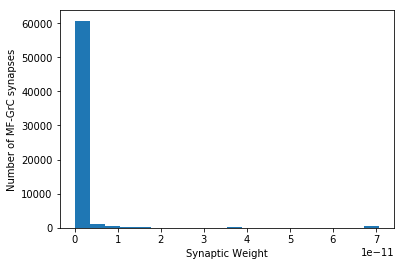

1580.0


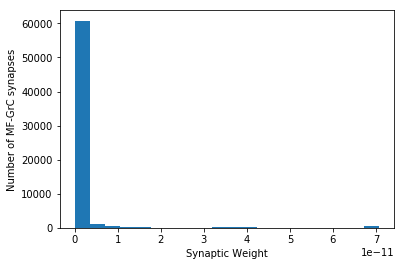

1590.0


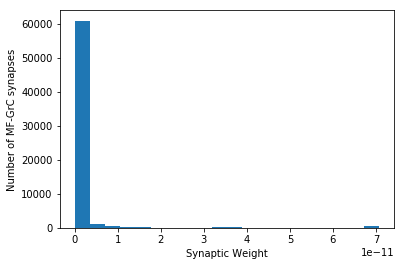

1600.0


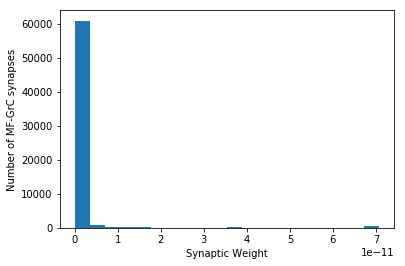

1610.0


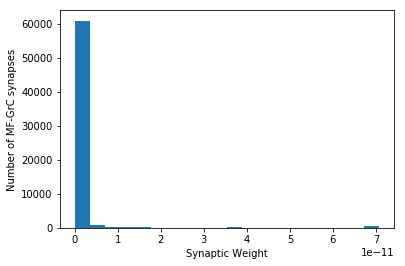

1620.0


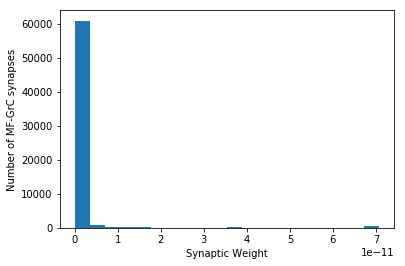

1630.0


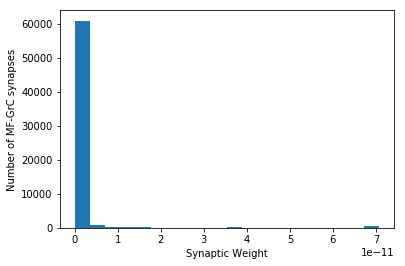

1640.0


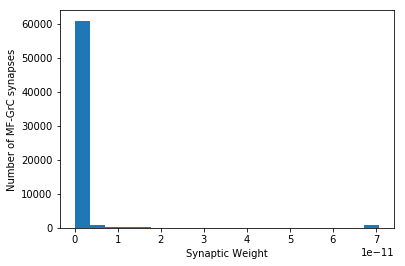

1650.0


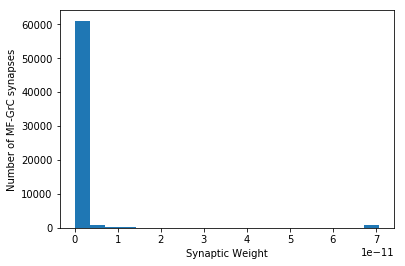

1660.0


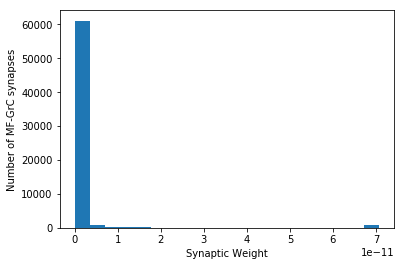

1670.0


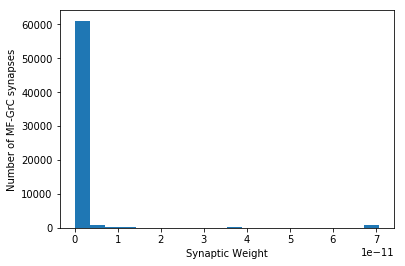

1680.0


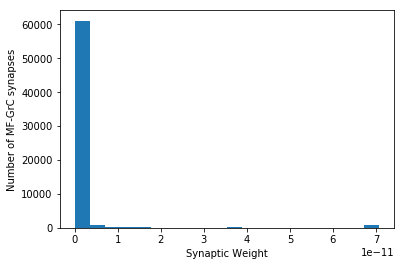

1690.0


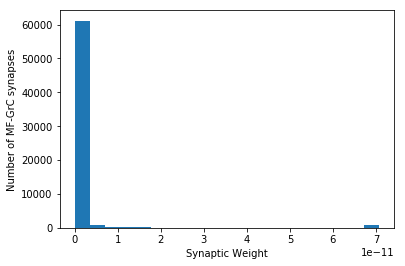

1700.0


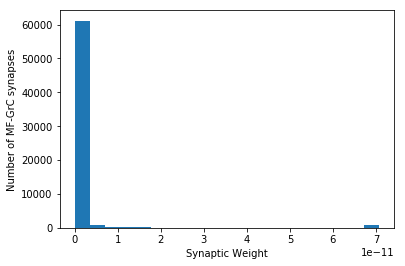

1710.0


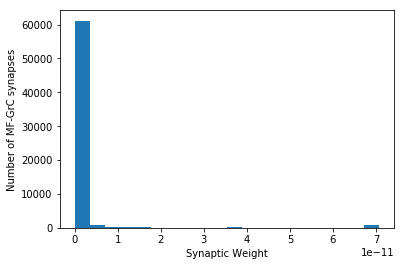

1720.0


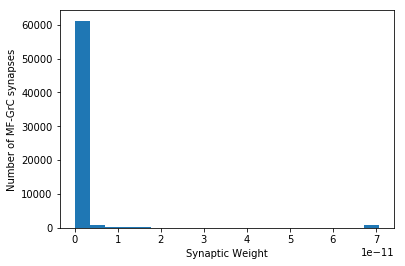

1730.0


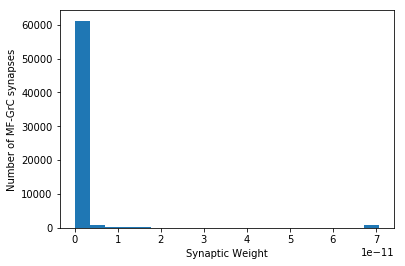

1740.0


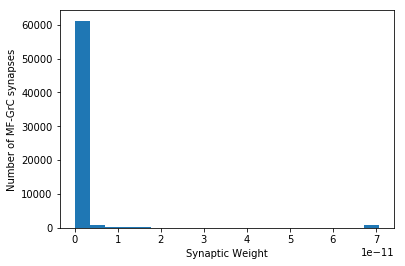

1750.0


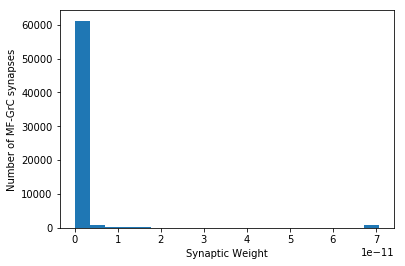

1760.0


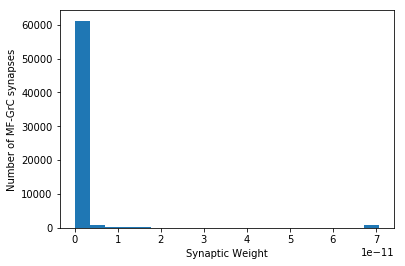

1770.0


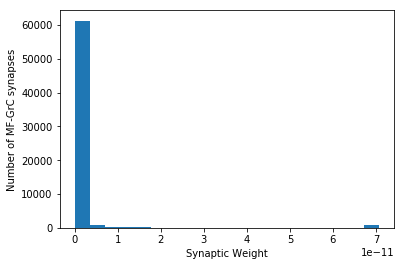

1780.0


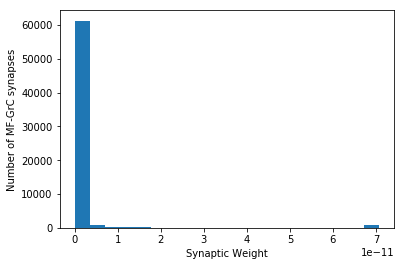

1790.0


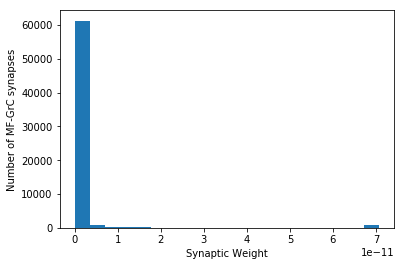

1800.0


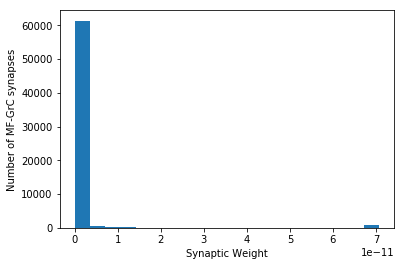

1810.0


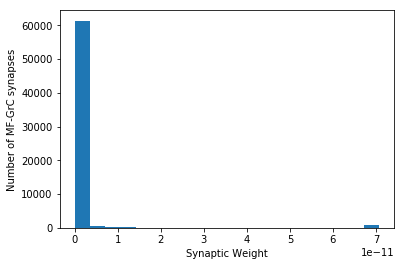

1820.0


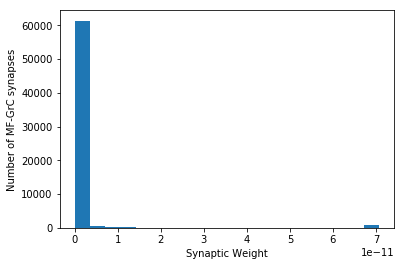

1830.0


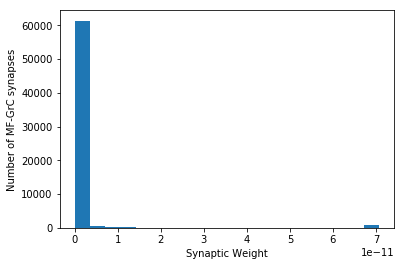

1840.0


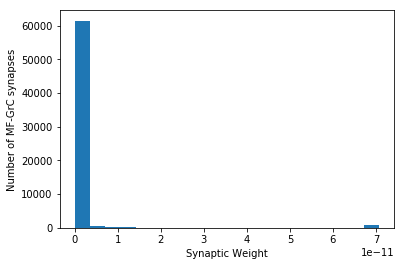

1850.0


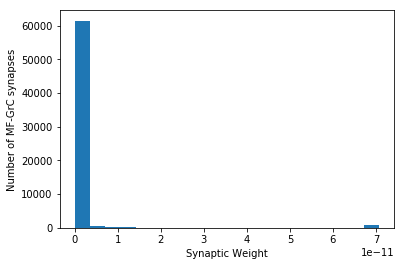

1860.0


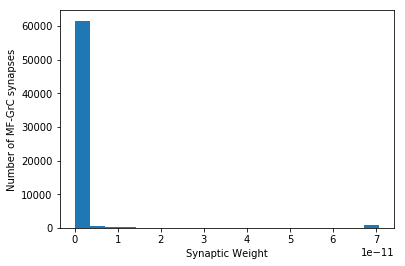

1870.0


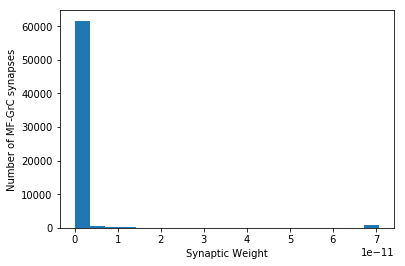

1880.0


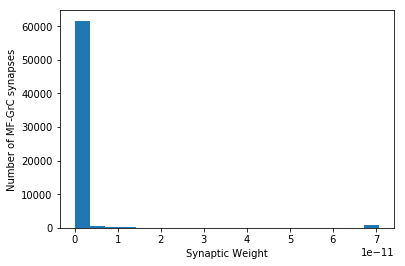

1890.0


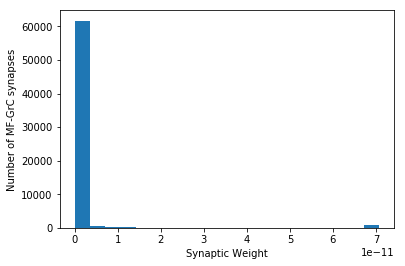

1900.0


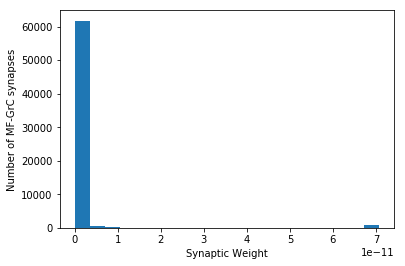

1910.0


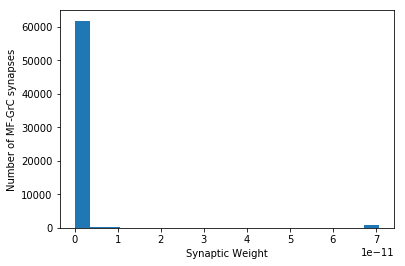

1920.0


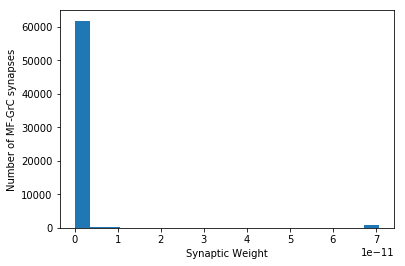

1930.0


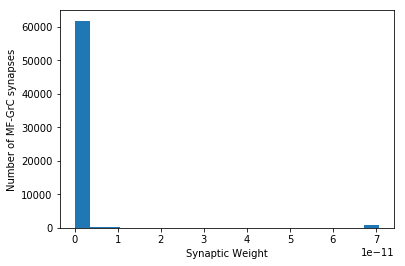

1940.0


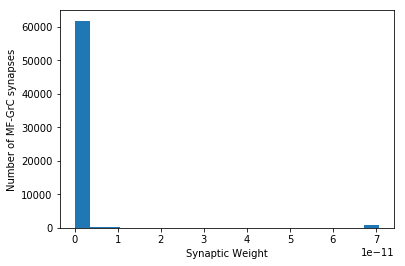

1950.0


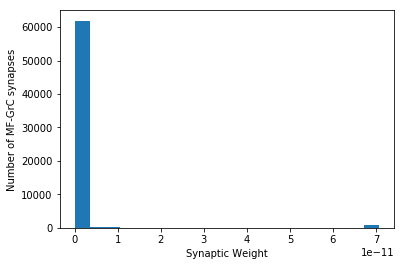

1960.0


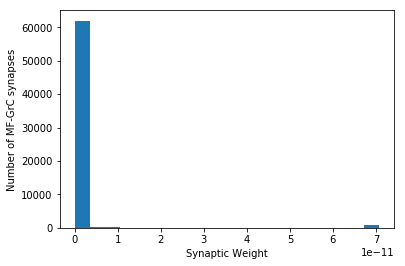

1970.0


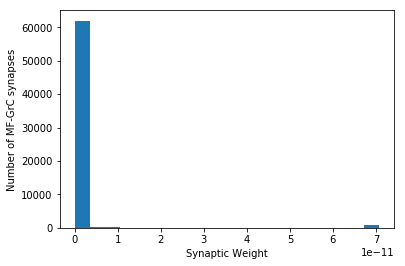

1980.0


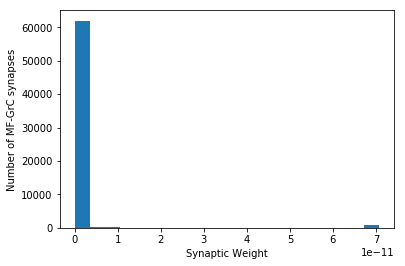

1990.0


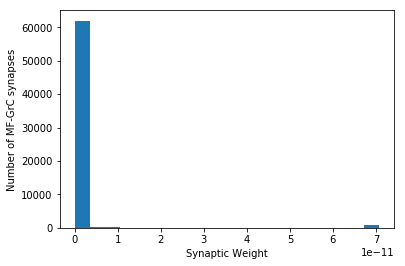

2000.0


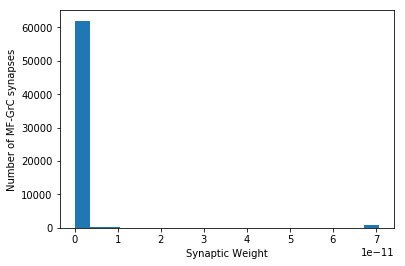

2010.0


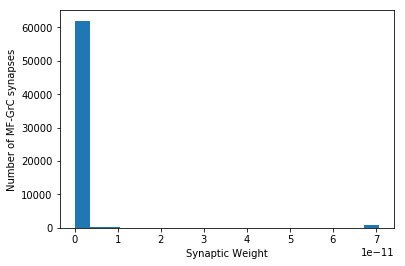

2020.0


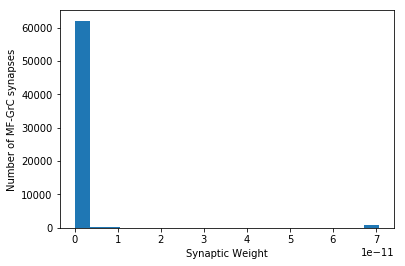

2030.0


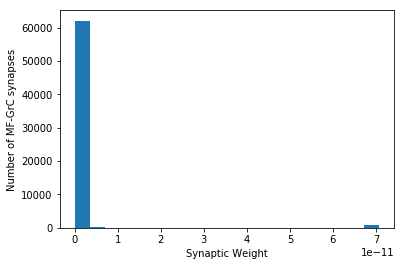

2040.0


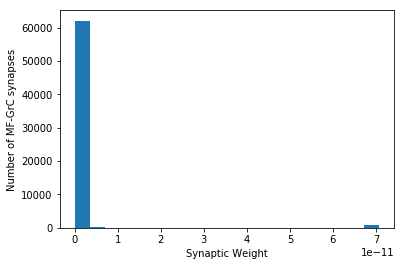

2050.0


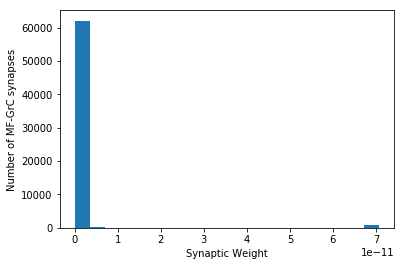

2060.0


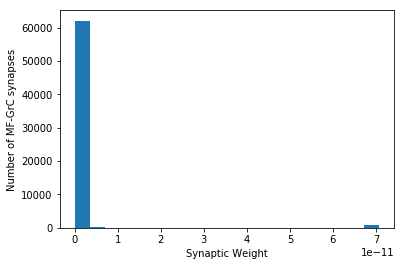

2070.0


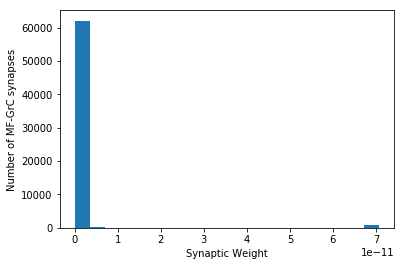

2080.0


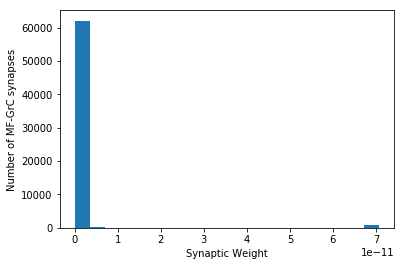

2090.0


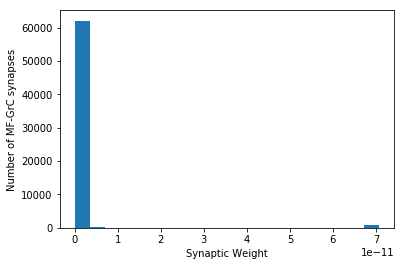

2100.0


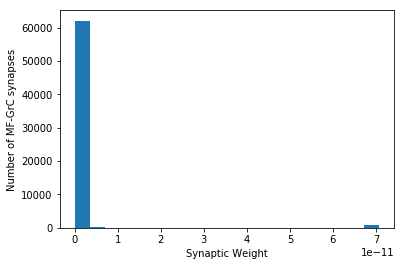

2110.0


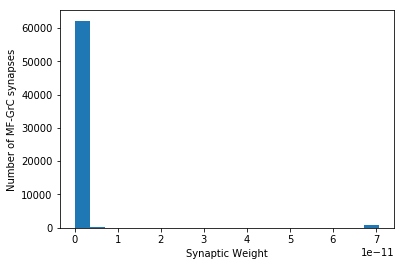

2120.0


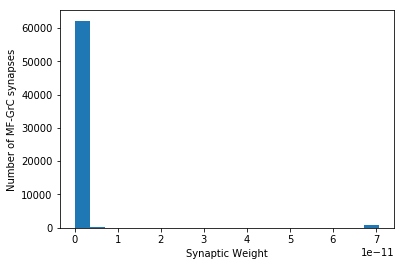

2130.0


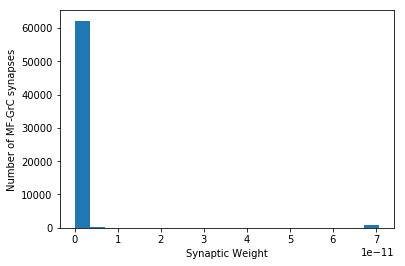

2140.0


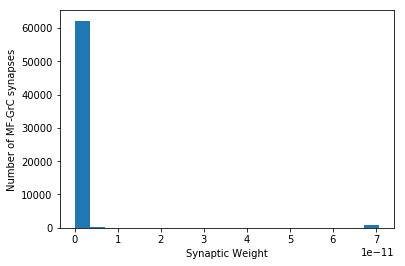

2150.0


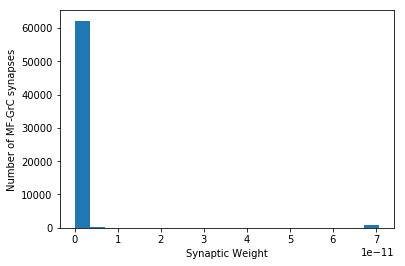

2160.0


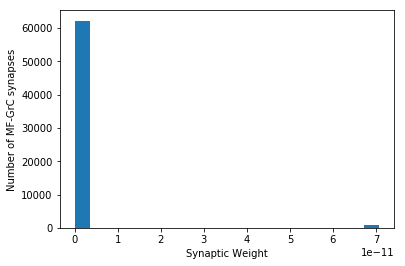

2170.0


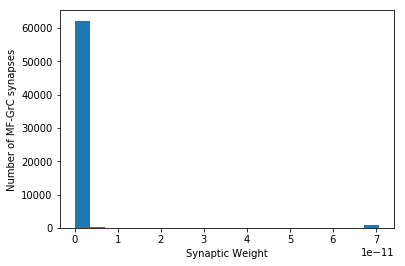

2180.0


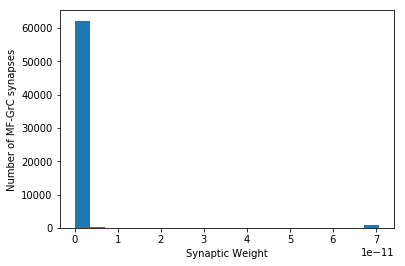

2190.0


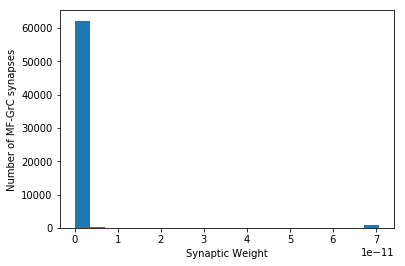

2200.0


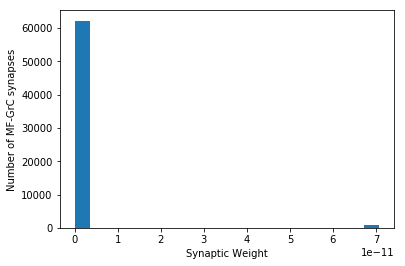

2210.0


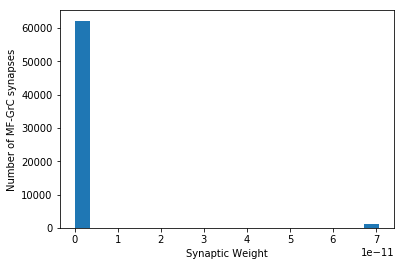

2220.0


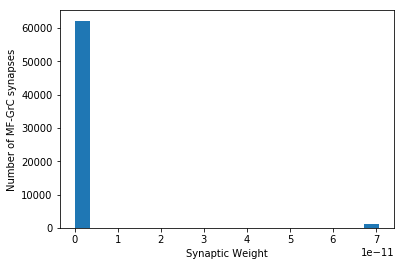

2230.0


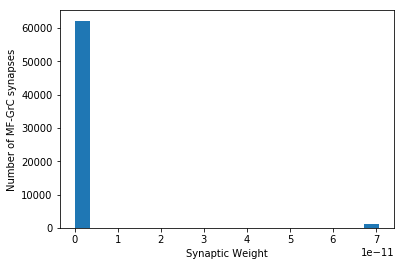

2240.0


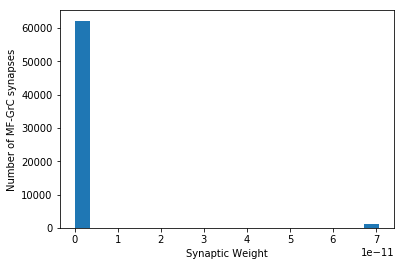

2250.0


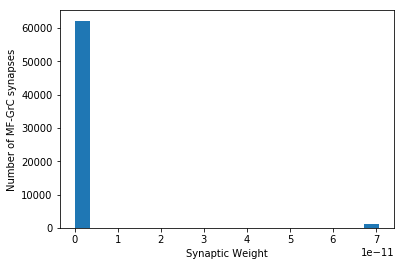

2260.0


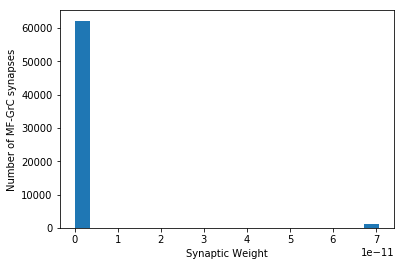

2270.0


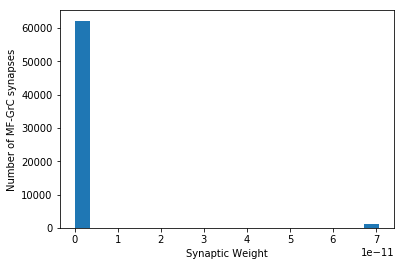

2280.0


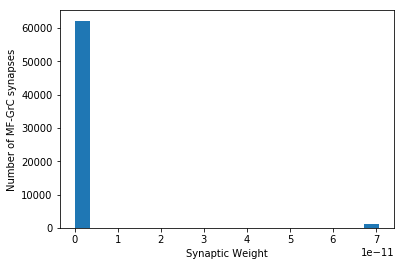

2290.0


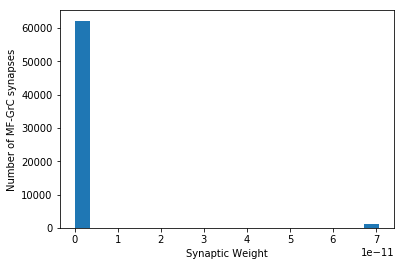

2300.0


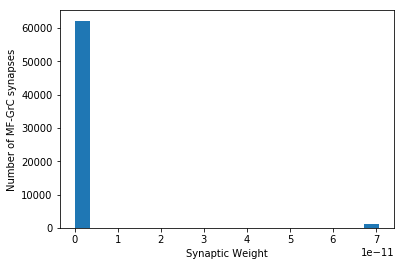

2310.0


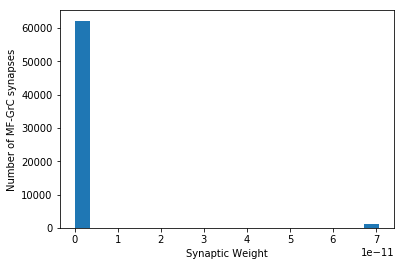

2320.0


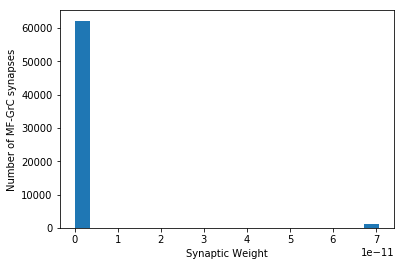

2330.0


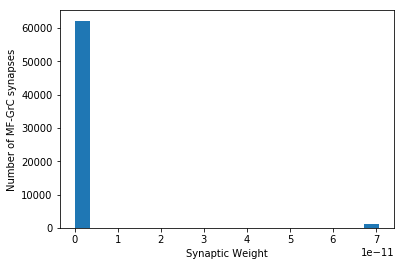

2340.0


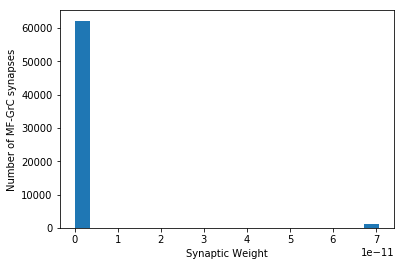

2350.0


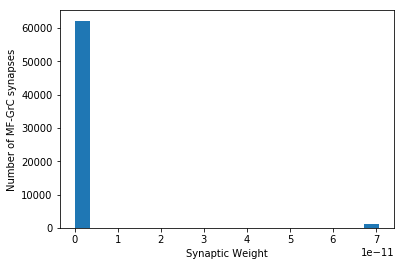

2360.0


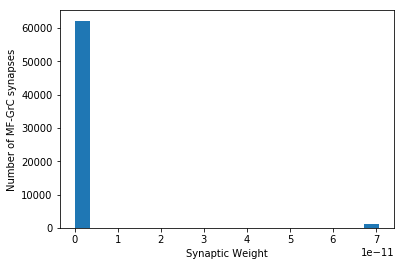

2370.0


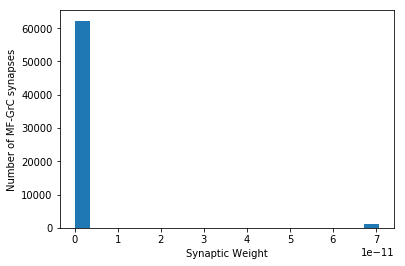

2380.0


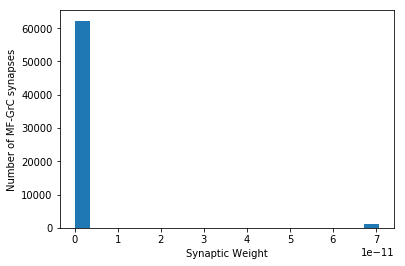

2390.0


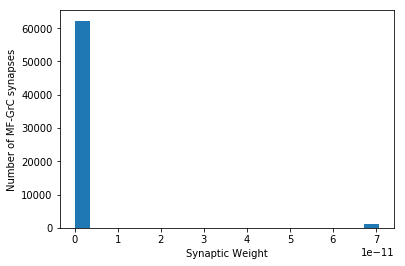

2400.0


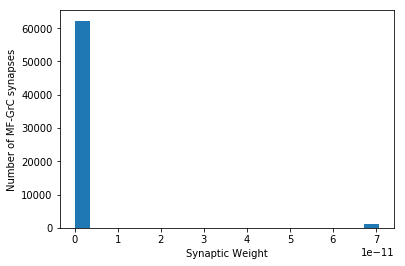

2410.0


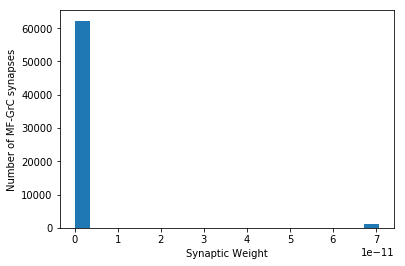

2420.0


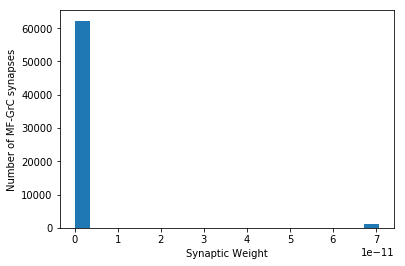

2430.0


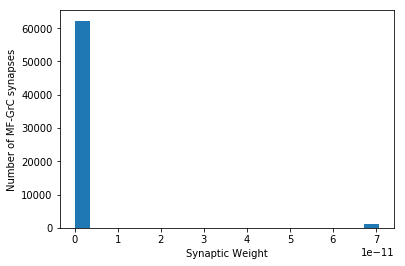

2440.0


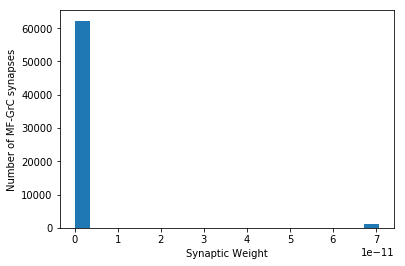

2450.0


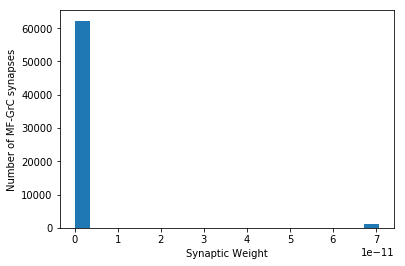

2460.0


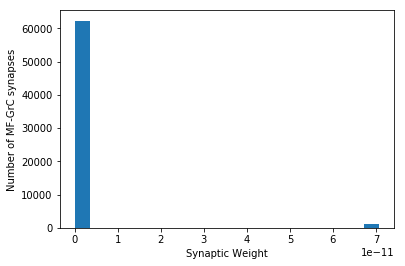

2470.0


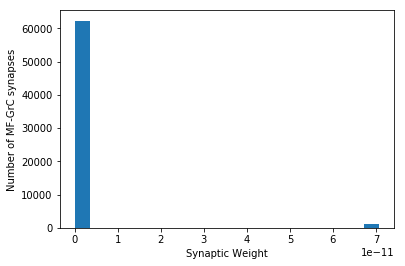

2480.0


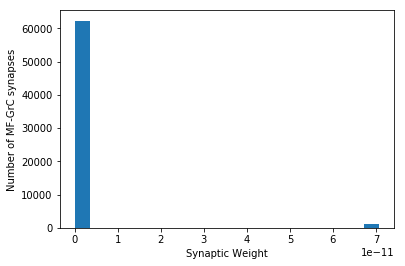

2490.0


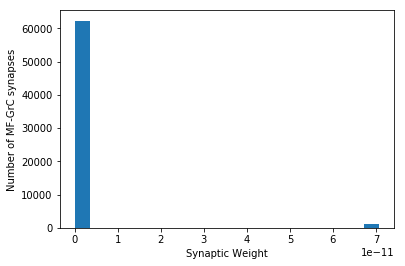

2500.0


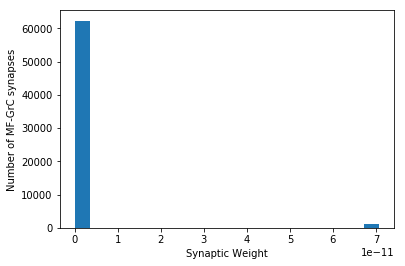

2510.0


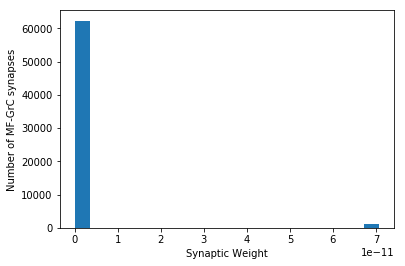

2520.0


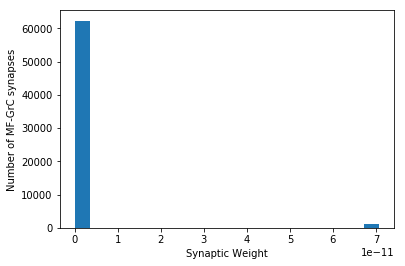

2530.0


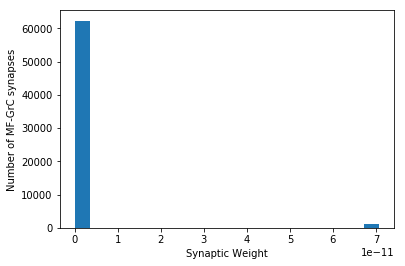

2540.0


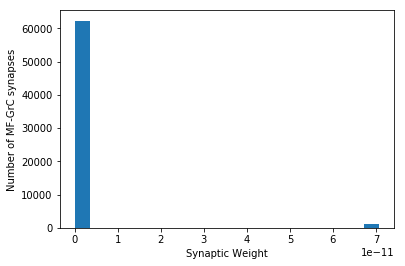

2550.0


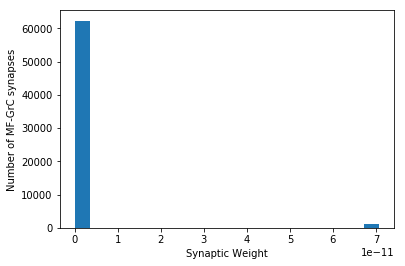

2560.0


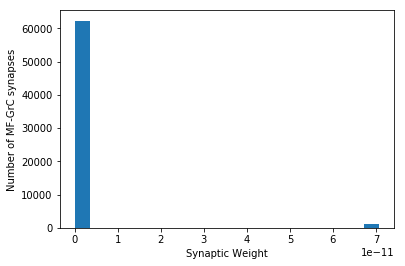

2570.0


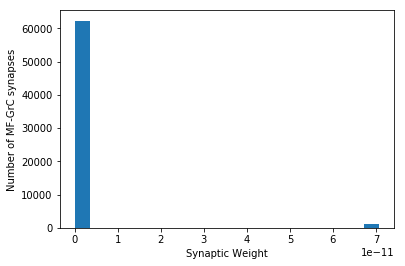

2580.0


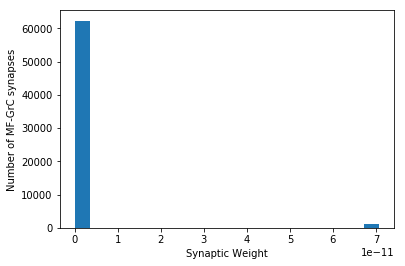

2590.0


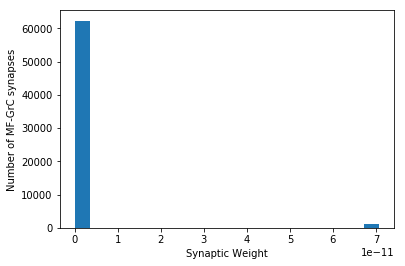

2600.0


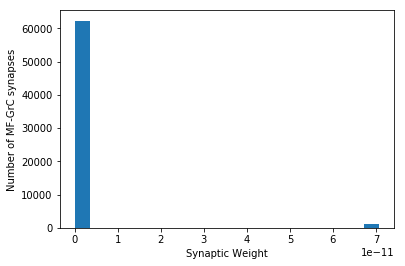

2610.0


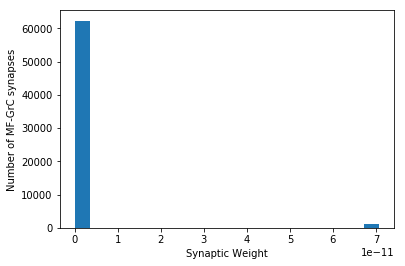

2620.0


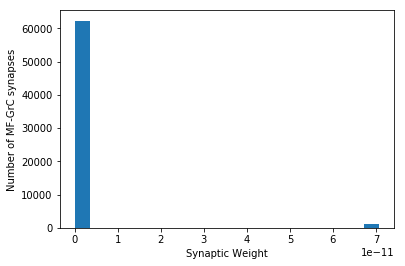

2630.0


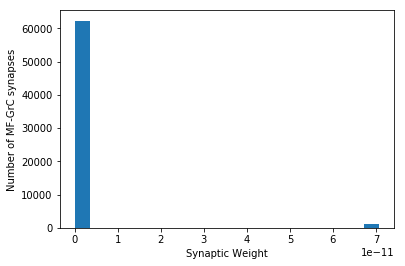

2640.0


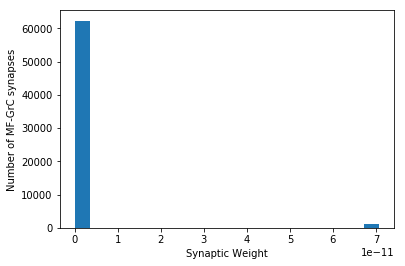

2650.0


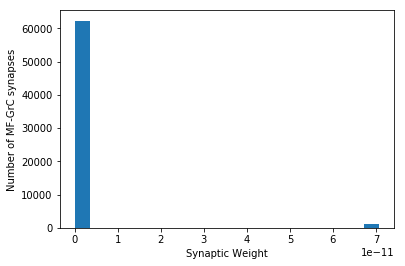

2660.0


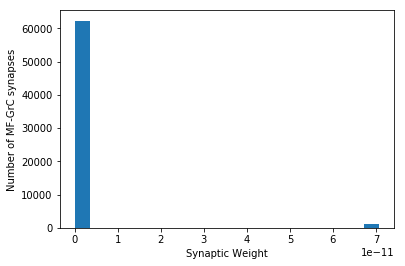

2670.0


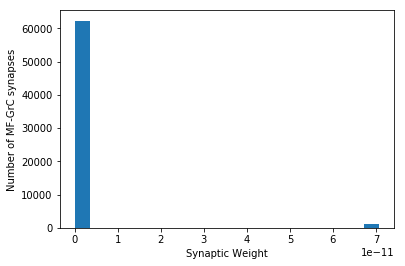

2680.0


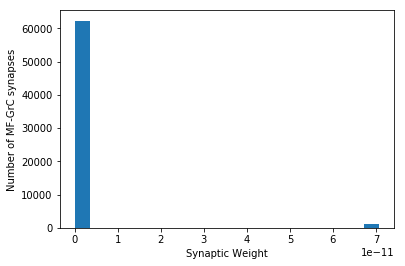

2690.0


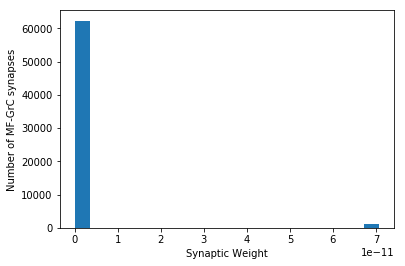

2700.0


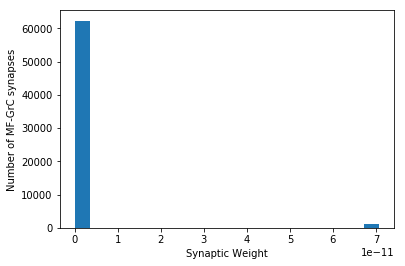

2710.0


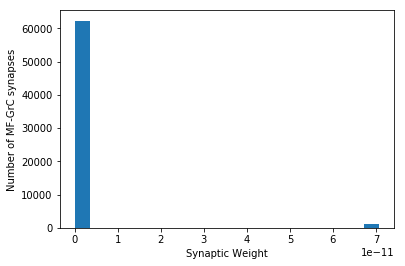

2720.0


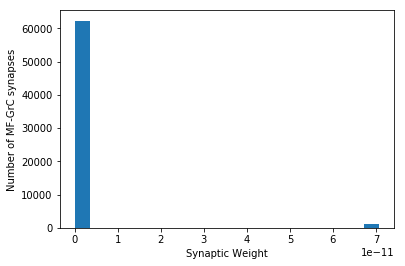

2730.0


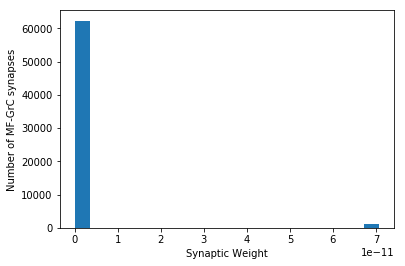

2740.0


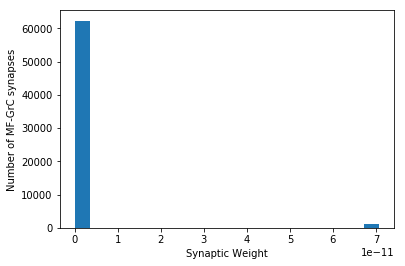

2750.0


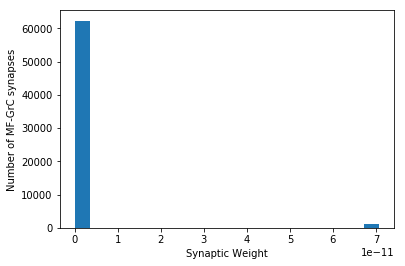

2760.0


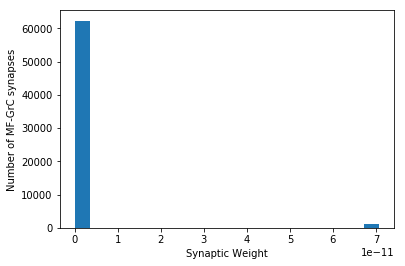

2770.0


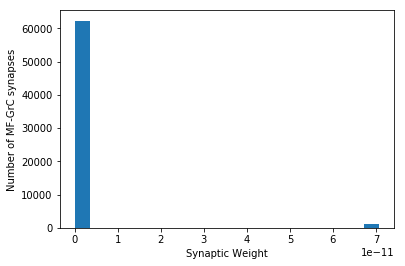

2780.0


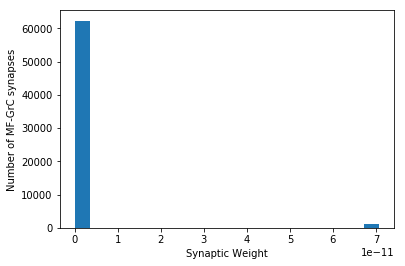

2790.0


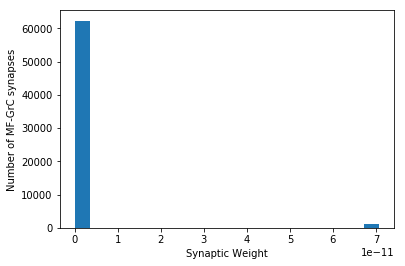

2800.0


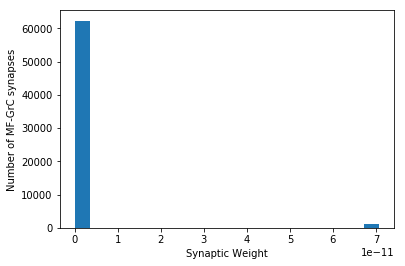

2810.0


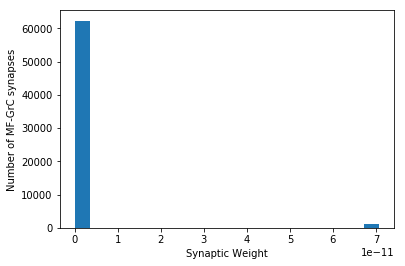

2820.0


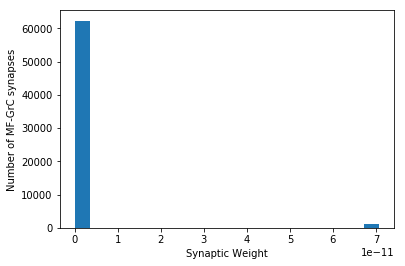

2830.0


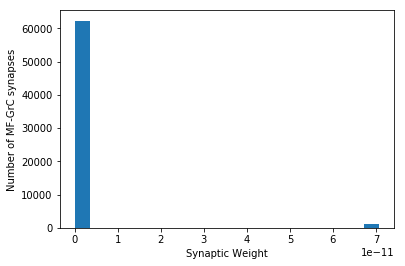

2840.0


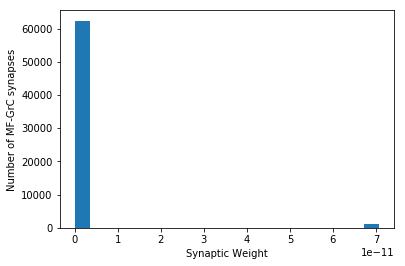

2850.0


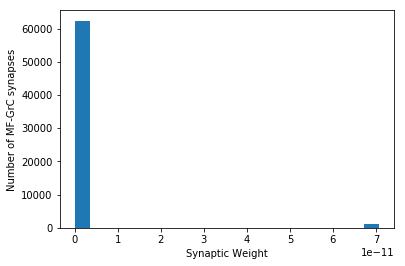

2860.0


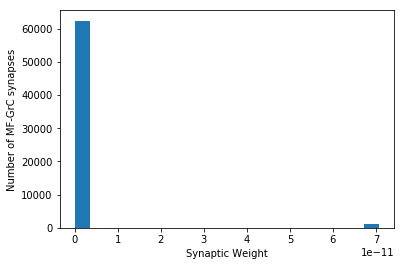

2870.0


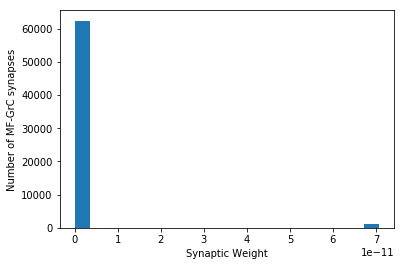

2880.0


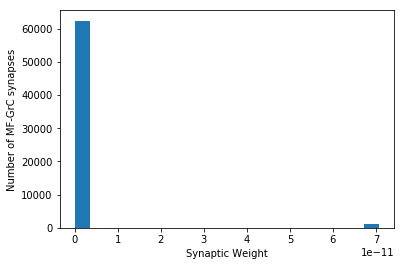

2890.0


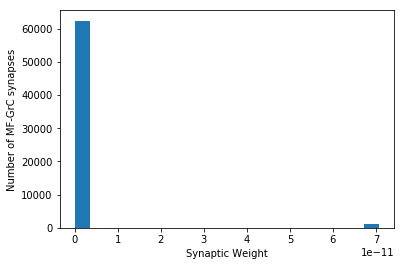

2900.0


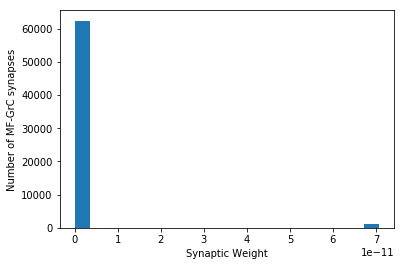

2910.0


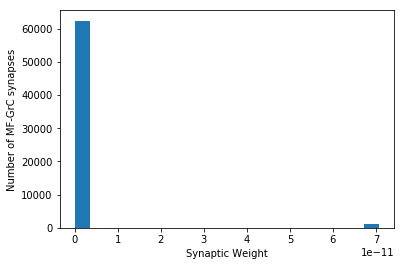

2920.0


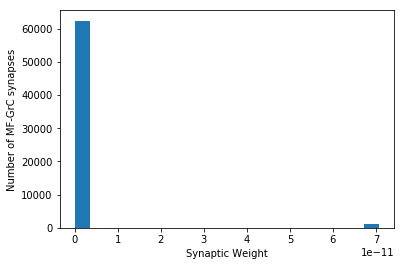

2930.0


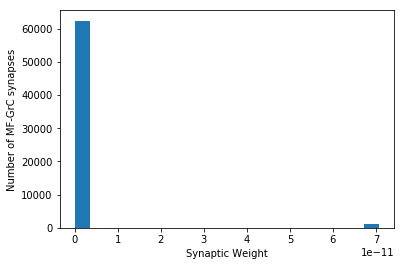

2940.0


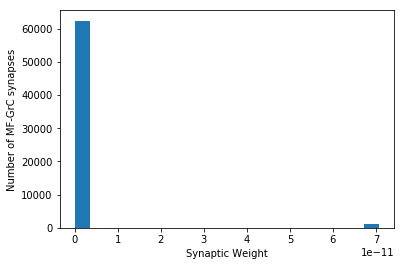

2950.0


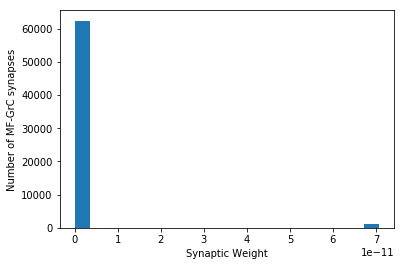

2960.0


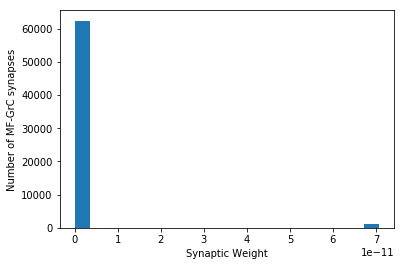

2970.0


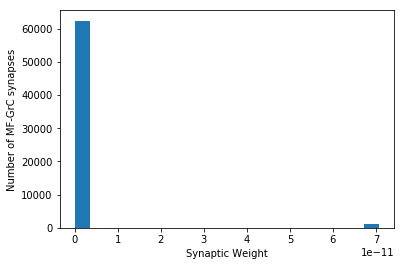

2980.0


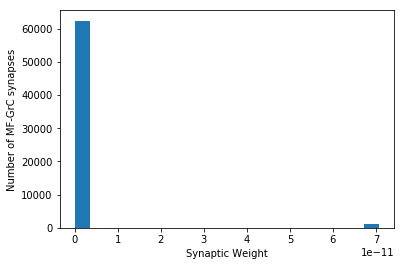

2990.0


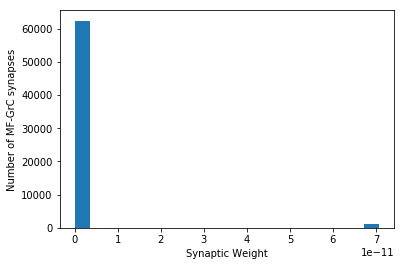

3000.0


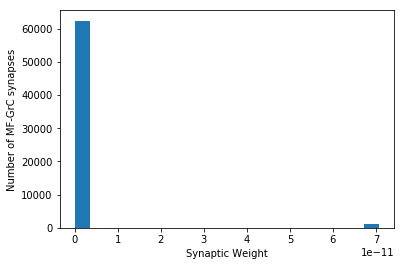

3010.0


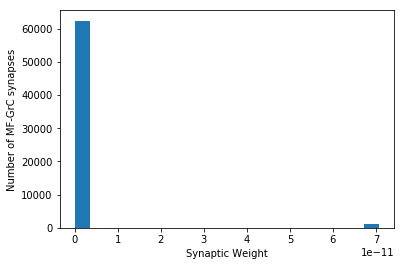

3020.0


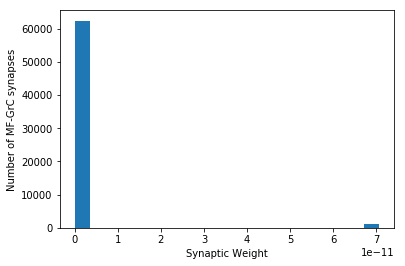

3030.0


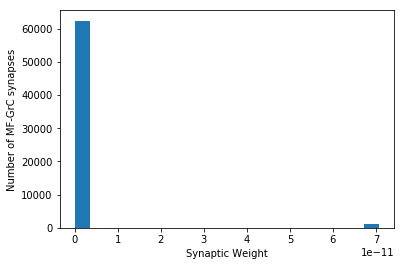

3040.0


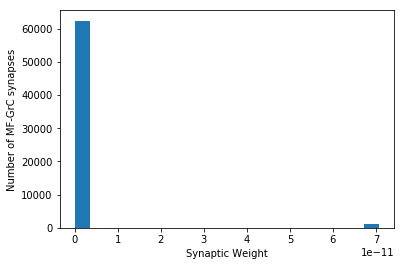

3050.0


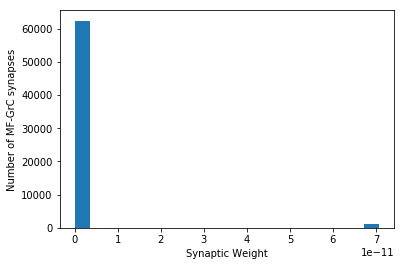

3060.0


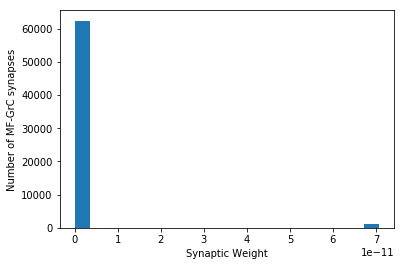

3070.0


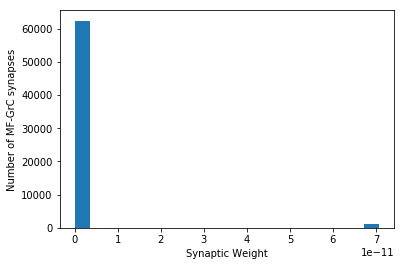

3080.0


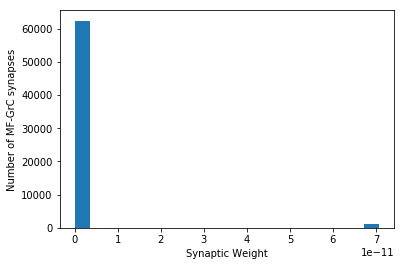

3090.0


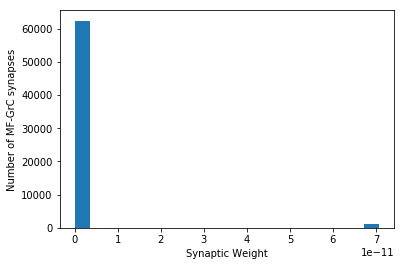

3100.0


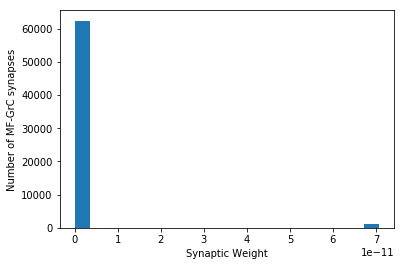

3110.0


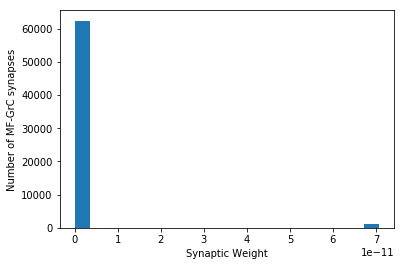

3120.0


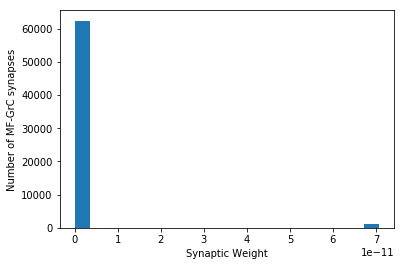

3130.0


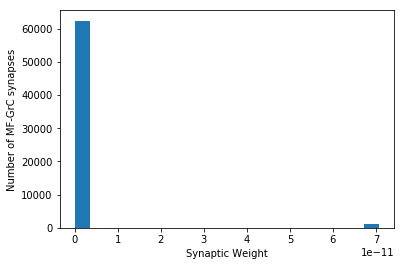

3140.0


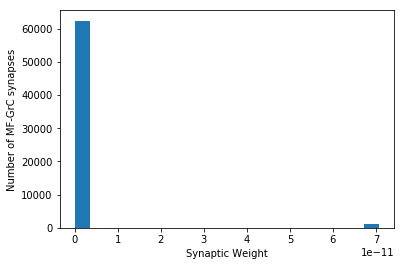

3150.0


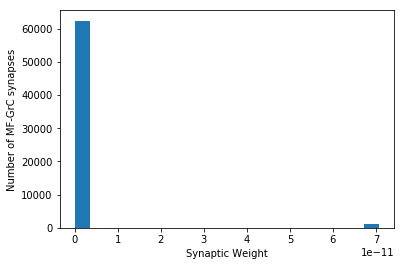

3160.0


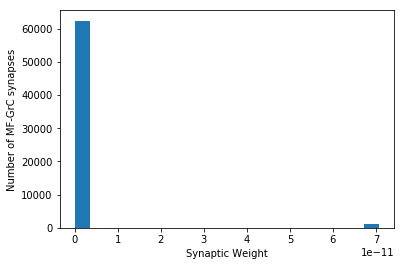

3170.0


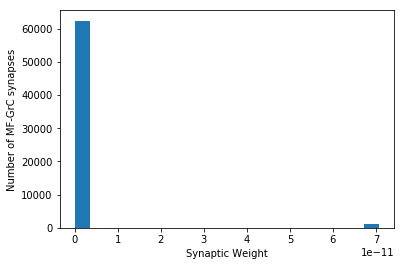

3180.0


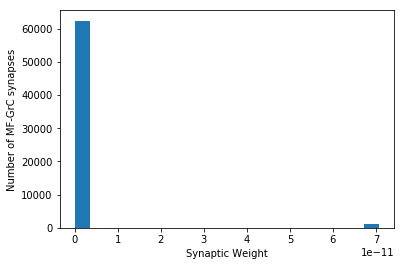

3190.0


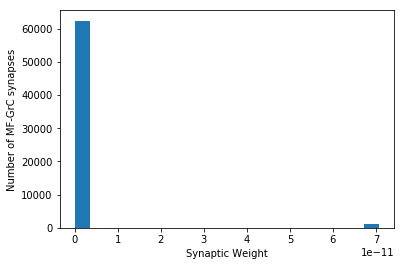

3200.0


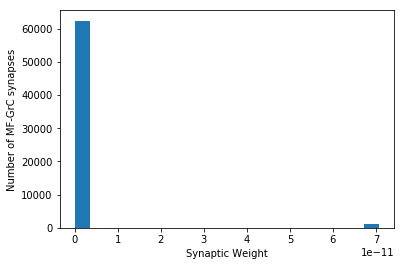

3210.0


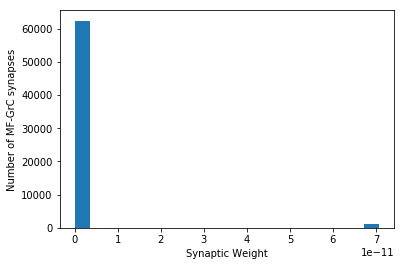

3220.0


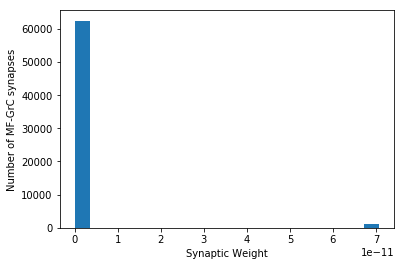

3230.0


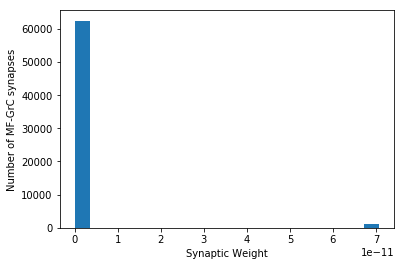

3240.0


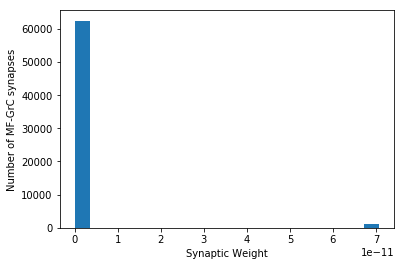

3250.0


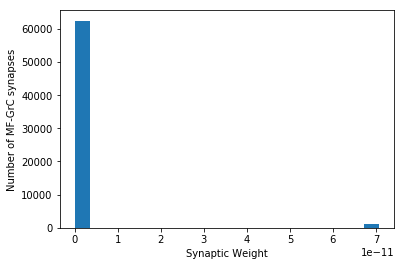

3260.0


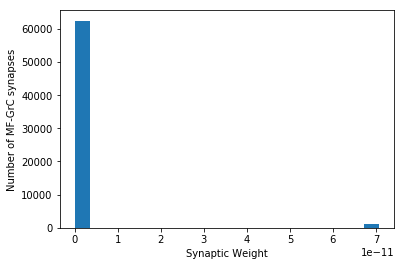

3270.0


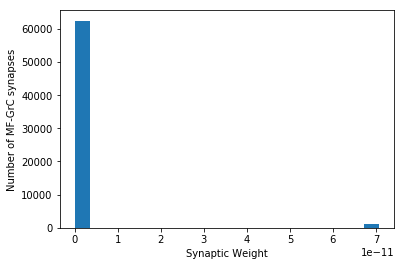

3280.0


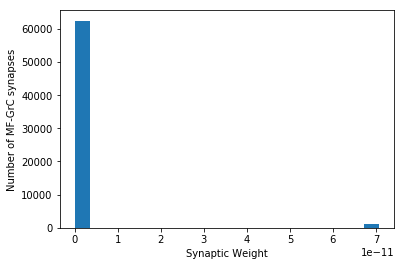

3290.0


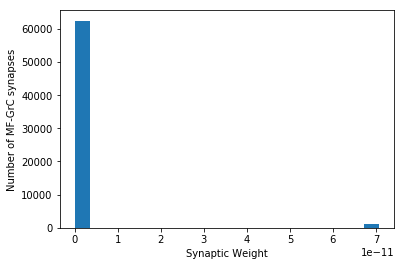

3300.0


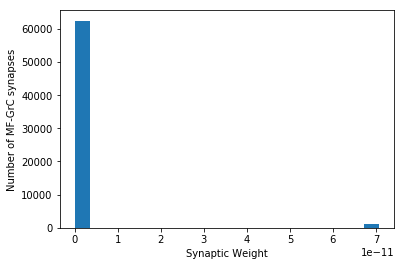

3310.0


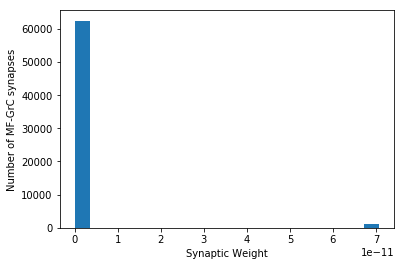

3320.0


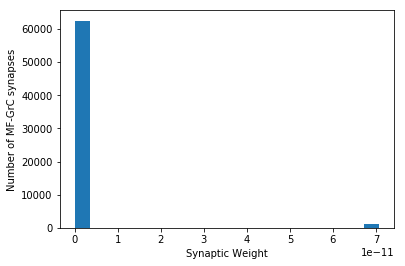

3330.0


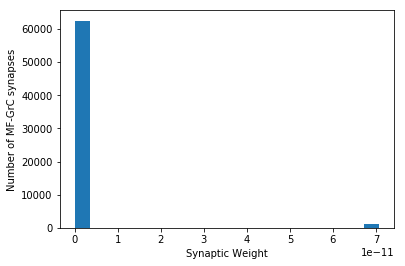

3340.0


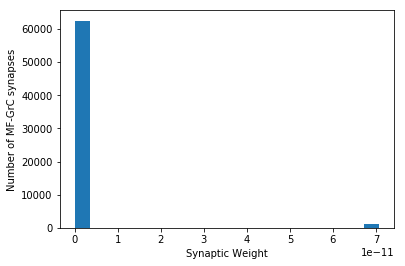

3350.0


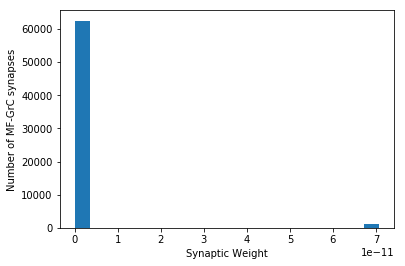

3360.0


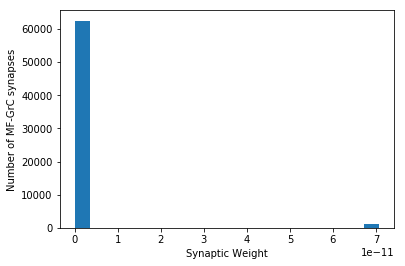

3370.0


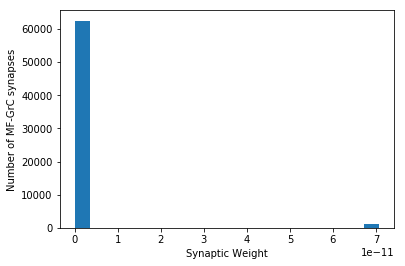

3380.0


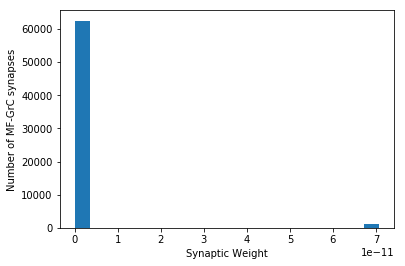

3390.0


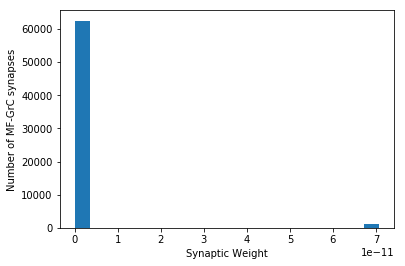

3400.0


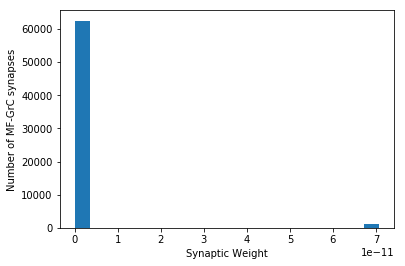

3410.0


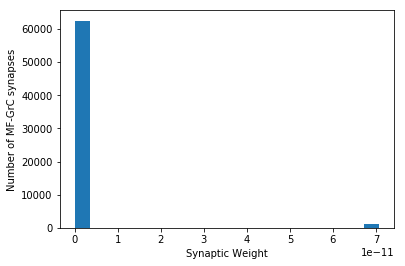

3420.0


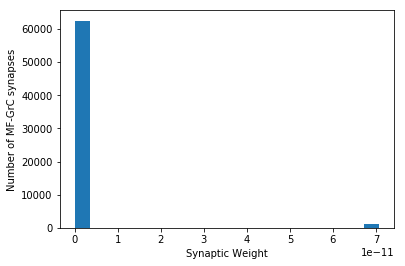

3430.0


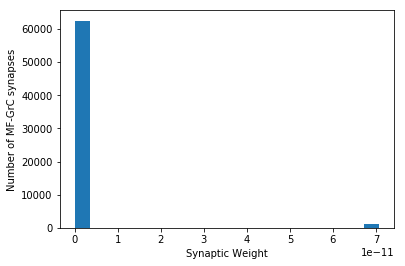

3440.0


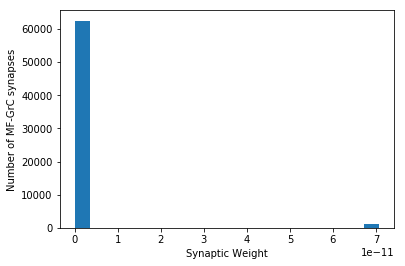

3450.0


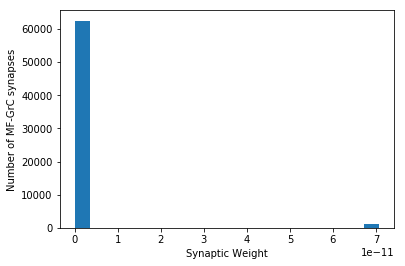

3460.0


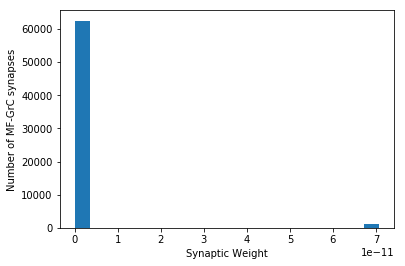

3470.0


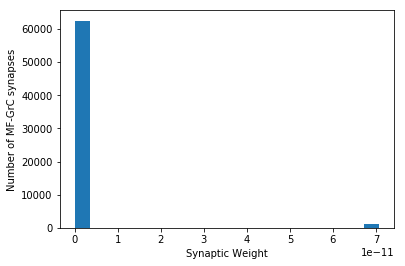

3480.0


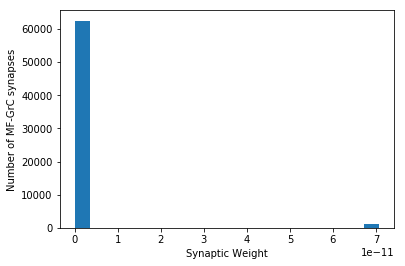

3490.0


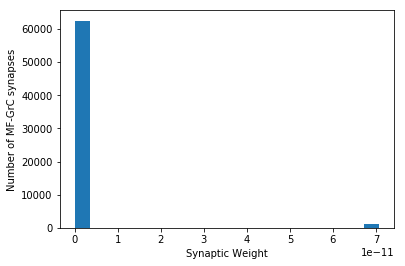

3500.0


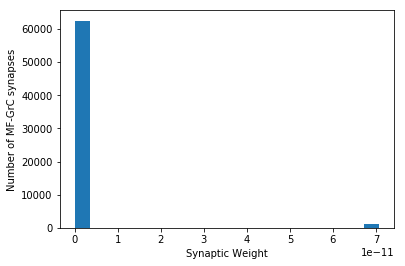

3510.0


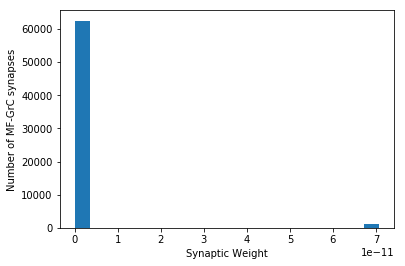

3520.0


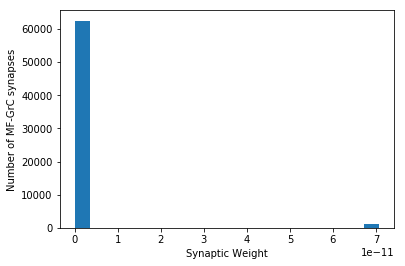

3530.0


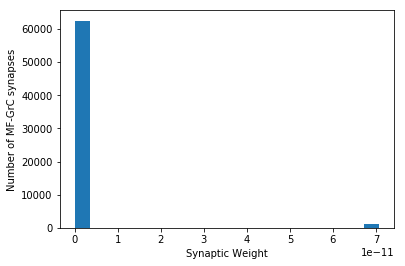

3540.0


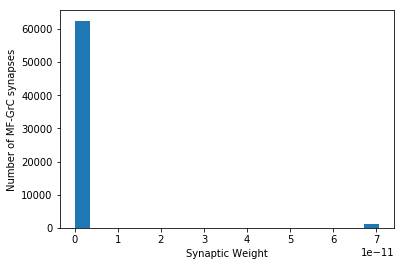

3550.0


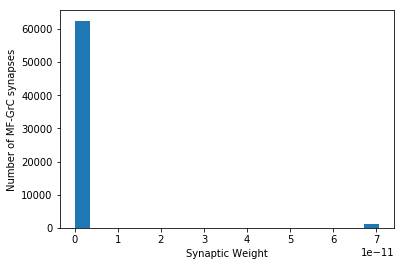

3560.0


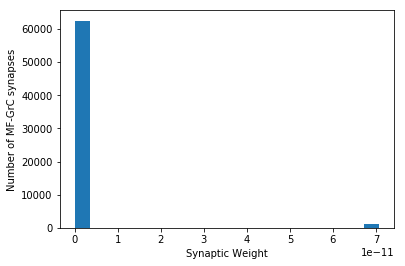

3570.0


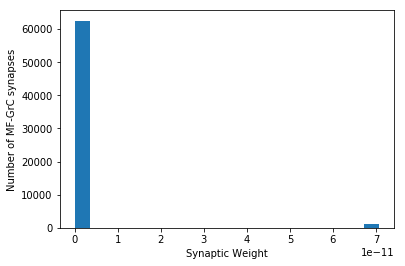

3580.0


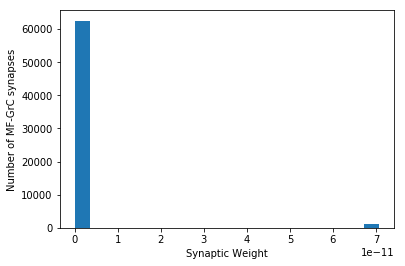

3590.0


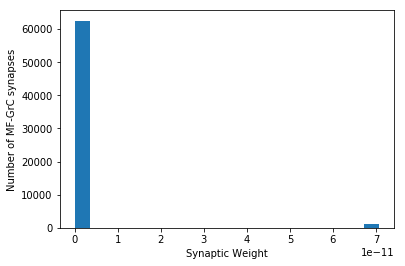

3600.0


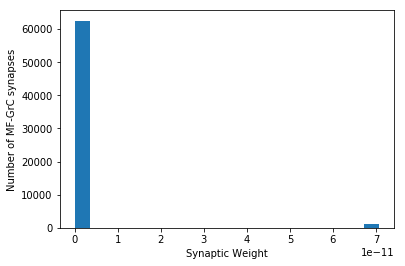

3610.0


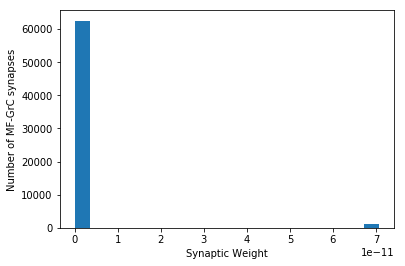

3620.0


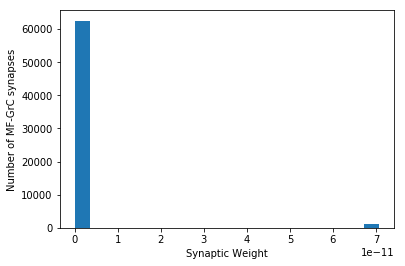

3630.0


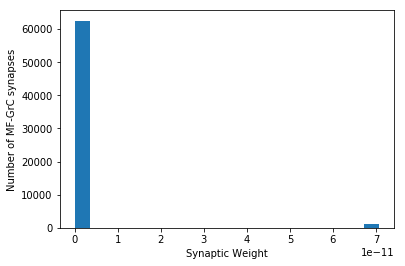

3640.0


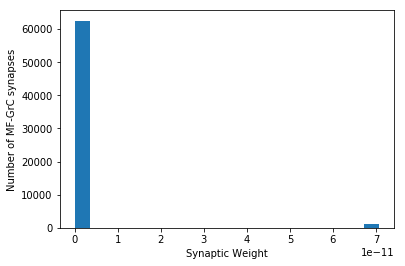

3650.0


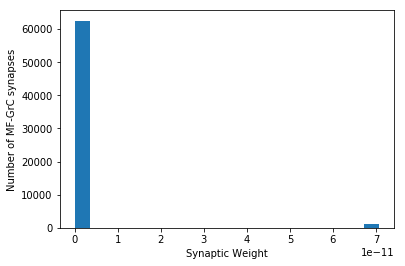

3660.0


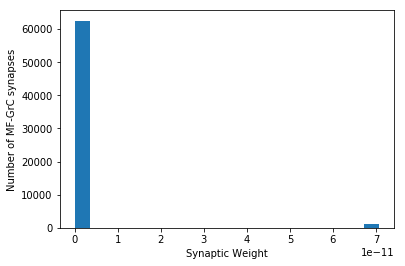

3670.0


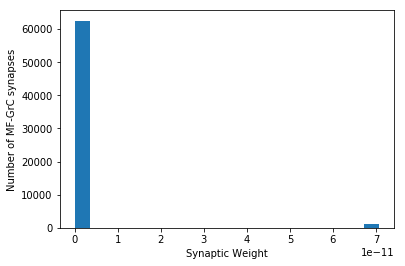

3680.0


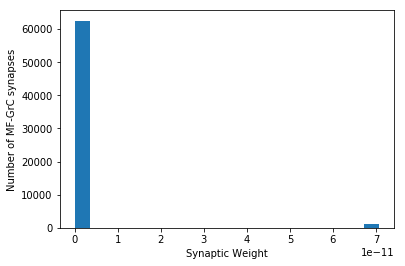

3690.0


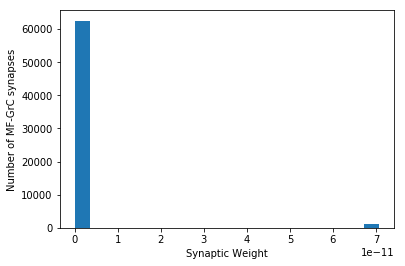

3700.0


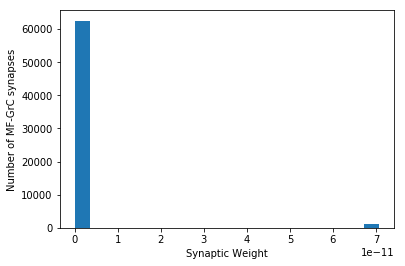

3710.0


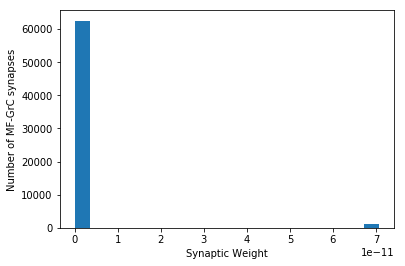

3720.0


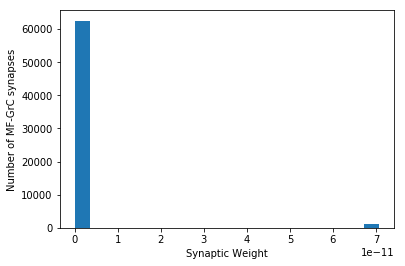

3730.0


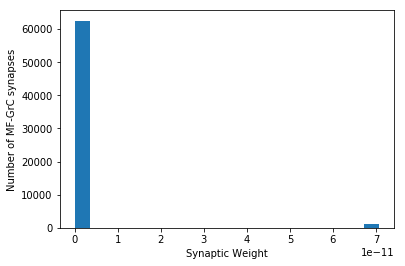

3740.0


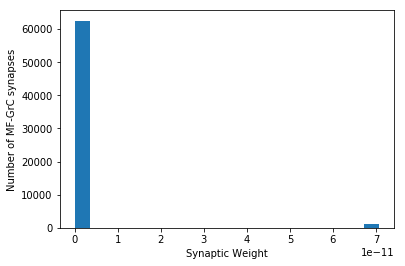

3750.0


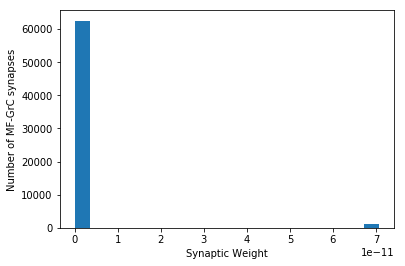

3760.0


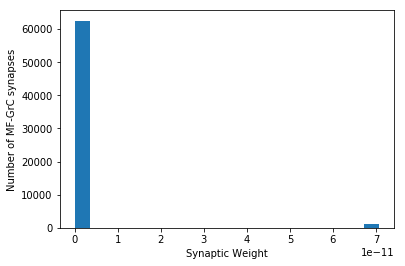

3770.0


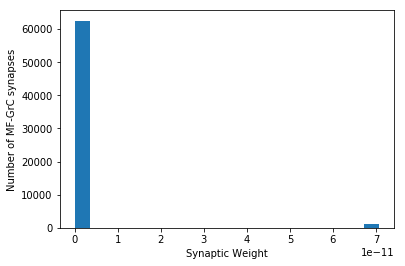

3780.0


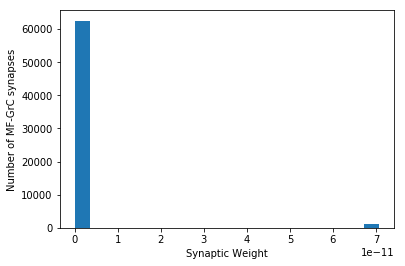

3790.0


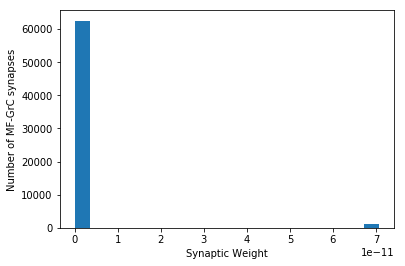

3800.0


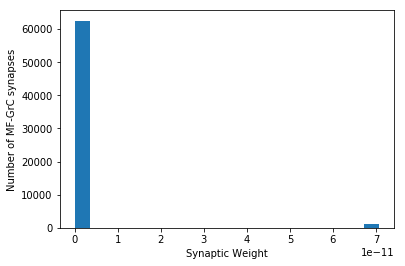

3810.0


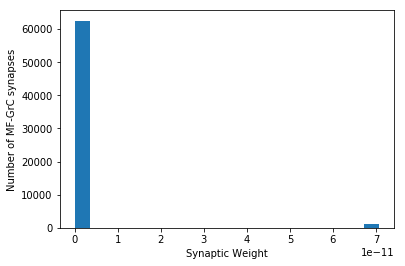

3820.0


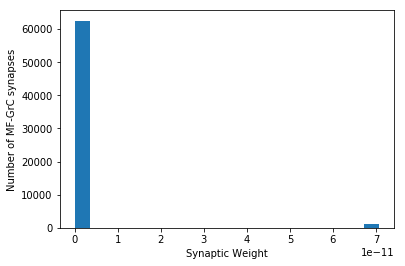

3830.0


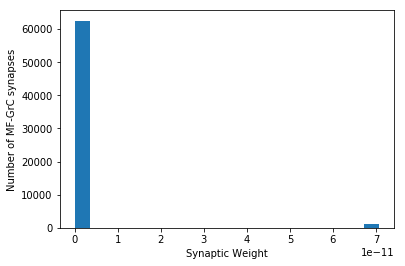

3840.0


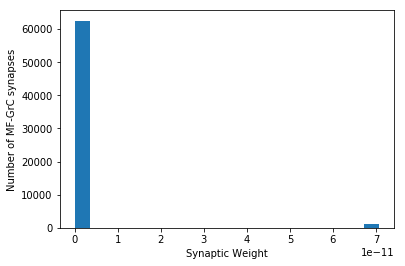

3850.0


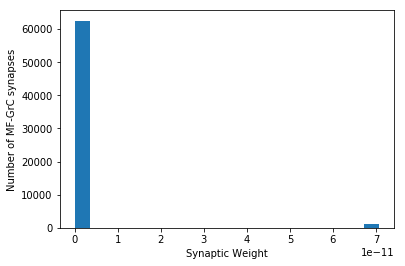

3860.0


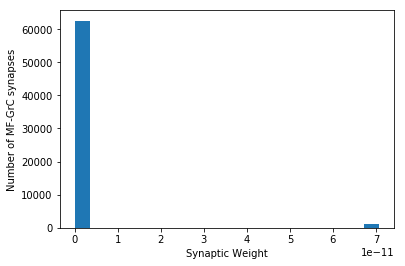

3870.0


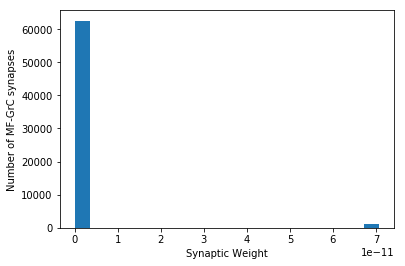

3880.0


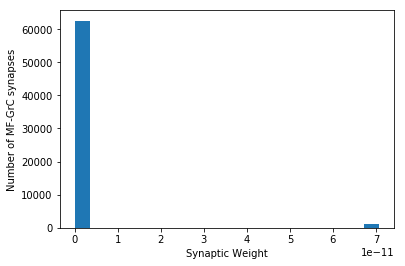

3890.0


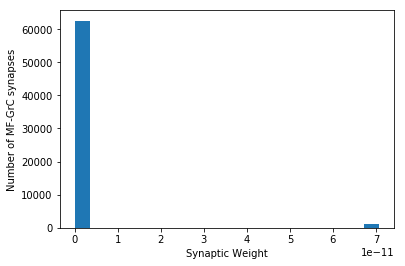

3900.0


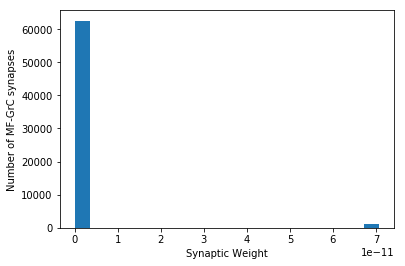

3910.0


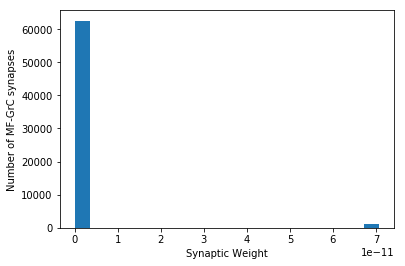

Number of active synapses MF-GrC: 1229
Weight sum histogram MF-GrC: 1229


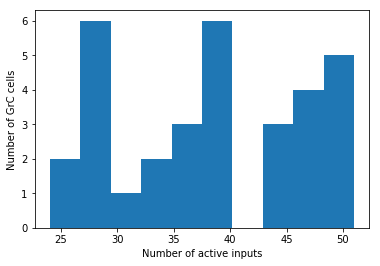

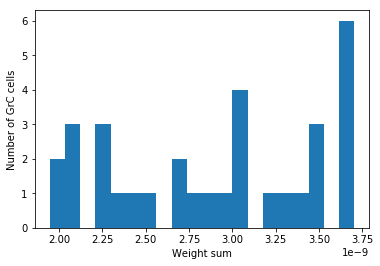

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
#weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
time_list,_,weight_list =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgrcsynapsis', init_time=0, end_time=simulation_time)
for idx,time in enumerate(time_list):
    print time
    weight=weight_list[:,idx]
    plt.figure()
    plt.hist(weight, bins=20)
    plt.ylabel('Number of MF-GrC synapses')
    plt.xlabel('Synaptic Weight')
    plt.show()
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.5
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 130


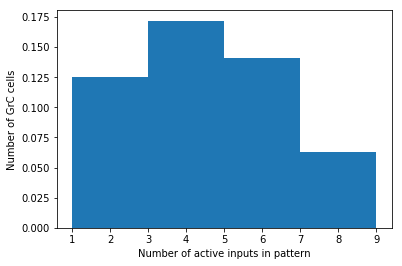

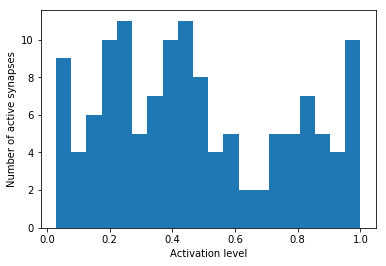

In [12]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
    plt.figure()
    n,_,_=plt.hist(number_of_active_inputs_in_pattern, bins=4, density=True)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

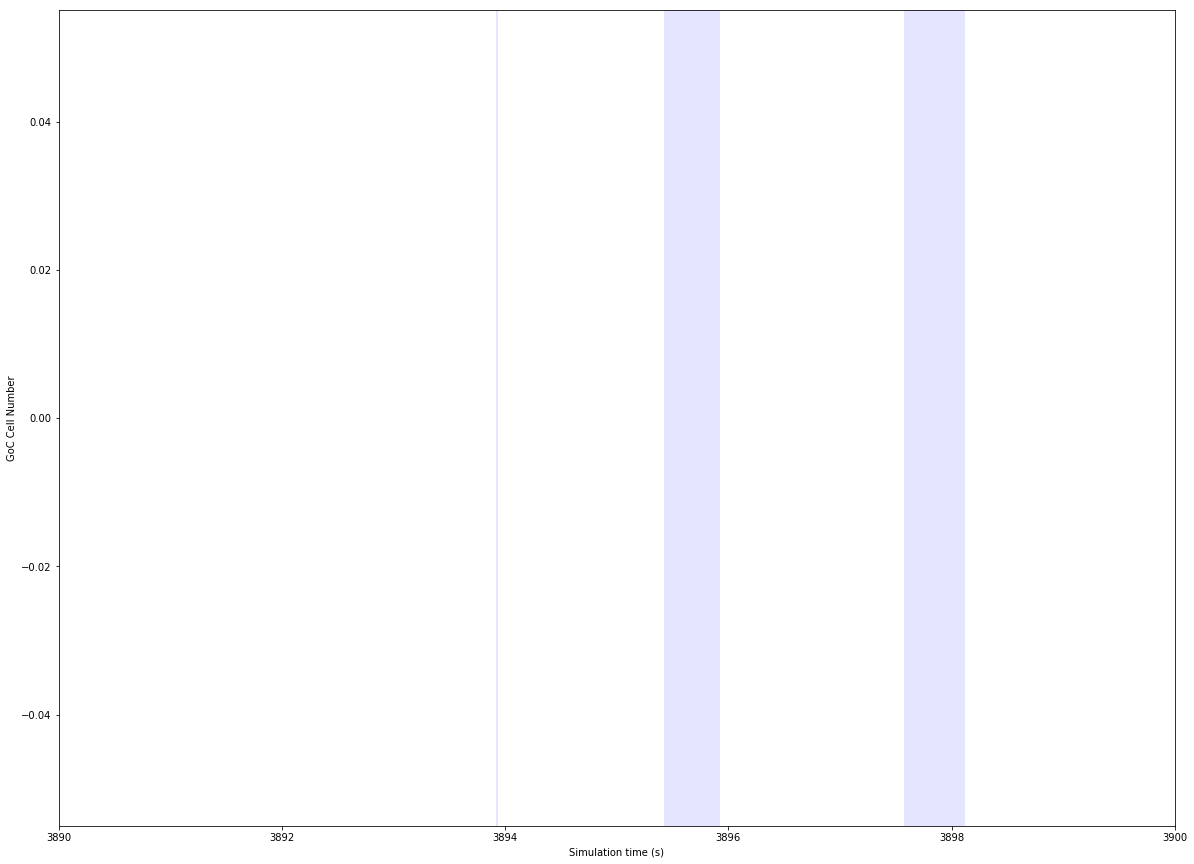

In [13]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: nan Hz


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

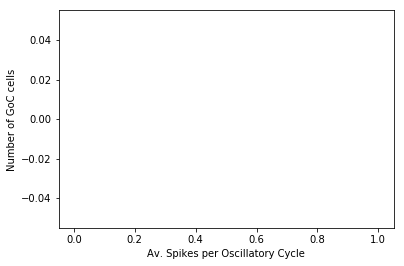

In [14]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

In [15]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)

KeyError: 'grcgocsynapsis'

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## GrC-GoC weight analysis

Plot the GrC-GoC weight as a function of the number of MF-GrC synapses in pattern

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==6
# Obtain the list of active GrC inputs
mfgrc_target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
mfgrc_source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
mfgrc_weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
mfgrc_max_weight = numpy.max(mfgrc_weight)
mfgrc_active_synapses = mfgrc_weight>mfgrc_max_weight*0.0
mfgrc_number_of_active_inputs = numpy.bincount(mfgrc_target_cell_index[mfgrc_active_synapses])
# Obtain the list of GrC active inputs in included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgrc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
included_and_active = numpy.logical_and(included_in_pattern,mfgrc_active_synapses)
number_of_active_inputs_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(number_of_active_inputs_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Number of active MF inputs')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs MFs in pattern')

# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgrc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")

# Calculate the normalized activation levels
normalized_activation = mfgrc_weight[included_in_pattern]*simulation.pattern_generator.pattern_activation[pattern_id][yindex]
input_conductance_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],weights=normalized_activation,minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.subplot(1,2,2)
plt.plot(input_conductance_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Input Conductance in Pattern')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs Pattern input conductance')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==0
grcgoc_max_weight = numpy.max(grcgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(grcgoc_weight>grcgoc_max_weight*0.95,target_cell_index)
target_count = numpy.bincount(grcgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(grcgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='grclayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GrC cells')

Analyze the firing pattern of the selected GrCs and GoCs

In [ ]:
oscillation_frequency = 8.0
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
grc_time,grc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
grc_selected_spikes = numpy.isin(grc_cell,numpy.unique(grcgoc_source_cell_index[selected_synapses]))
cell_id = grc_cell[grc_selected_spikes]
sel_time = grc_time[grc_selected_spikes]
grc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(grc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GrCs')
plt.ylabel('Number of GrC Spikes')
plt.xlabel('Firing phase (s)')
goc_time,goc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
goc_selected_spikes = numpy.isin(goc_cell,numpy.unique(grcgoc_target_cell_index[selected_synapses]))
cell_id = goc_cell[goc_selected_spikes]
sel_time = goc_time[goc_selected_spikes]
goc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.subplot(1,2,2)
plt.hist(goc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GoCs')
plt.ylabel('Number of GoC Spikes')
plt.xlabel('Firing phase (s)')

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()